#Install packages and load libraries

Install non-native packages



In [ ]:
%%capture
!pip install scikit-learn==0.22.2.post1
!pip install ipynb
!pip install xmlutils

Import common packages

In [ ]:
import cProfile, datetime, glob
import numpy as np
import os
import pandas as pd
import pickle, pstats, re, sys
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, auc, average_precision_score
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, train_test_split

Enable mapping from Uniprot ID mapping and retrieval service

In [ ]:
import urllib.parse
import urllib.request
url = 'https://www.uniprot.org/uploadlists/'

Enable Google Colab, mount drives, and load proprietary modules...

In [ ]:
%%capture
from google.colab import drive, files
drive.mount('/content/drive', force_remount=False)
sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/Primary Research/JLMwSCBC_notebook/code/')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g41OOC5v-JLT0Wyy4keN6p-NrC8Zr7Ee7ZonnwP49SQtoymlXC1JmM


In [ ]:
sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/Primary Research/JLMwSCBC_notebook/code/code_toPublish')   
import ppiPrediction_v2
import dataProcessing
import modelTraining
import modelEvaluating     

#Define file paths and key variables

In [ ]:
global dateSignature
dateSignature = datetime.datetime.now().strftime("%Y-%m-%d")

#directories
workDir = '/content/drive/My Drive/Colab Notebooks/Primary Research/JLMwSCBC_notebook/'
LMprotein_complexesDir = workDir + 'proteinComplexes/Lugo-Martinez/'
GWprotein_complexesDir = workDir + 'proteinComplexes/Drew_LM_Wilkins/'

In [ ]:
'''
filesMissing = []
for fileIndex in np.arange(3952):
  file = workDir + 'models/models_origPairs_drewPlus+SCBC_recheck_5CV_2/model_origPairs_drewPlus+SCBC_recheck_5CV_2_Partition_{0}.pkl'.format(fileIndex)
  if not os.path.exists(file):
    filesMissing.append(fileIndex)

filesMissing_condensed = []
countNext = 0
filesMissing_condensed.append(filesMissing[0])
for itv in np.arange(len(filesMissing)-1):
  if filesMissing[itv+1] == filesMissing_condensed[-1]+1+countNext:
    countNext+=1
  else:
    filesMissing_condensed.append(filesMissing[itv+1])
    countNext = 0
'''

"\nfilesMissing = []\nfor fileIndex in np.arange(3952):\n  file = workDir + 'models/models_origPairs_drewPlus+SCBC_recheck_5CV_2/model_origPairs_drewPlus+SCBC_recheck_5CV_2_Partition_{0}.pkl'.format(fileIndex)\n  if not os.path.exists(file):\n    filesMissing.append(fileIndex)\n\nfilesMissing_condensed = []\ncountNext = 0\nfilesMissing_condensed.append(filesMissing[0])\nfor itv in np.arange(len(filesMissing)-1):\n  if filesMissing[itv+1] == filesMissing_condensed[-1]+1+countNext:\n    countNext+=1\n  else:\n    filesMissing_condensed.append(filesMissing[itv+1])\n    countNext = 0\n"

In [ ]:
def retrieve_geneName(geneID):
  params = {
  'from': 'P_ENTREZGENEID',
  'to': 'ID',
  'format': 'tab',
  'query': '{0}'.format(geneID)
  }

  data = urllib.parse.urlencode(params)
  data = data.encode('utf-8')
  req = urllib.request.Request(url, data)
  with urllib.request.urlopen(req) as f:
    response = f.read()

  geneNames_wHumantag = [mapping.split('\t')[1] for mapping in response.decode('utf-8').split('\n')[1:-1]]
  geneNames = [geneName_woTag.split('_HUMAN')[0] for geneName_woTag in geneNames_wHumantag]

  return geneNames

In [ ]:
fold = 2
count0 = 0
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count7 = 0
count8 = 0
count9 = 0
count10 = 0
count11 = 0
count12 = 0
count13 = 0
count14 = 0
count15 = 0
count16 = 0
count17 = 0
count18 = 0
count19 = 0
count20 = 0
count21 = 0
count22 = 0
count23 = 0

for prtn in np.arange(0, 59):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count0+=1
for prtn in np.arange(59, 118):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count1+=1
for prtn in np.arange(118, 177):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count2+=1
for prtn in np.arange(177, 236):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count3+=1            
for prtn in np.arange(236, 295):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count4+=1
for prtn in np.arange(295, 354):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count5+=1
for prtn in np.arange(354, 413):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count6+=1
for prtn in np.arange(413, 472):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count7+=1 
for prtn in np.arange(472, 531):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count8+=1
for prtn in np.arange(531, 590):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count9+=1
for prtn in np.arange(590, 649):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count10+=1
for prtn in np.arange(649, 708):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count11+=1   
for prtn in np.arange(708, 767):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count12+=1
for prtn in np.arange(767, 826):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count13+=1
for prtn in np.arange(826, 885):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count14+=1
for prtn in np.arange(885, 944):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count15+=1            
for prtn in np.arange(944, 1003):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count16+=1
for prtn in np.arange(1003, 1062):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count17+=1
for prtn in np.arange(1062, 1121):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count18+=1
for prtn in np.arange(1121, 1180):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count19+=1 
for prtn in np.arange(1180, 1239):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count20+=1
for prtn in np.arange(1239, 1298):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count21+=1
for prtn in np.arange(1296, 1355):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count22+=1
for prtn in np.arange(1355, 1414):
  if os.path.exists(workDir + 'models/models_integratedPairs_drew+JLM+SCBC_5CV_{0}/model_integratedPairs_drew+JLM+SCBC_5CV_{0}_Partition_{1}.pkl'.format(fold, prtn)):
    count23+=1   

print(count0)
print(count1)
print(count2)
print(count3)
print(count4)
print(count5)
print(count6)
print(count7)
print(count8)
print(count9)
print(count10)
print(count11)
print(count12)
print(count13)
print(count14)
print(count15)
print(count16)
print(count17)
print(count18)
print(count19)
print(count20)
print(count21)
print(count22)
print(count23)         

59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
47


#LM Integrated data

In [ ]:
shutil.copytree(workDir + 'models/models_ppiPrediction_performanceAnalysis_lugoMartinez_integratedFeatures/', 
                workDir + 'models/models_ppiPrediction_performanceAnalysis_lugoMartinez_integratedFeatures_addedPrtn-NCIwHPA/')

In [ ]:
LM_trainingData = pd.read_csv(LMprotein_complexesDir + 'integrated_MM+TSCS+Exp+Abun+Loc_features_training_either_model(orig).tsv', sep='\t')
LM_trainingData.head()

Wan_1  Wan_2  Wan_3  ...  HPA_SwissProt_2  HPA_SwissProt_3  HPA_SwissProt_4
0    0.0    0.0    0.0  ...              0.0              0.0              1.0
1    NaN    NaN    NaN  ...              0.0              0.0              1.0
2    NaN    NaN    NaN  ...              0.0              0.5              0.0
3    NaN    NaN    NaN  ...              0.0              0.0              1.0
4    0.0    0.0    0.0  ...              0.0              0.0              1.0

[5 rows x 268 columns]

In [ ]:
LM_trainingData.shape

(491524, 268)

In [ ]:
LM_trainingLabels = pd.read_csv(LMprotein_complexesDir + 'integrated_training_labels_either_model.tsv', sep='\t', header=0, names=['label', 'prot1', 'prot2'])
LM_trainingLabels.head()

label  prot1  prot2
0      1   1665  57187
1      1  22916   1654
2      1  51729  79228
3      1   6158   7846
4      1  11017   6427

In [ ]:
LM_trainingLabels.shape

(491524, 3)

In [ ]:
LM_trainingLabels = LM_trainingLabels.astype({'prot1': 'str', 'prot2': 'str'})

In [ ]:
lmTest = pd.read_csv(LMprotein_complexesDir + 'integrated_MM+TSCS+Exp+Abun+Loc_features_test_either_model(orig).tsv', sep='\t')
lmTest_noHPA = lmTest.drop(columns=['HPA_SwissProt_1', 'HPA_SwissProt_2', 'HPA_SwissProt_3', 'HPA_SwissProt_4'], axis=1)

In [ ]:
lmTrain_noHPA = lmTest.drop(columns=['HPA_SwissProt_1', 'HPA_SwissProt_2', 'HPA_SwissProt_3', 'HPA_SwissProt_4'], axis=1)

In [ ]:
print(lmTrain_noHPA.shape)
print(lmTest_noHPA.shape)

(491524, 264)
(546645, 264)


In [ ]:
lmTrain_noHPA.to_csv(LMprotein_complexesDir + 'integrated_MM+TSCS+Exp+Abun+Loc_features_training_either_model(orig)_noHPA.tsv', index=False, sep='\t')

In [ ]:
lmTest_noHPA.to_csv(LMprotein_complexesDir + 'integrated_MM+TSCS+Exp+Abun+Loc_features_test_either_model(orig)_noHPA.tsv', index=False, sep='\t')

In [ ]:
testLoad = pd.read_csv(LMprotein_complexesDir + 'integrated_test_labels_either_model.tsv', sep='\t')
testLoad.head()

0      1      2
0  1   8467   6878
1  1  65993  28973
2  1   6125   9045
3  1  55173  54460
4  1   7153   9188

In [ ]:
ppiPrediction_v2.run(workDir, 
                     LMprotein_complexesDir + 'integrated_MM+TSCS+Exp+Abun+Loc_features_training_either_model(orig)_noHPA.tsv', LMprotein_complexesDir + 'integrated_training_labels_either_model.tsv', 
                     LMprotein_complexesDir + 'integrated_MM+TSCS+Exp+Abun+Loc_features_test_either_model(orig)_noHPA.tsv', LMprotein_complexesDir + 'integrated_test_labels_either_model.tsv', 
                     expName='performanceAnalysis_lugoMartinez_integratedFeatures_woHPA', hasHeadings=True
                     )

Loading data...
The shape of the data is (491524, 264)
The shape of labels is (491524, 3)
Completed loading data
________________________________________________
Loading data...
The shape of the data is (546645, 264)
The shape of labels is (546645, 3)
Completed loading data
________________________________________________
Extracting unique feature combinations from training data...
     The number of unique feature combinations are 244 and the shape of unique counts is (244,)...
     Completed extracting unique feature combinations from training data...
________________________________________________
Extracting unique feature combinations from testing data...
     The number of unique feature combinations are 247 and the shape of unique counts is (247,)...
     Completed extracting unique feature combinations from testing data...
________________________________________________
Training models per partition of the training data
_________________________________________________________

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   17.3s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   26.7s


building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   44.6s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   55.4s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.1min


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.5min


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.0min


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.5min


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  4.2min


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.8min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  5.4min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.0min


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  6.8min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.6min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  8.4min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  9.2min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed: 10.0min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.9min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed: 11.9min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed: 12.9min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 13.9min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 15.0min


building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 15.6min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 1/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.5s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.1s


building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   22.1s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   28.1s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   39.1s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.9s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   60.0s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.2min


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.4min


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.6min


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.9min


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.1min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.4min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  3.1min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.4min


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  3.8min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  4.1min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  4.5min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.9min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  5.4min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  5.8min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.3min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  6.8min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  7.0min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 2/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.7s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.5s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   20.5s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   26.7s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.8s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   52.4s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.0min


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.2min


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.4min


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.7min


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.9min


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.2min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.5min


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  3.1min


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.4min


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  3.8min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  4.1min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  4.5min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.9min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  5.3min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  5.8min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.2min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  6.7min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  6.9min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 3/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.5s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.7s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.5s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   18.5s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.3s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.0s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   39.9s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   48.0s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   56.8s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.1min


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.3min


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.4min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.6min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2.0min


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.3min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  2.5min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  2.7min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  3.0min


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.3min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400building tree 301 of 400

building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  3.6min


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  4.0min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.3min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  4.6min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  4.8min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 4/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s


building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s


building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.0s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.3s



building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.8s


building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s


building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.8s


building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.3s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    4.0s


building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.7s


building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    5.4s



building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    6.3s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    7.3s


building tree 144 of 400
building tree 145 of 400
building tree 146 of 400building tree 147 of 400

building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.2s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    9.3s


building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.4s


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   11.4s


building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   12.5s


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   13.6s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   14.8s


building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400building tree 307 of 400

building tree 308 of 400
building tree 309 of 400
building tree 310 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   16.0s


building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   17.4s


building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   18.7s


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   20.1s


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   20.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 5/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.1s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.3s


building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.9s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s


building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.0s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.6s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400building tree 73 of 400

building tree 74 of 400building tree 75 of 400

building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    4.3s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.9s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    5.8s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    6.6s


building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    7.5s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.5s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    9.6s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.7s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   11.8s


building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   13.0s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   14.2s


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   15.4s


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400building tree 307 of 400

building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   16.8s


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   18.1s


building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   19.5s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   20.9s


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400building tree 393 of 400

building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   21.8s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 6/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s


building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s


building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.0s


building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.3s


building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400building tree 38 of 400

building tree 39 of 400
building tree 40 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.8s


building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.8s


building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.3s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400building tree 75 of 400

building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    3.9s



building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.5s


building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400building tree 102 of 400

building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    5.2s


building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    6.0s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    6.7s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.6s


building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    8.5s


building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.6s


building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   10.6s


building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400

[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   11.6s



building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   12.7s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   13.8s


building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400building tree 306 of 400

building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   15.0s


building tree 309 of 400building tree 310 of 400

building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400building tree 333 of 400

building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   16.2s


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   17.5s


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   18.8s


building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   19.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 7/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400building tree 10 of 400

building tree 11 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s


building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.0s


building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.3s



building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.7s


building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s


building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.6s


building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.1s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    3.8s


building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.4s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    5.1s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    5.8s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    6.6s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.4s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    8.4s


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.4s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   10.4s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400building tree 237 of 400



[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   11.5s


building tree 238 of 400
building tree 239 of 400building tree 240 of 400

building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   12.5s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   13.6s


building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   14.8s


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   16.0s


building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   17.2s


building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400building tree 381 of 400

building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   18.5s


building tree 389 of 400

building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   19.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 8/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400building tree 41 of 400
building tree 42 of 400

building tree 43 of 400
building tree 44 of 400
building tree 45 of 400building tree 46 of 400

building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400building tree 58 of 400

building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s


building tree 78 of 400building tree 79 of 400

building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400building tree 94 of 400

building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s


building tree 101 of 400
building tree 102 of 400
building tree 103 of 400building tree 104 of 400

building tree 105 of 400building tree 106 of 400

building tree 107 of 400
building tree 108 of 400
building tree 109 of 400building tree 110 of 400

building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400building tree 118 of 400

building tree 119 of 400
building tree 120 of 400building tree 121 of 400

building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400building tree 142 of 400

building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.3s


building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400

building tree 173 of 400
building tree 174 of 400
building tree 175 of 400building tree 176 of 400

building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.6s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400building tree 188 of 400

building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400building tree 210 of 400

building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.8s


building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400building tree 236 of 400

building tree 237 of 400
building tree 238 of 400building tree 239 of 400
building tree 240 of 400

building tree 241 of 400
building tree 242 of 400building tree 243 of 400

building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.2s


building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400building tree 258 of 400

building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400building tree 271 of 400

building tree 272 of 400
building tree 273 of 400
building tree 274 of 400building tree 275 of 400

building tree 276 of 400
building tree 277 of 400
building tree 278 of 400building tree 279 of 400

building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.6s


building tree 297 of 400building tree 298 of 400

building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400building tree 306 of 400

building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400building tree 334 of 400

building tree 335 of 400
building tree 336 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.9s



building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400building tree 354 of 400
building tree 355 of 400

building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400building tree 362 of 400

building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.1s


building tree 370 of 400building tree 371 of 400

building tree 372 of 400
building tree 373 of 400
building tree 374 of 400building tree 375 of 400
building tree 376 of 400

building tree 377 of 400
building tree 378 of 400
building tree 379 of 400building tree 380 of 400

building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.5s finished



building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 9/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400building tree 19 of 400building tree 20 of 400


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400building tree 24 of 400

building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400building tree 60 of 400

building tree 61 of 400building tree 62 of 400

building tree 63 of 400
building tree 64 of 400
building tree 65 of 400building tree 66 of 400

building tree 67 of 400
building tree 68 of 400building tree 69 of 400

building tree 70 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s


building tree 71 of 400building tree 72 of 400building tree 73 of 400


building tree 74 of 400
building tree 75 of 400building tree 76 of 400

building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.9s


building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400building tree 105 of 400building tree 106 of 400


building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.1s


building tree 119 of 400

building tree 120 of 400
building tree 121 of 400building tree 122 of 400

building tree 123 of 400
building tree 124 of 400building tree 125 of 400

building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.4s


building tree 142 of 400
building tree 143 of 400building tree 144 of 400

building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400building tree 168 of 400

building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400building tree 180 of 400

building tree 181 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.7s


building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400building tree 199 of 400

building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400building tree 216 of 400

building tree 217 of 400
building tree 218 of 400
building tree 219 of 400building tree 220 of 400

building tree 221 of 400
building tree 222 of 400
building tree 223 of 400building tree 224 of 400

building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400building tree 229 of 400


building tree 230 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.1s


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400building tree 251 of 400
building tree 252 of 400

building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400building tree 262 of 400
building tree 263 of 400



[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.5s


building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400building tree 270 of 400

building tree 271 of 400building tree 272 of 400

building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400building tree 280 of 400

building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400building tree 292 of 400

building tree 293 of 400
building tree 294 of 400
building tree 295 of 400building tree 296 of 400

building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.9s


building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400building tree 333 of 400

building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400building tree 346 of 400

building tree 347 of 400
building tree 348 of 400
building tree 349 of 400building tree 350 of 400
building tree 351 of 400

building tree 352 of 400
building tree 353 of 400
building tree 354 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.1s


building tree 365 of 400building tree 366 of 400

building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400building tree 382 of 400

building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400building tree 388 of 400

building tree 389 of 400
building tree 390 of 400

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.5s finished



building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400building tree 400 of 400

Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 10/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400
building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400building tree 9 of 400
building tree 10 of 400
building tree 11 of 400

building tree 12 of 400
building tree 13 of 400building tree 14 of 400

building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400building tree 27 of 400
building tree 28 of 400

building tree 29 of 400
building tree 30 of 400
building tree 31 of 400building tree 32 of 400

building tree 33 of 400
building tree 34 of 400
building tree 35 of 400building tree 36 of 400

building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 47 of 400
building tree 48 of 400building tree 49 of 400

building tree 50 of 400
building tree 51 of 400
building tree 52 of 400building tree 53 of 400

building tree 54 of 400
building tree 55 of 400
building tree 56 of 400building tree 57 of 400

building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400building tree 65 of 400

building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s


building tree 68 of 400
building tree 69 of 400building tree 70 of 400

building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400building tree 81 of 400

building tree 82 of 400
building tree 83 of 400building tree 84 of 400
building tree 85 of 400

building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.9s


building tree 91 of 400
building tree 92 of 400building tree 93 of 400

building tree 94 of 400building tree 95 of 400

building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400building tree 101 of 400

building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400building tree 109 of 400

building tree 110 of 400
building tree 111 of 400
building tree 112 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.2s


building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.5s


building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400building tree 169 of 400

building tree 170 of 400
building tree 171 of 400building tree 172 of 400building tree 173 of 400

building tree 174 of 400

building tree 175 of 400
building tree 176 of 400
building tree 177 of 400building tree 178 of 400

building tree 179 of 400building tree 180 of 400

building tree 181 of 400building tree 182 of 400

building tree 183 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.8s


building tree 184 of 400building tree 185 of 400

building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400building tree 194 of 400

building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400building tree 201 of 400

building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400building tree 217 of 400

building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400b

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.2s


building tree 234 of 400
building tree 235 of 400building tree 236 of 400

building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400building tree 241 of 400
building tree 242 of 400

building tree 243 of 400
building tree 244 of 400building tree 245 of 400
building tree 246 of 400

building tree 247 of 400
building tree 248 of 400
building tree 249 of 400building tree 250 of 400

building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400building tree 257 of 400

building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.5s


building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400building tree 292 of 400

building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400building tree 297 of 400

building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400building tree 305 of 400

building tree 306 of 400building tree 307 of 400
building tree 308 of 400



[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.0s


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400building tree 320 of 400

building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400building tree 328 of 400

building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400building tree 339 of 400
building tree 340 of 400

building tree 341 of 400
building tree 342 of 400building tree 343 of 400

building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.2s


building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400building tree 387 of 400building tree 388 of 400


building tree 389 of 400building tree 390 of 400

building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.6s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 11/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 52 of 400
building tree 53 of 400
building tree 54 of 400building tree 55 of 400
building tree 56 of 400

building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400building tree 67 of 400

building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400building tree 76 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s



building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400building tree 84 of 400

building tree 85 of 400
building tree 86 of 400building tree 87 of 400
building tree 88 of 400

building tree 89 of 400
building tree 90 of 400building tree 91 of 400

building tree 92 of 400building tree 93 of 400

building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s


building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400building tree 109 of 400

building tree 110 of 400building tree 111 of 400

building tree 112 of 400
building tree 113 of 400
building tree 114 of 400building tree 115 of 400

building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400building tree 121 of 400

building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400bui

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.2s


building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.6s


building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400building tree 197 of 400

building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400building tree 202 of 400

building tree 203 of 400
building tree 204 of 400
building tree 205 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.9s



building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400building tree 226 of 400

building tree 227 of 400building tree 228 of 400

building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.2s


building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400building tree 247 of 400

building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400building tree 260 of 400

building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400building tree 266 of 400

building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400building tree 277 of 400

building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.5s


building tree 290 of 400
building tree 291 of 400building tree 292 of 400

building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400building tree 298 of 400

building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400building tree 313 of 400

building tree 314 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.9s


building tree 315 of 400
building tree 316 of 400
building tree 317 of 400building tree 318 of 400

building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400building tree 325 of 400

building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400building tree 340 of 400

building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.1s


building tree 367 of 400
building tree 368 of 400
building tree 369 of 400building tree 370 of 400

building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400building tree 384 of 400

building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400building tree 389 of 400

building tree 390 of 400
building tree 391 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.4s finished


building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400building tree 398 of 400

building tree 399 of 400building tree 400 of 400

Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 12/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.6s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.4s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   22.1s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   28.7s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   39.6s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   49.3s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.0min


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.2min


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.5min


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.7min


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.0min


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.3min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.6min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.9min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  3.3min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.6min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  4.0min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  4.4min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  4.9min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  5.3min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  5.8min


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  6.2min


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.8min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  7.4min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  7.7min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 13/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.0s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.8s


building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.9s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   17.9s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.5s


building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.8s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   36.1s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   44.3s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400building tree 81 of 400

building tree 82 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   52.2s


building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.0min


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.2min


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.5min


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1.9min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  2.4min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  2.6min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  2.8min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.1min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  3.3min


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  3.6min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.9min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  4.2min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  4.4min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 14/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.2s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.3s


building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.5s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.5s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400building tree 35 of 400

building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.9s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.5s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   29.3s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   35.3s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   42.2s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   49.0s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   57.3s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.2min


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1.6min


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  1.9min


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  2.1min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  2.3min


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.5min


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  2.7min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  3.0min


building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.2min


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  3.4min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.6min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 15/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.6s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.6s


building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.1s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.2s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.3s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.5s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   25.9s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   30.6s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   37.0s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   42.5s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   49.3s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   55.7s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.1min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1.5min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  1.8min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  1.9min


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  2.1min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.3min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  2.5min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  2.7min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.9min


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  3.1min


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.2min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 16/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400
building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.4s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s



building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.9s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.3s


building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.0s


building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.4s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    2.8s



building tree 82 of 400
building tree 83 of 400building tree 84 of 400

building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    3.3s


building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    3.9s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.5s


building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    5.1s


building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    5.7s


building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    6.4s


building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.2s


building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400building tree 218 of 400

building tree 219 of 400building tree 220 of 400



[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    8.0s


building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    8.9s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    9.8s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400building tree 285 of 400

building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   10.6s


building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   11.5s


building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400building tree 321 of 400

building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   12.4s


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   13.4s


building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   14.3s


building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   14.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 17/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s


building tree 9 of 400building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.8s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.0s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.4s


building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.2s



building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.7s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    3.2s


building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400building tree 94 of 400

building tree 95 of 400
building tree 96 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    3.7s


building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    4.3s



building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.8s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    5.5s


building tree 143 of 400building tree 144 of 400

building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    6.1s


building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    6.9s


building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.7s


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    8.6s


building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    9.4s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   10.3s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   11.1s


building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400building tree 311 of 400

building tree 312 of 400
building tree 313 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   12.1s


building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   13.1s


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   14.0s


building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400building tree 376 of 400

building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   15.1s


building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   15.7s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 18/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400
building tree 3 of 400

building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.4s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s



building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.8s



building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400building tree 36 of 400

building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.1s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.4s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.7s


building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.0s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400building tree 84 of 400



[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    2.5s


building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    2.8s


building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    3.3s


building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400building tree 120 of 400

building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.8s


building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    4.3s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    4.9s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    5.4s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    6.0s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    6.7s


building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    7.3s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    8.0s


building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    8.7s


building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    9.6s


building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   10.3s


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   11.2s


building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400building tree 382 of 400

building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   12.0s


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   12.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 19/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.4s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s


building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.9s


building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.2s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s


building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.8s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.2s


building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    2.6s


building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    3.0s


building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    3.6s


building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.1s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    4.6s


building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    5.2s


building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400building tree 173 of 400

building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    5.8s


building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    6.4s


building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    7.0s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    7.7s


building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    8.4s


building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    9.2s


building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   10.0s


building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400building tree 322 of 400

building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   10.8s


building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   11.6s


building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   12.5s


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   13.0s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 20/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400building tree 6 of 400
building tree 7 of 400

building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400building tree 34 of 400
building tree 35 of 400

building tree 36 of 400
building tree 37 of 400
building tree 38 of 400building tree 39 of 400
building tree 40 of 400

building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 58 of 400
building tree 59 of 400building tree 60 of 400

building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400building tree 68 of 400

building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 84 of 400building tree 85 of 400

building tree 86 of 400
building tree 87 of 400building tree 88 of 400

building tree 89 of 400
building tree 90 of 400
building tree 91 of 400building tree 92 of 400

building tree 93 of 400
building tree 94 of 400
building tree 95 of 400building tree 96 of 400

building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400building tree 104 of 400

building tree 105 of 400
building tree 106 of 400
building tree 107 of 400building tree 108 of 400

building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s


building tree 110 of 400building tree 111 of 400building tree 112 of 400

building tree 113 of 400

building tree 114 of 400
building tree 115 of 400building tree 116 of 400

building tree 117 of 400
building tree 118 of 400building tree 119 of 400
building tree 120 of 400

building tree 121 of 400
building tree 122 of 400
building tree 123 of 400building tree 124 of 400building tree 125 of 400


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400building tree 129 of 400

building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400building tree 140 of 400

building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400building tree 147 of 400

building tree 148 of 400
building tree 149 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s


building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400building tree 185 of 400
building tree 186 of 400

building tree 187 of 400
building tree 188 of 400building tree 189 of 400

building tree 190 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s


building tree 191 of 400building tree 192 of 400

building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400building tree 207 of 400

building tree 208 of 400building tree 209 of 400

building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400building tree 216 of 400



[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.8s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400building tree 226 of 400

building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400building tree 236 of 400

building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400building tree 248 of 400

building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400building tree 254 of 400

building tree 255 of 400
building tree 256 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.2s


building tree 274 of 400building tree 275 of 400

building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400building tree 285 of 400

building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400building tree 297 of 400

building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.4s


building tree 328 of 400
building tree 329 of 400
building tree 330 of 400building tree 331 of 400

building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400building tree 351 of 400



[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.6s


building tree 352 of 400building tree 353 of 400building tree 354 of 400


building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400building tree 362 of 400

building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400building tree 370 of 400building tree 371 of 400


building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.8s


building tree 381 of 400
building tree 382 of 400building tree 383 of 400

building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.1s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 21/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400
building tree 9 of 400
building tree 10 of 400building tree 11 of 400

building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400building tree 18 of 400

building tree 19 of 400building tree 20 of 400

building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s


building tree 30 of 400
building tree 31 of 400building tree 32 of 400

building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400building tree 39 of 400

building tree 40 of 400building tree 41 of 400

building tree 42 of 400
building tree 43 of 400
building tree 44 of 400building tree 45 of 400

building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400building tree 52 of 400
building tree 53 of 400

building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400building tree 63 of 400

building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400building tree 69 of 400

building tree 70 of 400
building tree 71

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s


building tree 82 of 400building tree 83 of 400
building tree 84 of 400

building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s


building tree 107 of 400
building tree 108 of 400building tree 109 of 400

building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400building tree 116 of 400

building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400building tree 121 of 400

building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400building tree 127 of 400

building tree 128 of 400
building tree 129 of 400
building tree 130 of 400building tree 131 of 400

building tree 132 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.2s


building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400building tree 137 of 400

building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400building tree 142 of 400

building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400

building tree 156 of 400
building tree 157 of 400
building tree 158 of 400building tree 159 of 400

building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.4s


building tree 182 of 400

building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400building tree 188 of 400

building tree 189 of 400
building tree 190 of 400building tree 191 of 400
building tree 192 of 400

building tree 193 of 400
building tree 194 of 400
building tree 195 of 400building tree 196 of 400

building tree 197 of 400
building tree 198 of 400
building tree 199 of 400building tree 200 of 400

building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400building tree 207 of 400



[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.8s


building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400
building tree 215 of 400

building tree 216 of 400building tree 217 of 400

building tree 218 of 400
building tree 219 of 400
building tree 220 of 400building tree 221 of 400
building tree 222 of 400

building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400building tree 230 of 400

building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400building tree 239 of 400building tree 240 of 400


building tree 241 of 400
building tree 242 of 400building tree 243 of 400

building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.1s


building tree 261 of 400building tree 262 of 400
building tree 263 of 400

building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400building tree 269 of 400

building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.5s


building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400building tree 307 of 400

building tree 308 of 400
building tree 309 of 400
building tree 310 of 400building tree 311 of 400

building tree 312 of 400
building tree 313 of 400building tree 314 of 400

building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400building tree 323 of 400

building tree 324 of 400
building tree 325 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.7s


building tree 343 of 400
building tree 344 of 400
building tree 345 of 400building tree 346 of 400

building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400building tree 354 of 400
building tree 355 of 400
building tree 356 of 400

building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400building tree 362 of 400

building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400building tree 368 of 400

building tree 369 of 400
building tree 370 of 400

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.9s



building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400building tree 382 of 400

building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400building tree 387 of 400

building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.2s finished


building tree 394 of 400building tree 395 of 400


building tree 396 of 400
building tree 397 of 400
building tree 398 of 400building tree 399 of 400
building tree 400 of 400

Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 22/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400building tree 23 of 400

building tree 24 of 400building tree 25 of 400

building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400building tree 31 of 400

building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400

building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 51 of 400

building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400building tree 56 of 400

building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400building tree 61 of 400
building tree 62 of 400

building tree 63 of 400
building tree 64 of 400
building tree 65 of 400building tree 66 of 400

building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400building tree 71 of 400

building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s


building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400building tree 85 of 400

building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400building tree 95 of 400
building tree 96 of 400

building tree 97 of 400
building tree 98 of 400building tree 99 of 400

building tree 100 of 400
building tree 101 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s


building tree 102 of 400
building tree 103 of 400building tree 104 of 400

building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400building tree 118 of 400

building tree 119 of 400building tree 120 of 400

building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.2s


building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400building tree 137 of 400

building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400building tree 143 of 400

building tree 144 of 400
building tree 145 of 400building tree 146 of 400

building tree 147 of 400building tree 148 of 400

building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400

building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400building tree 161 of 400

building tree 162 of 400building tree 163 of 400

building tree 164 of 400
building tree 165 of 400building tree 166 of 400
b

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.4s


building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400building tree 177 of 400

building tree 178 of 400
building tree 179 of 400building tree 180 of 400

building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400building tree 193 of 400

building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400building tree 198 of 400

building tree 199 of 400
building tree 200 of 400
building tree 201 of 400building tree 202 of 400

building tree 203 of 400building tree 204 of 400

building tree 205 of 400building tree 206 of 400

building tree 207 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.9s



building tree 217 of 400
building tree 218 of 400building tree 219 of 400

building tree 220 of 400building tree 221 of 400

building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400building tree 227 of 400

building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400building tree 232 of 400

building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400building tree 242 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.3s



building tree 243 of 400
building tree 244 of 400
building tree 245 of 400building tree 246 of 400

building tree 247 of 400
building tree 248 of 400
building tree 249 of 400building tree 250 of 400

building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400building tree 270 of 400

building tree 271 of 400
building tree 272 of 400building tree 273 of 400

building tree 274 of 400building tree 275 of 400

building tree 276 of 400
building tree 277 of 400
building tree 278 of 400building tree 279 of 400

building tree 280 of 400building tree 281 of 400
building tree 282 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.4s



building tree 295 of 400building tree 296 of 400building tree 297 of 400


building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.7s


building tree 320 of 400
building tree 321 of 400

building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400building tree 342 of 400



[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.9s


building tree 343 of 400building tree 344 of 400building tree 345 of 400


building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400building tree 355 of 400

building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400building tree 367 of 400
building tree 368 of 400



[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.1s


building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400building tree 386 of 400

building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.5s finished


building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 23/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400building tree 26 of 400

building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400building tree 34 of 400

building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 52 of 400
building tree 53 of 400building tree 54 of 400

building tree 55 of 400
building tree 56 of 400building tree 57 of 400building tree 58 of 400

building tree 59 of 400

building tree 60 of 400
building tree 61 of 400building tree 62 of 400

building tree 63 of 400building tree 64 of 400

building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400building tree 69 of 400building tree 70 of 400


building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s


building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400building tree 81 of 400

building tree 82 of 400
building tree 83 of 400
building tree 84 of 400building tree 85 of 400

building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400building tree 94 of 400

building tree 95 of 400
building tree 96 of 400building tree 97 of 400

building tree 98 of 400
building tree 99 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s


building tree 100 of 400building tree 101 of 400

building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400building tree 111 of 400

building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.2s



building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400building tree 150 of 400

building tree 151 of 400
building tree 152 of 400building tree 153 of 400

building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400building tree 164 of 400

building tree 165 of 400

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.5s


building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400building tree 193 of 400

building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.8s


building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400building tree 213 of 400

building tree 214 of 400building tree 215 of 400

building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.2s


building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400building tree 287 of 400

building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.6s


building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400building tree 315 of 400

building tree 316 of 400
building tree 317 of 400building tree 318 of 400

building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400building tree 324 of 400

building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400building tree 345 of 400building tree 346 of 400




[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.8s


building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400building tree 364 of 400

building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.0s


building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400building tree 395 of 400

building tree 396 of 400
building tree 397 of 400
building tree 398 of 400building tree 399 of 400

building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.4s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 24/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    9.6s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.1s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   24.4s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   30.8s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   44.0s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   55.0s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.1min


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.4min


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.6min


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.9min


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.2min


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.5min


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.9min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.2min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  3.7min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.1min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  4.5min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  5.0min


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  5.5min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  6.0min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  6.5min



building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  7.1min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.7min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  8.2min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  8.6min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 25/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.9s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.4s


building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.7s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.5s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.6s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.7s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   36.2s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   41.5s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   50.7s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400building tree 95 of 400

building tree 96 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   59.0s


building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.1min


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400building tree 127 of 400

building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.5min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1.8min


building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  2.3min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  2.5min


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  2.7min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.9min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  3.2min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  3.4min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.7min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  4.0min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  4.2min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 26/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.9s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.9s


building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.7s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   19.1s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.4s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.7s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   41.6s


building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   49.6s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   59.0s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.1min


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.3min


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.5min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.7min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2.2min


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.4min


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  2.7min


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  2.9min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  3.2min


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.5min


building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  3.8min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  4.2min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.5min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  4.9min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  5.1min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 27/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.8s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.0s


building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.1s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   13.6s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.4s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.4s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   28.6s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   34.3s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   40.7s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   47.4s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   55.2s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.2min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1.5min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  1.9min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  2.0min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  2.2min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.4min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  2.6min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  2.9min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.1min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  3.3min


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.5min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 28/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s


building tree 9 of 400building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.8s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.0s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.3s


building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s


building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.1s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.5s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    3.0s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    3.5s



building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    4.0s


building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400building tree 116 of 400

building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.7s


building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    5.3s


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    5.9s


building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    6.7s


building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.4s


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    8.3s


building tree 217 of 400building tree 218 of 400

building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    9.1s


building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400building tree 249 of 400

building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   10.1s


building tree 264 of 400
building tree 265 of 400building tree 266 of 400

building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   11.0s


building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   11.9s


building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   12.9s


building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   13.9s


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   14.9s


building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   15.4s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 29/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400
building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s


building tree 9 of 400building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s


building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.0s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400building tree 32 of 400

building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.3s


building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s


building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.1s


building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.5s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    3.0s


building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400building tree 89 of 400

building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    3.5s


building tree 96 of 400
building tree 97 of 400
building tree 98 of 400building tree 99 of 400

building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    4.0s


building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.6s


building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    5.2s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400building tree 154 of 400

building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    5.8s


building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    6.5s


building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.2s


building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    8.0s


building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    8.8s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    9.7s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   10.6s


building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   11.5s


building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   12.4s


building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   13.4s


building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   14.3s


building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   14.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 30/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400building tree 12 of 400

building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.8s


building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.0s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.4s


building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s


building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.2s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.7s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400building tree 75 of 400

building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    3.1s


building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    3.6s


building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    4.2s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.8s


building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400building tree 134 of 400

building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    5.5s


building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    6.3s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    7.0s


building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400building tree 199 of 400

building tree 200 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.8s


building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    8.7s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    9.6s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   10.4s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400building tree 276 of 400

building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   11.3s


building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   12.3s


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   13.3s


building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400building tree 356 of 400

building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   14.3s


building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400building tree 377 of 400

building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   15.4s



building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   16.0s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 31/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s


building tree 9 of 400building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400building tree 24 of 400

building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.0s


building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.3s


building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.0s


building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.4s


building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400building tree 80 of 400

building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    2.9s


building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    3.3s


building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    3.9s


building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400building tree 118 of 400

building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.4s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    5.1s


building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    5.7s


building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400building tree 165 of 400

building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    6.4s


building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.0s


building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    7.8s


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400building tree 229 of 400

building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    8.5s


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400building tree 259 of 400

building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    9.5s


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400building tree 270 of 400

building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   10.3s


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   11.3s


building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   12.1s


building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   13.0s


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400building tree 379 of 400

building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   14.0s


building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   14.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 32/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400building tree 9 of 400

building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400building tree 16 of 400

building tree 17 of 400
building tree 18 of 400
building tree 19 of 400building tree 20 of 400
building tree 21 of 400

building tree 22 of 400
building tree 23 of 400
building tree 24 of 400building tree 25 of 400
building tree 26 of 400

building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s


building tree 28 of 400building tree 29 of 400
building tree 30 of 400

building tree 31 of 400
building tree 32 of 400building tree 33 of 400

building tree 34 of 400
building tree 35 of 400building tree 36 of 400
building tree 37 of 400

building tree 38 of 400
building tree 39 of 400
building tree 40 of 400building tree 41 of 400

building tree 42 of 400building tree 43 of 400

building tree 44 of 400
building tree 45 of 400building tree 46 of 400

building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400building tree 68 of 400

building tree 69 of 400
building tree 70 of 400building tree 71 of 400

building tree 72 of 400
building tree 73 of 400building tree 74 of 400

building tree 75 of 400
building tree 76 of 400
building tree 77 of 400building tree 78 of 400

building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400building tree 84 of 400

building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400building tree 92 of 400
building tree 93 of 400

building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400building tree 99 

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s


building tree 112 of 400building tree 113 of 400

building tree 114 of 400building tree 115 of 400
building tree 116 of 400

building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400building tree 135 of 400

building tree 136 of 400
building tree 137 of 400building tree 138 of 400



[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s


building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400building tree 145 of 400building tree 146 of 400


building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400building tree 160 of 400

building tree 161 of 400
building tree 162 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.4s


building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400building tree 176 of 400

building tree 177 of 400
building tree 178 of 400building tree 179 of 400
building tree 180 of 400

building tree 181 of 400
building tree 182 of 400building tree 183 of 400
building tree 184 of 400
building tree 185 of 400

building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400building tree 192 of 400

building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400building tree 202 of 400



[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.7s


building tree 221 of 400building tree 222 of 400

building tree 223 of 400
building tree 224 of 400building tree 225 of 400

building tree 226 of 400building tree 227 of 400

building tree 228 of 400building tree 229 of 400

building tree 230 of 400
building tree 231 of 400
building tree 232 of 400building tree 233 of 400

building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400building tree 242 of 400

building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.0s


building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400building tree 265 of 400
building tree 266 of 400

building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400building tree 272 of 400

building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.4s


building tree 302 of 400building tree 303 of 400

building tree 304 of 400
building tree 305 of 400building tree 306 of 400

building tree 307 of 400building tree 308 of 400

building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400building tree 319 of 400

building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400building tree 328 of 400
building tree 329 of 400

building tree 330 of 400
building tree 331 of 400
building tree 332 of 400building tree 333 of 400

building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.6s


building tree 355 of 400
building tree 356 of 400
building tree 357 of 400building tree 358 of 400

building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400building tree 364 of 400

building tree 365 of 400building tree 366 of 400

building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400building tree 373 of 400

building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400building tree 378 of 400

building tree 379 of 400
building tree 380 of 400
building tree 381 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.0s


building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400building tree 399 of 400

building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 33/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400

building tree 5 of 400building tree 6 of 400

building tree 7 of 400
building tree 8 of 400
building tree 9 of 400building tree 10 of 400building tree 11 of 400


building tree 12 of 400
building tree 13 of 400building tree 14 of 400

building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400building tree 20 of 400

building tree 21 of 400
building tree 22 of 400building tree 23 of 400

building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400building tree 34 of 400

building tree 35 of 400
building tree 36 of 400
building tree 37 of 400building tree 38 of 400

building tree 39 of 400building tree 40 of 400

building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400building tree 47 of 400

building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400building tree 52 of 400
building tree 53 of 400

building tree 54 of 400
building tree 55 of 400
building tree 56 of 400building tree 57 of 400

building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400building tree 63 of 400

building tree 64 of 400building tree 65 of 400

building tree 66 of 400
building tree 67 of 400
building tree 68 of 400building tree 69 

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s


building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400building tree 89 of 400

building tree 90 of 400
building tree 91 of 400
building tree 92 of 400building tree 93 of 400

building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400building tree 104 of 400building tree 105 of 400

building tree 106 of 400

building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s


building tree 111 of 400
building tree 112 of 400building tree 113 of 400

building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400building tree 119 of 400

building tree 120 of 400building tree 121 of 400
building tree 122 of 400
building tree 123 of 400

building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400building tree 130 of 400

building tree 131 of 400
building tree 132 of 400
building tree 133 of 400building tree 134 of 400

building tree 135 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s


building tree 136 of 400
building tree 137 of 400
building tree 138 of 400building tree 139 of 400

building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400building tree 149 of 400
building tree 150 of 400

building tree 151 of 400
building tree 152 of 400building tree 153 of 400

building tree 154 of 400
building tree 155 of 400
building tree 156 of 400building tree 157 of 400

building tree 158 of 400
building tree 159 of 400
building tree 160 of 400building tree 161 of 400
building tree 162 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.4s



building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400building tree 167 of 400

building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400building tree 181 of 400

building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400building tree 192 of 400
building tree 193 of 400

building tree 194 of 400
building tree 195 of 400
building tree 196 of 400building tree 197 of 400

building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.7s


building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400building tree 218 of 400

building tree 219 of 400
building tree 220 of 400
building tree 221 of 400building tree 222 of 400

building tree 223 of 400
building tree 224 of 400building tree 225 of 400

building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400building tree 230 of 400

building tree 231 of 400building tree 232 of 400

building tree 233 of 400
building tree 234 of 400building tree 235 of 400
building tree 236 of 400

building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.1s


building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400building tree 246 of 400

building tree 247 of 400building tree 248 of 400

building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400building tree 258 of 400

building tree 259 of 400
building tree 260 of 400building tree 261 of 400building tree 262 of 400


building tree 263 of 400
building tree 264 of 400building tree 265 of 400

building tree 266 of 400building tree 267 of 400

building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400building tree 273 of 400

building tree 274 of 400building tree 275 of 400

building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.5s


building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400building tree 303 of 400
building tree 304 of 400

building tree 305 of 400
building tree 306 of 400
building tree 307 of 400building tree 308 of 400

building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400building tree 314 of 400

building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400building tree 324 of 400building tree 325 of 400


building tree 326 of 400
building tree 327 of 400building tree 328 of 400

building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.6s


building tree 352 of 400
building tree 353 of 400building tree 354 of 400

building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400building tree 360 of 400

building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400building tree 377 of 400
building tree 378 of 400



[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.1s


building tree 379 of 400building tree 380 of 400

building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400building tree 385 of 400
building tree 386 of 400

building tree 387 of 400building tree 388 of 400

building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400building tree 395 of 400

building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 34/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400building tree 9 of 400
building tree 10 of 400

building tree 11 of 400
building tree 12 of 400building tree 13 of 400

building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400building tree 20 of 400
building tree 21 of 400

building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400

building tree 32 of 400building tree 33 of 400

building tree 34 of 400
building tree 35 of 400
building tree 36 of 400building tree 37 of 400
building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400building tree 47 of 400

building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400building tree 53 of 400

building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400building tree 65 of 400

building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 7

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s


building tree 79 of 400
building tree 80 of 400building tree 81 of 400
building tree 82 of 400

building tree 83 of 400building tree 84 of 400

building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400building tree 110 of 400

building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400building tree 116 of 400

building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400building tree 121 of 400

building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s


building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400building tree 136 of 400

building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400building tree 144 of 400

building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.3s


building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400building tree 161 of 400

building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400building tree 168 of 400

building tree 169 of 400
building tree 170 of 400building tree 171 of 400

building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400building tree 176 of 400

building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.6s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400building tree 184 of 400
building tree 185 of 400

building tree 186 of 400
building tree 187 of 400
building tree 188 of 400building tree 189 of 400

building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400building tree 197 of 400

building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400building tree 202 of 400

building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400building tree 208 of 400

building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.0s


building tree 228 of 400
building tree 229 of 400
building tree 230 of 400building tree 231 of 400

building tree 232 of 400
building tree 233 of 400
building tree 234 of 400building tree 235 of 400

building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400building tree 257 of 400

building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.3s



building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400building tree 289 of 400

building tree 290 of 400
building tree 291 of 400building tree 292 of 400

building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400building tree 297 of 400

building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400building tree 314 of 400

building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400building tree 320 of 400

building tree 321 of 400
building tree 322 of 400
building tree 323 of 400

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.8s


building tree 335 of 400building tree 336 of 400building tree 337 of 400


building tree 338 of 400building tree 339 of 400
building tree 340 of 400

building tree 341 of 400building tree 342 of 400
building tree 343 of 400

building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400building tree 352 of 400

building tree 353 of 400
building tree 354 of 400building tree 355 of 400building tree 356 of 400


building tree 357 of 400building tree 358 of 400

building tree 359 of 400building tree 360 of 400

building tree 361 of 400
building tree 362 of 400
building tree 363 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.1s


building tree 364 of 400
building tree 365 of 400building tree 366 of 400
building tree 367 of 400
building tree 368 of 400

building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400building tree 373 of 400

building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400building tree 382 of 400

building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400building tree 395 of 400

building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.3s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 35/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400building tree 12 of 400
building tree 13 of 400

building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400building tree 19 of 400

building tree 20 of 400
building tree 21 of 400
building tree 22 of 400building tree 23 of 400

building tree 24 of 400building tree 25 of 400

building tree 26 of 400
building tree 27 of 400building tree 28 of 400

building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400building tree 33 of 400

building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s



building tree 58 of 400building tree 59 of 400building tree 60 of 400


building tree 61 of 400
building tree 62 of 400building tree 63 of 400

building tree 64 of 400building tree 65 of 400
building tree 66 of 400

building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400building tree 74 of 400
building tree 75 of 400

building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400building tree 81 of 400building tree 82 of 400


building tree 83 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 84 of 400building tree 85 of 400

building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400building tree 94 of 400

building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400building tree 101 of 400

building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s


building tree 110 of 400
building tree 111 of 400building tree 112 of 400

building tree 113 of 400
building tree 114 of 400building tree 115 of 400
building tree 116 of 400

building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400building tree 128 of 400

building tree 129 of 400building tree 130 of 400

building tree 131 of 400building tree 132 of 400

building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400building tree 139 of 400

building tree 140 of 400
building tree 141 of 400
building tree 142 of 400building tree 143 of 400

building tree 144 of 400
building tree 145 of 400
building tree 146 of 400building tree 147 of 400

building tree 148 of 400building tree 149 of 400



[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s


building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400building tree 179 of 400

building tree 180 of 400
building tree 181 of 400
building tree 182 of 400building tree 183 of 400

building tree 184 of 400building tree 185 of 400

building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s



building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400building tree 200 of 400

building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400building tree 211 of 400

building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.8s


building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400building tree 225 of 400

building tree 226 of 400
building tree 227 of 400
building tree 228 of 400building tree 229 of 400

building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400building tree 239 of 400

building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400building tree 252 of 400

building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.2s


building tree 274 of 400
building tree 275 of 400building tree 276 of 400building tree 277 of 400


building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400building tree 287 of 400

building tree 288 of 400building tree 289 of 400

building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400building tree 300 of 400

building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400building tree 310 of 400

building tree 311 of 400
building tree 312 of 400
building tree 313 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.6s


building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400building tree 333 of 400

building tree 334 of 400
building tree 335 of 400
building tree 336 of 400building tree 337 of 400
building tree 338 of 400

building tree 339 of 400
building tree 340 of 400
building tree 341 of 400building tree 342 of 400

building tree 343 of 400building tree 344 of 400

building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400building tree 352 of 400

building tree 353 of 400
building tree 354 of 400
building tree 355 of 400building tree 356 of 400

building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400building tree 361 of 400

building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.0s


building tree 385 of 400building tree 386 of 400
building tree 387 of 400

building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400building tree 394 of 400

building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400building tree 399 of 400

building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.1s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 36/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.1s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.3s


building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.2s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   19.7s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.6s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400building tree 43 of 400

building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.6s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   43.1s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   51.6s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.0min


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.2min


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.4min


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.6min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.8min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2.3min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  2.8min


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  3.1min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  3.4min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.7min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  4.2min


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  4.5min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.9min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  5.2min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  5.4min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 37/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.6s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.5s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.2s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.1s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.0s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.8s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   26.2s


building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   31.0s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   37.7s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   43.4s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   51.2s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   56.8s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.1min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min


building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1.4min


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  1.7min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  1.8min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  2.0min



building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.2min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  2.4min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  2.6min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.8min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  3.0min


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.1min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 38/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.6s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.4s


building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.2s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.6s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.5s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.6s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   25.7s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   29.9s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   36.7s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   42.1s


building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   49.1s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   55.1s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400building tree 136 of 400

building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.1min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1.3min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  1.6min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  1.8min


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  2.0min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.2min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  2.3min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  2.5min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.7min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  3.0min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.1min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 39/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.0s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.4s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.1s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.3s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.6s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.7s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   20.9s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   24.3s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400building tree 72 of 400

building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   29.9s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   34.6s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   40.6s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   45.9s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   52.6s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   58.9s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1.1min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  1.4min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  1.5min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  1.6min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.8min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400building tree 297 of 400

building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  1.9min


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  2.1min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.3min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  2.5min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.6min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 40/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.4s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400building tree 22 of 400

building tree 23 of 400
building tree 24 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s


building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.8s


building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.1s


building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.4s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400building tree 52 of 400

building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.7s


building tree 62 of 400
building tree 63 of 400building tree 64 of 400

building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.0s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    2.5s


building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400building tree 99 of 400

building tree 100 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    2.8s


building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    3.3s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.7s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    4.2s


building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    4.8s


building tree 163 of 400
building tree 164 of 400
building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    5.4s


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400building tree 180 of 400

building tree 181 of 400
building tree 182 of 400
building tree 183 of 400building tree 184 of 400

building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    5.9s


building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400building tree 211 of 400

building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    6.6s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400building tree 226 of 400

building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    7.2s


building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    8.0s


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    8.8s


building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400building tree 299 of 400

building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    9.6s


building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   10.4s


building tree 335 of 400building tree 336 of 400

building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400building tree 362 of 400

building tree 363 of 400
building tree 364 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   11.2s


building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   12.0s


building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   12.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 41/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.4s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s


building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.9s


building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.2s


building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.4s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.8s


building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.2s


building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    2.6s


building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    3.0s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400building tree 102 of 400

building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    3.5s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.0s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    4.6s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    5.2s


building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    5.8s


building tree 182 of 400
building tree 183 of 400building tree 184 of 400

building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    6.4s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    7.1s


building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    7.9s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    8.6s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    9.4s


building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   10.2s


building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400building tree 320 of 400

building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   11.0s


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   11.9s


building tree 366 of 400building tree 367 of 400

building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   12.7s


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   13.3s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 42/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400building tree 8 of 400



[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.4s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.8s


building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.0s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.4s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400building tree 52 of 400

building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400building tree 59 of 400

building tree 60 of 400
building tree 61 of 400

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.7s



building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400building tree 68 of 400



[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.0s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    2.4s


building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    2.8s


building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    3.2s


building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.7s


building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400building tree 136 of 400

building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    4.2s


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    4.7s



building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    5.3s


building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    5.9s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    6.5s


building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    7.1s


building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    7.8s


building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    8.5s


building tree 290 of 400
building tree 291 of 400building tree 292 of 400

building tree 293 of 400
building tree 294 of 400
building tree 295 of 400building tree 296 of 400
building tree 297 of 400

building tree 298 of 400
building tree 299 of 400building tree 300 of 400

building tree 301 of 400
building tree 302 of 400building tree 303 of 400

building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    9.3s


building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400building tree 318 of 400

building tree 319 of 400
building tree 320 of 400
building tree 321 of 400building tree 322 of 400

building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400building tree 335 of 400

building tree 336 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   10.1s


building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   10.8s


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   11.6s


building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   12.1s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 43/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.4s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.8s


building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.1s


building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.3s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.7s


building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.0s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    2.4s


building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    2.8s


building tree 100 of 400
building tree 101 of 400building tree 102 of 400

building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    3.2s


building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400building tree 122 of 400

building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.7s


building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    4.2s


building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    4.7s


building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    5.3s


building tree 177 of 400building tree 178 of 400

building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    5.9s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    6.5s


building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400

[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    7.1s



building tree 244 of 400
building tree 245 of 400building tree 246 of 400

building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    7.8s


building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    8.5s


building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400building tree 304 of 400

building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    9.2s


building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   10.0s


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   10.8s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   11.6s


building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   12.1s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 44/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400
building tree 8 of 400

building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400building tree 25 of 400

building tree 26 of 400building tree 27 of 400

building tree 28 of 400
building tree 29 of 400
building tree 30 of 400building tree 31 of 400

building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400building tree 37 of 400
building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s


building tree 55 of 400building tree 56 of 400
building tree 57 of 400

building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400building tree 75 of 400

building tree 76 of 400
building tree 77 of 400building tree 78 of 400

building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400building tree 85 of 400

building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400building tree 90 of 400
building tree 91 of 400

building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400building tree 104 of 400

building tree 105 of 400building tree 106 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s



building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400building tree 118 of 400

building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400building tree 123 of 400

building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400building tree 130 of 400

building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s


building tree 137 of 400

building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400building tree 150 of 400

building tree 151 of 400
building tree 152 of 400building tree 153 of 400
building tree 154 of 400

building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400building tree 162 of 400



[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s


building tree 163 of 400
building tree 164 of 400building tree 165 of 400

building tree 166 of 400
building tree 167 of 400
building tree 168 of 400building tree 169 of 400
building tree 170 of 400

building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400building tree 188 of 400

building tree 189 of 400building tree 190 of 400
building tree 191 of 400
building tree 192 of 400

building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400building tree 199 of 400

building tree 200 of 400
building tree 201 of 400
building tree 202 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.6s


building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400building tree 230 of 400

building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400building tree 238 of 400

building tree 239 of 400building tree 240 of 400
building tree 241 of 400

building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400building tree 248 of 400

building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.9s


building tree 253 of 400
building tree 254 of 400building tree 255 of 400
building tree 256 of 400

building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400building tree 268 of 400

building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400building tree 286 of 400

building tree 287 of 400
building tree 288 of 400
building tree 289 of 400building tree 290 of 400
building tree 291 of 400

building tree 292 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.3s


building tree 306 of 400
building tree 307 of 400
building tree 308 of 400building tree 309 of 400

building tree 310 of 400
building tree 311 of 400
building tree 312 of 400building tree 313 of 400

building tree 314 of 400
building tree 315 of 400
building tree 316 of 400building tree 317 of 400

building tree 318 of 400
building tree 319 of 400building tree 320 of 400

building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400building tree 333 of 400

building tree 334 of 400building tree 335 of 400
building tree 336 of 400

building tree 337 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.7s


building tree 338 of 400building tree 339 of 400

building tree 340 of 400
building tree 341 of 400building tree 342 of 400

building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400building tree 347 of 400

building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400building tree 360 of 400

building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400building tree 368 of 400

building tree 369 of 400building tree 370 of 400

building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.0s finished


building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 45/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400building tree 9 of 400

building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400building tree 33 of 400building tree 34 of 400


building tree 35 of 400building tree 36 of 400

building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400

building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 57 of 400
building tree 58 of 400building tree 59 of 400
building tree 60 of 400

building tree 61 of 400building tree 62 of 400

building tree 63 of 400building tree 64 of 400

building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400building tree 72 of 400

building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400building tree 78 of 400

building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 86 of 400building tree 87 of 400

building tree 88 of 400
building tree 89 of 400
building tree 90 of 400building tree 91 of 400
building tree 92 of 400

building tree 93 of 400building tree 94 of 400

building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400building tree 101 of 400

building tree 102 of 400
building tree 103 of 400
building tree 104 of 400building tree 105 of 400

building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s


building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400building tree 123 of 400

building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400building tree 136 of 400

building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s



building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400building tree 147 of 400

building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400building tree 165 of 400

building tree 166 of 400
building tree 167 of 400building tree 168 of 400

building tree 169 of 400
building tree 170 of 400building tree 171 of 400
building tree 172 of 400

building tree 173 of 400
building tree 174 of 400
building tree 175 of 400building tree 176 of 400
building tree 177 of 400

building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400building tree 201 of 400

building tree 202 of 400
building tree 203 of 400building tree 204 of 400

building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400building tree 210 of 400

building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400building tree 222 of 400

building tree 223 of 400
building tree 224 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.8s


building tree 225 of 400
building tree 226 of 400building tree 227 of 400

building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400building tree 236 of 400

building tree 237 of 400building tree 238 of 400
building tree 239 of 400

building tree 240 of 400
building tree 241 of 400building tree 242 of 400
building tree 243 of 400

building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400building tree 254 of 400

building tree 255 of 400
building tree 256 of 400building tree 257 of 400

building tree 258 of 400building tree 259 of 400

building tree 260 of 400
building tree 261 of 400building tree 262 of 400

building tree 263 of 400
building tree 264 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.1s


building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400building tree 299 of 400

building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400building tree 311 of 400
building tree 312 of 400

building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400building tree 320 of 400



[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.5s


building tree 338 of 400building tree 339 of 400
building tree 340 of 400

building tree 341 of 400building tree 342 of 400

building tree 343 of 400
building tree 344 of 400
building tree 345 of 400building tree 346 of 400

building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400building tree 360 of 400

building tree 361 of 400
building tree 362 of 400
building tree 363 of 400building tree 364 of 400

building tree 365 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.9s


building tree 366 of 400
building tree 367 of 400building tree 368 of 400building tree 369 of 400


building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400building tree 375 of 400

building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400building tree 381 of 400

building tree 382 of 400
building tree 383 of 400
building tree 384 of 400building tree 385 of 400

building tree 386 of 400building tree 387 of 400

building tree 388 of 400
building tree 389 of 400building tree 390 of 400

building tree 391 of 400
building tree 392 of 400
building tree 393 of 400building tree 394 of 400

building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400building tree 399 of 400

building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.0s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 46/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400building tree 9 of 400

building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400building tree 15 of 400

building tree 16 of 400
building tree 17 of 400building tree 18 of 400

building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400building tree 28 of 400

building tree 29 of 400
building tree 30 of 400building tree 31 of 400

building tree 32 of 400
building tree 33 of 400
building tree 34 of 400building tree 35 of 400

building tree 36 of 400
building tree 37 of 400
building tree 38 of 400building tree 39 of 400

building tree 40 of 400
building tree 41 of 400
building tree 42 of 400bu

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400building tree 67 of 400

building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400building tree 73 of 400

building tree 74 of 400building tree 75 of 400
building tree 76 of 400

building tree 77 of 400
building tree 78 of 400
building tree 79 of 400building tree 80 of 400
building tree 81 of 400building tree 82 of 400


building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400building tree 87 of 400

building tree 88 of 400
building tree 89 of 400
building tree 90 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400building tree 101 of 400

building tree 102 of 400building tree 103 of 400

building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400building tree 108 of 400

building tree 109 of 400building tree 110 of 400

building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s


building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400building tree 132 of 400
building tree 133 of 400

building tree 134 of 400
building tree 135 of 400
building tree 136 of 400building tree 137 of 400

building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400building tree 145 of 400



[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.1s


building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400

building tree 156 of 400
building tree 157 of 400building tree 158 of 400

building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400building tree 171 of 400

building tree 172 of 400
building tree 173 of 400building tree 174 of 400
building tree 175 of 400

building tree 176 of 400
building tree 177 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s


building tree 178 of 400

building tree 179 of 400
building tree 180 of 400building tree 181 of 400

building tree 182 of 400building tree 183 of 400

building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400building tree 189 of 400

building tree 190 of 400building tree 191 of 400

building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400building tree 199 of 400
building tree 200 of 400

building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400building tree 208 of 400

building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.7s



building tree 239 of 400
building tree 240 of 400building tree 241 of 400

building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400building tree 254 of 400

building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.1s


building tree 264 of 400
building tree 265 of 400

building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400building tree 278 of 400

building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400building tree 292 of 400building tree 293 of 400


building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400building tree 302 of 400
building tree 303 of 400b

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.3s


building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400building tree 323 of 400

building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.5s


building tree 339 of 400
building tree 340 of 400building tree 341 of 400

building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400building tree 346 of 400
building tree 347 of 400

building tree 348 of 400
building tree 349 of 400
building tree 350 of 400building tree 351 of 400

building tree 352 of 400
building tree 353 of 400
building tree 354 of 400building tree 355 of 400

building tree 356 of 400
building tree 357 of 400building tree 358 of 400

building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400building tree 364 of 400
building tree 365 of 400



[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.9s


building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400building tree 380 of 400

building tree 381 of 400
building tree 382 of 400
building tree 383 of 400building tree 384 of 400

building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400building tree 395 of 400

building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.0s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 47/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400
building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400building tree 10 of 400
building tree 11 of 400

building tree 12 of 400
building tree 13 of 400building tree 14 of 400building tree 15 of 400


building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400building tree 20 of 400

building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400building tree 25 of 400building tree 26 of 400

building tree 27 of 400

building tree 28 of 400building tree 29 of 400

building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400building tree 41 of 400

building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 60 of 400
building tree 61 of 400

building tree 62 of 400building tree 63 of 400

building tree 64 of 400building tree 65 of 400

building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400building tree 78 of 400building tree 79 of 400


building tree 80 of 400
building tree 81 of 400
building tree 82 of 400building tree 83 of 400

building tree 84 of 400
building tree 85 of 400
building tree 86 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400building tree 97 of 400

building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400building tree 108 of 400

building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s


building tree 114 of 400building tree 115 of 400
building tree 116 of 400

building tree 117 of 400
building tree 118 of 400
building tree 119 of 400building tree 120 of 400

building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400building tree 129 of 400

building tree 130 of 400
building tree 131 of 400building tree 132 of 400

building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400building tree 147 of 400

building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400building tree 166 of 400

building tree 167 of 400building tree 168 of 400

building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400building tree 177 of 400

building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s




building tree 199 of 400building tree 200 of 400

building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400building tree 211 of 400

building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400building tree 219 of 400

building tree 220 of 400
building tree 221 of 400
building tree 222 of 400building tree 223 of 400
building tree 224 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.8s



building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400building tree 229 of 400


building tree 230 of 400
building tree 231 of 400building tree 232 of 400

building tree 233 of 400building tree 234 of 400

building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400building tree 239 of 400

building tree 240 of 400
building tree 241 of 400
building tree 242 of 400building tree 243 of 400

building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400building tree 252 of 400

building tree 253 of 400building tree 254 of 400

building tree 255 of 400building tree 256 of 400

building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.1s


building tree 279 of 400building tree 280 of 400

building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400building tree 286 of 400

building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400building tree 292 of 400

building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400building tree 307 of 400

building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400building tree 313 of 400
building tree 314 of 400

building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.5s


building tree 340 of 400building tree 341 of 400

building tree 342 of 400
building tree 343 of 400building tree 344 of 400

building tree 345 of 400building tree 346 of 400

building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400building tree 353 of 400

building tree 354 of 400building tree 355 of 400

building tree 356 of 400
building tree 357 of 400building tree 358 of 400

building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400building tree 364 of 400building tree 365 of 400


building tree 366 of 400
building tree 367 of 400building tree 368 of 400

building tree 369 of 400building tree 370 of 400

building tree 371 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.8s


building tree 372 of 400
building tree 373 of 400building tree 374 of 400

building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400building tree 382 of 400

building tree 383 of 400
building tree 384 of 400
building tree 385 of 400building tree 386 of 400

building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400building tree 392 of 400

building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400building tree 399 of 400

building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 48/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.6s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.6s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.0s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.8s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s


building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    4.4s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.2s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    6.4s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    7.4s


building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    8.4s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    9.7s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   11.0s


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.3s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   13.8s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.4s


building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   17.0s



building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   18.7s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   20.5s


building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   22.3s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   24.4s


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   26.2s


building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   28.4s


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   30.4s


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   31.6s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 49/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.3s


building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.8s


building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.4s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s


building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.7s


building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.5s


building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    5.3s


building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400building tree 95 of 400



[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    6.2s


building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400building tree 100 of 400

building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    7.2s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    8.3s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    9.5s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.8s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   12.0s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.2s


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   14.7s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   16.1s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   17.6s


building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   19.1s


building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   20.8s


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400building tree 336 of 400



[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   22.3s


building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   24.0s


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   25.7s


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   26.6s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 50/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400
building tree 3 of 400

building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.2s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.2s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.3s


building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.0s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400building tree 75 of 400

building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    4.7s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    5.6s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    6.6s


building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    7.6s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    8.6s


building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.7s


building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   10.8s


building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.0s


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   13.2s


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   14.6s


building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   15.9s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   17.3s


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   18.9s


building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   20.4s


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   21.9s


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   23.6s


building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   24.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 51/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s


building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.0s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.3s


building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.8s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.7s



building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.3s


building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    3.9s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.6s


building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    5.2s


building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    6.0s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    6.8s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.6s


building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    8.6s


building tree 179 of 400building tree 180 of 400

building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.7s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   10.7s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   11.7s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   12.9s


building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   13.9s


building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   15.1s


building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   16.3s


building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   17.5s


building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400building tree 384 of 400

building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   18.8s


building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   19.6s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 52/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400building tree 26 of 400

building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s


building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.0s


building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400building tree 74 of 400

building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.4s


building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.6s


building tree 118 of 400building tree 119 of 400

building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.8s


building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    2.1s



building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.4s


building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.7s


building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    3.0s


building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    3.3s


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    3.6s


building tree 248 of 400
building tree 249 of 400building tree 250 of 400

building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    4.0s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.3s


building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400building tree 293 of 400

building tree 294 of 400
building tree 295 of 400
building tree 296 of 400building tree 297 of 400

building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400building tree 303 of 400

building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    4.8s


building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400building tree 324 of 400
building tree 325 of 400

building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    5.2s


building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400building tree 353 of 400

building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400building tree 369 of 400



[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    5.6s


building tree 370 of 400
building tree 371 of 400building tree 372 of 400

building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    6.0s



building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    6.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 53/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s


building tree 1 of 400building tree 2 of 400
building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400building tree 12 of 400

building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s


building tree 14 of 400building tree 15 of 400

building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.6s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400building tree 31 of 400

building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.9s


building tree 56 of 400
building tree 57 of 400building tree 58 of 400

building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.1s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.4s


building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.6s


building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400building tree 109 of 400

building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.9s


building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    2.2s


building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    2.5s


building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.7s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400building tree 178 of 400

building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    3.1s



building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400building tree 192 of 400

building tree 193 of 400
building tree 194 of 400
building tree 195 of 400building tree 196 of 400

building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    3.3s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400building tree 209 of 400
building tree 210 of 400

building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400building tree 217 of 400
building tree 218 of 400

building tree 219 of 400
building tree 220 of 400building tree 221 of 400

building tree 222 of 400
building tree 223 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    3.7s


building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    4.0s


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    4.4s


building tree 262 of 400building tree 263 of 400

building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.8s


building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400building tree 294 of 400

building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400building tree 306 of 400

building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    5.2s


building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    5.6s


building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400building tree 351 of 400

building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    6.1s


building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    6.6s


building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    6.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 54/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400building tree 12 of 400

building tree 13 of 400
building tree 14 of 400building tree 15 of 400

building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s


building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.0s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400building tree 67 of 400

building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.3s


building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400building tree 95 of 400

building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400building tree 102 of 400

building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400building tree 108 of 400
building tree 109 of 400

building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.6s


building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400building tree 124 of 400building tree 125 of 400


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.8s


building tree 134 of 400building tree 135 of 400

building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400building tree 146 of 400

building tree 147 of 400
building tree 148 of 400
building tree 149 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    2.0s


building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400building tree 154 of 400

building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.3s


building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.5s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400building tree 195 of 400

building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400building tree 200 of 400

building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.8s


building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400building tree 216 of 400

building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    3.2s


building tree 223 of 400building tree 224 of 400

building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    3.5s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400building tree 246 of 400

building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400building tree 263 of 400

building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    3.8s


building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.1s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    4.5s


building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400building tree 328 of 400

building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.9s


building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400building tree 360 of 400

building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400building tree 367 of 400
building tree 368 of 400



[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    5.3s


building tree 369 of 400building tree 370 of 400

building tree 371 of 400building tree 372 of 400

building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    5.9s finished


building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 55/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400
building tree 3 of 400

building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.0s


building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400building tree 68 of 400

building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.3s


building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.7s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    2.0s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.3s


building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.6s


building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.9s


building tree 209 of 400
building tree 210 of 400building tree 211 of 400
building tree 212 of 400

building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    3.2s


building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    3.5s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400building tree 258 of 400

building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    3.8s


building tree 267 of 400building tree 268 of 400
building tree 269 of 400
building tree 270 of 400

building tree 271 of 400
building tree 272 of 400
building tree 273 of 400building tree 274 of 400

building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.2s


building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    4.5s


building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400building tree 324 of 400

building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.9s


building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400building tree 351 of 400

building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400building tree 364 of 400

building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    5.3s


building tree 373 of 400
building tree 374 of 400building tree 375 of 400

building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    5.6s



building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    5.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 56/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400
building tree 3 of 400building tree 4 of 400


building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400building tree 20 of 400
building tree 21 of 400

building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400building tree 32 of 400

building tree 33 of 400building tree 34 of 400
building tree 35 of 400
building tree 36 of 400

building tree 37 of 400building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400building tree 42 of 400

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400building tree 67 of 400

building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400building tree 75 of 400
building tree 76 of 400
building tree 77 of 400

building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400building tree 82 of 400

building tree 83 of 400
building tree 84 of 400
building tree 85 of 400building tree 86 of 400

building tree 87 of 400
building tree 88 of 400
building tree 89 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 90 of 400building tree 91 of 400building tree 92 of 400


building tree 93 of 400
building tree 94 of 400building tree 95 of 400building tree 96 of 400
building tree 97 of 400


building tree 98 of 400
building tree 99 of 400building tree 100 of 400

building tree 101 of 400
building tree 102 of 400building tree 103 of 400

building tree 104 of 400building tree 105 of 400

building tree 106 of 400building tree 107 of 400

building tree 108 of 400
building tree 109 of 400
building tree 110 of 400building tree 111 of 400

building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400building tree 116 of 400



[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s


building tree 117 of 400
building tree 118 of 400building tree 119 of 400

building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400building tree 125 of 400

building tree 126 of 400building tree 127 of 400

building tree 128 of 400building tree 129 of 400

building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400building tree 151 of 400

building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400

building tree 156 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s



building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400

building tree 173 of 400
building tree 174 of 400building tree 175 of 400

building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400building tree 190 of 400

building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s


building tree 199 of 400
building tree 200 of 400building tree 201 of 400


building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400building tree 210 of 400

building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400building tree 215 of 400

building tree 216 of 400
building tree 217 of 400building tree 218 of 400

building tree 219 of 400building tree 220 of 400

building tree 221 of 400building tree 222 of 400

building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.8s



building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400building tree 233 of 400

building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400building tree 239 of 400

building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400building tree 244 of 400
building tree 245 of 400

building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400building tree 254 of 400
building tree 255 of 400

building tree 256 of 400
building tree 257 of 400building tree 258 of 400
building tree 259 of 400

building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400building tree 267 of 400

building tree 268 of 400

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.1s


building tree 286 of 400building tree 287 of 400

building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400building tree 292 of 400

building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400building tree 299 of 400

building tree 300 of 400
building tree 301 of 400building tree 302 of 400building tree 303 of 400


building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.5s


building tree 316 of 400
building tree 317 of 400building tree 318 of 400

building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400building tree 337 of 400
building tree 338 of 400building tree 339 of 400


building tree 340 of 400
building tree 341 of 400
building tree 342 of 400building tree 343 of 400
building tree 344 of 400

building tree 345 of 400building tree 346 of 400

building tree 347 of 400building tree 348 of 400

building tree 349 of 400building tree 350 of 400

building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.7s


building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400building tree 378 of 400

building tree 379 of 400building tree 380 of 400

building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400building tree 385 of 400
building tree 386 of 400

building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400building tree 396 of 400

building tree 397 of 400
building tree 398 of 400
building tree 399 of 400building tree 400 of 400



[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.0s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 57/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400building tree 16 of 400

building tree 17 of 400building tree 18 of 400

building tree 19 of 400building tree 20 of 400

building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400building tree 29 of 400

building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400building tree 42 of 400

b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 59 of 400building tree 60 of 400

building tree 61 of 400
building tree 62 of 400building tree 63 of 400
building tree 64 of 400
building tree 65 of 400

building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400building tree 72 of 400

building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400building tree 77 of 400

building tree 78 of 400building tree 79 of 400

building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400building tree 86 of 400building tree 87 of 400




[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 88 of 400
building tree 89 of 400building tree 90 of 400

building tree 91 of 400
building tree 92 of 400building tree 93 of 400
building tree 94 of 400

building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400building tree 100 of 400

building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400building tree 107 of 400

building tree 108 of 400
building tree 109 of 400
building tree 110 of 400building tree 111 of 400
building tree 112 of 400
building tree 113 of 400

building tree 114 of 400building tree 115 of 400

building tree 116 of 400building tree 117 of 400building tree 118 of 400




[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s


building tree 119 of 400
building tree 120 of 400building tree 121 of 400

building tree 122 of 400
building tree 123 of 400
building tree 124 of 400building tree 125 of 400

building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400building tree 133 of 400
building tree 134 of 400

building tree 135 of 400
building tree 136 of 400
building tree 137 of 400building tree 138 of 400

building tree 139 of 400building tree 140 of 400

building tree 141 of 400building tree 142 of 400

building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400building tree 148 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.1s



building tree 149 of 400
building tree 150 of 400
building tree 151 of 400building tree 152 of 400

building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400building tree 162 of 400

building tree 163 of 400
building tree 164 of 400building tree 165 of 400
building tree 166 of 400

building tree 167 of 400
building tree 168 of 400building tree 169 of 400

building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400building tree 176 of 400

building tree 177 of 400
building tree 178 of 400building tree 179 of 400

building tree 180 of 400building tree 181 of 400

building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s


building tree 208 of 400
building tree 209 of 400
building tree 210 of 400building tree 211 of 400

building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400building tree 217 of 400
building tree 218 of 400

building tree 219 of 400
building tree 220 of 400building tree 221 of 400

building tree 222 of 400building tree 223 of 400

building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400

building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400building tree 241 of 400building tree 242 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.7s



building tree 243 of 400

building tree 244 of 400building tree 245 of 400
building tree 246 of 400

building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400building tree 251 of 400

building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400building tree 264 of 400

building tree 265 of 400building tree 266 of 400

building tree 267 of 400building tree 268 of 400

building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.0s


building tree 273 of 400
building tree 274 of 400building tree 275 of 400

building tree 276 of 400building tree 277 of 400

building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400building tree 282 of 400

building tree 283 of 400
building tree 284 of 400building tree 285 of 400

building tree 286 of 400building tree 287 of 400

building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400building tree 303 of 400

building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400b

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.1s


building tree 331 of 400

building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400building tree 336 of 400
building tree 337 of 400

building tree 338 of 400
building tree 339 of 400
building tree 340 of 400building tree 341 of 400building tree 342 of 400


building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400building tree 347 of 400

building tree 348 of 400
building tree 349 of 400
building tree 350 of 400building tree 351 of 400

building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400building tree 356 of 400

building tree 357 of 400building tree 358 of 400

building tree 359 of 400

[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.4s



building tree 360 of 400
building tree 361 of 400building tree 362 of 400

building tree 363 of 400building tree 364 of 400

building tree 365 of 400
building tree 366 of 400building tree 367 of 400

building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400building tree 372 of 400

building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400building tree 377 of 400
building tree 378 of 400

building tree 379 of 400
building tree 380 of 400
building tree 381 of 400building tree 382 of 400

building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.8s


building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400building tree 398 of 400

building tree 399 of 400building tree 400 of 400



[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.8s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 58/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 400building tree 2 of 400
building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400building tree 18 of 400

building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400building tree 24 of 400
building tree 25 of 400

building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 30 of 400
building tree 31 of 400building tree 32 of 400

building tree 33 of 400building tree 34 of 400

building tree 35 of 400building tree 36 of 400

building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400building tree 44 of 400
building tree 45 of 400

building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400building tree 50 of 400

building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400building tree 66 of 400

building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.6s


building tree 95 of 400

building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400building tree 102 of 400
building tree 103 of 400

building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400building tree 110 of 400
building tree 111 of 400

building tree 112 of 400building tree 113 of 400

building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400building tree 121 of 400
building tree 122 of 400

building tree 123 of 400
building tree 124 of 400
building tree 125 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.8s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400building tree 137 of 400

building tree 138 of 400
building tree 139 of 400building tree 140 of 400

building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400building tree 150 of 400building tree 151 of 400


building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.1s



building tree 156 of 400building tree 157 of 400

building tree 158 of 400
building tree 159 of 400building tree 160 of 400
building tree 161 of 400

building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400building tree 170 of 400

building tree 171 of 400
building tree 172 of 400building tree 173 of 400

building tree 174 of 400
building tree 175 of 400building tree 176 of 400
building tree 177 of 400

building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400building tree 183 of 400
building tree 184 of 400building tree 185 of 400



[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.3s



building tree 186 of 400building tree 187 of 400

building tree 188 of 400
building tree 189 of 400building tree 190 of 400

building tree 191 of 400building tree 192 of 400

building tree 193 of 400
building tree 194 of 400building tree 195 of 400building tree 196 of 400


building tree 197 of 400
building tree 198 of 400building tree 199 of 400

building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400building tree 204 of 400

building tree 205 of 400
building tree 206 of 400building tree 207 of 400

building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400building tree 213 of 400

building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.6s


building tree 218 of 400building tree 219 of 400
building tree 220 of 400

building tree 221 of 400building tree 222 of 400

building tree 223 of 400
building tree 224 of 400building tree 225 of 400
building tree 226 of 400

building tree 227 of 400
building tree 228 of 400building tree 229 of 400building tree 230 of 400


building tree 231 of 400building tree 232 of 400

building tree 233 of 400building tree 234 of 400

building tree 235 of 400building tree 236 of 400

building tree 237 of 400
building tree 238 of 400building tree 239 of 400

building tree 240 of 400
building tree 241 of 400
building tree 242 of 400building tree 243 of 400
building tree 244 of 400

building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400building tree 253 of 400

building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.9s



building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400building tree 285 of 400

building tree 286 of 400
building tree 287 of 400
building tree 288 of 400building tree 289 of 400

building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400building tree 294 of 400

building tree 295 of 400building tree 296 of 400

building tree 297 of 400
building tree 298 of 400
building tree 299 of 400building tree 300 of 400

building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400building tree 309 of 400

building tree 310 of 400
building tree 311 of 400
building tree 312 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.3s


building tree 313 of 400
building tree 314 of 400building tree 315 of 400

building tree 316 of 400
building tree 317 of 400
building tree 318 of 400building tree 319 of 400
building tree 320 of 400
building tree 321 of 400

building tree 322 of 400
building tree 323 of 400building tree 324 of 400
building tree 325 of 400

building tree 326 of 400
building tree 327 of 400building tree 328 of 400

building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400building tree 334 of 400
building tree 335 of 400
building tree 336 of 400

building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400building tree 344 of 400
building tree 345 of 400

building tree 346 of 400
building tree 347 of 400building tree 348 of 400

building tree 349 of 400building tree 350 of 400

building tree 351 of 400
building tree 352 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.6s


building tree 374 of 400
building tree 375 of 400building tree 376 of 400

building tree 377 of 400
building tree 378 of 400building tree 379 of 400building tree 380 of 400


building tree 381 of 400
building tree 382 of 400building tree 383 of 400

building tree 384 of 400building tree 385 of 400

building tree 386 of 400building tree 387 of 400building tree 388 of 400

building tree 389 of 400

building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400building tree 400 of 400



[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.7s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 59/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400
building tree 3 of 400

building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.7s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.6s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.0s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.0s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400building tree 42 of 400

building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s


building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    4.6s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.3s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    6.6s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    7.6s


building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    8.9s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   10.0s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   11.5s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 148 of 400
building tree 147 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.9s


building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   14.4s


building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.0s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   17.8s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   19.5s


building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   21.4s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   23.4s


building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   25.3s


building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   27.3s


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   29.6s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400building tree 368 of 400

building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   31.9s


building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   33.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 60/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.6s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s


building tree 17 of 400building tree 18 of 400

building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.4s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.8s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.5s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s


building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.9s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.7s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    5.8s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    6.6s


building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    7.7s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    8.9s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   10.1s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   11.4s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400building tree 173 of 400

building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   12.7s


building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.0s


building tree 199 of 400building tree 200 of 400

building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   15.6s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   17.0s


building tree 241 of 400building tree 242 of 400

building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   18.5s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   20.2s


building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   21.9s


building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   23.7s


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400building tree 357 of 400

building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   25.5s


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   27.5s


building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   28.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 61/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.1s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.0s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400building tree 42 of 400

building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s


building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.1s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.7s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400building tree 72 of 400

building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    4.5s


building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    5.2s


building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    6.1s


building tree 112 of 400building tree 113 of 400

building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    7.0s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    7.9s


building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.0s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   10.0s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.1s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   12.3s


building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   13.5s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   14.8s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   16.0s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   17.3s



building tree 313 of 400
building tree 314 of 400
building tree 315 of 400building tree 316 of 400

building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400building tree 327 of 400

building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   18.7s


building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   20.2s


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   21.7s


building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   22.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 62/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s


building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s


building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.9s


building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.3s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.7s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s



building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.7s


building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.2s


building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    3.9s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400building tree 89 of 400

building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400building tree 95 of 400



[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.5s


building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    5.2s


building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    6.0s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    6.8s


building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.7s


building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    8.6s


building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400building tree 189 of 400building tree 190 of 400


building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.7s



building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   10.7s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   11.6s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   12.7s


building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   13.8s



building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   15.0s


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   16.2s


building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   17.5s


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   18.8s


building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   19.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 63/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400building tree 11 of 400

building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400building tree 39 of 400

building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s


building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.0s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400building tree 63 of 400

building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.4s


building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400building tree 102 of 400

building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.7s


building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.9s


building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    2.1s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400building tree 151 of 400
building tree 152 of 400
building tree 153 of 400

building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.4s


building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.7s


building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400building tree 199 of 400

building tree 200 of 400
building tree 201 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    3.0s


building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    3.3s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    3.7s


building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400building tree 253 of 400

building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    4.0s


building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.4s


building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400building tree 301 of 400

building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    4.7s


building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400building tree 338 of 400

building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    5.1s


building tree 347 of 400
building tree 348 of 400
building tree 349 of 400building tree 350 of 400

building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    5.5s


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400building tree 367 of 400

building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    5.9s


building tree 389 of 400building tree 390 of 400
building tree 391 of 400

building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    6.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 64/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400building tree 23 of 400

building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s



building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400building tree 58 of 400



[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.1s


building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400building tree 78 of 400

building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.5s


building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400building tree 106 of 400

building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.8s


building tree 115 of 400
building tree 116 of 400
building tree 117 of 400building tree 118 of 400

building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    2.0s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400building tree 134 of 400

building tree 135 of 400
building tree 136 of 400building tree 137 of 400

building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400building tree 151 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    2.3s



building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.6s


building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400building tree 182 of 400

building tree 183 of 400
building tree 184 of 400building tree 185 of 400
building tree 186 of 400



[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.9s


building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    3.3s


building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    3.6s


building tree 226 of 400
building tree 227 of 400
building tree 228 of 400building tree 229 of 400

building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    4.0s


building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400building tree 256 of 400

building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    4.3s


building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.7s


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400building tree 306 of 400

building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400building tree 312 of 400

building tree 313 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    5.1s


building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    5.5s


building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400building tree 348 of 400

building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400building tree 365 of 400

building tree 366 of 400building tree 367 of 400

building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400building tree 372 of 400



[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    5.9s


building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    6.4s


building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    6.6s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 65/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400building tree 6 of 400

building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400building tree 14 of 400
building tree 15 of 400
building tree 16 of 400

building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400building tree 41 of 400

building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400building tree 56 of 400

building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.0s


building tree 61 of 400building tree 62 of 400
building tree 63 of 400

building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.3s


building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400building tree 106 of 400

building tree 107 of 400
building tree 108 of 400
building tree 109 of 400building tree 110 of 400

building tree 111 of 400
building tree 112 of 400
building tree 113 of 400building tree 114 of 400

building tree 115 of 400
building tree 116 of 400
building tree 117 of 400building tree 118 of 400

building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.5s


building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.8s


building tree 138 of 400building tree 139 of 400

building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    2.0s


building tree 155 of 400building tree 156 of 400

building tree 157 of 400building tree 158 of 400
building tree 159 of 400

building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.2s


building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400building tree 176 of 400

building tree 177 of 400building tree 178 of 400

building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.5s


building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400building tree 194 of 400

building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.8s


building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    3.1s


building tree 217 of 400
building tree 218 of 400building tree 219 of 400

building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400building tree 246 of 400



[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    3.4s


building tree 247 of 400building tree 248 of 400

building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    3.7s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400building tree 281 of 400

building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400building tree 293 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.1s



building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    4.4s


building tree 324 of 400building tree 325 of 400

building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400building tree 330 of 400

building tree 331 of 400building tree 332 of 400

building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.7s


building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400building tree 359 of 400

building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400building tree 368 of 400

building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    5.1s


building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    5.4s


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    5.7s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 66/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400building tree 14 of 400

building tree 15 of 400building tree 16 of 400

building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400building tree 33 of 400



[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400building tree 48 of 400

building tree 49 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s


building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.9s



building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400building tree 78 of 400

building tree 79 of 400building tree 80 of 400

building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.3s


building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.7s


building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400building tree 142 of 400
building tree 143 of 400

building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    2.0s


building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400building tree 161 of 400

building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400building tree 167 of 400

building tree 168 of 400
building tree 169 of 400building tree 170 of 400



[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.2s


building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.5s


building tree 185 of 400building tree 186 of 400

building tree 187 of 400
building tree 188 of 400
building tree 189 of 400building tree 190 of 400

building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.8s


building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400building tree 209 of 400

building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    3.1s


building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    3.4s


building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400building tree 258 of 400

building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400building tree 265 of 400

building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    3.7s


building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400building tree 281 of 400

building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.0s


building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400building tree 297 of 400

building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400building tree 302 of 400

building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400building tree 318 of 400

building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400building tree 323 of 400



[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    4.4s


building tree 324 of 400
building tree 325 of 400
building tree 326 of 400building tree 327 of 400
building tree 328 of 400

building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400building tree 336 of 400

building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.7s


building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    5.1s


building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    5.5s


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    5.7s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 67/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400building tree 9 of 400

building tree 10 of 400
building tree 11 of 400building tree 12 of 400
building tree 13 of 400

building tree 14 of 400building tree 15 of 400

building tree 16 of 400
building tree 17 of 400building tree 18 of 400
building tree 19 of 400

building tree 20 of 400building tree 21 of 400

building tree 22 of 400
building tree 23 of 400building tree 24 of 400building tree 25 of 400


building tree 26 of 400building tree 27 of 400

building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400building tree 34 of 400

building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400building tree 39 of 400
building tree 40 of 400

building tree 41 of 400
building tree 42 of 400bu

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400building tree 74 of 400

building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400building tree 81 of 400

building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400building tree 86 of 400

building tree 87 of 400building tree 88 of 400

building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400building tree 96 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.6s


building tree 97 of 400

building tree 98 of 400building tree 99 of 400
building tree 100 of 400

building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400building tree 109 of 400

building tree 110 of 400building tree 111 of 400

building tree 112 of 400building tree 113 of 400

building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400building tree 121 of 400

building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400building tree 126 of 400



[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s


building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400building tree 136 of 400

building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400building tree 143 of 400building tree 144 of 400


building tree 145 of 400
building tree 146 of 400building tree 147 of 400

building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.1s


building tree 156 of 400
building tree 157 of 400building tree 158 of 400

building tree 159 of 400
building tree 160 of 400
building tree 161 of 400building tree 162 of 400

building tree 163 of 400
building tree 164 of 400building tree 165 of 400

building tree 166 of 400
building tree 167 of 400
building tree 168 of 400building tree 169 of 400

building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400building tree 175 of 400

building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400building tree 181 of 400

building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s


building tree 188 of 400building tree 189 of 400
building tree 190 of 400

building tree 191 of 400
building tree 192 of 400
building tree 193 of 400building tree 194 of 400

building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400building tree 200 of 400

building tree 201 of 400building tree 202 of 400

building tree 203 of 400
building tree 204 of 400
building tree 205 of 400building tree 206 of 400

building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400building tree 212 of 400

building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400building tree 222 of 400

building tree 223 of 400building tree 224 of 400

building tree 225 of 400
building tree 226 of 400building tree 227 of 400



[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.7s




building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400building tree 256 of 400
building tree 257 of 400

building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400building tree 263 of 400

building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.0s


building tree 274 of 400
building tree 275 of 400
building tree 276 of 400building tree 277 of 400

building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400building tree 283 of 400

building tree 284 of 400building tree 285 of 400

building tree 286 of 400building tree 287 of 400
building tree 288 of 400

building tree 289 of 400
building tree 290 of 400
building tree 291 of 400building tree 292 of 400

building tree 293 of 400building tree 294 of 400building tree 295 of 400

building tree 296 of 400

building tree 297 of 400building tree 298 of 400

building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400building tree 304 of 400

building tree 305 of 400
building tree 306 of 400building tree 307 of 400

building tree 308 of 400building tree 309 of 400
building tree 310 of 400

building tree 311 of 400
building tree 312 of 400
building tree 313 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.3s



building tree 339 of 400
building tree 340 of 400building tree 341 of 400

building tree 342 of 400
building tree 343 of 400building tree 344 of 400building tree 345 of 400


building tree 346 of 400building tree 347 of 400

building tree 348 of 400
building tree 349 of 400building tree 350 of 400

building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.7s


building tree 367 of 400building tree 368 of 400

building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400building tree 374 of 400
building tree 375 of 400

building tree 376 of 400building tree 377 of 400
building tree 378 of 400

building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400building tree 391 of 400

building tree 392 of 400
building tree 393 of 400
building tree 394 of 400building tree 395 of 400

building tree 396 of 400
building tree 397 of 400
building tree 398 of 400building tree 399 of 400
building tree 400 of 400



[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.8s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 68/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400building tree 9 of 400
building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400building tree 14 of 400

building tree 15 of 400
building tree 16 of 400
building tree 17 of 400building tree 18 of 400
building tree 19 of 400

building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400building tree 25 of 400

building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400building tree 43 of 400

building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400building tree 52 of 400

building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400building tree 69 of 400
building tree 70 of 400

building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 103 of 400
building tree 104 of 400building tree 105 of 400

building tree 106 of 400
building tree 107 of 400building tree 108 of 400

building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400building tree 114 of 400building tree 115 of 400


building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400

building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400building tree 129 of 400

building tree 130 of 400
building tree 131 of 400building tree 132 of 400

building tree 133 of 400building tree 134 of 400

building tree 135 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s


building tree 136 of 400building tree 137 of 400
building tree 138 of 400

building tree 139 of 400building tree 140 of 400
building tree 141 of 400

building tree 142 of 400
building tree 143 of 400building tree 144 of 400

building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400building tree 152 of 400

building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400building tree 158 of 400

building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400building tree 165 of 400



[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.1s


building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400

building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400building tree 188 of 400

building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.3s


building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400building tree 207 of 400
building tree 208 of 400
building tree 209 of 400

building tree 210 of 400
building tree 211 of 400building tree 212 of 400

building tree 213 of 400
building tree 214 of 400
building tree 215 of 400building tree 216 of 400
building tree 217 of 400
building tree 218 of 400

building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400building tree 223 of 400
building tree 224 of 400building tree 225 of 400


building tree 226 of 400building tree 227 of 400
building tree 228 of 400

building tree 229 of 400
building tree 230 of 400
building tree 231 of 400building tree 232 of 400

building tree 233 of 400building tree 234 of 400



[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.6s


building tree 235 of 400building tree 236 of 400

building tree 237 of 400building tree 238 of 400
building tree 239 of 400

building tree 240 of 400
building tree 241 of 400building tree 242 of 400
building tree 243 of 400

building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400building tree 249 of 400

building tree 250 of 400
building tree 251 of 400
building tree 252 of 400building tree 253 of 400

building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400building tree 260 of 400

building tree 261 of 400building tree 262 of 400
building tree 263 of 400

building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.8s


building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400building tree 281 of 400

building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400building tree 296 of 400

building tree 297 of 400
building tree 298 of 400
building tree 299 of 400building tree 300 of 400

building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400building tree 305 of 400
building tree 306 of 400

building tree 307 of 400
building tree 308 of 400b

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.2s


building tree 337 of 400building tree 338 of 400
building tree 339 of 400

building tree 340 of 400
building tree 341 of 400building tree 342 of 400building tree 343 of 400


building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400building tree 348 of 400
building tree 349 of 400

building tree 350 of 400
building tree 351 of 400
building tree 352 of 400building tree 353 of 400

building tree 354 of 400building tree 355 of 400
building tree 356 of 400

building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400building tree 361 of 400
building tree 362 of 400

building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400building tree 372 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.5s


building tree 373 of 400

building tree 374 of 400
building tree 375 of 400
building tree 376 of 400building tree 377 of 400

building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400building tree 385 of 400
building tree 386 of 400

building tree 387 of 400building tree 388 of 400

building tree 389 of 400building tree 390 of 400

building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400building tree 396 of 400

building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.6s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 69/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400building tree 8 of 400
building tree 9 of 400

building tree 10 of 400
building tree 11 of 400building tree 12 of 400

building tree 13 of 400
building tree 14 of 400
building tree 15 of 400building tree 16 of 400

building tree 17 of 400building tree 18 of 400
building tree 19 of 400
building tree 20 of 400

building tree 21 of 400building tree 22 of 400

building tree 23 of 400
building tree 24 of 400
building tree 25 of 400building tree 26 of 400

building tree 27 of 400
building tree 28 of 400
building tree 29 of 400building tree 30 of 400

building tree 31 of 400
building tree 32 of 400building tree 33 of 400
building tree 34 of 400

building tree 35 of 400building tree 36 of 400

building tree 37 of 400
building tree 38 of 400building tree 39 of 400
building tree 40 of 400

building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400building tree 77 of 400

building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400building tree 92 of 400

building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400building tree 102 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.7s



building tree 103 of 400
building tree 104 of 400
building tree 105 of 400building tree 106 of 400

building tree 107 of 400building tree 108 of 400

building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400building tree 115 of 400

building tree 116 of 400
building tree 117 of 400building tree 118 of 400
building tree 119 of 400

building tree 120 of 400building tree 121 of 400

building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400building tree 128 of 400building tree 129 of 400


building tree 130 of 400
building tree 131 of 400
building tree 132 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.9s


building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400building tree 142 of 400

building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400building tree 148 of 400

building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.1s


building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400building tree 170 of 400

building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400building tree 175 of 400

building tree 176 of 400building tree 177 of 400
building tree 178 of 400

building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400building tree 187 of 400
building tree 188 of 400

building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400building tree 193 of 400
building tree 194 of 400

building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.4s


building tree 199 of 400
building tree 200 of 400building tree 201 of 400

building tree 202 of 400building tree 203 of 400
building tree 204 of 400

building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400building tree 212 of 400
building tree 213 of 400

building tree 214 of 400building tree 215 of 400
building tree 216 of 400building tree 217 of 400


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400building tree 221 of 400

building tree 222 of 400
building tree 223 of 400building tree 224 of 400

building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400building tree 237 of 400

building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.6s


building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400building tree 274 of 400
building tree 275 of 400

building tree 276 of 400
building tree 277 of 400building tree 278 of 400
building tree 279 of 400

building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400building tree 287 of 400

building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400building tree 293 of 400

building tree 294 of 400
building tree 295 of 400building tree 296 of 400
building tree 297 of 400building tree 298 of 400




[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.0s


building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400building tree 304 of 400building tree 305 of 400


building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400building tree 319 of 400

building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400building tree 325 of 400
building tree 326 of 400

building tree 327 of 400
building tree 328 of 400building tree 329 of 400

building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400building tree 334 of 400

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.3s


building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400building tree 371 of 400
building tree 372 of 400

building tree 373 of 400
building tree 374 of 400
building tree 375 of 400building tree 376 of 400

building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400building tree 385 of 400
building tree 386 of 400
building tree 387 of 400

building tree 388 of 400building tree 389 of 400

building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 70/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400
building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.7s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.6s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.1s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.0s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    4.6s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.6s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    6.5s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    7.8s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    8.9s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   10.2s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400building tree 131 of 400

building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   11.7s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.1s


building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   14.6s


building tree 177 of 400
building tree 178 of 400building tree 179 of 400

building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.2s


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   17.9s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   19.6s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   21.5s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   23.4s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400building tree 301 of 400

building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   25.5s


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   27.6s


building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   29.9s


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   32.1s


building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   33.3s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 71/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s


building tree 17 of 400building tree 18 of 400

building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.2s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.6s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.2s


building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.4s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400building tree 61 of 400

building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.1s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    4.8s


building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    5.6s


building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400building tree 105 of 400

building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    6.5s


building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    7.4s


building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    8.6s


building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.7s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400building tree 163 of 400

building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   10.8s


building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.0s


building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   13.2s


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   14.4s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   15.7s


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   17.0s


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   18.6s


building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   19.9s


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   21.5s


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   23.1s


building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   24.0s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 72/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s


building tree 17 of 400
building tree 18 of 400building tree 19 of 400

building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.3s


building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.8s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.4s


building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400building tree 53 of 400

building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.6s


building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.5s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    5.3s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    6.2s


building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    7.3s


building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    8.2s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    9.5s


building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.7s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   12.0s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400building tree 195 of 400

building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.3s


building tree 198 of 400
building tree 199 of 400building tree 200 of 400

building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   14.6s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   16.0s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400building tree 242 of 400

building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   17.6s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   19.1s


building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400building tree 310 of 400

building tree 311 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   20.8s


building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   22.3s


building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   24.2s


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   25.9s


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   27.0s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 73/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400
building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s


building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.1s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s



building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.0s


building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s


building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.0s


building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.6s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    4.3s


building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    5.0s


building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    5.8s



building tree 113 of 400
building tree 114 of 400
building tree 115 of 400building tree 116 of 400

building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    6.6s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    7.5s


building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.4s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    9.6s


building tree 180 of 400building tree 181 of 400

building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.6s


building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400building tree 203 of 400

building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400building tree 211 of 400

building tree 212 of 400
building tree 213 of 400
building tree 214 of 400building tree 215 of 400

building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   11.7s


building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400building tree 232 of 400

building tree 233 of 400
building tree 234 of 400
building tree 235 of 400building tree 236 of 400

building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   12.8s


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   14.1s


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   15.3s


building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   16.5s


building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   17.8s


building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   19.3s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   20.6s


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   21.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 74/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400building tree 16 of 400



[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.4s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400building tree 26 of 400

building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.6s


building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.9s


building tree 51 of 400building tree 52 of 400

building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400building tree 63 of 400

building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.1s


building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.3s


building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400building tree 102 of 400

building tree 103 of 400
building tree 104 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.5s


building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.8s


building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400building tree 125 of 400

building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    2.0s


building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    2.3s


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.6s


building tree 157 of 400building tree 158 of 400

building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.9s


building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    3.2s


building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    3.5s


building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400building tree 240 of 400

building tree 241 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    3.8s


building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400building tree 264 of 400

building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    4.2s


building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.5s



building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    4.9s


building tree 311 of 400

building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    5.3s


building tree 338 of 400building tree 339 of 400

building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400building tree 348 of 400

building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400building tree 355 of 400

building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400building tree 360 of 400

building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    5.7s


building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400building tree 377 of 400

building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    6.1s


building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    6.4s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 75/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400building tree 16 of 400

building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 32 of 400building tree 33 of 400

building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s


building tree 45 of 400
building tree 46 of 400building tree 47 of 400

building tree 48 of 400building tree 49 of 400

building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400building tree 62 of 400

building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.1s


building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.3s


building tree 84 of 400building tree 85 of 400

building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.5s


building tree 96 of 400building tree 97 of 400

building tree 98 of 400
building tree 99 of 400building tree 100 of 400

building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400building tree 110 of 400

building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.8s


building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    2.1s


building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400building tree 147 of 400

building tree 148 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    2.3s


building tree 149 of 400
building tree 150 of 400
building tree 151 of 400building tree 152 of 400

building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400building tree 163 of 400



[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.6s


building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.9s


building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400building tree 203 of 400

building tree 204 of 400
building tree 205 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    3.2s


building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    3.5s


building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400building tree 233 of 400

building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    3.8s


building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    4.2s


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400building tree 266 of 400

building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.5s


building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    4.9s


building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400building tree 324 of 400
building tree 325 of 400

building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    5.3s


building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    5.7s


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400building tree 376 of 400

building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    6.1s


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    6.4s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 76/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400building tree 19 of 400

building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s


building tree 46 of 400
building tree 47 of 400building tree 48 of 400

building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.0s


building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400building tree 68 of 400

building tree 69 of 400
building tree 70 of 400
building tree 71 of 400building tree 72 of 400

building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.2s


building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.5s


building tree 102 of 400
building tree 103 of 400
building tree 104 of 400building tree 105 of 400

building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.7s


building tree 117 of 400
building tree 118 of 400building tree 119 of 400

building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400building tree 124 of 400

building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    2.0s


building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    2.2s


building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.5s


building tree 159 of 400
building tree 160 of 400building tree 161 of 400

building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.8s


building tree 185 of 400building tree 186 of 400

building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    3.1s


building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400building tree 204 of 400

building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400building tree 212 of 400

building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400building tree 222 of 400

building tree 223 of 400
building tree 224 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    3.5s


building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400building tree 231 of 400

building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400building tree 240 of 400

building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400building tree 249 of 400



[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    3.8s


building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400building tree 257 of 400

building tree 258 of 400
building tree 259 of 400
building tree 260 of 400building tree 261 of 400

building tree 262 of 400
building tree 263 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    4.2s


building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400building tree 277 of 400

building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.6s



building tree 290 of 400building tree 291 of 400

building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400building tree 305 of 400

building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    5.0s


building tree 317 of 400building tree 318 of 400


building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    5.4s


building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    5.8s


building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    6.3s


building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    6.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 77/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400building tree 6 of 400building tree 7 of 400
building tree 8 of 400


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400building tree 20 of 400

building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s


building tree 46 of 400building tree 47 of 400

building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.0s


building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.4s


building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400building tree 95 of 400

building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400building tree 108 of 400

building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.8s


building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400building tree 128 of 400

building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400building tree 141 of 400

building tree 142 of 400
building tree 143 of 400building tree 144 of 400

building tree 145 of 400
building tree 146 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    2.1s


building tree 147 of 400
building tree 148 of 400building tree 149 of 400

building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.4s


building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400building tree 171 of 400

building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.7s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    3.0s


building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    3.3s


building tree 222 of 400
building tree 223 of 400building tree 224 of 400

building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400building tree 241 of 400

building tree 242 of 400
building tree 243 of 400
building tree 244 of 400building tree 245 of 400

building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    3.6s


building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    4.0s


building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400building tree 277 of 400

building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400building tree 283 of 400

building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.3s


building tree 296 of 400
building tree 297 of 400
building tree 298 of 400building tree 299 of 400

building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    4.7s


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400building tree 315 of 400

building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    5.0s


building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400building tree 367 of 400

building tree 368 of 400
building tree 369 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    5.4s


building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    5.9s


building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    6.1s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 78/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400building tree 12 of 400

building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400building tree 21 of 400

building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400building tree 29 of 400

building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400building tree 35 of 400

building tree 36 of 400
building tree 37 of 400
building tree 38 of 400building tree 39 of 400

building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 60 of 400building tree 61 of 400

building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400building tree 67 of 400building tree 68 of 400


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400building tree 72 of 400

building tree 73 of 400building tree 74 of 400

building tree 75 of 400
building tree 76 of 400building tree 77 of 400building tree 78 of 400


building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400building tree 92 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 93 of 400

building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400building tree 98 of 400building tree 99 of 400
building tree 100 of 400
building tree 101 of 400


building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400building tree 109 of 400
building tree 110 of 400

building tree 111 of 400building tree 112 of 400

building tree 113 of 400
building tree 114 of 400
building tree 115 of 400building tree 116 of 400

building tree 117 of 400
building tree 118 of 400building tree 119 of 400
building tree 120 of 400



[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s


building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400building tree 129 of 400


building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400building tree 134 of 400

building tree 135 of 400
building tree 136 of 400building tree 137 of 400

building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.1s


building tree 151 of 400building tree 152 of 400building tree 153 of 400
building tree 154 of 400


building tree 155 of 400building tree 156 of 400
building tree 157 of 400
building tree 158 of 400

building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400building tree 163 of 400

building tree 164 of 400
building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400building tree 169 of 400
building tree 170 of 400

building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400building tree 176 of 400

building tree 177 of 400
building tree 178 of 400
building tree 179 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s



building tree 180 of 400
building tree 181 of 400building tree 182 of 400

building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400building tree 194 of 400

building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400building tree 206 of 400

building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400building tree 211 of 400

building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.7s



building tree 241 of 400
building tree 242 of 400building tree 243 of 400

building tree 244 of 400
building tree 245 of 400building tree 246 of 400

building tree 247 of 400
building tree 248 of 400building tree 249 of 400

building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400building tree 271 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.0s



building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400building tree 278 of 400
building tree 279 of 400
building tree 280 of 400

building tree 281 of 400building tree 282 of 400
building tree 283 of 400

building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400building tree 293 of 400

building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400building tree 299 of 400

building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400building tree 304 of 400

building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400building tree 309 of 400

building tree 310 of 400
building tree 311 of 400

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.4s


building tree 327 of 400

building tree 328 of 400building tree 329 of 400

building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400building tree 338 of 400

building tree 339 of 400
building tree 340 of 400building tree 341 of 400
building tree 342 of 400

building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400building tree 348 of 400

building tree 349 of 400building tree 350 of 400

building tree 351 of 400building tree 352 of 400

building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400building tree 359 of 400

building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400building tree 364 of 400

building tree 365 of 400
building tree 366 of 400

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.6s


building tree 378 of 400
building tree 379 of 400building tree 380 of 400building tree 381 of 400


building tree 382 of 400
building tree 383 of 400building tree 384 of 400

building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400building tree 389 of 400
building tree 390 of 400
building tree 391 of 400

building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 79/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400building tree 35 of 400

building tree 36 of 400building tree 37 of 400
building tree 38 of 400

building tree 39 of 400
building tree 40 of 400building tree 41 of 400

building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 61 of 400
building tree 62 of 400building tree 63 of 400

building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400building tree 68 of 400

building tree 69 of 400building tree 70 of 400
building tree 71 of 400

building tree 72 of 400
building tree 73 of 400building tree 74 of 400building tree 75 of 400

building tree 76 of 400

building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400building tree 86 of 400

building tree 87 of 400building tree 88 of 400

building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400building tree 103 of 400

building tree 104 of 400
building tree 105 of 400building tree 106 of 400

building tree 107 of 400
building tree 108 of 400
building tree 109 of 400building tree 110 of 400
building tree 111 of 400

building tree 112 of 400
building tree 113 of 400building tree 114 of 400

building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s


building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400building tree 135 of 400

building tree 136 of 400
building tree 137 of 400building tree 138 of 400

building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400building tree 146 of 400

building tree 147 of 400
building tree 148 of 400
building tree 149 of 400building tree 150 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.1s



building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400

building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400building tree 171 of 400

building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400building tree 176 of 400

building tree 177 of 400building tree 178 of 400

building tree 179 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s



building tree 180 of 400
building tree 181 of 400
building tree 182 of 400building tree 183 of 400

building tree 184 of 400building tree 185 of 400

building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400building tree 194 of 400building tree 195 of 400


building tree 196 of 400
building tree 197 of 400building tree 198 of 400

building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400building tree 207 of 400
building tree 208 of 400

building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400building tree 215 of 400

building tree 216 of 400building tree 217 of 400

building tree 218 of 400
building tree 219 of 400

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.7s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400building tree 241 of 400

building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400building tree 246 of 400building tree 247 of 400


building tree 248 of 400building tree 249 of 400

building tree 250 of 400building tree 251 of 400
building tree 252 of 400

building tree 253 of 400
building tree 254 of 400building tree 255 of 400

building tree 256 of 400building tree 257 of 400

building tree 258 of 400
building tree 259 of 400
building tree 260 of 400building tree 261 of 400

building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.1s


building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400building tree 273 of 400

building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400building tree 292 of 400

building tree 293 of 400building tree 294 of 400
building tree 295 of 400

building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400building tree 304 of 400building tree 305 of 400
building tree 306 of 400




[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.4s


building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400building tree 334 of 400

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400building tree 351 of 400

building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400building tree 357 of 400

building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.8s


building tree 387 of 400

building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400building tree 392 of 400

building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400building tree 397 of 400

building tree 398 of 400building tree 399 of 400

building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 80/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400building tree 19 of 400

building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400building tree 25 of 400

building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400building tree 42 of 400

b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s



building tree 65 of 400
building tree 66 of 400
building tree 67 of 400building tree 68 of 400
building tree 69 of 400

building tree 70 of 400
building tree 71 of 400building tree 72 of 400

building tree 73 of 400
building tree 74 of 400
building tree 75 of 400building tree 76 of 400

building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400building tree 83 of 400

building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400building tree 89 of 400building tree 90 of 400


building tree 91 of 400building tree 92 of 400

building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.6s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400building tree 98 of 400

building tree 99 of 400building tree 100 of 400building tree 101 of 400
building tree 102 of 400


building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400building tree 107 of 400

building tree 108 of 400
building tree 109 of 400building tree 110 of 400

building tree 111 of 400
building tree 112 of 400
building tree 113 of 400building tree 114 of 400

building tree 115 of 400
building tree 116 of 400
building tree 117 of 400building tree 118 of 400

building tree 119 of 400building tree 120 of 400

building tree 121 of 400building tree 122 of 400
building tree 123 of 400building tree 124 of 400


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.9s


building tree 128 of 400

building tree 129 of 400building tree 130 of 400

building tree 131 of 400building tree 132 of 400
building tree 133 of 400
building tree 134 of 400

building tree 135 of 400building tree 136 of 400

building tree 137 of 400building tree 138 of 400
building tree 139 of 400

building tree 140 of 400
building tree 141 of 400building tree 142 of 400building tree 143 of 400

building tree 144 of 400

building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400building tree 149 of 400

building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400building tree 154 of 400

building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.1s



building tree 160 of 400
building tree 161 of 400building tree 162 of 400building tree 163 of 400


building tree 164 of 400
building tree 165 of 400
building tree 166 of 400building tree 167 of 400

building tree 168 of 400
building tree 169 of 400building tree 170 of 400
building tree 171 of 400

building tree 172 of 400building tree 173 of 400

building tree 174 of 400
building tree 175 of 400building tree 176 of 400

building tree 177 of 400
building tree 178 of 400
building tree 179 of 400building tree 180 of 400

building tree 181 of 400building tree 182 of 400
building tree 183 of 400
building tree 184 of 400

building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400building tree 189 of 400

building tree 190 of 400
building tree 191 of 400
building tree 192 of 400building tree 193 of 400building tree 194 of 400


building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.4s


building tree 221 of 400
building tree 222 of 400
building tree 223 of 400building tree 224 of 400
building tree 225 of 400

building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400building tree 233 of 400

building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400building tree 243 of 400

building tree 244 of 400
building tree 245 of 400
building tree 246 of 400building tree 247 of 400
building tree 248 of 400
building tree 249 of 400

building tree 250 of 400building tree 251 of 400



[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.7s


building tree 252 of 400building tree 253 of 400

building tree 254 of 400
building tree 255 of 400
building tree 256 of 400building tree 257 of 400

building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400building tree 269 of 400
building tree 270 of 400

building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400building tree 281 of 400

building tree 282 of 400
building tree 283 of 400building tree 284 of 400

building tree 285 of 400
building tree 286 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.0s


building tree 287 of 400building tree 288 of 400

building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400building tree 296 of 400

building tree 297 of 400
building tree 298 of 400building tree 299 of 400

building tree 300 of 400building tree 301 of 400building tree 302 of 400


building tree 303 of 400building tree 304 of 400

building tree 305 of 400
building tree 306 of 400
building tree 307 of 400building tree 308 of 400building tree 309 of 400


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400building tree 313 of 400
building tree 314 of 400
building tree 315 of 400

building tree 316 of 400
building tree 317 of 400building tree 318 of 400

building tree 319 of 400building tree 320 of 400building tree 321 of 400

building tree 322 of 400

building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.3s


building tree 355 of 400building tree 356 of 400building tree 357 of 400


building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400building tree 374 of 400

building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400building tree 380 of 400

building tree 381 of 400
building tree 382 of 400
building tree 383 of 400building tree 384 of 400

building tree 385 of 400building tree 386 of 400

building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400building tree 392 of 400
building tree 393 of 400

building tree 394 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.6s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 81/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400building tree 9 of 400

building tree 10 of 400building tree 11 of 400
building tree 12 of 400

building tree 13 of 400
building tree 14 of 400
building tree 15 of 400building tree 16 of 400

building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400building tree 24 of 400

building tree 25 of 400
building tree 26 of 400
building tree 27 of 400building tree 28 of 400

building tree 29 of 400
building tree 30 of 400
building tree 31 of 400building tree 32 of 400

building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s


building tree 63 of 400
building tree 64 of 400building tree 65 of 400
building tree 66 of 400

building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400building tree 77 of 400

building tree 78 of 400building tree 79 of 400
building tree 80 of 400
building tree 81 of 400

building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400building tree 92 of 400

building tree 93 of 400
building tree 94 of 400
building tree 95 of 400building tree 96 of 400

building tree 97 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.7s


building tree 98 of 400building tree 99 of 400

building tree 100 of 400
building tree 101 of 400
building tree 102 of 400building tree 103 of 400

building tree 104 of 400
building tree 105 of 400
building tree 106 of 400building tree 107 of 400

building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400building tree 115 of 400

building tree 116 of 400building tree 117 of 400
building tree 118 of 400

building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400building tree 125 of 400building tree 126 of 400


building tree 127 of 400
building tree 128 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.9s


building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400building tree 139 of 400

building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400building tree 147 of 400

building tree 148 of 400building tree 149 of 400

building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400building tree 154 of 400

building tree 155 of 400
building tree 156 of 400building tree 157 of 400

building tree 158 of 400
building tree 159 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.2s


building tree 160 of 400
building tree 161 of 400building tree 162 of 400

building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400

building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400building tree 186 of 400
building tree 187 of 400

building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400building tree 194 of 400

building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400building tree 199 of 400



[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.4s


building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400
building tree 229 of 400

building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400building tree 237 of 400

building tree 238 of 400building tree 239 of 400

building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400building tree 245 of 400

building tree 246 of 400
building tree 247 of 400building tree 248 of 400

building tree 249 of 400
building tree 250 of 400
building tree 251 of 400building tree 252 of 400



[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.7s


building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400building tree 259 of 400

building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400building tree 266 of 400

building tree 267 of 400
building tree 268 of 400building tree 269 of 400building tree 270 of 400


building tree 271 of 400building tree 272 of 400building tree 273 of 400


building tree 274 of 400
building tree 275 of 400
building tree 276 of 400building tree 277 of 400building tree 278 of 400


building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400building tree 285 of 400

building tree 286 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.0s


building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400building tree 295 of 400

building tree 296 of 400building tree 297 of 400
building tree 298 of 400

building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400building tree 322 of 400

building tree 323 of 400
building tree 324 of 400
building tree 325 of 400building tree 326 of 400bu

[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.4s




building tree 356 of 400

building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400building tree 362 of 400
building tree 363 of 400

building tree 364 of 400building tree 365 of 400

building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400building tree 372 of 400
building tree 373 of 400
building tree 374 of 400

building tree 375 of 400building tree 376 of 400

building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400building tree 387 of 400
building tree 388 of 400

building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400building tree 393 of 400

building tree 394 of 400building tree 395 of 40

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.6s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 82/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400building tree 3 of 400

building tree 4 of 400

building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.6s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.6s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400building tree 25 of 400

building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.2s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.9s


building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    4.5s


building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.5s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    6.4s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    7.6s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    8.8s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400building tree 116 of 400

building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   10.0s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   11.3s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.7s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   14.3s


building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.8s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   17.5s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   19.3s


building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   21.2s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   23.0s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   24.9s


building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   27.0s


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400building tree 346 of 400

building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   29.1s


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   31.3s


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   32.6s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 83/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400building tree 12 of 400

building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.2s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.7s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.3s


building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.6s


building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.3s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    5.1s


building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    5.9s


building tree 96 of 400building tree 97 of 400

building tree 98 of 400
building tree 99 of 400
building tree 100 of 400building tree 101 of 400

building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400building tree 110 of 400

building tree 111 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    6.8s


building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    7.8s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    8.9s


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.1s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   11.9s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.7s


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400building tree 212 of 400

building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   16.0s


building tree 219 of 400building tree 220 of 400

building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   18.0s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   20.3s


building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   22.4s


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   24.7s


building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   27.0s


building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   29.4s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   31.7s


building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   32.7s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 84/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s


building tree 9 of 400building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400building tree 15 of 400

building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.2s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.6s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.2s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400building tree 44 of 400

building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.4s


building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.1s


building tree 71 of 400building tree 72 of 400

building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    5.0s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    5.7s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    6.9s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    7.7s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    8.8s


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.9s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   11.0s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.2s


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400building tree 205 of 400

building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   13.5s


building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   14.9s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   16.2s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400building tree 280 of 400

building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   17.7s


building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   19.3s


building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   20.9s


building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   22.5s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   24.3s


building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   25.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 85/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400building tree 6 of 400

building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s


building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.0s


building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s


building tree 31 of 400
building tree 32 of 400
building tree 33 of 400building tree 34 of 400

building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.9s


building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.0s


building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.5s


building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    4.2s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.9s


building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    5.7s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    6.4s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    7.3s


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400building tree 148 of 400

building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400building tree 153 of 400

building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400building tree 160 of 400

building tree 161 of 400
building tree 162 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.1s


building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400building tree 173 of 400

building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    9.1s


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.3s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   11.3s


building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   12.3s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400building tree 244 of 400

building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   13.5s


building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   14.6s


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   15.9s


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400building tree 333 of 400

building tree 334 of 400
building tree 335 of 400
building tree 336 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   17.1s


building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400building tree 357 of 400

building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   18.5s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   19.9s


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   20.6s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 86/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400
building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400building tree 17 of 400

building tree 18 of 400
building tree 19 of 400building tree 20 of 400

building tree 21 of 400
building tree 22 of 400
building tree 23 of 400building tree 24 of 400

building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s


building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.0s


building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400building tree 77 of 400

building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.4s



building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.7s


building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.9s


building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400building tree 134 of 400
building tree 135 of 400

building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    2.2s


building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.5s


building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400building tree 180 of 400

building tree 181 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.8s


building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    3.0s


building tree 195 of 400building tree 196 of 400

building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    3.4s


building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400

building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400building tree 238 of 400

building tree 239 of 400
building tree 240 of 400
building tree 241 of 400building tree 242 of 400

building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    3.7s


building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400building tree 254 of 400

building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    4.1s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.4s


building tree 289 of 400
building tree 290 of 400
building tree 291 of 400building tree 292 of 400

building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400building tree 298 of 400

building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400building tree 307 of 400

building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    4.8s


building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400building tree 327 of 400

building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400building tree 337 of 400

building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400building tree 343 of 400

building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    5.2s


building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    5.6s


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400building tree 368 of 400

building tree 369 of 400
building tree 370 of 400building tree 371 of 400

building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400building tree 379 of 400

building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    6.0s


building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    6.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 87/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400building tree 23 of 400

building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400building tree 29 of 400

building tree 30 of 400
building tree 31 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 32 of 400
building tree 33 of 400
building tree 34 of 400building tree 35 of 400

building tree 36 of 400
building tree 37 of 400
building tree 38 of 400building tree 39 of 400

building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400building tree 46 of 400



[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400building tree 52 of 400

building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.0s


building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.4s


building tree 88 of 400
building tree 89 of 400building tree 90 of 400

building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.7s


building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400building tree 124 of 400
building tree 125 of 400



[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.9s


building tree 126 of 400
building tree 127 of 400building tree 128 of 400

building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400building tree 133 of 400

building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400building tree 140 of 400

building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    2.2s


building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.6s


building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400building tree 173 of 400

building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.8s


building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400building tree 189 of 400

building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    3.2s


building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400building tree 216 of 400

building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400building tree 221 of 400



[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    3.5s


building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    3.8s


building tree 251 of 400
building tree 252 of 400building tree 253 of 400

building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    4.1s



building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.5s


building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400building tree 296 of 400

building tree 297 of 400
building tree 298 of 400
building tree 299 of 400building tree 300 of 400

building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    4.9s


building tree 321 of 400
building tree 322 of 400building tree 323 of 400

building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    5.2s


building tree 334 of 400building tree 335 of 400
building tree 336 of 400

building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    5.6s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400building tree 378 of 400

building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    6.0s



building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    6.3s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 88/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400building tree 16 of 400

building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s


building tree 48 of 400building tree 49 of 400
building tree 50 of 400

building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.9s


building tree 65 of 400

building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400building tree 80 of 400

building tree 81 of 400building tree 82 of 400

building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.3s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400building tree 103 of 400

building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.7s


building tree 109 of 400
building tree 110 of 400building tree 111 of 400

building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400building tree 122 of 400

building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.9s


building tree 141 of 400building tree 142 of 400

building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400building tree 167 of 400

building tree 168 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.2s


building tree 169 of 400building tree 170 of 400

building tree 171 of 400building tree 172 of 400

building tree 173 of 400
building tree 174 of 400
building tree 175 of 400building tree 176 of 400

building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.5s


building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400building tree 190 of 400

building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.7s


building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400building tree 204 of 400

building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    3.1s


building tree 229 of 400building tree 230 of 400

building tree 231 of 400building tree 232 of 400

building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    3.3s


building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400building tree 253 of 400

building tree 254 of 400building tree 255 of 400

building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    3.7s


building tree 274 of 400building tree 275 of 400

building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.0s


building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    4.4s


building tree 319 of 400
building tree 320 of 400
building tree 321 of 400building tree 322 of 400

building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.7s


building tree 335 of 400building tree 336 of 400

building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    5.1s


building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400building tree 381 of 400

building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    5.5s


building tree 398 of 400building tree 399 of 400

building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    5.7s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 89/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400building tree 50 of 400

building tree 51 of 400
building tree 52 of 400building tree 53 of 400

building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400building tree 59 of 400



[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.0s


building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400building tree 87 of 400

building tree 88 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.4s


building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400building tree 94 of 400

building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400building tree 99 of 400

building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.6s


building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400building tree 127 of 400

building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400building tree 133 of 400



[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.8s


building tree 134 of 400building tree 135 of 400

building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    2.1s


building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400building tree 162 of 400

building tree 163 of 400
building tree 164 of 400
building tree 165 of 400

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.3s


building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.6s


building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400building tree 195 of 400

building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.9s


building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400building tree 218 of 400

building tree 219 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    3.3s


building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400building tree 233 of 400

building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    3.6s


building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400building tree 258 of 400

building tree 259 of 400
building tree 260 of 400building tree 261 of 400

building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    3.9s


building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.3s


building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400building tree 308 of 400

building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    4.6s


building tree 310 of 400
building tree 311 of 400building tree 312 of 400
building tree 313 of 400

building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    5.0s


building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    5.4s


building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400building tree 386 of 400

building tree 387 of 400
building tree 388 of 400building tree 389 of 400

building tree 390 of 400
building tree 391 of 400
building tree 392 of 400building tree 393 of 400

building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    6.0s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 90/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400building tree 12 of 400

building tree 13 of 400building tree 14 of 400

building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400building tree 19 of 400
building tree 20 of 400

building tree 21 of 400
building tree 22 of 400
building tree 23 of 400building tree 24 of 400

building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400building tree 37 of 400
building tree 38 of 400

building tree 39 of 400
building tree 40 of 400building tree 41 of 400

building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400building tree 81 of 400

building tree 82 of 400
building tree 83 of 400building tree 84 of 400

building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400building tree 98 of 400
building tree 99 of 400

building tree 100 of 400
building tree 101 of 400
building tree 102 of 400building tree 103 of 400

building tree 104 of 400building tree 105 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.7s



building tree 106 of 400
building tree 107 of 400
building tree 108 of 400building tree 109 of 400
building tree 110 of 400

building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400building tree 120 of 400

building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400building tree 128 of 400
building tree 129 of 400

building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.9s


building tree 138 of 400
building tree 139 of 400building tree 140 of 400

building tree 141 of 400
building tree 142 of 400building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400

building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400

building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400building tree 160 of 400

building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400building tree 169 of 400

building tree 170 of 400
building tree 171 of 400
building tree 172 of 400

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.1s



building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400building tree 181 of 400

building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400building tree 190 of 400
building tree 191 of 400

building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.4s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400building tree 203 of 400

building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400building tree 213 of 400

building tree 214 of 400
building tree 215 of 400
building tree 216 of 400building tree 217 of 400

building tree 218 of 400
building tree 219 of 400
building tree 220 of 400building tree 221 of 400

building tree 222 of 400building tree 223 of 400

building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400

building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400building tree 233 of 400
building tree 234 of 400

building tree 235 of 400building tree 236 of 400
building tree 237 of 400bu

[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.7s


building tree 264 of 400

building tree 265 of 400
building tree 266 of 400
building tree 267 of 400building tree 268 of 400

building tree 269 of 400building tree 270 of 400

building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400building tree 278 of 400

building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400building tree 291 of 400
building tree 292 of 400

building tree 293 of 400
building tree 294 of 400building tree 295 of 400

building tree 296 of 400
building tree 297 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.0s


building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400building tree 308 of 400

building tree 309 of 400
building tree 310 of 400
building tree 311 of 400building tree 312 of 400

building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400building tree 317 of 400

building tree 318 of 400building tree 319 of 400

building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400building tree 333 of 400

building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.4s


building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400building tree 362 of 400

building tree 363 of 400
building tree 364 of 400
building tree 365 of 400building tree 366 of 400
building tree 367 of 400

building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400building tree 373 of 400
building tree 374 of 400building tree 375 of 400


building tree 376 of 400
building tree 377 of 400
building tree 378 of 400building tree 379 of 400building tree 380 of 400


building tree 381 of 400building tree 382 of 400
building tree 383 of 400

building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400building tree 388 of 400
building tree 389 of 400

building tree 390 of 400building tree 391 of 400
building tree 392 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.6s finished



building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400building tree 398 of 400

building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 91/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400building tree 22 of 400

building tree 23 of 400
building tree 24 of 400building tree 25 of 400

building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400building tree 30 of 400

building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400building tree 37 of 400
building tree 38 of 400

building tree 39 of 400
building tree 40 of 400building tree 41 of 400

building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s


building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400building tree 71 of 400
building tree 72 of 400
building tree 73 of 400

building tree 74 of 400building tree 75 of 400building tree 76 of 400

building tree 77 of 400

building tree 78 of 400building tree 79 of 400building tree 80 of 400


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400building tree 89 of 400

building tree 90 of 400
building tree 91 of 400building tree 92 of 400

building tree 93 of 400
building tree 94 of 400
building tree 95 of 400building tree 96 of 400
building tree 97 of 400

building tree 98 of 400
building tree 99 of 400building tree 100 of 400

building tree 101 of 400building tree 102 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.7s



building tree 103 of 400
building tree 104 of 400
building tree 105 of 400building tree 106 of 400
building tree 107 of 400

building tree 108 of 400
building tree 109 of 400building tree 110 of 400
building tree 111 of 400
building tree 112 of 400

building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400building tree 118 of 400
building tree 119 of 400

building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400building tree 124 of 400

building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.9s


building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400building tree 150 of 400

building tree 151 of 400
building tree 152 of 400
building tree 153 of 400building tree 154 of 400

building tree 155 of 400
building tree 156 of 400
building tree 157 of 400building tree 158 of 400

building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400building tree 164 of 400
building tree 165 of 400

building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.1s


building tree 170 of 400
building tree 171 of 400building tree 172 of 400

building tree 173 of 400building tree 174 of 400building tree 175 of 400


building tree 176 of 400building tree 177 of 400
building tree 178 of 400building tree 179 of 400


building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400building tree 187 of 400

building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400building tree 193 of 400

building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400building tree 199 of 400
building tree 200 of 400

building tree 201 of 400
building tree 202 of 400building tree 203 of 400

building tree 204 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.4s


building tree 205 of 400building tree 206 of 400building tree 207 of 400

building tree 208 of 400
building tree 209 of 400

building tree 210 of 400building tree 211 of 400

building tree 212 of 400building tree 213 of 400

building tree 214 of 400building tree 215 of 400

building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400building tree 235 of 400

building tree 236 of 400building tree 237 of 400
building tree 238 of 400

building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.7s


building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400building tree 273 of 400
building tree 274 of 400

building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400building tree 280 of 400

building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400building tree 290 of 400
building tree 291 of 400
building tree 292 of 400

building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.0s


building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400building tree 318 of 400

building tree 319 of 400
building tree 320 of 400
building tree 321 of 400building tree 322 of 400

building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400building tree 328 of 400

building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400building tree 333 of 400

building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.3s


building tree 338 of 400
building tree 339 of 400building tree 340 of 400

building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400building tree 345 of 400

building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400building tree 358 of 400

building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400building tree 369 of 400

building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400building tree 374 of 400

building tree 375 of 400
building tree 376 of 400
building tree 377 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.6s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 92/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400
building tree 5 of 400

building tree 6 of 400
building tree 7 of 400building tree 8 of 400

building tree 9 of 400
building tree 10 of 400building tree 11 of 400

building tree 12 of 400
building tree 13 of 400
building tree 14 of 400building tree 15 of 400

building tree 16 of 400building tree 17 of 400

building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400building tree 23 of 400

building tree 24 of 400building tree 25 of 400

building tree 26 of 400
building tree 27 of 400
building tree 28 of 400building tree 29 of 400

building tree 30 of 400building tree 31 of 400

building tree 32 of 400building tree 33 of 400

building tree 34 of 400building tree 35 of 400

building tree 36 of 400
building tree 37 of 400building tree 38 of 400



[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s


building tree 39 of 400building tree 40 of 400
building tree 41 of 400

building tree 42 of 400building tree 43 of 400

building tree 44 of 400building tree 45 of 400

building tree 46 of 400
building tree 47 of 400building tree 48 of 400

building tree 49 of 400
building tree 50 of 400
building tree 51 of 400building tree 52 of 400building tree 53 of 400


building tree 54 of 400building tree 55 of 400

building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400building tree 63 of 400

building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400building tree 70 of 400
building tree 71 of 400

building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400building tree 76 of 400
building tree 77 of 400

building tree 78 of 400
building tree 79 of 400
building tree 80

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.7s



building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400building tree 111 of 400
building tree 112 of 400

building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400building tree 123 of 400

building tree 124 of 400building tree 125 of 400

building tree 126 of 400
building tree 127 of 400
building tree 128 of 400building tree 129 of 400

building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400building tree 134 of 400

building tree 135 of 400
building tree 136 of 400
building tree 137 of 400building tree 138 of 400
building tree 139 of 400
building tree 140 of 400



[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.9s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400building tree 144 of 400building tree 145 of 400


building tree 146 of 400
building tree 147 of 400building tree 148 of 400

building tree 149 of 400building tree 150 of 400

building tree 151 of 400
building tree 152 of 400
building tree 153 of 400building tree 154 of 400
building tree 155 of 400
building tree 156 of 400

building tree 157 of 400
building tree 158 of 400building tree 159 of 400building tree 160 of 400


building tree 161 of 400
building tree 162 of 400building tree 163 of 400

building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400building tree 168 of 400
building tree 169 of 400

building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.1s


building tree 175 of 400
building tree 176 of 400building tree 177 of 400

building tree 178 of 400
building tree 179 of 400building tree 180 of 400

building tree 181 of 400building tree 182 of 400

building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400building tree 192 of 400

building tree 193 of 400
building tree 194 of 400building tree 195 of 400

building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.4s


building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400building tree 208 of 400

building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400building tree 216 of 400

building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400building tree 225 of 400

building tree 226 of 400
building tree 227 of 400
building tree 228 of 400building tree 229 of 400

building tree 230 of 400
building tree 231 of 400
building tree 232 of 400building tree 233 of 400

building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400building tree 241 of 400

building tree 242 of 400
building tree 243 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.6s


building tree 268 of 400building tree 269 of 400

building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400building tree 274 of 400

building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400building tree 287 of 400

building tree 288 of 400building tree 289 of 400

building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400building tree 295 of 400

building tree 296 of 400
building tree 297 of 400building tree 298 of 400

building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.9s


building tree 303 of 400building tree 304 of 400

building tree 305 of 400
building tree 306 of 400building tree 307 of 400

building tree 308 of 400building tree 309 of 400

building tree 310 of 400
building tree 311 of 400
building tree 312 of 400building tree 313 of 400
building tree 314 of 400

building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400building tree 326 of 400

building tree 327 of 400
building tree 328 of 400building tree 329 of 400building tree 330 of 400


building tree 331 of 400
building tree 332 of 400
building tree 333 of 400building tree 334 of 400

building tree 335 of 400building tree 336 of 400building tree 337 of 400
building tree 338 of 400




[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.3s


building tree 339 of 400
building tree 340 of 400building tree 341 of 400

building tree 342 of 400
building tree 343 of 400building tree 344 of 400

building tree 345 of 400
building tree 346 of 400building tree 347 of 400
building tree 348 of 400

building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400building tree 360 of 400

building tree 361 of 400building tree 362 of 400building tree 363 of 400


building tree 364 of 400
building tree 365 of 400
building tree 366 of 400building tree 367 of 400building tree 368 of 400
building tree 369 of 400


building tree 370 of 400building tree 371 of 400

building tree 372 of 400building tree 373 of 400

building tree 374 of 400
building tree 375 of 400
building tree 376 of 400building tree 377 of 400

building tree 378 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 93/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400
building tree 5 of 400
building tree 6 of 400

building tree 7 of 400building tree 8 of 400

building tree 9 of 400
building tree 10 of 400
building tree 11 of 400building tree 12 of 400

building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400building tree 31 of 400

building tree 32 of 400
building tree 33 of 400building tree 34 of 400

building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400building tree 41 of 400


building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s



building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400building tree 73 of 400building tree 74 of 400


building tree 75 of 400building tree 76 of 400

building tree 77 of 400building tree 78 of 400building tree 79 of 400


building tree 80 of 400
building tree 81 of 400
building tree 82 of 400building tree 83 of 400

building tree 84 of 400
building tree 85 of 400building tree 86 of 400

building tree 87 of 400building tree 88 of 400
building tree 89 of 400

building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400building tree 96 of 400

building tree 97 of 400
building tree 98 of 400
building tree 99 of 400building tree 100 of 400



[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.7s


building tree 101 of 400building tree 102 of 400building tree 103 of 400

building tree 104 of 400

building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400building tree 109 of 400

building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400building tree 116 of 400

building tree 117 of 400building tree 118 of 400

building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400building tree 123 of 400building tree 124 of 400


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.9s


building tree 135 of 400building tree 136 of 400
building tree 137 of 400

building tree 138 of 400building tree 139 of 400

building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400building tree 148 of 400

building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400building tree 161 of 400

building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.1s


building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400building tree 173 of 400


building tree 174 of 400building tree 175 of 400

building tree 176 of 400building tree 177 of 400

building tree 178 of 400
building tree 179 of 400
building tree 180 of 400building tree 181 of 400

building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400building tree 186 of 400
building tree 187 of 400

building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400building tree 195 of 400

building tree 196 of 400
building tree 197 of 400
building tree 198 of 400building tree 199 of 400

building tree 200 of 400
building tree 201 of 400
building tree 202 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.4s


building tree 203 of 400building tree 204 of 400
building tree 205 of 400

building tree 206 of 400
building tree 207 of 400
building tree 208 of 400building tree 209 of 400

building tree 210 of 400building tree 211 of 400

building tree 212 of 400building tree 213 of 400

building tree 214 of 400
building tree 215 of 400
building tree 216 of 400building tree 217 of 400

building tree 218 of 400
building tree 219 of 400
building tree 220 of 400building tree 221 of 400

building tree 222 of 400building tree 223 of 400
building tree 224 of 400building tree 225 of 400


building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400building tree 233 of 400
building tree 234 of 400

building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400building tree 241 of 400building tree 242 of 400




[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.6s


building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400building tree 281 of 400

building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400building tree 288 of 400

building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400building tree 294 of 400

building tree 295 of 400
building tree 296 of 400
building tree 297 of 400building tree 298 of 400

building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.0s


building tree 305 of 400building tree 306 of 400

building tree 307 of 400building tree 308 of 400

building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400building tree 313 of 400

building tree 314 of 400building tree 315 of 400

building tree 316 of 400building tree 317 of 400

building tree 318 of 400
building tree 319 of 400
building tree 320 of 400building tree 321 of 400

building tree 322 of 400
building tree 323 of 400
building tree 324 of 400building tree 325 of 400

building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400building tree 330 of 400
building tree 331 of 400
building tree 332 of 400

building tree 333 of 400
building tree 334 of 400
building tree 335 of 400building tree 336 of 400
building tree 337 of 400

building tree 338 of 400
building tree 339 of 400
building tree 340 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.3s


building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400building tree 347 of 400
building tree 348 of 400
building tree 349 of 400

building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400building tree 356 of 400

building tree 357 of 400
building tree 358 of 400building tree 359 of 400
building tree 360 of 400

building tree 361 of 400building tree 362 of 400

building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400building tree 367 of 400
building tree 368 of 400building tree 369 of 400

building tree 370 of 400

building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400building tree 377 of 400

building tree 378 of 400
building tree 379 of 400
building tree 380 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 94/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400building tree 6 of 400
building tree 7 of 400
building tree 8 of 400

building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400building tree 14 of 400

building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.4s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400building tree 28 of 400

building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400building tree 33 of 400

building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400building tree 41 of 400

building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.6s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.9s


building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400building tree 84 of 400

building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.2s



building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.5s


building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400building tree 163 of 400
building tree 164 of 400

building tree 165 of 400
building tree 166 of 400
building tree 167 of 400building tree 168 of 400

building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.7s


building tree 174 of 400building tree 175 of 400
building tree 176 of 400

building tree 177 of 400
building tree 178 of 400building tree 179 of 400
building tree 180 of 400

building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.0s


building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400building tree 197 of 400

building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.4s



building tree 213 of 400
building tree 214 of 400
building tree 215 of 400building tree 216 of 400

building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400building tree 221 of 400

building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.6s


building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400building tree 262 of 400

building tree 263 of 400
building tree 264 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.9s


building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    3.1s


building tree 288 of 400
building tree 289 of 400building tree 290 of 400

building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400building tree 302 of 400

building tree 303 of 400
building tree 304 of 400
building tree 305 of 400building tree 306 of 400

building tree 307 of 400
building tree 308 of 400
building tree 309 of 400building tree 310 of 400
building tree 311 of 400

building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400building tree 322 of 400

building tree 323 of 400
building tree 324 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.5s


building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400building tree 332 of 400
building tree 333 of 400

building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.7s


building tree 347 of 400building tree 348 of 400

building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400building tree 357 of 400

building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    4.0s


building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400building tree 384 of 400

building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400building tree 389 of 400

building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 95/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400building tree 22 of 400

building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400building tree 28 of 400

building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400building tree 55 of 400

building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400building tree 62 of 400

building tree 63 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.7s


building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400building tree 83 of 400

building tree 84 of 400building tree 85 of 400

building tree 86 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.9s


building tree 87 of 400building tree 88 of 400

building tree 89 of 400building tree 90 of 400

building tree 91 of 400
building tree 92 of 400
building tree 93 of 400building tree 94 of 400

building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.2s


building tree 110 of 400building tree 111 of 400

building tree 112 of 400
building tree 113 of 400
building tree 114 of 400building tree 115 of 400

building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400building tree 134 of 400
building tree 135 of 400

building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400building tree 145 of 400

building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.5s


building tree 155 of 400
building tree 156 of 400
building tree 157 of 400building tree 158 of 400

building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400building tree 163 of 400

building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400

building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.9s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400building tree 181 of 400

building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400building tree 191 of 400

building tree 192 of 400
building tree 193 of 400building tree 194 of 400
building tree 195 of 400

building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400building tree 202 of 400

building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400building tree 213 of 400

building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.3s



building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400building tree 249 of 400

building tree 250 of 400building tree 251 of 400

building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400building tree 259 of 400

building tree 260 of 400

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.5s


building tree 265 of 400
building tree 266 of 400
building tree 267 of 400building tree 268 of 400

building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400building tree 275 of 400

building tree 276 of 400building tree 277 of 400

building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400building tree 283 of 400

building tree 284 of 400
building tree 285 of 400
building tree 286 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.7s


building tree 287 of 400building tree 288 of 400

building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400building tree 294 of 400

building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400building tree 305 of 400

building tree 306 of 400building tree 307 of 400

building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400building tree 312 of 400

building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.0s


building tree 329 of 400
building tree 330 of 400
building tree 331 of 400building tree 332 of 400
building tree 333 of 400

building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400building tree 339 of 400

building tree 340 of 400
building tree 341 of 400building tree 342 of 400

building tree 343 of 400
building tree 344 of 400building tree 345 of 400

building tree 346 of 400
building tree 347 of 400
building tree 348 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.3s


building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400building tree 369 of 400

building tree 370 of 400

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.5s



building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400building tree 375 of 400

building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400building tree 385 of 400

building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.9s finished


building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 96/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400building tree 3 of 400

building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400building tree 10 of 400
building tree 11 of 400

building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400building tree 22 of 400

building tree 23 of 400
building tree 24 of 400
building tree 25 of 400building tree 26 of 400building tree 27 of 400


building tree 28 of 400
building tree 29 of 400building tree 30 of 400

building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400building tree 41 of 400
building tree 42 of 400bui

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400building tree 65 of 400

building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400building tree 81 of 400

building tree 82 of 400building tree 83 of 400



[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s


building tree 84 of 400
building tree 85 of 400building tree 86 of 400

building tree 87 of 400
building tree 88 of 400building tree 89 of 400

building tree 90 of 400
building tree 91 of 400
building tree 92 of 400building tree 93 of 400
building tree 94 of 400

building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400building tree 100 of 400

building tree 101 of 400
building tree 102 of 400
building tree 103 of 400building tree 104 of 400

building tree 105 of 400building tree 106 of 400

building tree 107 of 400building tree 108 of 400

building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s


building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400building tree 126 of 400

building tree 127 of 400
building tree 128 of 400
building tree 129 of 400building tree 130 of 400
building tree 131 of 400

building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400building tree 136 of 400

building tree 137 of 400
building tree 138 of 400building tree 139 of 400
building tree 140 of 400

building tree 141 of 400building tree 142 of 400

building tree 143 of 400
building tree 144 of 400

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s



building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400building tree 149 of 400
building tree 150 of 400
building tree 151 of 400

building tree 152 of 400building tree 153 of 400

building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400building tree 158 of 400

building tree 159 of 400
building tree 160 of 400building tree 161 of 400

building tree 162 of 400
building tree 163 of 400building tree 164 of 400

building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.4s


building tree 171 of 400building tree 172 of 400

building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400building tree 181 of 400building tree 182 of 400

building tree 183 of 400

building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400building tree 193 of 400

building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400building tree 198 of 400

building tree 199 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.7s


building tree 200 of 400building tree 201 of 400
building tree 202 of 400
building tree 203 of 400

building tree 204 of 400building tree 205 of 400
building tree 206 of 400

building tree 207 of 400
building tree 208 of 400building tree 209 of 400

building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400building tree 218 of 400

building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400building tree 233 of 400
building tree 234 of 400

building tree 235 of 400
building tree 236 of 400building tree 237 of 400

building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.0s


building tree 252 of 400building tree 253 of 400
building tree 254 of 400

building tree 255 of 400
building tree 256 of 400building tree 257 of 400
building tree 258 of 400

building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400building tree 266 of 400

building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400building tree 278 of 400
building tree 279 of 400

building tree 280 of 400
building tree 281 of 400building tree 282 of 400
building tree 283 of 400

building tree 284 of 400
building tree 285 of 400building tree 286 of 400

building tree 287 of 400
building tree 288 of 400building tree 289 of 400
building tree 290 of 400

building tree 291 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.4s


building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400building tree 313 of 400

building tree 314 of 400building tree 315 of 400

building tree 316 of 400
building tree 317 of 400
building tree 318 of 400building tree 319 of 400

building tree 320 of 400
building tree 321 of 400
building tree 322 of 400building tree 323 of 400

building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400building tree 329 of 400

building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.7s


building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400building tree 347 of 400

building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400building tree 355 of 400

building tree 356 of 400building tree 357 of 400

building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400building tree 370 of 400

building tree 371 of 400
building tree 372 of 400
building tree 373 of 400building tree 374 of 400

building tree 375 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.1s finished


building tree 390 of 400
building tree 391 of 400building tree 392 of 400

building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400building tree 397 of 400

building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 97/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400
building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400building tree 19 of 400

building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400building tree 24 of 400

building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400

building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 57 of 400building tree 58 of 400

building tree 59 of 400building tree 60 of 400

building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400building tree 81 of 400
building tree 82 of 400
building tree 83 of 400



[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s


building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400building tree 88 of 400

building tree 89 of 400
building tree 90 of 400building tree 91 of 400

building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400building tree 104 of 400building tree 105 of 400


building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s


building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400building tree 116 of 400
building tree 117 of 400

building tree 118 of 400
building tree 119 of 400
building tree 120 of 400building tree 121 of 400

building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400building tree 128 of 400

building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400building tree 134 of 400
building tree 135 of 400



[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s


building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400building tree 143 of 400

building tree 144 of 400
building tree 145 of 400
building tree 146 of 400building tree 147 of 400

building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400

building tree 156 of 400
building tree 157 of 400building tree 158 of 400

building tree 159 of 400building tree 160 of 400

building tree 161 of 400
building tree 162 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.4s


building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400building tree 167 of 400

building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400
building tree 173 of 400

building tree 174 of 400
building tree 175 of 400building tree 176 of 400

building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400building tree 193 of 400

building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400building tree 199 of 400

building tree 200 of 400
building tree 201 of 400
building tree 202 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.7s


building tree 223 of 400
building tree 224 of 400building tree 225 of 400
building tree 226 of 400

building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400building tree 241 of 400

building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.0s


building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400building tree 261 of 400
building tree 262 of 400

building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400building tree 273 of 400

building tree 274 of 400
building tree 275 of 400building tree 276 of 400

building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400building tree 285 of 400

building tree 286 of 400building tree 287 of 400

building tree 288 of 400
building tree 289 of 400building tree 290 of 400
building tree 291 of 400

building tree 292 of 400
building tree 293 of 400
building tree 294 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.3s



building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400building tree 319 of 400

building tree 320 of 400
building tree 321 of 400building tree 322 of 400
building tree 323 of 400

building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400building tree 330 of 400

building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400building tree 335 of 400

building tree 336 of 400
building tree 337 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.7s


building tree 338 of 400
building tree 339 of 400building tree 340 of 400

building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400building tree 346 of 400

building tree 347 of 400
building tree 348 of 400building tree 349 of 400

building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400building tree 364 of 400

building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400building tree 371 of 400

building tree 372 of 400
building tree 373 of 400
building tree 374 of 400building tree 375 of 400

building tree 376 of 400
building tree 377 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.0s finished


building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 98/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400building tree 13 of 400

building tree 14 of 400
building tree 15 of 400building tree 16 of 400

building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400building tree 22 of 400

building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s


building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400building tree 85 of 400

building tree 86 of 400building tree 87 of 400

building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400building tree 92 of 400

building tree 93 of 400
building tree 94 of 400
building tree 95 of 400building tree 96 of 400

building tree 97 of 400
building tree 98 of 400building tree 99 of 400

building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400building tree 106 of 400

building tree 107 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.7s


building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400building tree 114 of 400

building tree 115 of 400building tree 116 of 400
building tree 117 of 400

building tree 118 of 400
building tree 119 of 400
building tree 120 of 400building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400

building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400building tree 133 of 400

building tree 134 of 400building tree 135 of 400
building tree 136 of 400

building tree 137 of 400building tree 138 of 400building tree 139 of 400


building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.8s



building tree 144 of 400building tree 145 of 400

building tree 146 of 400building tree 147 of 400

building tree 148 of 400building tree 149 of 400
building tree 150 of 400
building tree 151 of 400

building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400

building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400building tree 169 of 400

building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400building tree 176 of 400
building tree 177 of 400

building tree 178 of 400
building tree 179 of 400
building tree 180 of 400

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.0s


building tree 181 of 400building tree 182 of 400

building tree 183 of 400

building tree 184 of 400building tree 185 of 400
building tree 186 of 400

building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400building tree 197 of 400
building tree 198 of 400

building tree 199 of 400building tree 200 of 400

building tree 201 of 400
building tree 202 of 400
building tree 203 of 400building tree 204 of 400
building tree 205 of 400

building tree 206 of 400
building tree 207 of 400building tree 208 of 400

building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.3s


building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400building tree 220 of 400

building tree 221 of 400building tree 222 of 400

building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400building tree 232 of 400

building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.6s


building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400building tree 265 of 400

building tree 266 of 400building tree 267 of 400building tree 268 of 400


building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400building tree 278 of 400building tree 279 of 400


building tree 280 of 400
building tree 281 of 400building tree 282 of 400

building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400building tree 291 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.8s


building tree 292 of 400

building tree 293 of 400building tree 294 of 400
building tree 295 of 400
building tree 296 of 400

building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400building tree 307 of 400

building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400building tree 317 of 400

building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400building tree 325 of 400

building tree 326 of 400
building tree 327 of 400
building tree 328 of 400building tree 329 of 400

building tree 330 of 400
building tree 331 of 400

[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.1s


building tree 367 of 400building tree 368 of 400
building tree 369 of 400

building tree 370 of 400
building tree 371 of 400
building tree 372 of 400building tree 373 of 400

building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400building tree 382 of 400
building tree 383 of 400

building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400building tree 389 of 400
building tree 390 of 400

building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.4s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 99/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400
building tree 9 of 400
building tree 10 of 400building tree 11 of 400

building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400building tree 19 of 400

building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400building tree 25 of 400

building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s



building tree 38 of 400
building tree 39 of 400building tree 40 of 400

building tree 41 of 400
building tree 42 of 400building tree 43 of 400

building tree 44 of 400
building tree 45 of 400building tree 46 of 400
building tree 47 of 400

building tree 48 of 400
building tree 49 of 400
building tree 50 of 400building tree 51 of 400

building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400building tree 57 of 400
building tree 58 of 400
building tree 59 of 400

building tree 60 of 400
building tree 61 of 400
building tree 62 of 400building tree 63 of 400
building tree 64 of 400

building tree 65 of 400
building tree 66 of 400
building tree 67 of 400building tree 68 of 400

building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 7

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.6s


building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400building tree 118 of 400
building tree 119 of 400
building tree 120 of 400

building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400building tree 127 of 400
building tree 128 of 400

building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400building tree 140 of 400

building tree 141 of 400
building tree 142 of 400
building tree 143 of 400building tree 144 of 400

building tree 145 of 400
building tree 146 of 400building tree 147 of 400

building tree 148 of 400
building tree 149 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.9s


building tree 150 of 400
building tree 151 of 400
building tree 152 of 400building tree 153 of 400

building tree 154 of 400
building tree 155 of 400building tree 156 of 400

building tree 157 of 400building tree 158 of 400
building tree 159 of 400
building tree 160 of 400building tree 161 of 400


building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400building tree 167 of 400

building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400building tree 176 of 400
building tree 177 of 400

building tree 178 of 400building tree 179 of 400

building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400building tree 184 of 400

building tree 185 of 400building tree 186 of 400
building tree 187 of 400

building tree 188 of 400
building tree 189 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.1s


building tree 191 of 400building tree 192 of 400

building tree 193 of 400
building tree 194 of 400building tree 195 of 400

building tree 196 of 400
building tree 197 of 400building tree 198 of 400
building tree 199 of 400
building tree 200 of 400

building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400building tree 205 of 400

building tree 206 of 400
building tree 207 of 400building tree 208 of 400

building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400building tree 215 of 400

building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400building tree 222 of 400

building tree 223 of 400building tree 224 of 400
building tree 225 of 400building tree 226 of 400

building tree 227 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.4s



building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400building tree 238 of 400building tree 239 of 400


building tree 240 of 400building tree 241 of 400

building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400building tree 246 of 400
building tree 247 of 400

building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400building tree 259 of 400

building tree 260 of 400building tree 261 of 400

building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.6s


building tree 267 of 400building tree 268 of 400

building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400building tree 275 of 400

building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400building tree 294 of 400

building tree 295 of 400
building tree 296 of 400building tree 297 of 400
building tree 298 of 400
building tree 299 of 400

building tree 300 of 400building tree 301 of 400

building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    1.9s


building tree 309 of 400building tree 310 of 400

building tree 311 of 400building tree 312 of 400

building tree 313 of 400
building tree 314 of 400building tree 315 of 400
building tree 316 of 400

building tree 317 of 400
building tree 318 of 400building tree 319 of 400

building tree 320 of 400
building tree 321 of 400
building tree 322 of 400building tree 323 of 400
building tree 324 of 400

building tree 325 of 400
building tree 326 of 400building tree 327 of 400

building tree 328 of 400building tree 329 of 400
building tree 330 of 400

building tree 331 of 400
building tree 332 of 400
building tree 333 of 400building tree 334 of 400
building tree 335 of 400

building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400building tree 342 of 400

building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.2s


building tree 388 of 400building tree 389 of 400

building tree 390 of 400
building tree 391 of 400
building tree 392 of 400building tree 393 of 400
building tree 394 of 400

building tree 395 of 400
building tree 396 of 400building tree 397 of 400

building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 100/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400building tree 12 of 400building tree 13 of 400


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400building tree 17 of 400

building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400building tree 28 of 400building tree 29 of 400


building tree 30 of 400
building tree 31 of 400building tree 32 of 400

building tree 33 of 400
building tree 34 of 400building tree 35 of 400
building tree 36 of 400

building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400
building tree 41 of 400

building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s


building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400building tree 93 of 400

building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400building tree 107 of 400

building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.7s


building tree 110 of 400building tree 111 of 400
building tree 112 of 400

building tree 113 of 400building tree 114 of 400

building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400building tree 120 of 400
building tree 121 of 400

building tree 122 of 400
building tree 123 of 400building tree 124 of 400building tree 125 of 400

building tree 126 of 400
building tree 127 of 400

building tree 128 of 400
building tree 129 of 400
building tree 130 of 400building tree 131 of 400

building tree 132 of 400building tree 133 of 400

building tree 134 of 400building tree 135 of 400
building tree 136 of 400

building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.9s


building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400building tree 151 of 400

building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400building tree 159 of 400

building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400building tree 170 of 400
building tree 171 of 400

building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400building tree 183 of 400

building tree 184 of 400
building tree 185 of 400
building tree 186 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.1s


building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400building tree 191 of 400
building tree 192 of 400
building tree 193 of 400

building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400building tree 206 of 400
building tree 207 of 400

building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400building tree 212 of 400

building tree 213 of 400
building tree 214 of 400
building tree 215 of 400building tree 216 of 400

building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.4s


building tree 227 of 400
building tree 228 of 400building tree 229 of 400
building tree 230 of 400

building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400building tree 237 of 400

building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400building tree 244 of 400

building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400building tree 250 of 400

building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400building tree 261 of 400

building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.6s


building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400building tree 277 of 400

building tree 278 of 400
building tree 279 of 400building tree 280 of 400

building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400building tree 291 of 400

building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400building tree 300 of 400

building tree 301 of 400
building tree 302 of 400
building tree 303 of 400building tree 304 of 400

building tree 305 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    1.9s


building tree 346 of 400building tree 347 of 400

building tree 348 of 400
building tree 349 of 400building tree 350 of 400

building tree 351 of 400
building tree 352 of 400building tree 353 of 400

building tree 354 of 400building tree 355 of 400

building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400building tree 364 of 400

building tree 365 of 400building tree 366 of 400

building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400building tree 373 of 400

building tree 374 of 400building tree 375 of 400

building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.2s


building tree 385 of 400building tree 386 of 400
building tree 387 of 400

building tree 388 of 400
building tree 389 of 400building tree 390 of 400

building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400building tree 399 of 400

building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.3s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 101/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400building tree 15 of 400

building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400building tree 22 of 400

building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400building tree 27 of 400
building tree 28 of 400

building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400building tree 33 of 400building tree 34 of 400


building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400

building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s



building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400building tree 59 of 400

building tree 60 of 400
building tree 61 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.7s


building tree 62 of 400building tree 63 of 400

building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.9s


building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400building tree 122 of 400



[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.2s


building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.6s



building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400building tree 163 of 400

building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400building tree 169 of 400

building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.0s


building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400building tree 188 of 400
building tree 189 of 400

building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400building tree 197 of 400
building tree 198 of 400

building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400building tree 206 of 400

building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400building tree 212 of 400

building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400building tree 218 of 400

building tree 219 of 400
building tree 220 of 400
building tree 221 of 400building tree 222 of 400
b

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.2s


building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400building tree 235 of 400

building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400building tree 240 of 400

building tree 241 of 400
building tree 242 of 400building tree 243 of 400

building tree 244 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.4s


building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400building tree 261 of 400

building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.7s


building tree 263 of 400
building tree 264 of 400building tree 265 of 400

building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400building tree 271 of 400

building tree 272 of 400
building tree 273 of 400
building tree 274 of 400building tree 275 of 400

building tree 276 of 400
building tree 277 of 400building tree 278 of 400

building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400building tree 290 of 400

building tree 291 of 400building tree 292 of 400

building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400building tree 301 of 400



[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    3.0s


building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400building tree 313 of 400

building tree 314 of 400
building tree 315 of 400
building tree 316 of 400building tree 317 of 400
building tree 318 of 400

building tree 319 of 400
building tree 320 of 400
building tree 321 of 400building tree 322 of 400



[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.2s


building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400building tree 338 of 400

building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.5s


building tree 343 of 400
building tree 344 of 400
building tree 345 of 400building tree 346 of 400

building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400building tree 359 of 400

building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.8s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400building tree 383 of 400

building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400building tree 391 of 400

building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 102/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 52 of 400
building tree 53 of 400building tree 54 of 400

building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400building tree 74 of 400
building tree 75 of 400
building tree 76 of 400



[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s


building tree 77 of 400building tree 78 of 400
building tree 79 of 400

building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400building tree 87 of 400

building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400building tree 97 of 400

building tree 98 of 400building tree 99 of 400

building tree 100 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s


building tree 101 of 400
building tree 102 of 400
building tree 103 of 400building tree 104 of 400

building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.1s


building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400building tree 137 of 400

building tree 138 of 400building tree 139 of 400

building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400building tree 147 of 400

building tree 148 of 400
building tree 149 of 400

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.4s



building tree 150 of 400
building tree 151 of 400building tree 152 of 400
building tree 153 of 400

building tree 154 of 400
building tree 155 of 400building tree 156 of 400

building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400building tree 168 of 400
building tree 169 of 400

building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400building tree 184 of 400

building tree 185 of 400
building tree 186 of 400building tree 187 of 400
building tree 188 of 400

building tree 189 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.7s


building tree 197 of 400building tree 198 of 400

building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.9s


building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400building tree 227 of 400
building tree 228 of 400

building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.1s


building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400building tree 254 of 400

building tree 255 of 400
building tree 256 of 400
building tree 257 of 400building tree 258 of 400
building tree 259 of 400

building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.6s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400building tree 268 of 400

building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400building tree 287 of 400

building tree 288 of 400
building tree 289 of 400building tree 290 of 400

building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.8s


building tree 331 of 400building tree 332 of 400

building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400building tree 342 of 400

building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400building tree 350 of 400

building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.0s


building tree 356 of 400building tree 357 of 400

building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.3s


building tree 379 of 400
building tree 380 of 400building tree 381 of 400

building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400building tree 388 of 400
building tree 389 of 400

building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400building tree 399 of 400

building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.7s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 103/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400building tree 15 of 400

building tree 16 of 400
building tree 17 of 400
building tree 18 of 400building tree 19 of 400building tree 20 of 400


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400building tree 33 of 400

building tree 34 of 400
building tree 35 of 400
building tree 36 of 400building tree 37 of 400
building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 54 of 400
building tree 55 of 400
building tree 56 of 400building tree 57 of 400

building tree 58 of 400
building tree 59 of 400
building tree 60 of 400building tree 61 of 400

building tree 62 of 400building tree 63 of 400

building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400building tree 70 of 400

building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s



building tree 76 of 400
building tree 77 of 400
building tree 78 of 400building tree 79 of 400

building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400building tree 84 of 400

building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400building tree 91 of 400

building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400building tree 96 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s



building tree 97 of 400
building tree 98 of 400building tree 99 of 400

building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400building tree 105 of 400

building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.1s


building tree 119 of 400building tree 120 of 400building tree 121 of 400


building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400building tree 136 of 400

building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.4s



building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400building tree 156 of 400

building tree 157 of 400
building tree 158 of 400building tree 159 of 400

building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400building tree 168 of 400

building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.8s


building tree 190 of 400
building tree 191 of 400building tree 192 of 400

building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400building tree 207 of 400

building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.1s


building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400building tree 244 of 400

building tree 245 of 400building tree 246 of 400
building tree 247 of 400

building tree 248 of 400
building tree 249 of 400building tree 250 of 400

building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400building tree 258 of 400

building tree 259 of 400
building tree 260 of 400building tree 261 of 400building tree 262 of 400


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.5s


building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400building tree 289 of 400

building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400building tree 295 of 400

building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400building tree 305 of 400
building tree 306 of 400

building tree 307 of 400building tree 308 of 400

building tree 309 of 400building tree 310 of 400
building tree 311 of 400

building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400building tree 316 of 400

building tree 317 of 400
building tree 318 of 400
building tree 319 of 400building tree 320 of 400

building tree 321 of 400
building tree 322 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.8s


building tree 325 of 400
building tree 326 of 400building tree 327 of 400

building tree 328 of 400
building tree 329 of 400building tree 330 of 400

building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400building tree 338 of 400

building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400building tree 344 of 400
building tree 345 of 400

building tree 346 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.1s


building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400building tree 351 of 400

building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400building tree 359 of 400

building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.3s


building tree 369 of 400

building tree 370 of 400
building tree 371 of 400building tree 372 of 400

building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400building tree 377 of 400

building tree 378 of 400
building tree 379 of 400building tree 380 of 400

building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.7s finished



building tree 390 of 400
building tree 391 of 400building tree 392 of 400

building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 104/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400building tree 8 of 400

building tree 9 of 400
building tree 10 of 400
building tree 11 of 400building tree 12 of 400

building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400building tree 21 of 400

building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400building tree 32 of 400
building tree 33 of 400

building tree 34 of 400building tree 35 of 400

building tree 36 of 400building tree 37 of 400

building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 54 of 400
building tree 55 of 400building tree 56 of 400

building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400building tree 61 of 400

building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400building tree 69 of 400

building tree 70 of 400
building tree 71 of 400
building tree 72 of 400building tree 73 of 400

building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400building tree 79 of 400



[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s


building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400building tree 87 of 400

building tree 88 of 400
building tree 89 of 400
building tree 90 of 400building tree 91 of 400
building tree 92 of 400

building tree 93 of 400building tree 94 of 400

building tree 95 of 400building tree 96 of 400

building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400building tree 101 of 400
building tree 102 of 400

building tree 103 of 400
building tree 104 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s


building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400building tree 112 of 400

building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400building tree 118 of 400

building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400building tree 128 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s



building tree 129 of 400
building tree 130 of 400
building tree 131 of 400building tree 132 of 400

building tree 133 of 400
building tree 134 of 400
building tree 135 of 400building tree 136 of 400
building tree 137 of 400

building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.3s


building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400building tree 159 of 400

building tree 160 of 400
building tree 161 of 400building tree 162 of 400

building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400building tree 168 of 400

building tree 169 of 400building tree 170 of 400
building tree 171 of 400
building tree 172 of 400

building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400building tree 179 of 400

building tree 180 of 400
building tree 181 of 400building tree 182 of 400

building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400building tree 192 of 400
building tree 193 of 400



[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.6s


building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400building tree 208 of 400

building tree 209 of 400
building tree 210 of 400building tree 211 of 400
building tree 212 of 400

building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400building tree 219 of 400

building tree 220 of 400building tree 221 of 400

building tree 222 of 400building tree 223 of 400

building tree 224 of 400building tree 225 of 400

building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.0s


building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400building tree 241 of 400

building tree 242 of 400
building tree 243 of 400
building tree 244 of 400building tree 245 of 400

building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400building tree 256 of 400
building tree 257 of 400

building tree 258 of 400building tree 259 of 400

building tree 260 of 400building tree 261 of 400

building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400building tree 267 of 400

building tree 268 of 400
building tree 269 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.2s


building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400building tree 284 of 400

building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400building tree 294 of 400

building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.4s


building tree 301 of 400building tree 302 of 400

building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400building tree 318 of 400

building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400building tree 326 of 400
building tree 327 of 400



[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.6s


building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400building tree 336 of 400
building tree 337 of 400

building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400building tree 344 of 400

building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.8s


building tree 350 of 400
building tree 351 of 400
building tree 352 of 400building tree 353 of 400
building tree 354 of 400

building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400building tree 361 of 400

building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400building tree 369 of 400

building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.1s


building tree 375 of 400
building tree 376 of 400building tree 377 of 400

building tree 378 of 400
building tree 379 of 400building tree 380 of 400

building tree 381 of 400
building tree 382 of 400building tree 383 of 400

building tree 384 of 400
building tree 385 of 400
building tree 386 of 400building tree 387 of 400

building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400building tree 397 of 400



[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.4s finished


building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 105/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400building tree 3 of 400
building tree 4 of 400

building tree 5 of 400building tree 6 of 400

building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400building tree 11 of 400

building tree 12 of 400
building tree 13 of 400
building tree 14 of 400building tree 15 of 400

building tree 16 of 400
building tree 17 of 400building tree 18 of 400

building tree 19 of 400
building tree 20 of 400building tree 21 of 400

building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400building tree 27 of 400
building tree 28 of 400
building tree 29 of 400

building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s


building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400building tree 59 of 400

building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400building tree 76 of 400
building tree 77 of 400building tree 78 of 400


building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 84 of 400building tree 85 of 400building tree 86 of 400


building tree 87 of 400building tree 88 of 400

building tree 89 of 400
building tree 90 of 400
building tree 91 of 400building tree 92 of 400
building tree 93 of 400

building tree 94 of 400building tree 95 of 400

building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400building tree 105 of 400

building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400building tree 113 of 400

building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400building tree 121 of 400

building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400building tree 130 of 400

building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400building tree 137 of 400

building tree 138 of 400building tree 139 of 400

building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s


building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400

building tree 173 of 400building tree 174 of 400

building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400building tree 185 of 400
building tree 186 of 400

building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400building tree 192 of 400building tree 193 of 400



[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s


building tree 194 of 400

building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400building tree 199 of 400

building tree 200 of 400building tree 201 of 400

building tree 202 of 400
building tree 203 of 400building tree 204 of 400

building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400building tree 213 of 400
building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400building tree 219 of 400

building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400building tree 224 of 400

building tree 225 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.8s


building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400building tree 238 of 400

building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400building tree 262 of 400

building tree 263 of 400
building tree 264 of 400
building tree 265 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.2s


building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400building tree 286 of 400

building tree 287 of 400
building tree 288 of 400building tree 289 of 400

building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400building tree 294 of 400
building tree 295 of 400

building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400building tree 301 of 400

building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400building tree 306 of 400
building tree 307 of 400

building tree 308 of 400building tree 309 of 400
building tree 310 of 400

building tree 311 of 400
building tree 312 of 400
building tree 313 of 400building tree 314 of 400

building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.5s



building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400building tree 341 of 400
building tree 342 of 400

building tree 343 of 400building tree 344 of 400

building tree 345 of 400
building tree 346 of 400
building tree 347 of 400building tree 348 of 400

building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400building tree 359 of 400

building tree 360 of 400
building tree 361 of 400building tree 362 of 400

building tree 363 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.7s


building tree 364 of 400
building tree 365 of 400building tree 366 of 400

building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400building tree 375 of 400

building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400building tree 381 of 400

building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400building tree 389 of 400

building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.0s finished


building tree 391 of 400
building tree 392 of 400
building tree 393 of 400building tree 394 of 400

building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400building tree 399 of 400
building tree 400 of 400

Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 106/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400building tree 6 of 400

building tree 7 of 400
building tree 8 of 400
building tree 9 of 400building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400building tree 18 of 400

building tree 19 of 400
building tree 20 of 400
building tree 21 of 400building tree 22 of 400

building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400building tree 37 of 400
building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400bu

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s



building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400building tree 67 of 400

building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400building tree 81 of 400



[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 82 of 400building tree 83 of 400building tree 84 of 400


building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400building tree 89 of 400building tree 90 of 400


building tree 91 of 400
building tree 92 of 400
building tree 93 of 400building tree 94 of 400

building tree 95 of 400
building tree 96 of 400
building tree 97 of 400building tree 98 of 400
building tree 99 of 400

building tree 100 of 400
building tree 101 of 400
building tree 102 of 400building tree 103 of 400

building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s


building tree 110 of 400building tree 111 of 400

building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400building tree 126 of 400

building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400building tree 134 of 400

building tree 135 of 400
building tree 136 of 400
building tree 137 of 400building tree 138 of 400
building tree 139 of 400

building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400building tree 146 of 400

building tree 147 of 400building tree 148 of 400

building tree 149 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s



building tree 172 of 400
building tree 173 of 400building tree 174 of 400

building tree 175 of 400
building tree 176 of 400
building tree 177 of 400building tree 178 of 400

building tree 179 of 400building tree 180 of 400

building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400building tree 186 of 400

building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400building tree 192 of 400

building tree 193 of 400
building tree 194 of 400
building tree 195 of 400building tree 196 of 400



[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400building tree 209 of 400
building tree 210 of 400

building tree 211 of 400
building tree 212 of 400building tree 213 of 400
building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.8s


building tree 226 of 400
building tree 227 of 400
building tree 228 of 400building tree 229 of 400

building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400building tree 234 of 400

building tree 235 of 400
building tree 236 of 400building tree 237 of 400

building tree 238 of 400
building tree 239 of 400
building tree 240 of 400building tree 241 of 400

building tree 242 of 400building tree 243 of 400

building tree 244 of 400building tree 245 of 400

building tree 246 of 400
building tree 247 of 400building tree 248 of 400

building tree 249 of 400building tree 250 of 400
building tree 251 of 400

building tree 252 of 400building tree 253 of 400

building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.1s



building tree 285 of 400
building tree 286 of 400

building tree 287 of 400
building tree 288 of 400building tree 289 of 400
building tree 290 of 400

building tree 291 of 400
building tree 292 of 400building tree 293 of 400
building tree 294 of 400

building tree 295 of 400
building tree 296 of 400building tree 297 of 400
building tree 298 of 400

building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400building tree 305 of 400

building tree 306 of 400
building tree 307 of 400building tree 308 of 400

building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400building tree 313 of 400



[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.5s


building tree 314 of 400building tree 315 of 400
building tree 316 of 400
building tree 317 of 400

building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400building tree 327 of 400

building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400building tree 339 of 400
building tree 340 of 400

building tree 341 of 400
building tree 342 of 400building tree 343 of 400

building tree 344 of 400building tree 345 of 400

building tree 346 of 400
building tree 347 of 400building tree 348 of 400

building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.9s



building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400building tree 378 of 400

building tree 379 of 400building tree 380 of 400

building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400building tree 387 of 400
building tree 388 of 400

building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400building tree 393 of 400

building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400building tree 398 of 400

building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.0s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 107/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400building tree 31 of 400

building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400
building tree 41 of 400

building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400building tree 71 of 400

building tree 72 of 400building tree 73 of 400

building tree 74 of 400building tree 75 of 400

building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400building tree 84 of 400

building tree 85 of 400building tree 86 of 400

building tree 87 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400building tree 103 of 400

building tree 104 of 400building tree 105 of 400

building tree 106 of 400
building tree 107 of 400building tree 108 of 400

building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400building tree 114 of 400

building tree 115 of 400building tree 116 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s



building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400building tree 123 of 400

building tree 124 of 400
building tree 125 of 400
building tree 126 of 400building tree 127 of 400

building tree 128 of 400building tree 129 of 400
building tree 130 of 400

building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400building tree 136 of 400
building tree 137 of 400

building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400building tree 142 of 400building tree 143 of 400


building tree 144 of 400
building tree 145 of 400
building tree 146 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s


building tree 147 of 400
building tree 148 of 400
building tree 149 of 400building tree 150 of 400building tree 151 of 400


building tree 152 of 400building tree 153 of 400

building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400building tree 163 of 400

building tree 164 of 400
building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400building tree 169 of 400

building tree 170 of 400building tree 171 of 400

building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400building tree 179 of 400
building tree 180 of 400building tree 181 of 400

building tree 182 of 400

building tree 183 of 400building tree 184 of 400

building tree 185 of 400
building tree 186 of 400b

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s


building tree 203 of 400building tree 204 of 400

building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400building tree 217 of 400
building tree 218 of 400

building tree 219 of 400building tree 220 of 400

building tree 221 of 400building tree 222 of 400

building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400

building tree 229 of 400
building tree 230 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.7s


building tree 231 of 400building tree 232 of 400

building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400building tree 238 of 400

building tree 239 of 400
building tree 240 of 400
building tree 241 of 400building tree 242 of 400

building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400building tree 256 of 400
building tree 257 of 400

building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400building tree 269 of 400

building tree 270 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.1s



building tree 290 of 400
building tree 291 of 400building tree 292 of 400

building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400building tree 302 of 400building tree 303 of 400


building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400building tree 311 of 400building tree 312 of 400


building tree 313 of 400
building tree 314 of 400
building tree 315 of 400building tree 316 of 400



[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.5s


building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400building tree 323 of 400

building tree 324 of 400
building tree 325 of 400building tree 326 of 400

building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400building tree 332 of 400

building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400building tree 338 of 400

building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400building tree 353 of 400

building tree 354 of 400
building tree 355 of 400
building tree 356 of 400b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.8s


building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400building tree 376 of 400

building tree 377 of 400
building tree 378 of 400building tree 379 of 400

building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400building tree 392 of 400

building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400building tree 397 of 400

building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 108/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400
building tree 8 of 400

building tree 9 of 400
building tree 10 of 400
building tree 11 of 400building tree 12 of 400

building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400building tree 19 of 400

building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400building tree 32 of 400

building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400bu

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s


building tree 62 of 400

building tree 63 of 400
building tree 64 of 400building tree 65 of 400

building tree 66 of 400
building tree 67 of 400building tree 68 of 400

building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400building tree 74 of 400

building tree 75 of 400
building tree 76 of 400
building tree 77 of 400building tree 78 of 400
building tree 79 of 400

building tree 80 of 400
building tree 81 of 400
building tree 82 of 400building tree 83 of 400

building tree 84 of 400
building tree 85 of 400building tree 86 of 400

building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400building tree 91 of 400

building tree 92 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.7s


building tree 93 of 400
building tree 94 of 400building tree 95 of 400

building tree 96 of 400
building tree 97 of 400building tree 98 of 400

building tree 99 of 400
building tree 100 of 400building tree 101 of 400

building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400building tree 111 of 400

building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400building tree 119 of 400

building tree 120 of 400
building tree 121 of 400building tree 122 of 400
building tree 123 of 400

building tree 124 of 400
building tree 125 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.9s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400building tree 129 of 400

building tree 130 of 400
building tree 131 of 400
building tree 132 of 400building tree 133 of 400

building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400building tree 139 of 400
building tree 140 of 400

building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400building tree 145 of 400

building tree 146 of 400building tree 147 of 400building tree 148 of 400


building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400building tree 154 of 400

building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.2s


building tree 185 of 400building tree 186 of 400

building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400building tree 193 of 400building tree 194 of 400


building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400building tree 204 of 400
building tree 205 of 400

building tree 206 of 400building tree 207 of 400

building tree 208 of 400
building tree 209 of 400
building tree 210 of 400building tree 211 of 400
building tree 212 of 400

building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400building tree 217 of 400

building tree 218 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.4s


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400building tree 223 of 400

building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400building tree 235 of 400

building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400building tree 242 of 400

building tree 243 of 400
building tree 244 of 400building tree 245 of 400

building tree 246 of 400
building tree 247 of 400building tree 248 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.7s


building tree 249 of 400

building tree 250 of 400
building tree 251 of 400
building tree 252 of 400building tree 253 of 400

building tree 254 of 400
building tree 255 of 400
building tree 256 of 400building tree 257 of 400

building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400building tree 272 of 400
building tree 273 of 400

building tree 274 of 400
building tree 275 of 400building tree 276 of 400

building tree 277 of 400building tree 278 of 400
building tree 279 of 400
building tree 280 of 400building tree 281 of 400


building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.1s




building tree 311 of 400
building tree 312 of 400building tree 313 of 400

building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400building tree 330 of 400
building tree 331 of 400

building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400building tree 336 of 400

building tree 337 of 400
building tree 338 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.4s


building tree 339 of 400building tree 340 of 400
building tree 341 of 400

building tree 342 of 400
building tree 343 of 400building tree 344 of 400building tree 345 of 400


building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400building tree 351 of 400

building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400building tree 359 of 400

building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400building tree 370 of 400

building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.7s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 109/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400building tree 9 of 400

building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400building tree 21 of 400

building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400building tree 28 of 400
building tree 29 of 400

building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400building tree 35 of 400
building tree 36 of 400

building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400
building tree 41 of 400
building tree 42 of 400

b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s


building tree 70 of 400

building tree 71 of 400
building tree 72 of 400building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400

building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400building tree 95 of 400
building tree 96 of 400

building tree 97 of 400
building tree 98 of 400building tree 99 of 400

building tree 100 of 400
building tree 101 of 400building tree 102 of 400

building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.7s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400building tree 114 of 400

building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400building tree 127 of 400

building tree 128 of 400building tree 129 of 400

building tree 130 of 400
building tree 131 of 400building tree 132 of 400
building tree 133 of 400

building tree 134 of 400
building tree 135 of 400
building tree 136 of 400building tree 137 of 400

building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.9s


building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400building tree 148 of 400
building tree 149 of 400

building tree 150 of 400
building tree 151 of 400building tree 152 of 400

building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400building tree 158 of 400

building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400building tree 169 of 400
building tree 170 of 400

building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.2s


building tree 178 of 400building tree 179 of 400
building tree 180 of 400

building tree 181 of 400
building tree 182 of 400building tree 183 of 400building tree 184 of 400


building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400building tree 190 of 400

building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.4s


building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400building tree 257 of 400

building tree 258 of 400building tree 259 of 400

building tree 260 of 400
building tree 261 of 400building tree 262 of 400

building tree 263 of 400
building tree 264 of 400
building tree 265 of 400building tree 266 of 400building tree 267 of 400


building tree 268 of 400building tree 269 of 400

building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400building tree 278 of 400

building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400building tree 285 of 400building tree 286 of 400




[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.7s


building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400building tree 301 of 400

building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400building tree 308 of 400
building tree 309 of 400

building tree 310 of 400
building tree 311 of 400
building tree 312 of 400building tree 313 of 400
building tree 314 of 400

building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.0s


building tree 324 of 400

building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400building tree 334 of 400

building tree 335 of 400
building tree 336 of 400building tree 337 of 400
building tree 338 of 400

building tree 339 of 400
building tree 340 of 400building tree 341 of 400
building tree 342 of 400

building tree 343 of 400building tree 344 of 400

building tree 345 of 400building tree 346 of 400building tree 347 of 400
building tree 348 of 400


building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400building tree 356 of 400
building tree 357 of 400

building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.3s


building tree 362 of 400building tree 363 of 400building tree 364 of 400


building tree 365 of 400
building tree 366 of 400
building tree 367 of 400building tree 368 of 400

building tree 369 of 400
building tree 370 of 400building tree 371 of 400building tree 372 of 400


building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400building tree 396 of 400
building tree 397 of 400

building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.4s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 110/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400building tree 9 of 400
building tree 10 of 400

building tree 11 of 400
building tree 12 of 400building tree 13 of 400

building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400building tree 34 of 400

building tree 35 of 400building tree 36 of 400

building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s


building tree 38 of 400building tree 39 of 400

building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400building tree 44 of 400

building tree 45 of 400
building tree 46 of 400building tree 47 of 400

building tree 48 of 400building tree 49 of 400

building tree 50 of 400building tree 51 of 400

building tree 52 of 400building tree 53 of 400

building tree 54 of 400
building tree 55 of 400building tree 56 of 400building tree 57 of 400
building tree 58 of 400


building tree 59 of 400
building tree 60 of 400building tree 61 of 400
building tree 62 of 400

building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400building tree 70 of 400
building tree 71 of 400

building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400building tree 76 of 400
building tree 77 of 400

building tree 78 of 400
building tree 79

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.6s


building tree 115 of 400
building tree 116 of 400
building tree 117 of 400building tree 118 of 400

building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400building tree 124 of 400building tree 125 of 400


building tree 126 of 400building tree 127 of 400

building tree 128 of 400building tree 129 of 400

building tree 130 of 400
building tree 131 of 400building tree 132 of 400
building tree 133 of 400

building tree 134 of 400building tree 135 of 400

building tree 136 of 400
building tree 137 of 400
building tree 138 of 400building tree 139 of 400

building tree 140 of 400
building tree 141 of 400building tree 142 of 400
building tree 143 of 400

building tree 144 of 400
building tree 145 of 400building tree 146 of 400

building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400building tree 154 of 400
b

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.9s



building tree 157 of 400
building tree 158 of 400
building tree 159 of 400building tree 160 of 400

building tree 161 of 400
building tree 162 of 400
building tree 163 of 400building tree 164 of 400

building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400

building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400building tree 181 of 400

building tree 182 of 400
building tree 183 of 400
building tree 184 of 400building tree 185 of 400
building tree 186 of 400

building tree 187 of 400building tree 188 of 400

building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.1s


building tree 194 of 400building tree 195 of 400


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400building tree 200 of 400

building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.3s


building tree 230 of 400
building tree 231 of 400building tree 232 of 400

building tree 233 of 400
building tree 234 of 400building tree 235 of 400
building tree 236 of 400

building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400building tree 246 of 400
building tree 247 of 400

building tree 248 of 400
building tree 249 of 400
building tree 250 of 400building tree 251 of 400

building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400building tree 261 of 400

building tree 262 of 400
building tree 263 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.6s


building tree 264 of 400
building tree 265 of 400
building tree 266 of 400building tree 267 of 400

building tree 268 of 400building tree 269 of 400

building tree 270 of 400building tree 271 of 400
building tree 272 of 400

building tree 273 of 400
building tree 274 of 400building tree 275 of 400

building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400building tree 284 of 400
building tree 285 of 400

building tree 286 of 400
building tree 287 of 400building tree 288 of 400
building tree 289 of 400

building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400building tree 294 of 400

building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400building tree 300 of 400
building tree 301 of 400

building tree 302 of 400
building tree 303 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.0s


building tree 332 of 400

building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400building tree 346 of 400
building tree 347 of 400

building tree 348 of 400
building tree 349 of 400building tree 350 of 400

building tree 351 of 400building tree 352 of 400

building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400building tree 359 of 400

building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.3s


building tree 365 of 400
building tree 366 of 400building tree 367 of 400

building tree 368 of 400
building tree 369 of 400
building tree 370 of 400building tree 371 of 400building tree 372 of 400


building tree 373 of 400
building tree 374 of 400
building tree 375 of 400building tree 376 of 400

building tree 377 of 400
building tree 378 of 400building tree 379 of 400

building tree 380 of 400
building tree 381 of 400building tree 382 of 400

building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400building tree 395 of 400

building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.4s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 111/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400building tree 8 of 400
building tree 9 of 400
building tree 10 of 400building tree 11 of 400


building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400building tree 18 of 400

building tree 19 of 400
building tree 20 of 400
building tree 21 of 400building tree 22 of 400

building tree 23 of 400building tree 24 of 400

building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400bu

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.4s


building tree 80 of 400
building tree 81 of 400

building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400building tree 88 of 400

building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400building tree 93 of 400

building tree 94 of 400
building tree 95 of 400building tree 96 of 400
building tree 97 of 400

building tree 98 of 400
building tree 99 of 400building tree 100 of 400

building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400building tree 105 of 400

building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400building tree 110 of 400
building tree 111 of 400

building tree 112 of 400
building tree 113 of 400
building tree 114 of 400building tree 115 of 400

building tree 116 of 400
building tree 117 of 400building tree 118 of 400

building tree 119 of 400
building tree 120 o

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.7s


building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400building tree 132 of 400

building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400building tree 138 of 400
building tree 139 of 400
building tree 140 of 400

building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400

building tree 156 of 400
building tree 157 of 400building tree 158 of 400

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.9s




building tree 159 of 400building tree 160 of 400

building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400building tree 171 of 400

building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400building tree 183 of 400

building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400building tree 188 of 400

building tree 189 of 400
building tree 190 of 400building tree 191 of 400

building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400building tree 198 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.1s


building tree 200 of 400
building tree 201 of 400
building tree 202 of 400building tree 203 of 400

building tree 204 of 400building tree 205 of 400

building tree 206 of 400
building tree 207 of 400building tree 208 of 400

building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400building tree 219 of 400
building tree 220 of 400

building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.3s


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400

building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400building tree 257 of 400

building tree 258 of 400building tree 259 of 400

building tree 260 of 400
building tree 261 of 400building tree 262 of 400
building tree 263 of 400

building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400building tree 269 of 400

building tree 270 of 400
building tree 271 of 400building tree 272 of 400

building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400b

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.5s


building tree 280 of 400

building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400

building tree 295 of 400
building tree 296 of 400
building tree 297 of 400building tree 298 of 400

building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400building tree 307 of 400building tree 308 of 400


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400building tree 312 of 400
building tree 313 of 400

building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400building tree 319 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    1.8s



building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400building tree 345 of 400

building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400building tree 350 of 400

building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.1s


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400building tree 365 of 400

building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400building tree 372 of 400
building tree 373 of 400

building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400building tree 387 of 400

building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400building tree 392 of 400

building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400building tree 399 of 400

building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 112/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400
building tree 8 of 400

building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400building tree 13 of 400

building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400building tree 25 of 400

building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400building tree 34 of 400

building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s



building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400building tree 46 of 400

building tree 47 of 400building tree 48 of 400

building tree 49 of 400
building tree 50 of 400building tree 51 of 400

building tree 52 of 400
building tree 53 of 400building tree 54 of 400
building tree 55 of 400

building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400building tree 62 of 400

building tree 63 of 400building tree 64 of 400
building tree 65 of 400building tree 66 of 400

building tree 67 of 400

building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400building tree 72 of 400

building tree 73 of 400building tree 74 of 400

building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 8

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.6s


building tree 82 of 400
building tree 83 of 400

building tree 84 of 400building tree 85 of 400

building tree 86 of 400building tree 87 of 400

building tree 88 of 400
building tree 89 of 400
building tree 90 of 400building tree 91 of 400

building tree 92 of 400
building tree 93 of 400building tree 94 of 400

building tree 95 of 400building tree 96 of 400building tree 97 of 400

building tree 98 of 400

building tree 99 of 400building tree 100 of 400

building tree 101 of 400building tree 102 of 400
building tree 103 of 400

building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400building tree 115 of 400

building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.9s


building tree 163 of 400
building tree 164 of 400
building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400building tree 170 of 400

building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400building tree 178 of 400

building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400building tree 192 of 400

building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400building tree 198 of 400

building tree 199 of 400building tree 200 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.1s



building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400building tree 206 of 400

building tree 207 of 400building tree 208 of 400

building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400building tree 217 of 400
building tree 218 of 400

building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400building tree 224 of 400

building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400building tree 233 of 400
building tree 234 of 400

building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.3s


building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400

building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400building tree 271 of 400

building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400building tree 280 of 400
building tree 281 of 400

building tree 282 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.5s



building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400building tree 296 of 400
building tree 297 of 400
building tree 298 of 400

building tree 299 of 400
building tree 300 of 400building tree 301 of 400
building tree 302 of 400

building tree 303 of 400
building tree 304 of 400building tree 305 of 400

building tree 306 of 400building tree 307 of 400

building tree 308 of 400building tree 309 of 400

building tree 310 of 400
building tree 311 of 400building tree 312 of 400
building tree 313 of 400

building tree 314 of 400building tree 315 of 400

building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400building tree 323 of 400



[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    1.8s


building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400building tree 335 of 400
building tree 336 of 400

building tree 337 of 400
building tree 338 of 400
building tree 339 of 400building tree 340 of 400

building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400building tree 357 of 400

building tree 358 of 400
building tree 359 of 400
building tree 360 of 400building tree 361 of 400

building tree 362 of 400
building tree 363 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.1s


building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400building tree 375 of 400building tree 376 of 400

building tree 377 of 400building tree 378 of 400


building tree 379 of 400building tree 380 of 400

building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400building tree 391 of 400

building tree 392 of 400
building tree 393 of 400
building tree 394 of 400building tree 395 of 400

building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 113/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400building tree 10 of 400

building tree 11 of 400building tree 12 of 400

building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400building tree 22 of 400

building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400building tree 41 of 400



[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.4s


building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400building tree 46 of 400

building tree 47 of 400building tree 48 of 400

building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.6s


building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400building tree 76 of 400

building tree 77 of 400
building tree 78 of 400
building tree 79 of 400building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.9s



building tree 81 of 400building tree 82 of 400

building tree 83 of 400
building tree 84 of 400building tree 85 of 400

building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400building tree 91 of 400

building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.2s


building tree 97 of 400
building tree 98 of 400
building tree 99 of 400building tree 100 of 400

building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400building tree 118 of 400

building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400building tree 131 of 400

building tree 132 of 400
building tree 133 of 400building tree 134 of 400

building tree 135 of 400
building tree 136 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.5s


building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400building tree 147 of 400

building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.7s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400building tree 170 of 400
building tree 171 of 400
building tree 172 of 400

building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.9s


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400building tree 180 of 400

building tree 181 of 400
building tree 182 of 400building tree 183 of 400

building tree 184 of 400
building tree 185 of 400building tree 186 of 400

building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400building tree 191 of 400

building tree 192 of 400
building tree 193 of 400building tree 194 of 400

building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400building tree 206 of 400

building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400building tree 211 of 400

building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.4s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400building tree 238 of 400

building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.6s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400building tree 244 of 400

building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400building tree 264 of 400

building tree 265 of 400building tree 266 of 400

building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.8s


building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400building tree 286 of 400

building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400building tree 302 of 400



[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    3.1s


building tree 303 of 400
building tree 304 of 400
building tree 305 of 400building tree 306 of 400
building tree 307 of 400

building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400building tree 317 of 400

building tree 318 of 400
building tree 319 of 400
building tree 320 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.4s


building tree 321 of 400
building tree 322 of 400building tree 323 of 400

building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400building tree 332 of 400

building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.7s


building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400building tree 361 of 400



[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.9s


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400building tree 380 of 400

building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400building tree 387 of 400

building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.4s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 114/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400building tree 12 of 400

building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400building tree 35 of 400

building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400building tree 41 of 400

building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400building tree 54 of 400
building tree 55 of 400

building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s


building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400building tree 84 of 400
building tree 85 of 400

building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400building tree 90 of 400

building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.0s


building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400building tree 102 of 400

building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400building tree 115 of 400
building tree 116 of 400

building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400building tree 127 of 400

building tree 128 of 400building tree 129 of 400

building tree 130 of 400building tree 131 of 400
building tree 132 of 400

building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400buil

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.3s


building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400building tree 153 of 400

building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400building tree 165 of 400

building tree 166 of 400
building tree 167 of 400
building tree 168 of 400building tree 169 of 400

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.6s




building tree 170 of 400building tree 171 of 400

building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400building tree 177 of 400
building tree 178 of 400
building tree 179 of 400

building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400building tree 188 of 400

building tree 189 of 400building tree 190 of 400

building tree 191 of 400
building tree 192 of 400
building tree 193 of 400building tree 194 of 400

building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400building tree 206 of 400

building tree 207 of 400
building tree 208 of 400
building tree 209 of 40

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.9s


building tree 216 of 400
building tree 217 of 400building tree 218 of 400

building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400

building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400building tree 234 of 400

building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.1s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400building tree 246 of 400

building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400building tree 252 of 400

building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400building tree 260 of 400
building tree 261 of 400

building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.5s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400building tree 267 of 400

building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400building tree 285 of 400

building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400building tree 290 of 400

building tree 291 of 400
building tree 292 of 400building tree 293 of 400

building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.7s


building tree 313 of 400
building tree 314 of 400
building tree 315 of 400building tree 316 of 400

building tree 317 of 400
building tree 318 of 400building tree 319 of 400

building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400building tree 327 of 400

building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400

[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.0s



building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400building tree 339 of 400

building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400building tree 347 of 400

building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400building tree 362 of 400

building tree 363 of 400
building tree 364 of 400building tree 365 of 400

building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.2s


building tree 383 of 400
building tree 384 of 400building tree 385 of 400
building tree 386 of 400

building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400building tree 393 of 400

building tree 394 of 400building tree 395 of 400

building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.6s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 115/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s


building tree 1 of 400
building tree 2 of 400building tree 3 of 400

building tree 4 of 400
building tree 5 of 400building tree 6 of 400

building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400building tree 11 of 400

building tree 12 of 400
building tree 13 of 400
building tree 14 of 400building tree 15 of 400

building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.4s


building tree 23 of 400building tree 24 of 400

building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400building tree 35 of 400

building tree 36 of 400building tree 37 of 400

building tree 38 of 400
building tree 39 of 400building tree 40 of 400

building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400building tree 47 of 400

building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400building tree 55 of 400

building tree 56 of 400building tree 57 of 400

building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.6s


building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400building tree 71 of 400

building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400building tree 77 of 400

building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.9s


building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400building tree 93 of 400

building tree 94 of 400
building tree 95 of 400
building tree 96 of 400building tree 97 of 400
building tree 98 of 400

building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.1s


building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400building tree 114 of 400

building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400building tree 125 of 400



[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.4s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400building tree 144 of 400

building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.8s


building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400building tree 179 of 400
building tree 180 of 400

building tree 181 of 400
building tree 182 of 400
building tree 183 of 400building tree 184 of 400building tree 185 of 400


building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400building tree 198 of 400

building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400building tree 209 of 400



[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.0s


building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400building tree 222 of 400

building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.2s


building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400building tree 237 of 400

building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.4s


building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400building tree 261 of 400
building tree 262 of 400

building tree 263 of 400building tree 264 of 400

building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.6s


building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400building tree 278 of 400

building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.9s


building tree 295 of 400
building tree 296 of 400building tree 297 of 400
building tree 298 of 400

building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400building tree 306 of 400

building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.2s


building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400building tree 319 of 400

building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400building tree 335 of 400



[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.4s


building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400building tree 354 of 400

building tree 355 of 400
building tree 356 of 400building tree 357 of 400

building tree 358 of 400
building tree 359 of 400
building tree 360 of 400building tree 361 of 400

building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.7s


building tree 376 of 400
building tree 377 of 400
building tree 378 of 400building tree 379 of 400
building tree 380 of 400

building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400building tree 386 of 400

building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.1s finished


building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 116/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400building tree 15 of 400

building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400building tree 24 of 400

building tree 25 of 400building tree 26 of 400

building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400building tree 31 of 400

building tree 32 of 400building tree 33 of 400

building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400building tree 42 of 400

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 48 of 400

building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400building tree 58 of 400

building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400building tree 66 of 400

building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s


building tree 70 of 400building tree 71 of 400

building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400building tree 76 of 400
building tree 77 of 400

building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400building tree 85 of 400
building tree 86 of 400

building tree 87 of 400
building tree 88 of 400
building tree 89 of 400building tree 90 of 400

building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.0s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400building tree 98 of 400

building tree 99 of 400building tree 100 of 400
building tree 101 of 400

building tree 102 of 400
building tree 103 of 400
building tree 104 of 400building tree 105 of 400

building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400building tree 115 of 400

building tree 116 of 400
building tree 117 of 400
building tree 118 of 400building tree 119 of 400

building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
build

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.2s


building tree 146 of 400building tree 147 of 400

building tree 148 of 400building tree 149 of 400

building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400building tree 157 of 400

building tree 158 of 400building tree 159 of 400

building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.6s


building tree 171 of 400

building tree 172 of 400building tree 173 of 400

building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400building tree 184 of 400

building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400building tree 194 of 400

building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.7s


building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400building tree 233 of 400

building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.1s


building tree 240 of 400building tree 241 of 400
building tree 242 of 400

building tree 243 of 400
building tree 244 of 400
building tree 245 of 400building tree 246 of 400

building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400building tree 256 of 400

building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400building tree 263 of 400

building tree 264 of 400building tree 265 of 400
building tree 266 of 400



[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.5s


building tree 267 of 400
building tree 268 of 400
building tree 269 of 400building tree 270 of 400

building tree 271 of 400building tree 272 of 400
building tree 273 of 400

building tree 274 of 400
building tree 275 of 400building tree 276 of 400

building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400building tree 287 of 400
building tree 288 of 400

building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400building tree 302 of 400

building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.7s


building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400building tree 321 of 400building tree 322 of 400


building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400building tree 338 of 400

building tree 339 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.9s


building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400building tree 357 of 400building tree 358 of 400


building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400building tree 366 of 400



[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.2s


building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400building tree 383 of 400
building tree 384 of 400

building tree 385 of 400
building tree 386 of 400building tree 387 of 400
building tree 388 of 400

building tree 389 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.5s finished


building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400building tree 394 of 400
building tree 395 of 400

building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 117/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400building tree 14 of 400building tree 15 of 400


building tree 16 of 400building tree 17 of 400

building tree 18 of 400building tree 19 of 400

building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400building tree 24 of 400

building tree 25 of 400building tree 26 of 400

building tree 27 of 400
building tree 28 of 400
building tree 29 of 400building tree 30 of 400
building tree 31 of 400

building tree 32 of 400
building tree 33 of 400
building tree 34 of 400building tree 35 of 400

building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400building tree 42 of 400

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400building tree 60 of 400

building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400building tree 70 of 400

building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400building tree 81 of 400



[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400building tree 98 of 400

building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400building tree 110 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s



building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400building tree 115 of 400
building tree 116 of 400
building tree 117 of 400

building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400building tree 133 of 400

building tree 134 of 400
building tree 135 of 400
building tree 136 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s


building tree 137 of 400building tree 138 of 400

building tree 139 of 400building tree 140 of 400

building tree 141 of 400
building tree 142 of 400
building tree 143 of 400building tree 144 of 400

building tree 145 of 400building tree 146 of 400

building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400building tree 152 of 400

building tree 153 of 400
building tree 154 of 400building tree 155 of 400

building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s


building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400building tree 171 of 400

building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400building tree 184 of 400

building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400building tree 192 of 400
building tree 193 of 400

building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400building tree 199 of 400

building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.6s


building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400building tree 227 of 400

building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400building tree 233 of 400

building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400building tree 246 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.0s


building tree 247 of 400

building tree 248 of 400
building tree 249 of 400
building tree 250 of 400building tree 251 of 400

building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400building tree 257 of 400

building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400building tree 269 of 400

building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400building tree 276 of 400

building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400building tree 282 of 400

building tree 283 of 400
building tree 284 of 400building tree 285 of 400
building tree 286 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.4s


building tree 301 of 400
building tree 302 of 400
building tree 303 of 400building tree 304 of 400
building tree 305 of 400

building tree 306 of 400
building tree 307 of 400building tree 308 of 400

building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400building tree 313 of 400building tree 314 of 400


building tree 315 of 400building tree 316 of 400
building tree 317 of 400

building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400building tree 327 of 400

building tree 328 of 400
building tree 329 of 400
building tree 330 of 400building tree 331 of 400
building tree 332 of 400

building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400building tree 339 of 400

building tree 340 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.6s


building tree 354 of 400

building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400building tree 364 of 400
building tree 365 of 400

building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400building tree 372 of 400

building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400building tree 378 of 400building tree 379 of 400

building tree 380 of 400

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.8s


building tree 381 of 400


building tree 382 of 400building tree 383 of 400building tree 384 of 400


building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400building tree 390 of 400building tree 391 of 400


building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400building tree 396 of 400

building tree 397 of 400
building tree 398 of 400
building tree 399 of 400building tree 400 of 400



[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.1s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 118/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400building tree 11 of 400
building tree 12 of 400

building tree 13 of 400building tree 14 of 400

building tree 15 of 400
building tree 16 of 400
building tree 17 of 400building tree 18 of 400
building tree 19 of 400

building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400building tree 38 of 400

building tree 39 of 400building tree 40 of 400

building tree 41 of 400building tree 42 of 400

b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s



building tree 60 of 400
building tree 61 of 400building tree 62 of 400
building tree 63 of 400

building tree 64 of 400building tree 65 of 400

building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400building tree 71 of 400

building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400building tree 81 of 400

building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 88 of 400
building tree 89 of 400building tree 90 of 400

building tree 91 of 400building tree 92 of 400

building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s


building tree 117 of 400
building tree 118 of 400building tree 119 of 400
building tree 120 of 400building tree 121 of 400


building tree 122 of 400building tree 123 of 400

building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400building tree 145 of 400

building tree 146 of 400
building tree 147 of 400building tree 148 of 400

building tree 149 of 400building tree 150 of 400

building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400building tree 164 of 400

building tree 165 of 400
building tree 166 of 400building tree 167 of 400

building tree 168 of 400building tree 169 of 400

building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400building tree 175 of 400
building tree 176 of 400

building tree 177 of 400
building tree 178 of 400building tree 179 of 400

building tree 180 of 400
building tree 181 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s


building tree 202 of 400building tree 203 of 400

building tree 204 of 400
building tree 205 of 400building tree 206 of 400

building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400building tree 211 of 400

building tree 212 of 400building tree 213 of 400

building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400

building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400building tree 234 of 400



[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.7s


building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400building tree 245 of 400
building tree 246 of 400

building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400building tree 254 of 400

building tree 255 of 400
building tree 256 of 400
building tree 257 of 400building tree 258 of 400

building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.1s


building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400building tree 278 of 400

building tree 279 of 400
building tree 280 of 400
building tree 281 of 400building tree 282 of 400

building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400building tree 288 of 400

building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400b

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.2s


building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400building tree 334 of 400

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400building tree 339 of 400

building tree 340 of 400
building tree 341 of 400
building tree 342 of 400building tree 343 of 400

building tree 344 of 400
building tree 345 of 400building tree 346 of 400

building tree 347 of 400
building tree 348 of 400building tree 349 of 400

building tree 350 of 400
building tree 351 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.6s


building tree 352 of 400building tree 353 of 400

building tree 354 of 400
building tree 355 of 400
building tree 356 of 400building tree 357 of 400

building tree 358 of 400
building tree 359 of 400
building tree 360 of 400building tree 361 of 400

building tree 362 of 400building tree 363 of 400
building tree 364 of 400

building tree 365 of 400
building tree 366 of 400building tree 367 of 400

building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400building tree 380 of 400

building tree 381 of 400building tree 382 of 400
building tree 383 of 400

building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.0s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 119/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400
building tree 3 of 400

building tree 4 of 400
building tree 5 of 400building tree 6 of 400
building tree 7 of 400

building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400building tree 13 of 400

building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400building tree 18 of 400

building tree 19 of 400
building tree 20 of 400building tree 21 of 400
building tree 22 of 400

building tree 23 of 400
building tree 24 of 400
building tree 25 of 400building tree 26 of 400

building tree 27 of 400
building tree 28 of 400

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s



building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400building tree 37 of 400

building tree 38 of 400building tree 39 of 400

building tree 40 of 400
building tree 41 of 400
building tree 42 of 400building tree 43 of 400
building tree 44 of 400

building tree 45 of 400
building tree 46 of 400
building tree 47 of 400building tree 48 of 400

building tree 49 of 400
building tree 50 of 400building tree 51 of 400

building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400building tree 60 of 400

building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400building tree 67 of 400

building tree 68 of 400building tree 69 of 400

building tree 7

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400building tree 104 of 400
building tree 105 of 400

building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400building tree 111 of 400
building tree 112 of 400
building tree 113 of 400



[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s


building tree 114 of 400
building tree 115 of 400building tree 116 of 400
building tree 117 of 400

building tree 118 of 400building tree 119 of 400

building tree 120 of 400building tree 121 of 400
building tree 122 of 400

building tree 123 of 400
building tree 124 of 400building tree 125 of 400

building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400building tree 134 of 400

building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s


building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400building tree 149 of 400

building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400building tree 156 of 400

building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400building tree 161 of 400

building tree 162 of 400
building tree 163 of 400
building tree 164 of 400building tree 165 of 400

building tree 166 of 400building tree 167 of 400

building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400building tree 175 of 400

building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400building tree 183 of 400building tree 184 of 400




[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s


building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400building tree 206 of 400

building tree 207 of 400building tree 208 of 400

building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400building tree 213 of 400

building tree 214 of 400
building tree 215 of 400building tree 216 of 400

building tree 217 of 400
building tree 218 of 400building tree 219 of 400
building tree 220 of 400

building tree 221 of 400
building tree 222 of 400
building tree 223 of 400building tree 224 of 400

building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.7s


building tree 231 of 400building tree 232 of 400

building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400building tree 237 of 400
building tree 238 of 400

building tree 239 of 400
building tree 240 of 400building tree 241 of 400

building tree 242 of 400
building tree 243 of 400building tree 244 of 400

building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400building tree 252 of 400

building tree 253 of 400building tree 254 of 400

building tree 255 of 400
building tree 256 of 400building tree 257 of 400

building tree 258 of 400
building tree 259 of 400building tree 260 of 400

building tree 261 of 400
building tree 262 of 400
building tree 263 of 400building tree 264 of 400

building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.1s


building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400building tree 293 of 400

building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400building tree 300 of 400
building tree 301 of 400

building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400building tree 307 of 400
building tree 308 of 400

building tree 309 of 400building tree 310 of 400

building tree 311 of 400
building tree 312 of 400
building tree 313 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.5s


building tree 314 of 400
building tree 315 of 400building tree 316 of 400

building tree 317 of 400building tree 318 of 400

building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400building tree 334 of 400building tree 335 of 400


building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400building tree 342 of 400
building tree 343 of 400

building tree 344 of 400
building tree 345 of 400building tree 346 of 400

building tree 347 of 400building tree 348 of 400
building tree 349 of 400

building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.7s


building tree 368 of 400

building tree 369 of 400
building tree 370 of 400
building tree 371 of 400building tree 372 of 400

building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400building tree 384 of 400building tree 385 of 400


building tree 386 of 400
building tree 387 of 400building tree 388 of 400
building tree 389 of 400

building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.0s finished


building tree 391 of 400
building tree 392 of 400building tree 393 of 400building tree 394 of 400


building tree 395 of 400
building tree 396 of 400building tree 397 of 400

building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 120/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400building tree 9 of 400
building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400building tree 16 of 400

building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400building tree 24 of 400

building tree 25 of 400building tree 26 of 400building tree 27 of 400


building tree 28 of 400
building tree 29 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s


building tree 30 of 400building tree 31 of 400

building tree 32 of 400
building tree 33 of 400
building tree 34 of 400building tree 35 of 400
building tree 36 of 400

building tree 37 of 400building tree 38 of 400
building tree 39 of 400

building tree 40 of 400building tree 41 of 400

building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400building tree 55 of 400

building tree 56 of 400
building tree 57 of 400building tree 58 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s



building tree 59 of 400
building tree 60 of 400
building tree 61 of 400building tree 62 of 400
building tree 63 of 400

building tree 64 of 400
building tree 65 of 400
building tree 66 of 400building tree 67 of 400

building tree 68 of 400building tree 69 of 400

building tree 70 of 400
building tree 71 of 400
building tree 72 of 400building tree 73 of 400

building tree 74 of 400
building tree 75 of 400
building tree 76 of 400building tree 77 of 400

building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400building tree 86 of 400
building tree 87 of 400

building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400building tree 93 of 400

building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 1

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s


building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400building tree 126 of 400
building tree 127 of 400

building tree 128 of 400building tree 129 of 400

building tree 130 of 400
building tree 131 of 400building tree 132 of 400
building tree 133 of 400
building tree 134 of 400

building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400building tree 139 of 400

building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400building tree 148 of 400



[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s


building tree 149 of 400
building tree 150 of 400
building tree 151 of 400building tree 152 of 400

building tree 153 of 400
building tree 154 of 400
building tree 155 of 400building tree 156 of 400

building tree 157 of 400building tree 158 of 400

building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400building tree 169 of 400

building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400building tree 179 of 400
building tree 180 of 400
building tree 181 of 400



[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s


building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400building tree 189 of 400

building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400building tree 202 of 400
building tree 203 of 400
building tree 204 of 400

building tree 205 of 400
building tree 206 of 400building tree 207 of 400

building tree 208 of 400building tree 209 of 400

building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400
building tree 215 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.5s



building tree 216 of 400building tree 217 of 400

building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400building tree 231 of 400

building tree 232 of 400building tree 233 of 400

building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400building tree 238 of 400

building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400building tree 244 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.8s



building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400building tree 253 of 400

building tree 254 of 400
building tree 255 of 400
building tree 256 of 400building tree 257 of 400

building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400building tree 279 of 400

building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.1s


building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400building tree 317 of 400

building tree 318 of 400
building tree 319 of 400
building tree 320 of 400building tree 321 of 400building tree 322 of 400


building tree 323 of 400
building tree 324 of 400building tree 325 of 400

building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400building tree 332 of 400
building tree 333 of 400

building tree 334 of 400
building tree 335 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.5s


building tree 336 of 400building tree 337 of 400

building tree 338 of 400
building tree 339 of 400building tree 340 of 400

building tree 341 of 400
building tree 342 of 400
building tree 343 of 400building tree 344 of 400

building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400building tree 349 of 400

building tree 350 of 400
building tree 351 of 400
building tree 352 of 400building tree 353 of 400

building tree 354 of 400
building tree 355 of 400building tree 356 of 400
building tree 357 of 400

building tree 358 of 400
building tree 359 of 400
building tree 360 of 400building tree 361 of 400

building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400building tree 366 of 400

building tree 367 of 400building tree 368 of 400building tree 369 of 400


building tree 370 of 400
building tree 371 of 400building tree 372 of 400
building tree 373 of 400
building tree 374 of 400

building tree 375 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.8s finished


building tree 396 of 400building tree 397 of 400

building tree 398 of 400building tree 399 of 400

building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 121/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400
building tree 9 of 400building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400building tree 23 of 400

building tree 24 of 400
building tree 25 of 400
building tree 26 of 400building tree 27 of 400

building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400bu

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.4s



building tree 83 of 400building tree 84 of 400

building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400building tree 93 of 400
building tree 94 of 400

building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400building tree 100 of 400
building tree 101 of 400

building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400building tree 107 of 400building tree 108 of 400


building tree 109 of 400
building tree 110 of 400building tree 111 of 400
building tree 112 of 400
building tree 113 of 400

building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400building tree 121 of 400



[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.7s


building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400building tree 127 of 400

building tree 128 of 400building tree 129 of 400
building tree 130 of 400

building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400building tree 137 of 400

building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400building tree 148 of 400

building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400building tree 153 of 400

building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400building tree 158 of 400

building tree 159 of 400
building tree 160 of 400building tree 161 of 400



[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.0s


building tree 163 of 400
building tree 164 of 400building tree 165 of 400
building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400

building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400building tree 185 of 400building tree 186 of 400
building tree 187 of 400

building tree 188 of 400
building tree 189 of 400

building tree 190 of 400
building tree 191 of 400
building tree 192 of 400building tree 193 of 400

building tree 194 of 400
building tree 195 of 400
building tree 196 of 400building tree 197 of 400

building tree 198 of 400
building tree 199 of 400building tree 200 of 400

building tree 201 of 400
building tree 202 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.2s


building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400building tree 212 of 400

building tree 213 of 400
building tree 214 of 400building tree 215 of 400

building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.4s


building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400building tree 249 of 400

building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400building tree 261 of 400

building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400building tree 269 of 400

building tree 270 of 400building tree 271 of 400
building tree 272 of 400
building tree 273 of 400

building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400building tree 278 of 400

building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.7s


building tree 317 of 400building tree 318 of 400

building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400building tree 326 of 400
building tree 327 of 400

building tree 328 of 400
building tree 329 of 400building tree 330 of 400

building tree 331 of 400
building tree 332 of 400building tree 333 of 400

building tree 334 of 400building tree 335 of 400

building tree 336 of 400
building tree 337 of 400building tree 338 of 400

building tree 339 of 400building tree 340 of 400

building tree 341 of 400
building tree 342 of 400
building tree 343 of 400building tree 344 of 400

building tree 345 of 400building tree 346 of 400

building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.0s


building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400building tree 367 of 400

building tree 368 of 400
building tree 369 of 400building tree 370 of 400building tree 371 of 400


building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400building tree 382 of 400

building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.2s finished


building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400building tree 400 of 400

Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 122/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400building tree 14 of 400
building tree 15 of 400

building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400building tree 22 of 400
building tree 23 of 400

building tree 24 of 400building tree 25 of 400

building tree 26 of 400
building tree 27 of 400
building tree 28 of 400building tree 29 of 400

building tree 30 of 400
building tree 31 of 400
building tree 32 of 400building tree 33 of 400

building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400building tree 45 of 400building tree 46 of 400building tree 47 of 400



building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400building tree 52 of 400

building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400building tree 57 of 400
building tree 58 of 400building tree 59 of 400

building tree 60 of 400

building tree 61 of 400building tree 62 of 400

building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400building tree 67 of 400

building tree 68 of 400
building tree 69 of 400building tree 70 of 400

building tree 71 of 400building tree 72 of 400
building tree 73 of 400

building tree 74 of 400building tree 75 of 400building tree 76 of 400


building tree 77 of 400
building tree 78 of 400
building tree 79

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.6s



building tree 82 of 400
building tree 83 of 400
building tree 84 of 400building tree 85 of 400

building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400building tree 93 of 400

building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400building tree 100 of 400

building tree 101 of 400building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400

building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400building tree 117 of 400
building tree 118 of 400

building tree 119 of 400building tree 120 of 400

building tree 121 of 400
building tree 122

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.8s


building tree 163 of 400
building tree 164 of 400building tree 165 of 400
building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400building tree 171 of 400
building tree 172 of 400

building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400building tree 181 of 400
building tree 182 of 400
building tree 183 of 400

building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400building tree 191 of 400

building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400building tree 196 of 400
building tree 197 of 400

building tree 198 of 400
building tree 199 of 400
building tree 200 of 400building tree 201 of 400

building tree 202 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.0s



building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400building tree 220 of 400
building tree 221 of 400building tree 222 of 400

building tree 223 of 400
building tree 224 of 400

building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400building tree 229 of 400building tree 230 of 400


building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400building tree 247 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.3s



building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400building tree 254 of 400building tree 255 of 400

building tree 256 of 400

building tree 257 of 400
building tree 258 of 400building tree 259 of 400

building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400building tree 264 of 400

building tree 265 of 400building tree 266 of 400

building tree 267 of 400
building tree 268 of 400building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400

building tree 273 of 400building tree 274 of 400

building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400building tree 279 of 400

building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.5s


building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400building tree 302 of 400

building tree 303 of 400
building tree 304 of 400building tree 305 of 400
building tree 306 of 400

building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400building tree 317 of 400
building tree 318 of 400
building tree 319 of 400

building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400building tree 329 of 400

building tree 330 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    1.7s


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400building tree 339 of 400

building tree 340 of 400
building tree 341 of 400building tree 342 of 400

building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400building tree 347 of 400

building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400building tree 354 of 400
building tree 355 of 400

building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400building tree 364 of 400

building tree 365 of 400
building tree 366 of 400building tree 367 of 400

building tree 368 of 400
building tree 369 of 400building tree 370 of 400

building tree 371 of 400building tree 372 of 400building tree 373 of 400
building tree 374 of 400




[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.0s


building tree 376 of 400
building tree 377 of 400building tree 378 of 400

building tree 379 of 400
building tree 380 of 400
building tree 381 of 400building tree 382 of 400

building tree 383 of 400building tree 384 of 400

building tree 385 of 400building tree 386 of 400
building tree 387 of 400
building tree 388 of 400

building tree 389 of 400building tree 390 of 400

building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400building tree 398 of 400
building tree 399 of 400

building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.1s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 123/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400building tree 5 of 400building tree 6 of 400


building tree 7 of 400building tree 8 of 400

building tree 9 of 400
building tree 10 of 400
building tree 11 of 400building tree 12 of 400

building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400building tree 21 of 400

building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400building tree 26 of 400

building tree 27 of 400building tree 28 of 400
building tree 29 of 400

building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400building tree 41 of 400
building tree 42 of 400

b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s


building tree 80 of 400
building tree 81 of 400
building tree 82 of 400building tree 83 of 400

building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400

building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400building tree 99 of 400

building tree 100 of 400building tree 101 of 400

building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400building tree 113 of 400

building tree 114 of 400
building tree 115 of 400
building tree 116 of 400building tree 117 of 400

building tree 118 of 400building tree 119 of 400

building tree 120 of

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.6s


building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400building tree 139 of 400building tree 140 of 400


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400building tree 151 of 400

building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400building tree 162 of 400

building tree 163 of 400
building tree 164 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.8s


building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400building tree 170 of 400

building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400building tree 175 of 400

building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400building tree 183 of 400

building tree 184 of 400
building tree 185 of 400
building tree 186 of 400building tree 187 of 400

building tree 188 of 400building tree 189 of 400
building tree 190 of 400
building tree 191 of 400

building tree 192 of 400building tree 193 of 400

building tree 194 of 400
building tree 195 of 400building tree 196 of 400



[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.1s


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400building tree 202 of 400

building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400building tree 208 of 400

building tree 209 of 400
building tree 210 of 400
building tree 211 of 400building tree 212 of 400

building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400building tree 220 of 400

building tree 221 of 400building tree 222 of 400

building tree 223 of 400building tree 224 of 400
building tree 225 of 400

building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400building tree 235 of 400
building tree 236 of 400

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.3s




building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400building tree 249 of 400

building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400building tree 255 of 400

building tree 256 of 400
building tree 257 of 400
building tree 258 of 400building tree 259 of 400

building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400building tree 264 of 400

building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400building tree 269 of 400
building tree 270 of 400

building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.6s


building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400building tree 282 of 400

building tree 283 of 400building tree 284 of 400

building tree 285 of 400
building tree 286 of 400building tree 287 of 400

building tree 288 of 400
building tree 289 of 400building tree 290 of 400

building tree 291 of 400building tree 292 of 400

building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400building tree 298 of 400

building tree 299 of 400
building tree 300 of 400
building tree 301 of 400building tree 302 of 400

building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400building tree 309 of 400
building tree 310 of 400

building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400building tree 315 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    1.8s


building tree 316 of 400

building tree 317 of 400building tree 318 of 400

building tree 319 of 400
building tree 320 of 400
building tree 321 of 400building tree 322 of 400

building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400building tree 330 of 400

building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400building tree 340 of 400

building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400building tree 345 of 400

building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.1s


building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 124/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400building tree 14 of 400

building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400building tree 34 of 400

building tree 35 of 400building tree 36 of 400

building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400

building tree 41 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.4s


building tree 42 of 400
building tree 43 of 400building tree 44 of 400

building tree 45 of 400
building tree 46 of 400building tree 47 of 400
building tree 48 of 400

building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400building tree 53 of 400

building tree 54 of 400
building tree 55 of 400building tree 56 of 400

building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.6s


building tree 64 of 400building tree 65 of 400

building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400building tree 75 of 400

building tree 76 of 400
building tree 77 of 400
building tree 78 of 400building tree 79 of 400

building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.8s



building tree 86 of 400building tree 87 of 400

building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400building tree 98 of 400

building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.1s


building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400building tree 118 of 400

building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400building tree 125 of 400
building tree 126 of 400

building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400building tree 142 of 400



[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.4s



building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400building tree 151 of 400
building tree 152 of 400building tree 153 of 400


building tree 154 of 400
building tree 155 of 400building tree 156 of 400

building tree 157 of 400
building tree 158 of 400building tree 159 of 400
building tree 160 of 400

building tree 161 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.8s


building tree 162 of 400
building tree 163 of 400building tree 164 of 400

building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400building tree 169 of 400

building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400building tree 178 of 400

building tree 179 of 400building tree 180 of 400
building tree 181 of 400

building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400building tree 186 of 400

building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.1s


building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400building tree 211 of 400
building tree 212 of 400

building tree 213 of 400
building tree 214 of 400
building tree 215 of 400building tree 216 of 400

building tree 217 of 400
building tree 218 of 400
building tree 219 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.3s


building tree 220 of 400building tree 221 of 400

building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400building tree 227 of 400

building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.5s


building tree 241 of 400
building tree 242 of 400
building tree 243 of 400building tree 244 of 400

building tree 245 of 400
building tree 246 of 400
building tree 247 of 400building tree 248 of 400

building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.8s


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400building tree 286 of 400

building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400building tree 291 of 400

building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400building tree 298 of 400

building tree 299 of 400
building tree 300 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    3.0s


building tree 301 of 400
building tree 302 of 400
building tree 303 of 400building tree 304 of 400

building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400building tree 310 of 400

building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400building tree 322 of 400



[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.3s


building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400building tree 337 of 400building tree 338 of 400


building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.5s


building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400building tree 357 of 400
building tree 358 of 400

building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.8s


building tree 362 of 400building tree 363 of 400

building tree 364 of 400
building tree 365 of 400
building tree 366 of 400building tree 367 of 400

building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400building tree 379 of 400

building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400building tree 385 of 400

building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400building tree 391 of 400

building tree 392 of 400
building tree 393 of 400
building tree 394 of 400building tree 395 of 400

building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 125/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400
building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400building tree 19 of 400

building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400building tree 33 of 400

building tree 34 of 400building tree 35 of 400

building tree 36 of 400
building tree 37 of 400
building tree 38 of 400building tree 39 of 400building tree 40 of 400


building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 51 of 400building tree 52 of 400

building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400building tree 67 of 400

building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s


building tree 74 of 400
building tree 75 of 400
building tree 76 of 400building tree 77 of 400

building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400building tree 82 of 400

building tree 83 of 400
building tree 84 of 400building tree 85 of 400

building tree 86 of 400
building tree 87 of 400
building tree 88 of 400building tree 89 of 400
building tree 90 of 400

building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400building tree 96 of 400

building tree 97 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s


building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400building tree 106 of 400

building tree 107 of 400building tree 108 of 400

building tree 109 of 400
building tree 110 of 400building tree 111 of 400

building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.1s


building tree 120 of 400
building tree 121 of 400building tree 122 of 400

building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.4s


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400building tree 152 of 400

building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400
building tree 173 of 400building tree 174 of 400


building tree 175 of 400building tree 176 of 400

building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.8s


building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400building tree 204 of 400

building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400building tree 225 of 400

building tree 226 of 400
building tree 227 of 400
building tree 228 of 400b

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.2s



building tree 235 of 400
building tree 236 of 400building tree 237 of 400

building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400building tree 260 of 400

building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400building tree 268 of 400

building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400building tree 273 of 400

building tree 274 of 400

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.4s


building tree 280 of 400building tree 281 of 400

building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400building tree 286 of 400

building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400building tree 291 of 400

building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.6s


building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.8s


building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400building tree 334 of 400

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400building tree 341 of 400

building tree 342 of 400
building tree 343 of 400building tree 344 of 400

building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.0s


building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400building tree 353 of 400building tree 354 of 400


building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400building tree 365 of 400building tree 366 of 400


building tree 367 of 400
building tree 368 of 400building tree 369 of 400



[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.3s


building tree 370 of 400building tree 371 of 400

building tree 372 of 400
building tree 373 of 400
building tree 374 of 400building tree 375 of 400

building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.7s finished


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400building tree 392 of 400

building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400building tree 397 of 400
building tree 398 of 400

building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 126/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400building tree 39 of 400

building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400building tree 72 of 400
building tree 73 of 400

building tree 74 of 400

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s



building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.0s



building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400building tree 99 of 400

building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400building tree 104 of 400

building tree 105 of 400building tree 106 of 400

building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
buil

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.3s


building tree 140 of 400

building tree 141 of 400
building tree 142 of 400
building tree 143 of 400building tree 144 of 400

building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400building tree 151 of 400
building tree 152 of 400

building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.6s


building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400building tree 184 of 400

building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400building tree 192 of 400

building tree 193 of 400
building tree 194 of 400
building tree 195 of 400building tree 196 of 400
building tree 197 of 400

building tree 198 of 400
building tree 199 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.0s


building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400building tree 221 of 400

building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400

building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.2s


building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400building tree 257 of 400

building tree 258 of 400building tree 259 of 400

building tree 260 of 400building tree 261 of 400

building tree 262 of 400building tree 263 of 400

building tree 264 of 400
building tree 265 of 400building tree 266 of 400

building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.4s



building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400building tree 300 of 400

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.8s




building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400building tree 312 of 400

building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400building tree 336 of 400

building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 40

[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.0s


building tree 351 of 400

building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400building tree 363 of 400

building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.3s


building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400building tree 382 of 400

building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400building tree 390 of 400

building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.7s finished


building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400building tree 400 of 400

Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 127/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400building tree 13 of 400

building tree 14 of 400building tree 15 of 400
building tree 16 of 400

building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400building tree 33 of 400building tree 34 of 400


building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400building tree 39 of 400

building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400building tree 60 of 400
building tree 61 of 400

building tree 62 of 400
building tree 63 of 400
building tree 64 of 400building tree 65 of 400

building tree 66 of 400
building tree 67 of 400building tree 68 of 400
building tree 69 of 400

building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s


building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400building tree 82 of 400

building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400building tree 91 of 400

building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400building tree 96 of 400

building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s


building tree 102 of 400building tree 103 of 400
building tree 104 of 400
building tree 105 of 400

building tree 106 of 400
building tree 107 of 400building tree 108 of 400

building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400building tree 116 of 400
building tree 117 of 400

building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400building tree 124 of 400
building tree 125 of 400
building tree 126 of 400

building tree 127 of 400
building tree 128 of 400

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.2s



building tree 129 of 400building tree 130 of 400

building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400building tree 135 of 400
building tree 136 of 400

building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400building tree 153 of 400

building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400building tree 160 of 400

building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.4s


building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400building tree 188 of 400
building tree 189 of 400

building tree 190 of 400
building tree 191 of 400building tree 192 of 400

building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.8s



building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400building tree 216 of 400

building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400building tree 221 of 400

building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400building tree 235 of 400

building tree 236 of 400building tree 237 of 400

building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400building tree 244 of 400
building tree 245 of 400building tree 246 of 400



[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.2s


building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400building tree 264 of 400
building tree 265 of 400

building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400building tree 282 of 400

building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400building tree 290 of 400

building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.3s


building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400building tree 310 of 400

building tree 311 of 400building tree 312 of 400
building tree 313 of 400

building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400building tree 319 of 400

building tree 320 of 400
building tree 321 of 400
building tree 322 of 400building tree 323 of 400

building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400building tree 330 of 400



[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.8s


building tree 331 of 400
building tree 332 of 400building tree 333 of 400
building tree 334 of 400

building tree 335 of 400
building tree 336 of 400building tree 337 of 400

building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400building tree 361 of 400

building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400building tree 369 of 400

building tree 370 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.0s


building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400building tree 386 of 400

building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400building tree 394 of 400

building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.3s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 128/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400building tree 9 of 400

building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400building tree 15 of 400

building tree 16 of 400
building tree 17 of 400building tree 18 of 400
building tree 19 of 400

building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400building tree 34 of 400

building tree 35 of 400
building tree 36 of 400building tree 37 of 400

building tree 38 of 400building tree 39 of 400

building tree 40 of 400building tree 41 of 400

building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 56 of 400building tree 57 of 400

building tree 58 of 400
building tree 59 of 400building tree 60 of 400

building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400building tree 73 of 400

building tree 74 of 400
building tree 75 of 400building tree 76 of 400

building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400building tree 81 of 400

building tree 82 of 400
building tree 83 of 400
building tree 84 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400building tree 89 of 400

building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400building tree 94 of 400

building tree 95 of 400building tree 96 of 400

building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400building tree 101 of 400

building tree 102 of 400
building tree 103 of 400building tree 104 of 400
building tree 105 of 400
building tree 106 of 400

building tree 107 of 400
building tree 108 of 400building tree 109 of 400

building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s


building tree 115 of 400
building tree 116 of 400
building tree 117 of 400building tree 118 of 400

building tree 119 of 400
building tree 120 of 400building tree 121 of 400

building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400building tree 128 of 400
building tree 129 of 400

building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400building tree 143 of 400building tree 144 of 400



[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s



building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400building tree 153 of 400

building tree 154 of 400building tree 155 of 400

building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400building tree 162 of 400

building tree 163 of 400
building tree 164 of 400building tree 165 of 400

building tree 166 of 400building tree 167 of 400

building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400

building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s


building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400building tree 203 of 400

building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400building tree 208 of 400

building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400building tree 218 of 400
building tree 219 of 400



[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.8s


building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400building tree 230 of 400

building tree 231 of 400
building tree 232 of 400building tree 233 of 400

building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400building tree 245 of 400building tree 246 of 400


building tree 247 of 400building tree 248 of 400

building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400building tree 255 of 400

building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400b

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.2s


building tree 277 of 400

building tree 278 of 400
building tree 279 of 400
building tree 280 of 400building tree 281 of 400

building tree 282 of 400
building tree 283 of 400
building tree 284 of 400building tree 285 of 400

building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400building tree 291 of 400

building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400building tree 305 of 400

building tree 306 of 400
building tree 307 of 400
building tree 308 of 400building tree 309 of 400
building tree 310 of 400

building tree 311 of 400
building tree 312 of 400
building tree 313 of 400building tree 314 of 400
building tree 315 of 400

building tree 316 of 400

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.5s


building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400building tree 344 of 400

building tree 345 of 400building tree 346 of 400

building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400building tree 354 of 400
building tree 355 of 400

building tree 356 of 400
building tree 357 of 400
building tree 358 of 400building tree 359 of 400

building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.9s



building tree 368 of 400building tree 369 of 400

building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400building tree 376 of 400

building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400building tree 391 of 400
building tree 392 of 400

building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400building tree 397 of 400

building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.0s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 129/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400building tree 6 of 400
building tree 7 of 400building tree 8 of 400


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400building tree 14 of 400
building tree 15 of 400

building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400building tree 23 of 400

building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400building tree 32 of 400

building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s



building tree 62 of 400
building tree 63 of 400building tree 64 of 400
building tree 65 of 400

building tree 66 of 400
building tree 67 of 400
building tree 68 of 400building tree 69 of 400

building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400building tree 76 of 400

building tree 77 of 400
building tree 78 of 400building tree 79 of 400

building tree 80 of 400building tree 81 of 400

building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400building tree 87 of 400
building tree 88 of 400
building tree 89 of 400



[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 90 of 400
building tree 91 of 400building tree 92 of 400

building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400building tree 99 of 400

building tree 100 of 400
building tree 101 of 400
building tree 102 of 400building tree 103 of 400

building tree 104 of 400
building tree 105 of 400
building tree 106 of 400building tree 107 of 400
building tree 108 of 400

building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400building tree 115 of 400
building tree 116 of 400

building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400building tree 121 of 400



[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s


building tree 122 of 400building tree 123 of 400

building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400building tree 132 of 400building tree 133 of 400


building tree 134 of 400building tree 135 of 400
building tree 136 of 400
building tree 137 of 400

building tree 138 of 400building tree 139 of 400

building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.1s



building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400building tree 161 of 400

building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400

building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s



building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400building tree 183 of 400

building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400building tree 188 of 400

building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400building tree 198 of 400
building tree 199 of 400

building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400building tree 206 of 400

building tree 207 of 400building tree 208 of 400

building tree 209 of 400building tree 210 of 400

building tree 211 of 400building tree 212 of 400

building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.7s


building tree 234 of 400
building tree 235 of 400
building tree 236 of 400building tree 237 of 400

building tree 238 of 400
building tree 239 of 400building tree 240 of 400

building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400building tree 246 of 400

building tree 247 of 400
building tree 248 of 400building tree 249 of 400
building tree 250 of 400

building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.0s


building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400building tree 269 of 400

building tree 270 of 400building tree 271 of 400

building tree 272 of 400building tree 273 of 400

building tree 274 of 400building tree 275 of 400

building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400building tree 282 of 400

building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400building tree 287 of 400

building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400building tree 299 of 400

building tree 300 of 400
building tree 301 of 400
building tree 302 of 400building tree 303 of 400



[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.4s


building tree 320 of 400
building tree 321 of 400building tree 322 of 400

building tree 323 of 400
building tree 324 of 400building tree 325 of 400

building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400building tree 330 of 400building tree 331 of 400


building tree 332 of 400building tree 333 of 400

building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400building tree 354 of 400

building tree 355 of 400
building tree 356 of 400
building tree 357 of 400building tree 358 of 400

building tree 359 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.6s


building tree 376 of 400building tree 377 of 400building tree 378 of 400


building tree 379 of 400
building tree 380 of 400building tree 381 of 400
building tree 382 of 400

building tree 383 of 400
building tree 384 of 400building tree 385 of 400
building tree 386 of 400

building tree 387 of 400
building tree 388 of 400
building tree 389 of 400building tree 390 of 400

building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400building tree 398 of 400

building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 130/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400building tree 6 of 400

building tree 7 of 400building tree 8 of 400

building tree 9 of 400
building tree 10 of 400building tree 11 of 400

building tree 12 of 400
building tree 13 of 400
building tree 14 of 400building tree 15 of 400

building tree 16 of 400building tree 17 of 400

building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400building tree 22 of 400
building tree 23 of 400

building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400building tree 33 of 400
building tree 34 of 400

building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400building tree 39 of 400

building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s


building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400building tree 67 of 400

building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400building tree 73 of 400

building tree 74 of 400building tree 75 of 400

building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400building tree 81 of 400

building tree 82 of 400
building tree 83 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s


building tree 84 of 400building tree 85 of 400
building tree 86 of 400

building tree 87 of 400
building tree 88 of 400
building tree 89 of 400building tree 90 of 400
building tree 91 of 400

building tree 92 of 400
building tree 93 of 400
building tree 94 of 400building tree 95 of 400

building tree 96 of 400
building tree 97 of 400building tree 98 of 400

building tree 99 of 400
building tree 100 of 400building tree 101 of 400

building tree 102 of 400
building tree 103 of 400building tree 104 of 400

building tree 105 of 400
building tree 106 of 400
building tree 107 of 400building tree 108 of 400
building tree 109 of 400

building tree 110 of 400
building tree 111 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s


building tree 112 of 400building tree 113 of 400

building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400building tree 123 of 400

building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400building tree 134 of 400

building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s


building tree 141 of 400
building tree 142 of 400building tree 143 of 400

building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400building tree 154 of 400

building tree 155 of 400
building tree 156 of 400
building tree 157 of 400building tree 158 of 400

building tree 159 of 400building tree 160 of 400building tree 161 of 400


building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400building tree 166 of 400



[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s


building tree 167 of 400building tree 168 of 400
building tree 169 of 400

building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400building tree 175 of 400

building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400building tree 182 of 400

building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400building tree 196 of 400



[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.6s


building tree 197 of 400
building tree 198 of 400building tree 199 of 400
building tree 200 of 400

building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400building tree 207 of 400

building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400building tree 216 of 400

building tree 217 of 400
building tree 218 of 400building tree 219 of 400building tree 220 of 400
building tree 221 of 400


building tree 222 of 400
building tree 223 of 400building tree 224 of 400

building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.9s


building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400building tree 256 of 400

building tree 257 of 400
building tree 258 of 400
building tree 259 of 400building tree 260 of 400

building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400building tree 266 of 400

building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400building tree 271 of 400

building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400building tree 285 of 400

building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400b

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.3s



building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400building tree 315 of 400

building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400building tree 334 of 400

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.7s


building tree 340 of 400
building tree 341 of 400building tree 342 of 400
building tree 343 of 400building tree 344 of 400


building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400building tree 353 of 400
building tree 354 of 400

building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400building tree 360 of 400
building tree 361 of 400
building tree 362 of 400

building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400building tree 367 of 400
building tree 368 of 400

building tree 369 of 400
building tree 370 of 400
building tree 371 of 400building tree 372 of 400

building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400building tree 378 of 400

building tree 379 of 400b

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.0s finished


building tree 396 of 400building tree 397 of 400

building tree 398 of 400building tree 399 of 400
building tree 400 of 400

Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 131/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400building tree 6 of 400

building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400building tree 14 of 400

building tree 15 of 400
building tree 16 of 400building tree 17 of 400

building tree 18 of 400
building tree 19 of 400
building tree 20 of 400building tree 21 of 400

building tree 22 of 400
building tree 23 of 400
building tree 24 of 400building tree 25 of 400

building tree 26 of 400
building tree 27 of 400
building tree 28 of 400building tree 29 of 400

building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400building tree 37 of 400

building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 61 of 400

building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400building tree 76 of 400

building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400building tree 88 of 400

building tree 89 of 400building tree 90 of 400

building tree 91 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.6s


building tree 92 of 400
building tree 93 of 400building tree 94 of 400
building tree 95 of 400

building tree 96 of 400
building tree 97 of 400building tree 98 of 400

building tree 99 of 400
building tree 100 of 400
building tree 101 of 400building tree 102 of 400

building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400building tree 124 of 400
building tree 125 of 400



[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.8s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400building tree 129 of 400building tree 130 of 400


building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400building tree 138 of 400

building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400building tree 146 of 400
building tree 147 of 400

building tree 148 of 400
building tree 149 of 400building tree 150 of 400

building tree 151 of 400
building tree 152 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.1s


building tree 153 of 400building tree 154 of 400

building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400building tree 164 of 400
building tree 165 of 400

building tree 166 of 400
building tree 167 of 400building tree 168 of 400

building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400

building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s


building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400building tree 186 of 400
building tree 187 of 400

building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400building tree 201 of 400

building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400building tree 206 of 400

building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.7s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400building tree 250 of 400

building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400building tree 263 of 400

building tree 264 of 400
building tree 265 of 400
building tree 266 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.0s


building tree 267 of 400
building tree 268 of 400
building tree 269 of 400building tree 270 of 400

building tree 271 of 400building tree 272 of 400

building tree 273 of 400
building tree 274 of 400building tree 275 of 400

building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400building tree 287 of 400building tree 288 of 400


building tree 289 of 400
building tree 290 of 400building tree 291 of 400

building tree 292 of 400
building tree 293 of 400building tree 294 of 400

building tree 295 of 400building tree 296 of 400

building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400building tree 301 of 400
building tree 302 of 400

building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.4s


building tree 326 of 400building tree 327 of 400building tree 328 of 400


building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400building tree 341 of 400

building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400building tree 348 of 400

building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400building tree 356 of 400

building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400building tree 363 of 400

building tree 364 of 400
building tree 365 of 400b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.7s


building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.8s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 132/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400building tree 21 of 400

building tree 22 of 400
building tree 23 of 400building tree 24 of 400
building tree 25 of 400

building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400building tree 32 of 400
building tree 33 of 400

building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s



building tree 38 of 400
building tree 39 of 400
building tree 40 of 400building tree 41 of 400

building tree 42 of 400
building tree 43 of 400building tree 44 of 400

building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400building tree 50 of 400

building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400building tree 57 of 400building tree 58 of 400


building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400building tree 64 of 400

building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 7

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.6s


building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400building tree 122 of 400

building tree 123 of 400
building tree 124 of 400building tree 125 of 400
building tree 126 of 400

building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400building tree 141 of 400

building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.9s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400building tree 169 of 400

building tree 170 of 400building tree 171 of 400
building tree 172 of 400building tree 173 of 400


building tree 174 of 400building tree 175 of 400

building tree 176 of 400
building tree 177 of 400building tree 178 of 400
building tree 179 of 400

building tree 180 of 400building tree 181 of 400
building tree 182 of 400

building tree 183 of 400
building tree 184 of 400
building tree 185 of 400building tree 186 of 400

building tree 187 of 400
building tree 188 of 400building tree 189 of 400

building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.1s



building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400building tree 205 of 400

building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400building tree 210 of 400

building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400building tree 216 of 400
building tree 217 of 400
building tree 218 of 400

building tree 219 of 400building tree 220 of 400building tree 221 of 400


building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.3s


building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400building tree 251 of 400
building tree 252 of 400

building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400building tree 265 of 400

building tree 266 of 400building tree 267 of 400

building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.6s


building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400building tree 279 of 400

building tree 280 of 400
building tree 281 of 400building tree 282 of 400

building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400building tree 293 of 400

building tree 294 of 400
building tree 295 of 400building tree 296 of 400

building tree 297 of 400building tree 298 of 400

building tree 299 of 400building tree 300 of 400

building tree 301 of 400
building tree 302 of 400building tree 303 of 400

building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    1.9s


building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400building tree 321 of 400

building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400building tree 326 of 400

building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400building tree 343 of 400

building tree 344 of 400building tree 345 of 400
building tree 346 of 400

building tree 347 of 400building tree 348 of 400

building tree 349 of 400
building tree 350 of 400building tree 351 of 400

building tree 352 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.2s


building tree 386 of 400

building tree 387 of 400
building tree 388 of 400building tree 389 of 400building tree 390 of 400


building tree 391 of 400
building tree 392 of 400building tree 393 of 400

building tree 394 of 400
building tree 395 of 400building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400

building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.3s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 133/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400building tree 6 of 400

building tree 7 of 400building tree 8 of 400
building tree 9 of 400

building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400building tree 16 of 400building tree 17 of 400


building tree 18 of 400
building tree 19 of 400building tree 20 of 400
building tree 21 of 400

building tree 22 of 400building tree 23 of 400
building tree 24 of 400
building tree 25 of 400

building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400building tree 31 of 400

building tree 32 of 400building tree 33 of 400
building tree 34 of 400

building tree 35 of 400
building tree 36 of 400building tree 37 of 400

building tree 38 of 400
building tree 39 of 400
building tree 40 of 400building tree 41 of 400

building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.4s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400building tree 86 of 400building tree 87 of 400

building tree 88 of 400
building tree 89 of 400
building tree 90 of 400

building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400building tree 98 of 400
building tree 99 of 400

building tree 100 of 400
building tree 101 of 400
building tree 102 of 400building tree 103 of 400

building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400building tree 120 of 400

building tree 121 of 400building tree 122 o

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.6s



building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400building tree 135 of 400

building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400building tree 148 of 400

building tree 149 of 400building tree 150 of 400

building tree 151 of 400
building tree 152 of 400
building tree 153 of 400building tree 154 of 400

building tree 155 of 400
building tree 156 of 400building tree 157 of 400
building tree 158 of 400

building tree 159 of 400building tree 160 of 400
building tree 161 of 400

building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400building tree 168 of 400



[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.0s


building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400

building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400building tree 185 of 400

building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400building tree 196 of 400

building tree 197 of 400
building tree 198 of 400
building tree 199 of 400building tree 200 of 400

building tree 201 of 400
building tree 202 of 400building tree 203 of 400

building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.3s



building tree 216 of 400
building tree 217 of 400building tree 218 of 400

building tree 219 of 400
building tree 220 of 400building tree 221 of 400

building tree 222 of 400
building tree 223 of 400building tree 224 of 400

building tree 225 of 400
building tree 226 of 400building tree 227 of 400

building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400

building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400building tree 251 of 400
building tree 252 of 400

building tree 253 of 400
building tree 254 of 400
building tree 255 of 400

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.5s


building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400building tree 303 of 400

building tree 304 of 400building tree 305 of 400
building tree 306 of 400
building tree 307 of 400

building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400building tree 312 of 400

building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400building tree 319 of 400
building tree 320 of 400

building tree 321 of 400
building tree 322 of 400building tree 323 of 400

building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400building tree 330 of 400

building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400building tree 336 of 400



[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    1.8s


building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400building tree 352 of 400

building tree 353 of 400
building tree 354 of 400
building tree 355 of 400building tree 356 of 400

building tree 357 of 400building tree 358 of 400
building tree 359 of 400

building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400building tree 371 of 400

building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400building tree 377 of 400bu

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.1s





building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.1s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 134/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400building tree 3 of 400


building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400building tree 12 of 400

building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400building tree 20 of 400
building tree 21 of 400
building tree 22 of 400

building tree 23 of 400
building tree 24 of 400
building tree 25 of 400building tree 26 of 400building tree 27 of 400

building tree 28 of 400
building tree 29 of 400

building tree 30 of 400building tree 31 of 400
building tree 32 of 400

building tree 33 of 400building tree 34 of 400building tree 35 of 400


building tree 36 of 400building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s


building tree 38 of 400building tree 39 of 400

building tree 40 of 400

building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400building tree 48 of 400
building tree 49 of 400

building tree 50 of 400
building tree 51 of 400building tree 52 of 400

building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400building tree 59 of 400

building tree 60 of 400
building tree 61 of 400building tree 62 of 400

building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400building tree 72 of 400
building tree 73 of 400

building tree 74 of 400building tree 75 of 400
building tree 76 of 400
building tree 77 of 400

building tree 78 of 400
building tree 7

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.7s


building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400building tree 135 of 400

building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400building tree 141 of 400

building tree 142 of 400building tree 143 of 400

building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400building tree 152 of 400
building tree 153 of 400

building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    0.9s


building tree 164 of 400building tree 165 of 400
building tree 166 of 400
building tree 167 of 400

building tree 168 of 400building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400


building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400building tree 178 of 400

building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400building tree 186 of 400

building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400building tree 192 of 400

building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400building tree 198 of 400

building tree 199 of 400
building tree 200 of 400building tree 201 of 400

building tree 202 of 400
building tree 203 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.1s


building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400building tree 217 of 400
building tree 218 of 400

building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400building tree 223 of 400

building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400

building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400building tree 233 of 400

building tree 234 of 400
building tree 235 of 400building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400

building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400building tree 245 of 400



[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.4s


building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400

building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400building tree 270 of 400building tree 271 of 400


building tree 272 of 400
building tree 273 of 400
building tree 274 of 400building tree 275 of 400

building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400building tree 282 of 400

building tree 283 of 400building tree 284 of 400
building tree 285 of 400

building tree 286 of 400building tree 287 of 400



[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.6s


building tree 292 of 400building tree 293 of 400


building tree 294 of 400building tree 295 of 400
building tree 296 of 400

building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400building tree 303 of 400
building tree 304 of 400
building tree 305 of 400building tree 306 of 400

building tree 307 of 400

building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400

[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    1.9s


building tree 366 of 400
building tree 367 of 400building tree 368 of 400

building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400building tree 373 of 400

building tree 374 of 400building tree 375 of 400

building tree 376 of 400building tree 377 of 400

building tree 378 of 400building tree 379 of 400

building tree 380 of 400
building tree 381 of 400
building tree 382 of 400building tree 383 of 400

building tree 384 of 400
building tree 385 of 400building tree 386 of 400
building tree 387 of 400

building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400building tree 396 of 400

building tree 397 of 400building tree 398 of 400
building tree 399 of 400
building tree 400 of 400



[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 135/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400
building tree 3 of 400

building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   29.8s


building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   45.4s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.3min


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.6min


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  3.5min


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  4.2min


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  5.1min


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  5.9min


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  7.0min


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  7.9min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  8.9min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.1min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 11.2min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 12.5min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed: 13.8min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed: 15.2min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed: 16.6min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 18.1min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed: 19.8min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed: 21.4min


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 23.1min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 24.8min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 25.8min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 136/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400
building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   19.6s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   29.6s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   48.7s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.3min


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.7min


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.3min


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.8min


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  4.4min


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.0min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  5.7min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.4min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  7.2min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.9min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  8.8min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  9.7min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed: 10.7min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 11.6min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed: 12.6min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed: 13.6min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 14.7min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 15.8min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 16.5min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 137/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   16.4s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   25.1s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   42.3s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   53.9s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400building tree 44 of 400

building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.0min


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.4min


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.9min


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.3min


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  3.9min


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.4min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  5.1min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.7min


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  6.3min


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.1min


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  7.8min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  8.6min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  9.4min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.3min


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed: 11.2min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed: 12.1min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 13.1min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 14.1min


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 14.6min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 138/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   12.0s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   18.1s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   29.9s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   37.0s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   53.4s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.4min


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.6min


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.0min


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.4min


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.8min


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.2min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.6min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.1min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  4.6min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.1min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  5.6min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  6.1min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  6.7min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  7.3min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  7.9min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  8.6min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  9.3min


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 10.0min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 10.4min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 139/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.1s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.3s


building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.3s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.2s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.1s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.7s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   15.7s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   19.0s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400building tree 76 of 400

building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   22.6s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   26.5s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   31.1s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   35.2s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   39.8s


building tree 140 of 400building tree 141 of 400

building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   44.7s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   50.1s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   55.7s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  1.0min


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  1.1min


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  1.2min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.4min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  1.5min


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  1.6min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400building tree 345 of 400

building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.8min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.9min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 140/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.8s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.8s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.4s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.1s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.3s


building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   13.1s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   15.8s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   18.8s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   21.7s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   25.3s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   29.1s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   33.0s


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   37.2s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   42.0s


building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400building tree 183 of 400

building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   46.8s


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   51.7s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   57.2s


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  1.0min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.1min


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  1.2min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  1.3min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.5min


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.6min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 141/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400
building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.6s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.5s


building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.9s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.2s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.3s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.5s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   11.9s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   14.4s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   17.0s


building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   19.8s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   23.1s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   26.3s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   29.9s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.7s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   37.7s


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   41.7s


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   46.0s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   50.3s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   55.3s


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.0min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  1.1min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400building tree 314 of 400

building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  1.2min


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.3min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.4min


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.4min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 142/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.3s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.1s


building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.4s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.5s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.1s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    9.9s


building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.0s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   14.2s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   16.4s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   19.1s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   21.9s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   25.0s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   27.8s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   31.6s


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   35.0s


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   38.8s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   42.5s


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   46.6s



building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   50.6s


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   55.1s


building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   59.5s


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.2min


building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.2min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 143/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400building tree 23 of 400

building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400building tree 28 of 400

building tree 29 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 30 of 400
building tree 31 of 400
building tree 32 of 400building tree 33 of 400

building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400building tree 42 of 400

building tree 43 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s


building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400building tree 55 of 400

building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.0s


building tree 58 of 400building tree 59 of 400

building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.4s


building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400building tree 94 of 400

building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.6s


building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.8s


building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400building tree 133 of 400

building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400building tree 138 of 400

building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    2.1s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400building tree 148 of 400

building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.4s


building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.7s


building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    3.0s


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400building tree 202 of 400

building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    3.3s


building tree 227 of 400building tree 228 of 400

building tree 229 of 400
building tree 230 of 400building tree 231 of 400

building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    3.6s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400building tree 257 of 400building tree 258 of 400


building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400building tree 263 of 400



[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    4.0s


building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400building tree 279 of 400

building tree 280 of 400
building tree 281 of 400
building tree 282 of 400building tree 283 of 400

building tree 284 of 400
building tree 285 of 400
building tree 286 of 400building tree 287 of 400

building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.4s


building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400building tree 301 of 400

building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400building tree 309 of 400

building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    4.8s


building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400building tree 340 of 400

[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    5.1s




building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    5.5s



building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400building tree 373 of 400

building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400building tree 379 of 400

building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    6.0s


building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    6.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 144/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400building tree 27 of 400

building tree 28 of 400
building tree 29 of 400building tree 30 of 400
building tree 31 of 400

building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400building tree 56 of 400

building tree 57 of 400building tree 58 of 400

building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.8s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400building tree 81 of 400

building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.2s


building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400building tree 103 of 400

building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.6s


building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400building tree 125 of 400

building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400building tree 141 of 400

building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.8s


building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400building tree 158 of 400

building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400building tree 165 of 400



[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.0s


building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.3s


building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.6s


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400building tree 200 of 400

building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400building tree 222 of 400

building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.9s


building tree 233 of 400
building tree 234 of 400building tree 235 of 400

building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400building tree 244 of 400

building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    3.1s


building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400building tree 258 of 400

building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    3.4s


building tree 265 of 400
building tree 266 of 400
building tree 267 of 400building tree 268 of 400

building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400building tree 273 of 400

building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400building tree 289 of 400

building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    3.7s


building tree 299 of 400building tree 300 of 400
building tree 301 of 400

building tree 302 of 400
building tree 303 of 400building tree 304 of 400

building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    4.1s


building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400building tree 325 of 400

building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400building tree 344 of 400

building tree 345 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.4s


building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400building tree 359 of 400
building tree 360 of 400

building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    4.8s


building tree 362 of 400
building tree 363 of 400building tree 364 of 400

building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400building tree 371 of 400

building tree 372 of 400
building tree 373 of 400building tree 374 of 400

building tree 375 of 400building tree 376 of 400

building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400building tree 396 of 400



[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    5.1s


building tree 397 of 400building tree 398 of 400

building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    5.3s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 145/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400building tree 3 of 400

building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 32 of 400
building tree 33 of 400building tree 34 of 400

building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400

building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.0s


building tree 60 of 400building tree 61 of 400

building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400building tree 72 of 400

building tree 73 of 400
building tree 74 of 400building tree 75 of 400

building tree 76 of 400
building tree 77 of 400
building tree 78 of 400building tree 79 of 400

building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400building tree 89 of 400



[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.2s


building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.4s


building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.8s


building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400building tree 126 of 400

building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    2.1s


building tree 147 of 400building tree 148 of 400

building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.3s


building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.6s


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400building tree 197 of 400

building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.8s


building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    3.1s


building tree 225 of 400
building tree 226 of 400building tree 227 of 400

building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400building tree 232 of 400
building tree 233 of 400

building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    3.4s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400building tree 243 of 400

building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400building tree 262 of 400

building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    3.8s


building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400building tree 282 of 400

building tree 283 of 400
building tree 284 of 400building tree 285 of 400building tree 286 of 400




[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.1s


building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400building tree 292 of 400

building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400building tree 306 of 400

building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400building tree 317 of 400



[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    4.5s


building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400building tree 333 of 400

building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400building tree 338 of 400

building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.8s


building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400building tree 360 of 400

building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    5.2s



building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400building tree 383 of 400

building tree 384 of 400building tree 385 of 400

building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400building tree 390 of 400

building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    5.6s


building tree 395 of 400
building tree 396 of 400
building tree 397 of 400building tree 398 of 400

building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    5.8s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 146/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400building tree 32 of 400

building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.4s


building tree 42 of 400
building tree 43 of 400
building tree 44 of 400building tree 45 of 400

building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400building tree 52 of 400
building tree 53 of 400

building tree 54 of 400
building tree 55 of 400building tree 56 of 400

building tree 57 of 400
building tree 58 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.6s


building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.9s



building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400building tree 83 of 400

building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.3s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400building tree 97 of 400

building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400building tree 123 of 400
building tree 124 of 400

building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.4s


building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400building tree 142 of 400

building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.7s


building tree 148 of 400
building tree 149 of 400
building tree 150 of 400building tree 151 of 400

building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400building tree 159 of 400

building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.9s


building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400
building tree 173 of 400

building tree 174 of 400building tree 175 of 400

building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.1s


building tree 182 of 400
building tree 183 of 400building tree 184 of 400
building tree 185 of 400

building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.3s


building tree 200 of 400

building tree 201 of 400building tree 202 of 400

building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400

building tree 229 of 400
building tree 230 of 400
building tree 231 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.6s


building tree 232 of 400
building tree 233 of 400building tree 234 of 400

building tree 235 of 400
building tree 236 of 400
building tree 237 of 400building tree 238 of 400

building tree 239 of 400
building tree 240 of 400building tree 241 of 400

building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.9s


building tree 248 of 400
building tree 249 of 400building tree 250 of 400

building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    3.1s


building tree 264 of 400building tree 265 of 400

building tree 266 of 400
building tree 267 of 400building tree 268 of 400

building tree 269 of 400building tree 270 of 400

building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400building tree 275 of 400

building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400building tree 290 of 400

building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    3.4s


building tree 300 of 400building tree 301 of 400
building tree 302 of 400

building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400building tree 309 of 400

building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.7s


building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400building tree 324 of 400

building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400building tree 332 of 400

building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.0s


building tree 337 of 400
building tree 338 of 400building tree 339 of 400
building tree 340 of 400

building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400building tree 360 of 400

building tree 361 of 400
building tree 362 of 400building tree 363 of 400

building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    4.3s


building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400building tree 382 of 400

building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400building tree 387 of 400

building tree 388 of 400
building tree 389 of 400
building tree 390 of 400

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.9s finished



building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 147/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   17.7s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   27.2s


building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   45.5s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   56.2s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.1min


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.5min


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.0min


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.5min


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  4.2min


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.7min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  5.4min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.2min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  6.9min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.6min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  8.5min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  9.3min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed: 10.1min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 11.0min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed: 12.0min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed: 13.0min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400building tree 358 of 400

building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 14.0min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 15.0min


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 15.6min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 148/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   13.0s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   20.4s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   32.3s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   41.1s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   58.2s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.5min


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.8min


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.1min


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.6min


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.9min


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.4min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.8min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.3min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  4.8min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.3min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  5.9min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  6.5min


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  7.1min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  7.8min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  8.4min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  9.1min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  9.9min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 10.6min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 11.0min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 149/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    9.6s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.9s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   24.4s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   30.1s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   43.2s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   52.8s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.1min


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.3min


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.6min


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.9min


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.2min


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.5min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.9min


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.2min


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  3.6min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.0min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  4.4min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  4.9min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  5.3min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  5.8min


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  6.3min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  6.8min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.4min


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  7.9min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  8.2min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 150/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.3s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.2s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   18.4s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   23.5s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.5s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.0s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   53.0s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.1min


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.3min


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.5min


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.7min


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.0min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.3min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2.9min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.2min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  3.6min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  3.9min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  4.3min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.7min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  5.1min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  5.5min


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.9min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  6.3min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  6.6min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 151/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.3s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.1s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.4s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.2s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.9s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   10.1s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.2s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   14.3s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   16.8s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   19.5s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   22.7s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   25.6s


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400building tree 151 of 400

building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.6s


building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   32.0s


building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   35.6s


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   39.2s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   43.0s


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400building tree 254 of 400

building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   47.1s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   51.6s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   55.9s


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  1.0min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.2min


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.2min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 152/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400building tree 3 of 400

building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.1s


building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s


building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.3s


building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.5s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.0s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.0s


building tree 46 of 400building tree 47 of 400

building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    9.8s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.6s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   13.9s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   15.9s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   18.7s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   21.1s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   24.3s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   27.1s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   30.3s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.7s


building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   37.1s


building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   40.5s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   44.3s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   48.4s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   52.6s


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400building tree 329 of 400

building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   57.0s


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.0min


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.1min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.1min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 153/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.2s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s


building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.0s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.0s


building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.2s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    8.0s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.8s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   11.8s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   13.7s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   15.9s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   18.1s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   20.5s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   22.9s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   25.7s


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.4s


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   31.6s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   34.8s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   38.2s


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   41.7s


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   45.3s


building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   48.9s


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   52.8s


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   56.8s


building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   59.0s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 154/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400building tree 6 of 400

building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.5s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.3s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.4s


building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.0s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.4s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   10.1s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   11.9s


building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   13.8s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   15.7s


building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   17.8s


building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.9s


building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   22.2s


building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.7s


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   27.2s


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   29.7s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   32.6s


building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   35.4s


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400building tree 309 of 400



[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   38.5s


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   41.6s


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   45.1s


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   48.6s


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   50.3s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 155/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400building tree 20 of 400



[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.4s


building tree 21 of 400building tree 22 of 400

building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400building tree 28 of 400

building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400building tree 35 of 400

building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400building tree 44 of 400
building tree 45 of 400

building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400building tree 50 of 400
building tree 51 of 400

building tree 52 of 400
building tree 53 of 400
building tree 54 of 400building tree 55 of 400

building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.6s


building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400building tree 66 of 400building tree 67 of 400


building tree 68 of 400
building tree 69 of 400building tree 70 of 400
building tree 71 of 400

building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400building tree 78 of 400

building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.9s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400building tree 87 of 400

building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400building tree 95 of 400
building tree 96 of 400

building tree 97 of 400
building tree 98 of 400building tree 99 of 400



[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.2s


building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400building tree 108 of 400

building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400building tree 115 of 400

building tree 116 of 400building tree 117 of 400

building tree 118 of 400
building tree 119 of 400
building tree 120 of 400building tree 121 of 400

building tree 122 of 400
building tree 123 of 400
building tree 124 of 400building tree 125 of 400
building tree 126 of 400

building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400building tree 135 of 400

building tree 136 of 400
building tree 137 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.5s


building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400building tree 144 of 400

building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.9s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400building tree 163 of 400

building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400building tree 168 of 400

building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400building tree 177 of 400
building tree 178 of 400

building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400building tree 183 of 400

building tree 184 of 400
building tree 185 of 400
building tree 186 of 400building tree 187 of 400

building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.1s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.6s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400building tree 225 of 400

building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400building tree 246 of 400

building tree 247 of 400
building tree 248 of 400
building tree 249 of 400building tree 250 of 400
building tree 251 of 400
building tree 252 of 400

building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.8s


building tree 283 of 400
building tree 284 of 400
building tree 285 of 400building tree 286 of 400

building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400building tree 293 of 400

building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    3.0s


building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400building tree 306 of 400

building tree 307 of 400
building tree 308 of 400
building tree 309 of 400building tree 310 of 400

building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.3s


building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400building tree 326 of 400

building tree 327 of 400building tree 328 of 400

building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.6s


building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.9s


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400building tree 366 of 400

building tree 367 of 400building tree 368 of 400

building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400building tree 388 of 400

building tree 389 of 400
building tree 390 of 400
building tree 391 of 400building tree 392 of 400

building tree 393 of 400
building tree 394 of 400
building tree 395 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.4s finished


building tree 396 of 400building tree 397 of 400

building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 156/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400building tree 8 of 400


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400building tree 19 of 400

building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400building tree 34 of 400

building tree 35 of 400
building tree 36 of 400
building tree 37 of 400

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s


building tree 38 of 400
building tree 39 of 400

building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.8s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400building tree 64 of 400

building tree 65 of 400
building tree 66 of 400
building tree 67 of 400building tree 68 of 400

building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400building tree 80 of 400

building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400building tree 85 of 400

building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400building tree 97 of 400



[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.0s


building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400building tree 105 of 400
building tree 106 of 400

building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400building tree 112 of 400

building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.3s


building tree 119 of 400
building tree 120 of 400building tree 121 of 400

building tree 122 of 400
building tree 123 of 400building tree 124 of 400

building tree 125 of 400building tree 126 of 400

building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400building tree 133 of 400

building tree 134 of 400building tree 135 of 400

building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400building tree 145 of 400

building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.7s


building tree 155 of 400
building tree 156 of 400building tree 157 of 400

building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400building tree 170 of 400

building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.1s


building tree 176 of 400building tree 177 of 400building tree 178 of 400


building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400building tree 189 of 400

building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.3s


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.6s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400building tree 257 of 400

building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400building tree 263 of 400

building tree 264 of 400
building tree 265 of 400building tree 266 of 400

building tree 267 of 400
building tree 268 of 400building tree 269 of 400

building tree 270 of 400
building tree 271 of 400
building tree 272 of 400building tree 273 of 400

building tree 274 of 400
building tree 275 of 400

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.8s



building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400building tree 285 of 400

building tree 286 of 400
building tree 287 of 400building tree 288 of 400

building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    3.1s


building tree 295 of 400
building tree 296 of 400building tree 297 of 400

building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400building tree 314 of 400



[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.4s


building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400building tree 324 of 400

building tree 325 of 400
building tree 326 of 400
building tree 327 of 400building tree 328 of 400

building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400building tree 334 of 400

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400building tree 338 of 400
building tree 339 of 400

building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400building tree 352 of 400



[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.7s


building tree 353 of 400
building tree 354 of 400building tree 355 of 400

building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400building tree 360 of 400

building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    4.0s


building tree 375 of 400
building tree 376 of 400building tree 377 of 400

building tree 378 of 400
building tree 379 of 400
building tree 380 of 400building tree 381 of 400

building tree 382 of 400
building tree 383 of 400building tree 384 of 400
building tree 385 of 400

building tree 386 of 400building tree 387 of 400

building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.4s finished



building tree 394 of 400building tree 395 of 400
building tree 396 of 400

building tree 397 of 400building tree 398 of 400

building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 157/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400building tree 18 of 400

building tree 19 of 400
building tree 20 of 400
building tree 21 of 400building tree 22 of 400

building tree 23 of 400
building tree 24 of 400
building tree 25 of 400building tree 26 of 400

building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 45 of 400
building tree 46 of 400building tree 47 of 400

building tree 48 of 400
building tree 49 of 400building tree 50 of 400

building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.7s


building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400building tree 72 of 400
building tree 73 of 400

building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400building tree 85 of 400

building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400building tree 93 of 400

building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.0s



building tree 102 of 400
building tree 103 of 400
building tree 104 of 400building tree 105 of 400

building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400building tree 119 of 400

building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.3s



building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400building tree 130 of 400
building tree 131 of 400

building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.6s


building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400building tree 169 of 400building tree 170 of 400


building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400building tree 178 of 400
building tree 179 of 400

building tree 180 of 400
building tree 181 of 400
building tree 182 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.0s


building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400building tree 190 of 400

building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400building tree 199 of 400

building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400building tree 210 of 400

building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.2s


building tree 224 of 400
building tree 225 of 400building tree 226 of 400

building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400building tree 244 of 400



[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.4s


building tree 245 of 400
building tree 246 of 400
building tree 247 of 400building tree 248 of 400

building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400building tree 254 of 400

building tree 255 of 400
building tree 256 of 400building tree 257 of 400

building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.7s


building tree 267 of 400building tree 268 of 400

building tree 269 of 400
building tree 270 of 400building tree 271 of 400

building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    3.0s


building tree 287 of 400

building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400building tree 294 of 400

building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400building tree 309 of 400
building tree 310 of 400

building tree 311 of 400
building tree 312 of 400building tree 313 of 400

building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.2s


building tree 330 of 400
building tree 331 of 400
building tree 332 of 400building tree 333 of 400

building tree 334 of 400
building tree 335 of 400
building tree 336 of 400building tree 337 of 400

building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400building tree 343 of 400

building tree 344 of 400
building tree 345 of 400
building tree 346 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.5s


building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.8s


building tree 368 of 400

building tree 369 of 400
building tree 370 of 400building tree 371 of 400

building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.2s finished


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 158/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   17.2s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   27.6s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   45.6s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   57.8s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.1min


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.5min


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.0min


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.5min


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  4.1min


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.7min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  5.4min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.0min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  6.7min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.5min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  8.3min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  9.1min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed: 10.0min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.9min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed: 11.8min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed: 12.8min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 13.8min


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 14.9min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 15.4min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 159/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.5s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   18.3s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   29.5s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   36.6s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   53.5s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.4min


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.6min


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.0min


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400building tree 94 of 400

building tree 95 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.3min


building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.7min


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.0min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.4min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.8min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  4.3min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.8min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  5.3min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  5.8min


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  6.4min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  7.0min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  7.6min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  8.4min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  9.1min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  9.8min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 10.2min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 160/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   12.3s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   18.7s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   29.8s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   37.8s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   55.6s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.4min


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.7min


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.0min


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.3min


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.7min


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.1min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.5min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.9min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  4.4min


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.9min


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  5.4min


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  5.9min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  6.4min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  7.0min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  7.6min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  8.3min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  8.9min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  9.5min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  9.9min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 161/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.5s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.1s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   20.3s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   25.8s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.4s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   46.3s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   57.2s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.1min


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.4min


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.6min


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.9min


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.1min


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.4min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  3.1min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.4min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  3.8min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  4.2min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  4.5min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  5.0min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  5.4min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  5.9min


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.4min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  6.8min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  7.1min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 162/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.4s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s


building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.8s


building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.1s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.9s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.4s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   10.5s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.9s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   15.4s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   17.6s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   20.4s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   23.3s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   26.5s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   29.8s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   33.6s


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   37.0s


building tree 197 of 400building tree 198 of 400

building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   41.0s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   45.3s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   49.5s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   53.7s


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   58.5s


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  1.1min


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.2min


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.3min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 163/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400
building tree 3 of 400

building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.1s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.0s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.3s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.6s


building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400building tree 50 of 400

building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    8.8s


building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   10.6s


building tree 68 of 400
building tree 69 of 400building tree 70 of 400

building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   12.6s


building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   14.5s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   17.1s


building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   19.6s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   22.0s


building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.5s


building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   27.6s


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   30.7s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   34.0s


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   37.2s


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   40.8s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   44.6s


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   48.5s


building tree 311 of 400
building tree 312 of 400building tree 313 of 400

building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400building tree 324 of 400

building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   52.3s


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   56.7s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400building tree 381 of 400

building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.0min


building tree 390 of 400
building tree 391 of 400
building tree 392 of 400building tree 393 of 400

building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.1min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 164/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.3s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s


building tree 15 of 400
building tree 16 of 400
building tree 17 of 400building tree 18 of 400

building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.3s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.4s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.8s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.5s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    9.2s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.2s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   13.4s


building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   15.5s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400building tree 106 of 400

building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   18.2s


building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   20.8s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   23.4s


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400building tree 147 of 400

building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   26.3s


building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   29.6s


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.0s


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   36.3s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   40.1s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   43.5s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   47.5s


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400building tree 297 of 400

building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   52.1s


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   56.6s


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.0min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.1min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.1min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 165/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.1s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s


building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.7s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.9s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.1s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.8s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.3s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   11.0s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   12.9s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   15.1s


building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   17.2s


building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   19.4s


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.8s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   24.4s


building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.1s


building tree 196 of 400
building tree 197 of 400building tree 198 of 400

building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   30.0s


building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   32.9s


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   36.4s


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400building tree 280 of 400

building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   39.2s


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   43.1s


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   46.3s


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   50.1s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   53.9s


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   56.0s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 166/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400building tree 35 of 400

building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400building tree 41 of 400

building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s



building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400building tree 63 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.6s


building tree 64 of 400

building tree 65 of 400
building tree 66 of 400
building tree 67 of 400building tree 68 of 400
building tree 69 of 400

building tree 70 of 400
building tree 71 of 400building tree 72 of 400

building tree 73 of 400
building tree 74 of 400
building tree 75 of 400building tree 76 of 400

building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.8s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400building tree 93 of 400
building tree 94 of 400
building tree 95 of 400

building tree 96 of 400
building tree 97 of 400building tree 98 of 400

building tree 99 of 400
building tree 100 of 400
building tree 101 of 400building tree 102 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.0s



building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400building tree 109 of 400

building tree 110 of 400
building tree 111 of 400
building tree 112 of 400building tree 113 of 400



[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.4s


building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400building tree 123 of 400

building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400building tree 135 of 400

building tree 136 of 400building tree 137 of 400

building tree 138 of 400
building tree 139 of 400building tree 140 of 400

building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400building tree 148 of 400

building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.7s


building tree 156 of 400
building tree 157 of 400building tree 158 of 400

building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400building tree 170 of 400

building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.1s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400building tree 188 of 400

building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400building tree 193 of 400

building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400building tree 213 of 400

building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.3s


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400building tree 229 of 400

building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400building tree 235 of 400

building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.6s


building tree 250 of 400
building tree 251 of 400building tree 252 of 400

building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.9s


building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400building tree 282 of 400

building tree 283 of 400
building tree 284 of 400building tree 285 of 400

building tree 286 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    3.2s


building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400building tree 292 of 400

building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400building tree 313 of 400

building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400building tree 319 of 400

building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.4s


building tree 326 of 400building tree 327 of 400

building tree 328 of 400building tree 329 of 400

building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400building tree 341 of 400

building tree 342 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.7s


building tree 343 of 400
building tree 344 of 400
building tree 345 of 400building tree 346 of 400

building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400building tree 357 of 400

building tree 358 of 400
building tree 359 of 400
building tree 360 of 400building tree 361 of 400building tree 362 of 400


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400building tree 375 of 400

building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    4.1s


building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400building tree 384 of 400

building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400building tree 393 of 400

building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.6s finished


building tree 398 of 400building tree 399 of 400

building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 167/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400building tree 10 of 400
building tree 11 of 400

building tree 12 of 400
building tree 13 of 400
building tree 14 of 400building tree 15 of 400

building tree 16 of 400
building tree 17 of 400
building tree 18 of 400building tree 19 of 400

building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.4s


building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400building tree 49 of 400

building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400building tree 58 of 400

building tree 59 of 400building tree 60 of 400

building tree 61 of 400
building tree 62 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.6s


building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400building tree 72 of 400

building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.8s


building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400building tree 98 of 400

building tree 99 of 400
building tree 100 of 400
building tree 101 of 400building tree 102 of 400

building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.1s


building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400building tree 113 of 400
building tree 114 of 400

building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400building tree 123 of 400

building tree 124 of 400
building tree 125 of 400building tree 126 of 400

building tree 127 of 400
building tree 128 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.4s


building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400building tree 145 of 400

building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400building tree 151 of 400

building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400

building tree 156 of 400
building tree 157 of 400building tree 158 of 400
building tree 159 of 400

building tree 160 of 400
building tree 161 of 400building tree 162 of 400

building tree 163 of 400building tree 164 of 400

building tree 165 of 400
building tree 166 of 400building tree 167 of 400

building tree 168 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.7s



building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400building tree 178 of 400

building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400building tree 187 of 400

building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.1s



building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400building tree 222 of 400
building tree 223 of 400

building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400building tree 230 of 400
building tree 231 of 400

building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400

[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.5s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400building tree 271 of 400

building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400building tree 299 of 400

building tree 300 of 400
building tree 301 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.0s


building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400building tree 317 of 400

building tree 318 of 400
building tree 319 of 400building tree 320 of 400

building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400building tree 329 of 400building tree 330 of 400


building tree 331 of 400
building tree 332 of 400building tree 333 of 400
building tree 334 of 400

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400building tree 341 of 400

building tree 342 of 400building tree 343 of 400

building tree 344 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.2s


building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400building tree 360 of 400
building tree 361 of 400

building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.5s


building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400building tree 386 of 400

building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400building tree 391 of 400

building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.9s finished


building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 168/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400building tree 8 of 400

building tree 9 of 400
building tree 10 of 400
building tree 11 of 400building tree 12 of 400

building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400building tree 29 of 400
building tree 30 of 400

building tree 31 of 400
building tree 32 of 400building tree 33 of 400

building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 46 of 400building tree 47 of 400

building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400building tree 53 of 400

building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.7s


building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.0s


building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400building tree 95 of 400

building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400building tree 110 of 400

building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.1s


building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400building tree 135 of 400

building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400building tree 141 of 400



[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.5s


building tree 142 of 400
building tree 143 of 400building tree 144 of 400

building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400building tree 150 of 400

building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.8s


building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400building tree 171 of 400

building tree 172 of 400building tree 173 of 400

building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400building tree 184 of 400

building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400building tree 190 of 400

building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.0s


building tree 205 of 400
building tree 206 of 400building tree 207 of 400

building tree 208 of 400
building tree 209 of 400
building tree 210 of 400building tree 211 of 400

building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400building tree 218 of 400
building tree 219 of 400

building tree 220 of 400
building tree 221 of 400building tree 222 of 400

building tree 223 of 400
building tree 224 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.3s


building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400

building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400building tree 233 of 400

building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400

[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.5s



building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400building tree 245 of 400

building tree 246 of 400building tree 247 of 400

building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400building tree 258 of 400

building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400building tree 268 of 400

building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.8s


building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400building tree 285 of 400
building tree 286 of 400

building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400building tree 293 of 400

building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    3.0s


building tree 298 of 400
building tree 299 of 400
building tree 300 of 400building tree 301 of 400

building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400building tree 312 of 400

building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.3s


building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400building tree 323 of 400

building tree 324 of 400building tree 325 of 400

building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400building tree 334 of 400
building tree 335 of 400

building tree 336 of 400
building tree 337 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.5s


building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400building tree 361 of 400

building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.9s


building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400building tree 381 of 400
building tree 382 of 400

building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.3s finished


building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 169/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400building tree 25 of 400

building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400building tree 37 of 400

building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400building tree 42 of 400
bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.4s


building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400building tree 51 of 400

building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400building tree 57 of 400

building tree 58 of 400building tree 59 of 400

building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.6s


building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400building tree 71 of 400

building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400building tree 77 of 400
building tree 78 of 400

building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400building tree 86 of 400



[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.8s


building tree 87 of 400building tree 88 of 400
building tree 89 of 400

building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400building tree 94 of 400

building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400building tree 104 of 400

building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.1s


building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400building tree 116 of 400

building tree 117 of 400
building tree 118 of 400building tree 119 of 400

building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400building tree 126 of 400

building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.4s



building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400building tree 139 of 400

building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400building tree 152 of 400
building tree 153 of 400

building tree 154 of 400
building tree 155 of 400
building tree 156 of 400building tree 157 of 400

building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400building tree 163 of 400

building tree 164 of 400
building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400building tree 170 of 400

building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.5s


building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400building tree 179 of 400

building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400building tree 191 of 400

building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.9s


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400building tree 200 of 400

building tree 201 of 400
building tree 202 of 400
building tree 203 of 400building tree 204 of 400
building tree 205 of 400

building tree 206 of 400
building tree 207 of 400building tree 208 of 400

building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400building tree 213 of 400

building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.3s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400building tree 222 of 400

building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400

building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400building tree 245 of 400

building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400building tree 251 of 400

building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.7s


building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400building tree 268 of 400

building tree 269 of 400
building tree 270 of 400building tree 271 of 400
building tree 272 of 400

building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400building tree 288 of 400

building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400building tree 293 of 400

building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400building tree 299 of 400
building tree 300 of 400

building tree 301 of 400
building tree 302 of 400
building tree 303 of 400b

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.0s


building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400building tree 340 of 400

building tree 341 of 400building tree 342 of 400

building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400building tree 349 of 400

building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400

[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.2s



building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400building tree 364 of 400

building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.5s


building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.9s finished


building tree 397 of 400
building tree 398 of 400building tree 399 of 400

building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 170/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.0s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   17.5s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   27.9s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   35.2s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   51.0s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.3min


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.6min


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.9min


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.3min


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.6min


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.0min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.3min


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.8min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  4.2min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.7min


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  5.3min


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  5.8min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  6.3min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  6.9min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  7.5min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  8.1min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  8.8min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  9.5min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  9.9min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 171/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.3s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.9s


building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   21.4s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   27.3s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.6s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.6s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.0min


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.2min


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.4min


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.7min


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.0min


building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.2min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.5min


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.9min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  3.2min


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.6min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  3.9min


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  4.3min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  4.7min


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  5.2min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  5.6min


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  6.1min


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.6min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  7.1min


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  7.4min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 172/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.3s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.8s


building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   18.2s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   23.0s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.3s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.3s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   51.3s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.0min


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.2min


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.4min


building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.7min


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.9min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400building tree 139 of 400

building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.2min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2.8min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.1min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  3.4min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  3.7min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  4.1min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.5min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  4.9min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  5.3min


building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.7min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  6.1min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  6.4min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 173/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.3s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.9s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.9s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   20.0s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.2s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.2s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   44.2s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   52.1s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.0min


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.2min


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.4min


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.6min


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.8min


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2.3min


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  2.9min


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  3.1min


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  3.4min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.8min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  4.1min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  4.4min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.8min


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  5.2min


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  5.4min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 174/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s


building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.5s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.8s


building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.3s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.9s


building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   10.7s


building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   12.4s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   14.5s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   16.5s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   18.9s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.9s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   23.5s


building tree 178 of 400building tree 179 of 400

building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.0s


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   29.0s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   31.7s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   34.9s


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   38.1s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   41.4s


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   45.0s


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   48.6s


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   52.1s


building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   54.0s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 175/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.5s


building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400building tree 21 of 400



[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.3s


building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.2s


building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.4s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.9s


building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.2s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    9.8s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   11.4s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   13.2s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   15.0s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   17.1s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.2s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   21.4s


building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.7s


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   26.3s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   28.8s


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   31.8s


building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   34.6s


building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400building tree 296 of 400

building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   37.4s


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   40.8s


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400building tree 344 of 400

building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   44.1s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   47.2s


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   49.1s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 176/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.3s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.0s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.2s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.5s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.9s


building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    9.2s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   10.9s


building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   12.6s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   14.5s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   16.6s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.5s


building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   20.7s


building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.9s


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   25.4s


building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   27.8s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   30.7s


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   33.2s


building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   36.1s


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   38.9s


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   42.0s


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400building tree 378 of 400

building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   45.1s


building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   46.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 177/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.8s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.7s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.6s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    5.9s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.9s


building tree 69 of 400building tree 70 of 400

building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    8.5s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    9.8s


building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   11.4s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400building tree 122 of 400

building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   13.0s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   14.8s


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   16.6s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   18.6s


building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.7s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   23.1s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   25.3s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   27.7s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   30.1s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   32.6s


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   35.3s


building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   38.2s


building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   41.0s


building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   42.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 178/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400building tree 9 of 400

building tree 10 of 400building tree 11 of 400
building tree 12 of 400
building tree 13 of 400

building tree 14 of 400
building tree 15 of 400
building tree 16 of 400building tree 17 of 400

building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s


building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400building tree 29 of 400
building tree 30 of 400

building tree 31 of 400building tree 32 of 400

building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400building tree 45 of 400

building tree 46 of 400
building tree 47 of 400
building tree 48 of 400building tree 49 of 400
building tree 50 of 400

building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400building tree 60 of 400

building tree 61 of 400
building tree 62 of 400building tree 63 

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s


building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400building tree 77 of 400

building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400building tree 95 of 400
building tree 96 of 400



[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.9s


building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.1s



building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400building tree 133 of 400

building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.4s


building tree 146 of 400
building tree 147 of 400
building tree 148 of 400building tree 149 of 400

building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400building tree 158 of 400

building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400building tree 169 of 400

building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400building tree 179 of 400

building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.8s


building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400building tree 206 of 400

building tree 207 of 400
building tree 208 of 400building tree 209 of 400

building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400building tree 220 of 400
building tree 221 of 400

building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.2s



building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400building tree 249 of 400
building tree 250 of 400

building tree 251 of 400building tree 252 of 400

building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.5s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400building tree 283 of 400

building tree 284 of 400building tree 285 of 400

building tree 286 of 400
building tree 287 of 400building tree 288 of 400

building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400building tree 298 of 400

building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400b

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.8s


building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400building tree 325 of 400

building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400building tree 332 of 400

building tree 333 of 400
building tree 334 of 400
building tree 335 of 400building tree 336 of 400

building tree 337 of 400building tree 338 of 400



[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.0s


building tree 339 of 400building tree 340 of 400

building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400building tree 350 of 400
building tree 351 of 400

building tree 352 of 400building tree 353 of 400
building tree 354 of 400

building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400building tree 363 of 400

building tree 364 of 400
building tree 365 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.2s


building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400building tree 375 of 400

building tree 376 of 400building tree 377 of 400

building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400building tree 391 of 400

building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400building tree 396 of 400

building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.6s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 179/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400

building tree 3 of 400building tree 4 of 400

building tree 5 of 400building tree 6 of 400
building tree 7 of 400

building tree 8 of 400
building tree 9 of 400building tree 10 of 400building tree 11 of 400


building tree 12 of 400building tree 13 of 400

building tree 14 of 400building tree 15 of 400

building tree 16 of 400
building tree 17 of 400building tree 18 of 400

building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400building tree 42 of 400

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 51 of 400building tree 52 of 400

building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400building tree 60 of 400

building tree 61 of 400
building tree 62 of 400
building tree 63 of 400building tree 64 of 400

building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400building tree 69 of 400
building tree 70 of 400

building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s


building tree 75 of 400building tree 76 of 400

building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400building tree 82 of 400

building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400building tree 87 of 400

building tree 88 of 400
building tree 89 of 400
building tree 90 of 400building tree 91 of 400
building tree 92 of 400
building tree 93 of 400

building tree 94 of 400building tree 95 of 400



[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s


building tree 96 of 400building tree 97 of 400

building tree 98 of 400building tree 99 of 400

building tree 100 of 400building tree 101 of 400

building tree 102 of 400
building tree 103 of 400building tree 104 of 400
building tree 105 of 400

building tree 106 of 400building tree 107 of 400

building tree 108 of 400
building tree 109 of 400building tree 110 of 400

building tree 111 of 400
building tree 112 of 400building tree 113 of 400

building tree 114 of 400
building tree 115 of 400building tree 116 of 400
building tree 117 of 400

building tree 118 of 400

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.1s



building tree 119 of 400
building tree 120 of 400
building tree 121 of 400building tree 122 of 400

building tree 123 of 400building tree 124 of 400

building tree 125 of 400building tree 126 of 400

building tree 127 of 400
building tree 128 of 400building tree 129 of 400

building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400building tree 134 of 400

building tree 135 of 400building tree 136 of 400

building tree 137 of 400
building tree 138 of 400
building tree 139 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.4s


building tree 140 of 400building tree 141 of 400
building tree 142 of 400

building tree 143 of 400
building tree 144 of 400building tree 145 of 400

building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400building tree 151 of 400

building tree 152 of 400
building tree 153 of 400building tree 154 of 400

building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400building tree 159 of 400

building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400building tree 165 of 400
building tree 166 of 400

building tree 167 of 400building tree 168 of 400

building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400building tree 174 of 400
building tree 175 of 400

building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.8s


building tree 186 of 400building tree 187 of 400

building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400building tree 195 of 400

building tree 196 of 400building tree 197 of 400

building tree 198 of 400
building tree 199 of 400
building tree 200 of 400building tree 201 of 400

building tree 202 of 400
building tree 203 of 400building tree 204 of 400

building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400building tree 212 of 400

building tree 213 of 400
building tree 214 of 400
building tree 215 of 400building tree 216 of 400

building tree 217 of 400
building tree 218 of 400
building tree 219 of 400building tree 220 of 400

building tree 221 of 400
building tree 222 of 400building tree 223 of 400

building tree 224 of 400
building tree 225 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.1s


building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400building tree 240 of 400

building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400building tree 250 of 400

building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400building tree 255 of 400

building tree 256 of 400
building tree 257 of 400building tree 258 of 400

building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400building tree 265 of 400

building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.4s


building tree 276 of 400building tree 277 of 400

building tree 278 of 400building tree 279 of 400

building tree 280 of 400building tree 281 of 400

building tree 282 of 400
building tree 283 of 400building tree 284 of 400

building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.6s


building tree 299 of 400building tree 300 of 400

building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400building tree 314 of 400

building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400building tree 322 of 400

building tree 323 of 400
building tree 324 of 400
building tree 325 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.0s


building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400building tree 342 of 400
building tree 343 of 400

building tree 344 of 400
building tree 345 of 400building tree 346 of 400

building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400building tree 357 of 400

building tree 358 of 400building tree 359 of 400

building tree 360 of 400
building tree 361 of 400building tree 362 of 400

building tree 363 of 400
building tree 364 of 400
building tree 365 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.2s


building tree 377 of 400building tree 378 of 400
building tree 379 of 400

building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400building tree 392 of 400

building tree 393 of 400
building tree 394 of 400
building tree 395 of 400building tree 396 of 400

building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.6s finished



Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 180/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400
building tree 3 of 400

building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400
building tree 9 of 400
building tree 10 of 400building tree 11 of 400

building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400building tree 34 of 400

building tree 35 of 400
building tree 36 of 400
building tree 37 of 400building tree 38 of 400

building tree 39 of 400building tree 40 of 400

building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400building tree 60 of 400
building tree 61 of 400

building tree 62 of 400building tree 63 of 400

building tree 64 of 400
building tree 65 of 400building tree 66 of 400building tree 67 of 400


building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400building tree 83 of 400
building tree 84 of 400

building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.9s


building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400building tree 96 of 400
building tree 97 of 400
building tree 98 of 400

building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400building tree 108 of 400

building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.2s


building tree 110 of 400building tree 111 of 400

building tree 112 of 400
building tree 113 of 400building tree 114 of 400

building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400building tree 127 of 400

building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400building tree 132 of 400

building tree 133 of 400building tree 134 of 400

building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400building tree 144 of 400

building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400b

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.6s


building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400building tree 157 of 400

building tree 158 of 400
building tree 159 of 400building tree 160 of 400

building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400building tree 175 of 400

building tree 176 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.9s


building tree 177 of 400
building tree 178 of 400

building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400building tree 184 of 400

building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400building tree 189 of 400

building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400building tree 210 of 400

building tree 211 of 400
building tree 212 of 400building tree 213 of 400building tree 214 of 400


building tree 215 of 400
building tree 216 of 400

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.2s


building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400building tree 234 of 400

building tree 235 of 400
building tree 236 of 400
building tree 237 of 400building tree 238 of 400

building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400building tree 248 of 400
building tree 249 of 400
building tree 250 of 400

building tree 251 of 400
building tree 252 of 400building tree 253 of 400

building tree 254 of 400
building tree 255 of 400building tree 256 of 400
building tree 257 of 400

building tree 258 of 400
building tree 259 of 400
building tree 260 of 400building tree 261 of 400

building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.4s


building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400building tree 280 of 400

building tree 281 of 400building tree 282 of 400

building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400building tree 290 of 400

building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.7s


building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400building tree 302 of 400

building tree 303 of 400
building tree 304 of 400building tree 305 of 400

building tree 306 of 400
building tree 307 of 400
building tree 308 of 400building tree 309 of 400

building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400building tree 316 of 400

building tree 317 of 400
building tree 318 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.9s


building tree 319 of 400building tree 320 of 400

building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400building tree 344 of 400

building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.2s


building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400building tree 367 of 400

building tree 368 of 400building tree 369 of 400

building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400building tree 376 of 400

building tree 377 of 400
building tree 378 of 400
building tree 379 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.4s


building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400building tree 391 of 400

building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400building tree 397 of 400

building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.8s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 181/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.1s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.5s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.3s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.3s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.8s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.8s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   15.1s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   18.3s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   21.4s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   25.5s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   29.3s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   33.8s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   38.8s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.3s


building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   48.5s


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   53.2s


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   59.3s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  1.1min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  1.2min


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.3min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  1.4min


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  1.5min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400building tree 354 of 400

building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.8min


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.9min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 182/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.4s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.2s


building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s


building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.2s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.2s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.0s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   11.5s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.4s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   16.2s


building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   18.9s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   21.9s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   25.1s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   28.4s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   31.6s



building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   35.6s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   39.7s


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400building tree 213 of 400

building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   44.0s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   48.1s


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   52.9s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   57.5s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  1.0min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400building tree 329 of 400

building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  1.1min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.3min


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400building tree 395 of 400

building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.4min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 183/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.3s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.2s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.2s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.9s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.4s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    9.4s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.3s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   13.7s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   15.7s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   18.2s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400building tree 113 of 400

building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400building tree 122 of 400

building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   21.0s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   24.2s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   27.1s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   30.3s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.6s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   37.0s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   40.9s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400building tree 250 of 400

building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   44.8s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   48.9s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   52.8s


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   57.0s


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.0min


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.1min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.2min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 184/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.6s


building tree 16 of 400
building tree 17 of 400
building tree 18 of 400building tree 19 of 400

building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.8s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.4s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.1s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.6s


building tree 59 of 400
building tree 60 of 400
building tree 61 of 400building tree 62 of 400

building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.1s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   10.8s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   12.8s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   14.5s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   16.7s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   18.8s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.3s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   23.5s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.1s


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   28.9s


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   32.0s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400building tree 241 of 400

building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   35.1s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   38.4s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   41.7s


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400building tree 325 of 400

building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   45.1s


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   49.0s


building tree 362 of 400
building tree 363 of 400building tree 364 of 400

building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   52.7s


building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   54.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 185/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s


building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s


building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.5s


building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.0s


building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.6s


building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    4.1s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.0s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    5.9s


building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    6.9s


building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    7.9s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    9.0s


building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   10.2s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   11.4s


building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   12.7s


building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.0s


building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400building tree 208 of 400

building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   15.5s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   17.0s


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   18.6s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   20.1s


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   22.1s


building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400building tree 324 of 400

building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400

[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   24.1s



building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400building tree 353 of 400

building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   26.0s


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   27.9s


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   28.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 186/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s


building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400building tree 18 of 400

building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.1s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400building tree 27 of 400

building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.1s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s


building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.3s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400building tree 66 of 400

building tree 67 of 400
building tree 68 of 400
building tree 69 of 400

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.8s



building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    4.7s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    5.6s


building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    6.5s


building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    7.3s


building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400building tree 135 of 400

building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    8.5s


building tree 142 of 400building tree 141 of 400

building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.5s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   10.6s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.8s


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   13.0s


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400building tree 232 of 400

building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   14.4s


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   15.9s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   17.3s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400building tree 293 of 400

building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   18.7s


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   20.2s


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400building tree 341 of 400

building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400building tree 355 of 400

building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   21.9s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   23.5s


building tree 390 of 400
building tree 391 of 400building tree 392 of 400

building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   24.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 187/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s


building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s


building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.2s


building tree 22 of 400

building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400building tree 27 of 400

building tree 28 of 400
building tree 29 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.6s


building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.0s


building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400building tree 44 of 400

building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s


building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.1s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.7s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    4.5s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400building tree 92 of 400

building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    5.1s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    6.0s


building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    6.8s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    7.6s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400building tree 145 of 400
building tree 146 of 400

building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.7s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    9.7s


building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.8s


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400building tree 203 of 400

building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400building tree 211 of 400

building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   11.8s


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   13.1s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400building tree 248 of 400
building tree 249 of 400

building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   14.3s


building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400building tree 276 of 400

building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   15.7s


building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   16.9s


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   18.4s


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400building tree 338 of 400

building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   19.8s


building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   21.2s


building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400building tree 399 of 400
building tree 400 of 400



[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   22.0s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 188/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s


building tree 9 of 400
building tree 10 of 400building tree 11 of 400

building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.0s


building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400building tree 26 of 400

building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.3s


building tree 31 of 400building tree 32 of 400

building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.8s


building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s


building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.9s


building tree 61 of 400building tree 62 of 400

building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.5s


building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400building tree 82 of 400

building tree 83 of 400
building tree 84 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    4.2s


building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.8s


building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    5.5s


building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400building tree 120 of 400

building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    6.1s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400building tree 141 of 400

building tree 142 of 400
building tree 143 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    6.9s


building tree 144 of 400building tree 145 of 400

building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400building tree 150 of 400

building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.7s


building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400building tree 164 of 400

building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400building tree 177 of 400



[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    8.5s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.4s


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   10.3s


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   11.3s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400building tree 248 of 400

building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   12.4s


building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   13.5s


building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   14.7s


building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   15.9s


building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   17.3s


building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   18.5s


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   19.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 189/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400building tree 6 of 400

building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400building tree 18 of 400
building tree 19 of 400

building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400building tree 26 of 400

building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 28 of 400building tree 29 of 400

building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400building tree 34 of 400

building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400building tree 44 of 400

building tree 45 of 400building tree 46 of 400

building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400building tree 55 of 400

building tree 56 of 400
building tree 57 of 400
building tree 58 of 400building tree 59 of 400

building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400building tree 64 of 400

building tree 65 of 400
building tree 66 of 400building tree 67 of 400
building tree 68 of 400
building tree 69 

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s


building tree 77 of 400
building tree 78 of 400

building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400building tree 86 of 400
building tree 87 of 400

building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400building tree 92 of 400

building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400building tree 97 of 400

building tree 98 of 400

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s



building tree 99 of 400
building tree 100 of 400
building tree 101 of 400building tree 102 of 400
building tree 103 of 400

building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400building tree 109 of 400

building tree 110 of 400
building tree 111 of 400building tree 112 of 400

building tree 113 of 400
building tree 114 of 400building tree 115 of 400
building tree 116 of 400

building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.1s


building tree 121 of 400building tree 122 of 400
building tree 123 of 400

building tree 124 of 400building tree 125 of 400

building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.3s


building tree 145 of 400building tree 146 of 400

building tree 147 of 400
building tree 148 of 400building tree 149 of 400
building tree 150 of 400

building tree 151 of 400
building tree 152 of 400building tree 153 of 400

building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.7s


building tree 159 of 400building tree 160 of 400
building tree 161 of 400
building tree 162 of 400

building tree 163 of 400
building tree 164 of 400
building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400building tree 171 of 400

building tree 172 of 400
building tree 173 of 400building tree 174 of 400

building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400building tree 185 of 400

building tree 186 of 400
building tree 187 of 400building tree 188 of 400

building tree 189 of 400building tree 190 of 400
building tree 191 of 400

building tree 192 of 400
building tree 193 of 400building tree 194 of 400

building tree 195 of 400building tree 196 of 400

building tree 197 of 400
building tree 198 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.8s



building tree 207 of 400
building tree 208 of 400building tree 209 of 400

building tree 210 of 400building tree 211 of 400

building tree 212 of 400building tree 213 of 400building tree 214 of 400


building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.2s


building tree 227 of 400
building tree 228 of 400
building tree 229 of 400building tree 230 of 400

building tree 231 of 400
building tree 232 of 400
building tree 233 of 400building tree 234 of 400

building tree 235 of 400
building tree 236 of 400building tree 237 of 400
building tree 238 of 400

building tree 239 of 400building tree 240 of 400

building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400building tree 247 of 400

building tree 248 of 400building tree 249 of 400

building tree 250 of 400building tree 251 of 400
building tree 252 of 400
building tree 253 of 400

building tree 254 of 400
building tree 255 of 400building tree 256 of 400

building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400building tree 262 of 400
building tree 263 of 400

building tree 264 of 400
building tree 265 of 400building tree 266 of 400
b

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.7s


building tree 271 of 400
building tree 272 of 400
building tree 273 of 400building tree 274 of 400

building tree 275 of 400
building tree 276 of 400
building tree 277 of 400building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400

building tree 282 of 400building tree 283 of 400

building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400building tree 291 of 400

building tree 292 of 400
building tree 293 of 400
building tree 294 of 400building tree 295 of 400

building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400building tree 310 of 400



[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.9s



building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400building tree 329 of 400

building tree 330 of 400
building tree 331 of 400
building tree 332 of 400building tree 333 of 400

building tree 334 of 400
building tree 335 of 400
building tree 336 of 400building tree 337 of 400
building tree 338 of 400

building tree 339 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.1s


building tree 340 of 400
building tree 341 of 400building tree 342 of 400
building tree 343 of 400

building tree 344 of 400building tree 345 of 400
building tree 346 of 400
building tree 347 of 400

building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400building tree 354 of 400

building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.4s



building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400building tree 372 of 400

building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400building tree 377 of 400

building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400building tree 387 of 400

building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400building tree 392 of 400

building tree 393 of 400building tree 394 of 400

building tree 395 of 400building tree 396 of 400

building tree 397 of 400building tree 398 of 400

building tree 399 of 400building tree 400 of 400



[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.8s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 190/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400building tree 3 of 400
building tree 4 of 400

building tree 5 of 400building tree 6 of 400

building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400building tree 14 of 400

building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400building tree 25 of 400

building tree 26 of 400
building tree 27 of 400
building tree 28 of 400building tree 29 of 400

building tree 30 of 400
building tree 31 of 400building tree 32 of 400

building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400building tree 39 of 400

building tree 40 of 400building tree 41 of 400

building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 49 of 400
building tree 50 of 400building tree 51 of 400
building tree 52 of 400

building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400building tree 59 of 400

building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400building tree 64 of 400
building tree 65 of 400

building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s


building tree 69 of 400
building tree 70 of 400building tree 71 of 400
building tree 72 of 400

building tree 73 of 400
building tree 74 of 400
building tree 75 of 400building tree 76 of 400

building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400building tree 85 of 400
building tree 86 of 400

building tree 87 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.9s


building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400building tree 93 of 400
building tree 94 of 400

building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400building tree 102 of 400

building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400building tree 108 of 400

building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.2s



building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400building tree 119 of 400

building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400building tree 134 of 400

building tree 135 of 400building tree 136 of 400

building tree 137 of 400building tree 138 of 400

building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400building tree 145 of 400

building tree 146 of 400building tree 147 of 400building tree 148 of 400


building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.5s


building tree 162 of 400building tree 163 of 400

building tree 164 of 400building tree 165 of 400

building tree 166 of 400
building tree 167 of 400building tree 168 of 400

building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400

building tree 173 of 400
building tree 174 of 400building tree 175 of 400

building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400building tree 181 of 400

building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.8s


building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400building tree 200 of 400

building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400building tree 205 of 400

building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400building tree 221 of 400

building tree 222 of 400
building tree 223 of 400
building tree 224 of 400building tree 225 of 400



[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.0s


building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400building tree 240 of 400

building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400building tree 245 of 400

building tree 246 of 400building tree 247 of 400building tree 248 of 400

building tree 249 of 400



[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.2s


building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.7s


building tree 271 of 400building tree 272 of 400

building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400building tree 283 of 400

building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400building tree 292 of 400

building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400building tree 297 of 400

building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.1s


building tree 323 of 400building tree 324 of 400

building tree 325 of 400building tree 326 of 400

building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400building tree 331 of 400

building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400building tree 336 of 400

building tree 337 of 400building tree 338 of 400

building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400building tree 346 of 400
building tree 347 of 400

building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400building tree 354 of 400
building tree 355 of 400
building tree 356 of 400

building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.4s


building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400building tree 378 of 400

building tree 379 of 400building tree 380 of 400

building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.8s finished



building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 191/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400building tree 36 of 400

building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400

building tree 41 of 400building tree 42 of 400

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400building tree 56 of 400

building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400building tree 62 of 400

building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s



building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400building tree 76 of 400

building tree 77 of 400building tree 78 of 400

building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400building tree 83 of 400

building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400building tree 88 of 400

building tree 89 of 400
building tree 90 of 400
building tree 91 of 400building tree 92 of 400

building tree 93 of 400
building tree 94 of 400
building tree 95 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s


building tree 96 of 400
building tree 97 of 400
building tree 98 of 400building tree 99 of 400

building tree 100 of 400building tree 101 of 400

building tree 102 of 400
building tree 103 of 400
building tree 104 of 400building tree 105 of 400

building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400building tree 111 of 400
building tree 112 of 400

building tree 113 of 400
building tree 114 of 400
building tree 115 of 400building tree 116 of 400

building tree 117 of 400

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.1s



building tree 118 of 400
building tree 119 of 400building tree 120 of 400
building tree 121 of 400

building tree 122 of 400
building tree 123 of 400
building tree 124 of 400building tree 125 of 400

building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400building tree 130 of 400

building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400building tree 141 of 400
building tree 142 of 400
building tree 143 of 400

building tree 144 of 400
building tree 145 of 400building tree 146 of 400
building tree 147 of 400

building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.3s


building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400building tree 157 of 400

building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400building tree 162 of 400

building tree 163 of 400
building tree 164 of 400building tree 165 of 400

building tree 166 of 400building tree 167 of 400

building tree 168 of 400building tree 169 of 400

building tree 170 of 400
building tree 171 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.5s


building tree 172 of 400building tree 173 of 400

building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400building tree 181 of 400

building tree 182 of 400building tree 183 of 400

building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400building tree 192 of 400



[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.9s


building tree 193 of 400
building tree 194 of 400
building tree 195 of 400building tree 196 of 400

building tree 197 of 400
building tree 198 of 400building tree 199 of 400

building tree 200 of 400building tree 201 of 400

building tree 202 of 400building tree 203 of 400

building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400building tree 213 of 400

building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400building tree 218 of 400

building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400building tree 230 of 400

building tree 231 of 400
building tree 232 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.4s



building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400building tree 245 of 400

building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400building tree 259 of 400

building tree 260 of 400
building tree 261 of 400building tree 262 of 400

building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400building tree 271 of 400

building tree 272 of 400
building tree 273 of 400building tree 274 of 400

building tree 275 of 400

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.8s


building tree 284 of 400
building tree 285 of 400building tree 286 of 400

building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400building tree 307 of 400

building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400building tree 314 of 400

building tree 315 of 400
building tree 316 of 400
building tree 317 of 400building tree 318 of 400

building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400b

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.0s


building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400building tree 336 of 400

building tree 337 of 400
building tree 338 of 400building tree 339 of 400
building tree 340 of 400
building tree 341 of 400

building tree 342 of 400
building tree 343 of 400building tree 344 of 400

building tree 345 of 400building tree 346 of 400



[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.3s


building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400building tree 356 of 400

building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400building tree 364 of 400

building tree 365 of 400
building tree 366 of 400building tree 367 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.5s



building tree 368 of 400
building tree 369 of 400building tree 370 of 400

building tree 371 of 400
building tree 372 of 400building tree 373 of 400

building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400building tree 378 of 400

building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.9s finished


building tree 392 of 400
building tree 393 of 400

building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400building tree 398 of 400
building tree 399 of 400

building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 192/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.2s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.3s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.5s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.7s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.8s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.2s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   15.3s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400building tree 61 of 400

building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   18.6s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   21.7s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   25.1s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   28.8s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   32.6s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   36.8s


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   40.7s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   45.5s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   50.4s


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   55.4s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  1.0min


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  1.1min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.2min


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  1.3min


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  1.4min


building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400building tree 360 of 400

building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.6min


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.7min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 193/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400

building tree 3 of 400building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.4s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.2s


building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.4s


building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.7s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400building tree 36 of 400

building tree 37 of 400
building tree 38 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.5s


building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.1s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   10.3s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.6s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   14.9s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   17.6s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   20.2s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   23.2s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   26.2s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   29.4s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   32.9s


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   36.4s


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   40.4s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   44.5s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400building tree 253 of 400

building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   48.6s


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   53.1s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400building tree 294 of 400

building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   57.5s


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  1.0min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.2min


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.3min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 194/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s


building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.5s


building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.6s


building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.9s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.3s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.8s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.4s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   11.1s


building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   12.9s


building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   14.9s


building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   17.0s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   19.3s


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.3s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   24.1s


building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.6s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   29.5s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   32.5s


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   35.6s


building tree 261 of 400building tree 262 of 400

building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   38.8s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   42.3s


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   45.6s


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   49.4s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   53.0s


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   55.3s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 195/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.9s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s


building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.3s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.1s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.2s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.7s


building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.9s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    9.4s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400building tree 88 of 400

building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   10.9s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   12.7s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   14.6s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   16.7s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.6s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   20.7s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.0s


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   25.4s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   27.8s


building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400building tree 253 of 400

building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   30.6s


building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   33.3s


building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   36.4s


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   39.2s


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   42.6s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   45.7s


building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   47.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 196/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s


building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s


building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.2s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.6s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400building tree 33 of 400

building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.1s


building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s


building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.3s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400building tree 67 of 400

building tree 68 of 400
building tree 69 of 400
building tree 70 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.9s


building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    4.7s


building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    5.5s


building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    6.5s


building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    7.4s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    8.3s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.3s


building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400building tree 176 of 400

building tree 177 of 400
building tree 178 of 400
building tree 179 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   10.4s


building tree 180 of 400
building tree 182 of 400building tree 181 of 400

building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400building tree 191 of 400

building tree 192 of 400
building tree 193 of 400building tree 194 of 400
building tree 195 of 400

building tree 196 of 400building tree 197 of 400

building tree 198 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.6s


building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   12.8s


building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   14.0s


building tree 238 of 400building tree 239 of 400

building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   15.3s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   16.7s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   18.2s


building tree 309 of 400building tree 310 of 400

building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   19.5s


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   20.9s


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   22.5s


building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   23.4s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 197/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.9s


building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400building tree 29 of 400



[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.2s


building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.7s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400building tree 56 of 400

building tree 57 of 400
building tree 58 of 400
building tree 59 of 400building tree 60 of 400

building tree 61 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.8s


building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.3s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400building tree 81 of 400

building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    3.9s


building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.7s


building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    5.4s


building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    6.1s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400building tree 133 of 400

building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    7.1s


building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.8s


building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400building tree 164 of 400

building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    8.7s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.8s


building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   10.8s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   11.9s


building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   13.0s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   14.1s


building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400building tree 307 of 400

building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   15.5s


building tree 313 of 400building tree 314 of 400

building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   16.7s


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   18.2s


building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   19.5s


building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400building tree 396 of 400

building tree 397 of 400
building tree 398 of 400
building tree 399 of 400building tree 400 of 400



[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   20.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 198/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s


building tree 14 of 400building tree 15 of 400

building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.9s


building tree 24 of 400
building tree 25 of 400building tree 26 of 400

building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.1s


building tree 29 of 400
building tree 30 of 400building tree 31 of 400

building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.6s


building tree 39 of 400
building tree 40 of 400
building tree 41 of 400building tree 42 of 400

building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.6s


building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400building tree 64 of 400

building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.0s


building tree 70 of 400building tree 71 of 400

building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    3.6s


building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.4s


building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 106 of 400
building tree 105 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400building tree 110 of 400

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    5.0s




building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    5.6s


building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    6.3s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400building tree 157 of 400

building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.1s


building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    8.0s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.7s


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    9.8s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400building tree 238 of 400

building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   10.7s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400building tree 257 of 400

building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   11.7s


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400building tree 272 of 400

building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   12.8s


building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400building tree 299 of 400

building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   13.8s


building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   14.8s


building tree 337 of 400
building tree 338 of 400building tree 339 of 400

building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   16.1s


building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   17.2s


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   17.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 199/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400building tree 3 of 400
building tree 4 of 400


building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.4s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400building tree 25 of 400

building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.0s


building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.3s


building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.2s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.7s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    3.2s


building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    3.8s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    4.4s


building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.9s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    5.6s


building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400building tree 154 of 400

building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    6.4s


building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    7.1s


building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400building tree 192 of 400

building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.7s


building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400building tree 203 of 400

building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    8.5s


building tree 218 of 400
building tree 219 of 400building tree 220 of 400

building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    9.4s


building tree 239 of 400building tree 240 of 400

building tree 241 of 400
building tree 242 of 400
building tree 243 of 400building tree 244 of 400

building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400building tree 257 of 400

building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   10.3s


building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   11.1s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400building tree 298 of 400

building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   12.1s


building tree 311 of 400

building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400building tree 330 of 400

building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   13.1s


building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400building tree 360 of 400

building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   14.0s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400building tree 385 of 400

building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   15.1s


building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   15.7s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 200/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400building tree 9 of 400

building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400building tree 24 of 400

building tree 25 of 400
building tree 26 of 400
building tree 27 of 400building tree 28 of 400

building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400building tree 36 of 400
building tree 37 of 400

building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 57 of 400

building tree 58 of 400
building tree 59 of 400building tree 60 of 400

building tree 61 of 400
building tree 62 of 400building tree 63 of 400

building tree 64 of 400
building tree 65 of 400building tree 66 of 400building tree 67 of 400


building tree 68 of 400building tree 69 of 400
building tree 70 of 400

building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400building tree 75 of 400

building tree 76 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s


building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400building tree 81 of 400

building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400building tree 91 of 400

building tree 92 of 400building tree 93 of 400
building tree 94 of 400

building tree 95 of 400building tree 96 of 400

building tree 97 of 400building tree 98 of 400

building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s


building tree 103 of 400
building tree 104 of 400building tree 105 of 400
building tree 106 of 400

building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400building tree 114 of 400

building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400building tree 119 of 400

building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400building tree 129 of 400

building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s


building tree 135 of 400
building tree 136 of 400building tree 137 of 400
building tree 138 of 400

building tree 139 of 400building tree 140 of 400

building tree 141 of 400
building tree 142 of 400
building tree 143 of 400building tree 144 of 400

building tree 145 of 400building tree 146 of 400
building tree 147 of 400

building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400building tree 157 of 400

building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.4s


building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400building tree 176 of 400

building tree 177 of 400building tree 178 of 400
building tree 179 of 400

building tree 180 of 400building tree 181 of 400

building tree 182 of 400
building tree 183 of 400building tree 184 of 400
building tree 185 of 400

building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400building tree 190 of 400

building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400building tree 197 of 400

building tree 198 of 400building tree 199 of 400

building tree 200 of 400
building tree 201 of 400
building tree 202 of 400building tree 203 of 400

building tree 204 of 400b

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.6s


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400building tree 229 of 400

building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400building tree 235 of 400

building tree 236 of 400building tree 237 of 400

building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.0s


building tree 247 of 400building tree 248 of 400

building tree 249 of 400
building tree 250 of 400
building tree 251 of 400building tree 252 of 400
building tree 253 of 400

building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400building tree 261 of 400

building tree 262 of 400
building tree 263 of 400
building tree 264 of 400building tree 265 of 400

building tree 266 of 400building tree 267 of 400
building tree 268 of 400

building tree 269 of 400
building tree 270 of 400building tree 271 of 400building tree 272 of 400
building tree 273 of 400


building tree 274 of 400
building tree 275 of 400
building tree 276 of 400building tree 277 of 400

building tree 278 of 400building tree 279 of 400

building tree 280 of 400building tree 281 of 400
building tree 282 of 400

building tree 283 of 400building tree 284 of 400

building tree 285 of 400
building tree 286 of 400b

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.4s



building tree 294 of 400
building tree 295 of 400building tree 296 of 400

building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400building tree 301 of 400

building tree 302 of 400
building tree 303 of 400building tree 304 of 400

building tree 305 of 400building tree 306 of 400

building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400building tree 323 of 400
building tree 324 of 400

building tree 325 of 400building tree 326 of 400

building tree 327 of 400building tree 328 of 400

building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400

[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.6s


building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400building tree 354 of 400

building tree 355 of 400
building tree 356 of 400
building tree 357 of 400building tree 358 of 400

building tree 359 of 400
building tree 360 of 400building tree 361 of 400building tree 362 of 400


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400building tree 369 of 400

building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400building tree 374 of 400

building tree 375 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.0s


building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400building tree 388 of 400

building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400building tree 394 of 400
building tree 395 of 400

building tree 396 of 400building tree 397 of 400

building tree 398 of 400building tree 399 of 400

building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.1s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 201/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400building tree 21 of 400

building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400building tree 32 of 400

building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400building tree 49 of 400

building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400building tree 58 of 400

building tree 59 of 400building tree 60 of 400

building tree 61 of 400
building tree 62 of 400building tree 63 of 400

building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s


building tree 75 of 400

building tree 76 of 400building tree 77 of 400

building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400building tree 87 of 400

building tree 88 of 400
building tree 89 of 400building tree 90 of 400

building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400building tree 95 of 400

building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400building tree 101 of 400
building tree 102 of 400



[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s


building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400building tree 107 of 400

building tree 108 of 400
building tree 109 of 400
building tree 110 of 400building tree 111 of 400

building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400building tree 117 of 400

building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400building tree 124 of 400

building tree 125 of 400building tree 126 of 400

building tree 127 of 400building tree 128 of 400

building tree 129 of 400building tree 130 of 400

building tree 131 of 400
building tree 132 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s


building tree 133 of 400
building tree 134 of 400
building tree 135 of 400building tree 136 of 400
building tree 137 of 400

building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400building tree 144 of 400

building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400building tree 149 of 400building tree 150 of 400


building tree 151 of 400
building tree 152 of 400building tree 153 of 400
building tree 154 of 400

building tree 155 of 400building tree 156 of 400

building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.4s


building tree 162 of 400building tree 163 of 400

building tree 164 of 400building tree 165 of 400

building tree 166 of 400building tree 167 of 400

building tree 168 of 400building tree 169 of 400
building tree 170 of 400

building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400building tree 177 of 400

building tree 178 of 400building tree 179 of 400

building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400building tree 190 of 400

building tree 191 of 400
building tree 192 of 400
building tree 193 of 400building tree 194 of 400
building tree 195 of 400
building tree 196 of 400

building tree 197 of 400
building tree 198 of 400building tree 199 of 400

building tree 200 of 400
building tree 201 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.7s


building tree 220 of 400
building tree 221 of 400building tree 222 of 400

building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400
building tree 229 of 400
building tree 230 of 400

building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400building tree 239 of 400building tree 240 of 400

[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.1s





building tree 241 of 400
building tree 242 of 400building tree 243 of 400

building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400building tree 258 of 400

building tree 259 of 400
building tree 260 of 400
building tree 261 of 400building tree 262 of 400

building tree 263 of 400
building tree 264 of 400building tree 265 of 400

building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 4

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.4s


building tree 295 of 400
building tree 296 of 400
building tree 297 of 400building tree 298 of 400
building tree 299 of 400

building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400building tree 316 of 400

building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400building tree 322 of 400

building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400building tree 327 of 400

building tree 328 of 400
building tree 329 of 400building tree 330 of 400

building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.8s


building tree 349 of 400
building tree 350 of 400building tree 351 of 400

building tree 352 of 400
building tree 353 of 400
building tree 354 of 400building tree 355 of 400

building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400building tree 365 of 400

building tree 366 of 400
building tree 367 of 400building tree 368 of 400

building tree 369 of 400
building tree 370 of 400building tree 371 of 400

building tree 372 of 400building tree 373 of 400

building tree 374 of 400building tree 375 of 400

building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400building tree 381 of 400

building tree 382 of 400
building tree 383 of 400building tree 384 of 400

building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.1s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 202/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400building tree 12 of 400building tree 13 of 400


building tree 14 of 400
building tree 15 of 400building tree 16 of 400

building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400building tree 33 of 400

building tree 34 of 400
building tree 35 of 400building tree 36 of 400

building tree 37 of 400building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400building tree 42 of 400

b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400building tree 61 of 400

building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400building tree 70 of 400

building tree 71 of 400
building tree 72 of 400building tree 73 of 400

building tree 74 of 400building tree 75 of 400

building tree 76 of 400building tree 77 of 400

building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400building tree 83 of 400

building tree 84 of 400
building tree 85 of 400building tree 86 of 400



[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400building tree 98 of 400

building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400building tree 110 of 400

building tree 111 of 400building tree 112 of 400

building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s


building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400building tree 141 of 400

building tree 142 of 400
building tree 143 of 400building tree 144 of 400

building tree 145 of 400
building tree 146 of 400
building tree 147 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.1s


building tree 148 of 400
building tree 149 of 400
building tree 150 of 400building tree 151 of 400

building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400

building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400building tree 167 of 400

building tree 168 of 400building tree 169 of 400

building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400building tree 177 of 400
building tree 178 of 400



[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.3s


building tree 179 of 400building tree 180 of 400

building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400building tree 185 of 400

building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400building tree 191 of 400

building tree 192 of 400
building tree 193 of 400building tree 194 of 400
building tree 195 of 400

building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400building tree 200 of 400

building tree 201 of 400building tree 202 of 400
building tree 203 of 400

building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400building tree 213 of 400

building tree 214 of 400
building tree 215 of 400building tree 216 of 400

building tree 217 of 400
building tree 218 of 400b

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.6s


building tree 240 of 400

building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400building tree 246 of 400

building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400building tree 255 of 400

building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400building tree 262 of 400

building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400building tree 269 of 400

building tree 270 of 400
building tree 271 of 400
building tree 272 of 400building tree 273 of 400

building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400building tree 278 of 400

building tree 279 of 400

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.0s


building tree 292 of 400

building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400building tree 299 of 400

building tree 300 of 400
building tree 301 of 400building tree 302 of 400

building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400building tree 307 of 400

building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400building tree 317 of 400

building tree 318 of 400building tree 319 of 400
building tree 320 of 400



[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.4s


building tree 321 of 400building tree 322 of 400

building tree 323 of 400building tree 324 of 400

building tree 325 of 400
building tree 326 of 400building tree 327 of 400

building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400building tree 335 of 400

building tree 336 of 400
building tree 337 of 400building tree 338 of 400

building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400building tree 354 of 400building tree 355 of 400


building tree 356 of 400
building tree 357 of 400
building tree 358 of 400building tree 359 of 400

building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.6s


building tree 377 of 400
building tree 378 of 400building tree 379 of 400

building tree 380 of 400
building tree 381 of 400
building tree 382 of 400building tree 383 of 400

building tree 384 of 400building tree 385 of 400

building tree 386 of 400building tree 387 of 400

building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400building tree 392 of 400

building tree 393 of 400building tree 394 of 400

building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 203/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400building tree 5 of 400
building tree 6 of 400

building tree 7 of 400building tree 8 of 400

building tree 9 of 400
building tree 10 of 400
building tree 11 of 400building tree 12 of 400

building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400building tree 17 of 400

building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400building tree 29 of 400

building tree 30 of 400
building tree 31 of 400building tree 32 of 400

building tree 33 of 400
building tree 34 of 400building tree 35 of 400

building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400

building tree 41 of 400building tree 42 of 400

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s


building tree 54 of 400building tree 55 of 400


building tree 56 of 400building tree 57 of 400
building tree 58 of 400
building tree 59 of 400

building tree 60 of 400building tree 61 of 400
building tree 62 of 400

building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400building tree 68 of 400

building tree 69 of 400
building tree 70 of 400building tree 71 of 400

building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400building tree 76 of 400

building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s


building tree 81 of 400

building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400building tree 98 of 400

building tree 99 of 400building tree 100 of 400

building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400building tree 108 of 400

building tree 109 of 400building tree 110 of 400

building tree 111 of 400building tree 112 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s



building tree 113 of 400building tree 114 of 400

building tree 115 of 400
building tree 116 of 400
building tree 117 of 400building tree 118 of 400

building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400building tree 123 of 400

building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400building tree 132 of 400

building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400building tree 137 of 400

building tree 138 of 400building tree 139 of 400
building tree 140 of 400

building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400building tree 157 of 400

building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400building tree 168 of 400

building tree 169 of 400
building tree 170 of 400
building tree 171 of 400

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s


building tree 172 of 400

building tree 173 of 400building tree 174 of 400
building tree 175 of 400
building tree 176 of 400

building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400building tree 182 of 400

building tree 183 of 400building tree 184 of 400
building tree 185 of 400
building tree 186 of 400

building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400building tree 191 of 400

building tree 192 of 400
building tree 193 of 400building tree 194 of 400

building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400building tree 200 of 400

building tree 201 of 400
building tree 202 of 400

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.6s



building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400building tree 215 of 400
building tree 216 of 400

building tree 217 of 400building tree 218 of 400

building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400building tree 224 of 400

building tree 225 of 400building tree 226 of 400

building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400building tree 239 of 400

building tree 240 of 400
building tree 241 of 400
building tree 242 of 400

[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.9s


building tree 264 of 400
building tree 265 of 400building tree 266 of 400building tree 267 of 400

building tree 268 of 400

building tree 269 of 400building tree 270 of 400
building tree 271 of 400

building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400building tree 291 of 400building tree 292 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.2s




building tree 293 of 400
building tree 294 of 400building tree 295 of 400

building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400building tree 310 of 400

building tree 311 of 400
building tree 312 of 400
building tree 313 of 400building tree 314 of 400

building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400building tree 320 of 400

building tree 321 of 400
building tree 322 of 400
building tree 323 of 400building tree 324 of 400

building tree 325 of 400building tree 326 of 400

building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400building tree 331 of 400

building tree 332 of 40

[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.6s


building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400building tree 354 of 400
building tree 355 of 400

building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400building tree 362 of 400building tree 363 of 400


building tree 364 of 400
building tree 365 of 400
building tree 366 of 400building tree 367 of 400
building tree 368 of 400
building tree 369 of 400

building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400building tree 375 of 400
building tree 376 of 400

building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400building tree 385 of 400

building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 204/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.8s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.8s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.4s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.8s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.2s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   13.0s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   15.4s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   18.9s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   22.0s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   25.5s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   29.2s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   33.5s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   37.6s


building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   42.2s


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   46.6s


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   52.6s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   57.5s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  1.0min


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.1min


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  1.2min


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  1.3min


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.6min


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.6min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 205/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.3s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s


building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.3s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.1s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.8s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400building tree 42 of 400

building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.1s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400building tree 51 of 400

building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    8.9s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   10.6s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   12.9s


building tree 80 of 400building tree 81 of 400

building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   15.0s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400building tree 106 of 400

building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   17.5s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   20.3s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   22.8s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.7s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   28.9s


building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.0s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   35.6s


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   39.3s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   43.1s


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   46.9s


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   51.1s


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   55.3s


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   59.8s


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.1min


building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.1min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 206/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.3s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.1s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.0s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.7s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.2s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    9.0s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.0s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   13.3s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   15.4s


building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   17.7s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   20.5s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   23.1s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.9s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   29.0s


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   31.6s


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   35.0s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   38.2s


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   42.1s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   46.2s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   50.1s


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   54.2s


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   58.6s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400building tree 385 of 400

building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.1min


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.1min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 207/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400
building tree 3 of 400

building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.1s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.6s


building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s


building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.4s


building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.0s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.4s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   10.3s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   11.8s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   13.8s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   15.8s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   18.0s


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.1s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400building tree 169 of 400

building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   22.4s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.9s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   27.4s


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   30.0s


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   33.0s


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   35.6s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   38.5s


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   41.8s


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400building tree 337 of 400

building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   45.3s


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   48.8s


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400building tree 391 of 400

building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   50.6s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 208/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s


building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s


building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.1s


building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.0s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s


building tree 49 of 400
building tree 50 of 400
building tree 51 of 400building tree 52 of 400

building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.0s


building tree 58 of 400building tree 59 of 400

building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400building tree 68 of 400

building tree 69 of 400
building tree 70 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.6s


building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400building tree 76 of 400

building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400building tree 81 of 400

building tree 82 of 400
building tree 83 of 400
building tree 84 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    4.2s


building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.9s


building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400building tree 112 of 400



[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    5.7s


building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    6.5s


building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    7.4s


building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.2s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400building tree 178 of 400

building tree 179 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    9.3s


building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.2s


building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   11.4s


building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400building tree 227 of 400

building tree 228 of 400building tree 229 of 400

building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   12.5s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400building tree 258 of 400

building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   13.6s


building tree 261 of 400building tree 262 of 400

building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   14.9s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   16.0s


building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   17.2s


building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400building tree 343 of 400

building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   18.7s


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400building tree 378 of 400

building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   20.0s


building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   20.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 209/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400building tree 11 of 400



[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s


building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s


building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.0s


building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.2s


building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.8s


building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s


building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.7s


building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.2s


building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    3.8s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.5s


building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    5.1s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    5.7s


building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    6.5s


building tree 145 of 400building tree 146 of 400

building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.3s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400building tree 170 of 400

building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    8.2s


building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.9s


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   10.0s


building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   10.9s


building tree 242 of 400
building tree 243 of 400
building tree 244 of 400building tree 245 of 400

building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   11.9s


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400building tree 279 of 400

building tree 280 of 400
building tree 281 of 400
building tree 282 of 400building tree 283 of 400

building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   13.0s


building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   14.2s


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   15.4s


building tree 337 of 400
building tree 338 of 400
building tree 339 of 400building tree 340 of 400

building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   16.6s


building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400building tree 368 of 400

building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400building tree 379 of 400

building tree 380 of 400
building tree 381 of 400
building tree 382 of 400building tree 383 of 400

building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400building tree 388 of 400

building tree 389 of 400
building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   17.8s


building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400building tree 395 of 400

building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   18.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 210/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s


building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.8s


building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.3s


building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.7s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.6s


building tree 61 of 400building tree 62 of 400

building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.2s


building tree 69 of 400
building tree 70 of 400building tree 71 of 400

building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    3.8s


building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.4s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    5.0s


building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    5.8s


building tree 124 of 400
building tree 125 of 400building tree 126 of 400

building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    6.5s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.2s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400building tree 164 of 400

building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    8.2s


building tree 179 of 400
building tree 180 of 400building tree 181 of 400

building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.0s


building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   10.1s


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400building tree 231 of 400

building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   11.1s


building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   12.1s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400building tree 275 of 400

building tree 276 of 400building tree 277 of 400

building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400building tree 282 of 400

building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   13.1s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   14.3s


building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400building tree 329 of 400

building tree 330 of 400building tree 331 of 400

building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   15.5s


building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   16.7s


building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   17.9s


building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400building tree 399 of 400

building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   18.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 211/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s


building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.1s


building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.5s


building tree 41 of 400building tree 42 of 400

building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.4s


building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.9s


building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400building tree 81 of 400

building tree 82 of 400
building tree 83 of 400
building tree 84 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    3.4s


building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.0s


building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    4.7s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400building tree 123 of 400

building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    5.3s


building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    5.9s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400building tree 156 of 400

building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    6.6s


building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    7.4s


building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400building tree 194 of 400

building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.2s


building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    9.0s


building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    9.9s


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   10.9s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   11.8s


building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   12.9s


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   13.9s


building tree 334 of 400building tree 335 of 400

building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400building tree 350 of 400

building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   14.9s


building tree 365 of 400
building tree 366 of 400
building tree 367 of 400building tree 368 of 400

building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   16.1s


building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   16.8s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 212/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400
building tree 3 of 400
building tree 4 of 400

building tree 5 of 400building tree 6 of 400
building tree 7 of 400

building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400building tree 14 of 400

building tree 15 of 400
building tree 16 of 400
building tree 17 of 400building tree 18 of 400
building tree 19 of 400

building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400building tree 25 of 400building tree 26 of 400


building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400building tree 35 of 400
building tree 36 of 400

building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400building tree 42 of 400

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 54 of 400
building tree 55 of 400
building tree 56 of 400building tree 57 of 400
building tree 58 of 400

building tree 59 of 400
building tree 60 of 400
building tree 61 of 400building tree 62 of 400

building tree 63 of 400
building tree 64 of 400building tree 65 of 400
building tree 66 of 400
building tree 67 of 400

building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400building tree 73 of 400

building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400building tree 80 of 400

building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s


building tree 82 of 400building tree 83 of 400

building tree 84 of 400
building tree 85 of 400building tree 86 of 400
building tree 87 of 400

building tree 88 of 400
building tree 89 of 400building tree 90 of 400
building tree 91 of 400
building tree 92 of 400

building tree 93 of 400building tree 94 of 400

building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400building tree 101 of 400
building tree 102 of 400

building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s


building tree 109 of 400

building tree 110 of 400
building tree 111 of 400
building tree 112 of 400building tree 113 of 400

building tree 114 of 400building tree 115 of 400
building tree 116 of 400

building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400building tree 125 of 400

building tree 126 of 400
building tree 127 of 400
building tree 128 of 400building tree 129 of 400

building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s


building tree 134 of 400building tree 135 of 400

building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400building tree 146 of 400

building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400building tree 154 of 400

building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400building tree 159 of 400



[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.4s


building tree 160 of 400
building tree 161 of 400building tree 162 of 400

building tree 163 of 400building tree 164 of 400
building tree 165 of 400
building tree 166 of 400

building tree 167 of 400building tree 168 of 400
building tree 169 of 400

building tree 170 of 400
building tree 171 of 400
building tree 172 of 400building tree 173 of 400

building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400building tree 185 of 400

building tree 186 of 400building tree 187 of 400

building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400building tree 193 of 400

building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.7s


building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400building tree 223 of 400

building tree 224 of 400building tree 225 of 400

building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400building tree 230 of 400

building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400building tree 236 of 400

building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400building tree 242 of 400

building tree 243 of 400

[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.9s


building tree 244 of 400

building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400building tree 249 of 400
building tree 250 of 400

building tree 251 of 400
building tree 252 of 400
building tree 253 of 400building tree 254 of 400

building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400building tree 262 of 400

building tree 263 of 400
building tree 264 of 400building tree 265 of 400

building tree 266 of 400
building tree 267 of 400building tree 268 of 400
building tree 269 of 400

building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400building tree 276 of 400
building tree 277 of 400

building tree 278 of 400building tree 279 of 400
building tree 280 of 400

building tree 281 of 400
building tree 282 of 400
building tree 283 of 400

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.3s


building tree 285 of 400
building tree 286 of 400building tree 287 of 400

building tree 288 of 400
building tree 289 of 400building tree 290 of 400

building tree 291 of 400
building tree 292 of 400
building tree 293 of 400building tree 294 of 400

building tree 295 of 400
building tree 296 of 400
building tree 297 of 400building tree 298 of 400

building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400building tree 304 of 400

building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.7s


building tree 313 of 400
building tree 314 of 400building tree 315 of 400

building tree 316 of 400building tree 317 of 400

building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400building tree 325 of 400

building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400building tree 332 of 400
building tree 333 of 400

building tree 334 of 400
building tree 335 of 400
building tree 336 of 400building tree 337 of 400

building tree 338 of 400building tree 339 of 400

building tree 340 of 400
building tree 341 of 400
building tree 342 of 400building tree 343 of 400

building tree 344 of 400
building tree 345 of 400building tree 346 of 400
building tree 347 of 400
building tree 348 of 400

building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.0s


building tree 374 of 400
building tree 375 of 400
building tree 376 of 400building tree 377 of 400

building tree 378 of 400
building tree 379 of 400
building tree 380 of 400building tree 381 of 400

building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400building tree 388 of 400

building tree 389 of 400
building tree 390 of 400building tree 391 of 400
building tree 392 of 400

building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400building tree 397 of 400

building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 213/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400

building tree 6 of 400building tree 7 of 400
building tree 8 of 400

building tree 9 of 400building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400building tree 24 of 400

building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400building tree 30 of 400

building tree 31 of 400building tree 32 of 400

building tree 33 of 400
building tree 34 of 400building tree 35 of 400

building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400

building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s



building tree 50 of 400building tree 51 of 400
building tree 52 of 400

building tree 53 of 400
building tree 54 of 400
building tree 55 of 400building tree 56 of 400

building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400building tree 66 of 400

building tree 67 of 400
building tree 68 of 400
building tree 69 of 400building tree 70 of 400
building tree 71 of 400building tree 72 of 400


building tree 73 of 400building tree 74 of 400
building tree 75 of 400building tree 76 of 400


building tree 77 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s


building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400building tree 88 of 400

building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400building tree 93 of 400

building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400building tree 103 of 400

building tree 104 of 400
building tree 105 of 400building tree 106 of 400

building tree 107 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s


building tree 108 of 400
building tree 109 of 400
building tree 110 of 400building tree 111 of 400

building tree 112 of 400
building tree 113 of 400
building tree 114 of 400building tree 115 of 400
building tree 116 of 400

building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400building tree 122 of 400

building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400building tree 128 of 400
building tree 129 of 400

building tree 130 of 400
building tree 131 of 400
building tree 132 of 400building tree 133 of 400

building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s


building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400building tree 144 of 400
building tree 145 of 400
building tree 146 of 400

building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400building tree 152 of 400

building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400building tree 160 of 400

building tree 161 of 400
building tree 162 of 400
building tree 163 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s


building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400building tree 177 of 400
building tree 178 of 400

building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400building tree 183 of 400
building tree 184 of 400

building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400building tree 189 of 400
building tree 190 of 400building tree 191 of 400


building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400building tree 197 of 400
building tree 198 of 400
building tree 199 of 400

building tree 200 of 400
building tree 201 of 400building tree 202 of 400

building tree 203 of 400b

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.7s


building tree 219 of 400building tree 220 of 400

building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400building tree 227 of 400

building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400building tree 232 of 400

building tree 233 of 400building tree 234 of 400

building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400building tree 246 of 400
building tree 247 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.8s



building tree 248 of 400building tree 249 of 400
building tree 250 of 400
building tree 251 of 400

building tree 252 of 400building tree 253 of 400

building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400building tree 263 of 400

building tree 264 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.2s


building tree 265 of 400
building tree 266 of 400building tree 267 of 400

building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400building tree 278 of 400

building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400building tree 285 of 400

building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400building tree 293 of 400

building tree 294 of 400
building tree 295 of 400
building tree 296 of 400building tree 297 of 400

building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400b

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.6s


building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400building tree 336 of 400

building tree 337 of 400
building tree 338 of 400building tree 339 of 400

building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400building tree 344 of 400
building tree 345 of 400

building tree 346 of 400
building tree 347 of 400
building tree 348 of 400building tree 349 of 400

building tree 350 of 400
building tree 351 of 400
building tree 352 of 400building tree 353 of 400
building tree 354 of 400

building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.8s


building tree 379 of 400
building tree 380 of 400
building tree 381 of 400building tree 382 of 400building tree 383 of 400


building tree 384 of 400
building tree 385 of 400
building tree 386 of 400building tree 387 of 400

building tree 388 of 400
building tree 389 of 400building tree 390 of 400
building tree 391 of 400

building tree 392 of 400building tree 393 of 400
building tree 394 of 400

building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.1s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 214/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400building tree 17 of 400

building tree 18 of 400
building tree 19 of 400building tree 20 of 400

building tree 21 of 400building tree 22 of 400
building tree 23 of 400

building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400building tree 33 of 400
building tree 34 of 400
building tree 35 of 400

building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400
building tree 41 of 400

building tree 42 of 400bu

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400building tree 66 of 400

building tree 67 of 400
building tree 68 of 400building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400

building tree 73 of 400building tree 74 of 400building tree 75 of 400


building tree 76 of 400building tree 77 of 400
building tree 78 of 400

building tree 79 of 400
building tree 80 of 400
building tree 81 of 400building tree 82 of 400
building tree 83 of 400

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s




building tree 84 of 400building tree 85 of 400
building tree 86 of 400

building tree 87 of 400
building tree 88 of 400building tree 89 of 400
building tree 90 of 400
building tree 91 of 400

building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400building tree 96 of 400

building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400building tree 102 of 400

building tree 103 of 400building tree 104 of 400

building tree 105 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s


building tree 106 of 400building tree 107 of 400

building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400building tree 114 of 400

building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400building tree 120 of 400

building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400building tree 127 of 400
building tree 128 of 400

building tree 129 of 400
building tree 130 of 400building tree 131 of 400
building tree 132 of 400

building tree 133 of 400
building tree 134 of 400building tree 135 of 400

building tree 136 of 400

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s


building tree 137 of 400

building tree 138 of 400
building tree 139 of 400
building tree 140 of 400building tree 141 of 400
building tree 142 of 400

building tree 143 of 400
building tree 144 of 400
building tree 145 of 400building tree 146 of 400
building tree 147 of 400

building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400building tree 154 of 400
building tree 155 of 400

building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400building tree 162 of 400
building tree 163 of 400

building tree 164 of 400
building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s



building tree 172 of 400
building tree 173 of 400building tree 174 of 400building tree 175 of 400


building tree 176 of 400
building tree 177 of 400building tree 178 of 400
building tree 179 of 400

building tree 180 of 400
building tree 181 of 400building tree 182 of 400

building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400building tree 188 of 400

building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400building tree 195 of 400

building tree 196 of 400
building tree 197 of 400building tree 198 of 400
building tree 199 of 400
building tree 200 of 400



[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.6s


building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400building tree 206 of 400

building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400building tree 212 of 400
building tree 213 of 400

building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400building tree 223 of 400

building tree 224 of 400
building tree 225 of 400
building tree 226 of 400building tree 227 of 400
building tree 228 of 400

building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400building tree 233 of 400

building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.9s


building tree 263 of 400building tree 264 of 400

building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400building tree 273 of 400

building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400building tree 279 of 400

building tree 280 of 400
building tree 281 of 400
building tree 282 of 400building tree 283 of 400

building tree 284 of 400building tree 285 of 400
building tree 286 of 400

building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400building tree 291 of 400

building tree 292 of 400
building tree 293 of 400building tree 294 of 400
building tree 295 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.2s



building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400building tree 300 of 400

building tree 301 of 400building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400

building tree 308 of 400building tree 309 of 400

building tree 310 of 400building tree 311 of 400

building tree 312 of 400
building tree 313 of 400
building tree 314 of 400building tree 315 of 400

building tree 316 of 400building tree 317 of 400

building tree 318 of 400
building tree 319 of 400building tree 320 of 400

building tree 321 of 400
building tree 322 of 400
building tree 323 of 400building tree 324 of 400
building tree 325 of 400
building tree 326 of 400

building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400building tree 335 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.4s


building tree 350 of 400
building tree 351 of 400
building tree 352 of 400building tree 353 of 400
building tree 354 of 400
building tree 355 of 400

building tree 356 of 400
building tree 357 of 400
building tree 358 of 400building tree 359 of 400

building tree 360 of 400building tree 361 of 400

building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400building tree 366 of 400

building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400building tree 371 of 400

building tree 372 of 400building tree 373 of 400

building tree 374 of 400
building tree 375 of 400building tree 376 of 400

building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.8s


building tree 382 of 400building tree 383 of 400
building tree 384 of 400

building tree 385 of 400
building tree 386 of 400building tree 387 of 400

building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400building tree 394 of 400

building tree 395 of 400building tree 396 of 400

building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 215/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.4s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s


building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.6s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.0s


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.8s


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.6s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   10.9s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.1s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   15.4s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   17.9s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   21.0s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   23.6s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   26.8s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.0s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   33.5s


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   37.0s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   41.0s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   45.1s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   49.2s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   53.7s


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   58.5s


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  1.1min


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.2min


building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.3min finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 216/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.2s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s


building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.8s


building tree 22 of 400
building tree 23 of 400
building tree 24 of 400building tree 25 of 400

building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.0s


building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.2s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    8.2s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   10.0s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   12.0s


building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   14.0s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   16.0s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   18.7s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   21.1s


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.5s


building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   26.4s


building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   29.2s


building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   32.2s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   35.4s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   38.7s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400building tree 272 of 400

building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   42.0s


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   45.8s


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   49.5s


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   53.5s


building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   57.5s


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   59.8s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 217/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.9s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.5s


building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s


building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.4s


building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s


building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.4s


building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.8s


building tree 71 of 400building tree 72 of 400

building tree 73 of 400
building tree 74 of 400
building tree 75 of 400building tree 76 of 400
building tree 77 of 400

building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   10.5s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   12.1s


building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   14.1s


building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   16.1s


building tree 127 of 400
building tree 128 of 400
building tree 129 of 400building tree 130 of 400

building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   18.3s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.4s


building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   22.9s


building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.3s


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   27.8s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   30.7s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   33.7s


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   36.7s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   39.8s


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   42.9s


building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   46.3s


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400building tree 382 of 400

building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   50.1s


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   51.8s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 218/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.9s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.5s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.1s


building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.0s


building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.1s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s


building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.2s


building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.3s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    8.8s


building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   10.2s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   11.8s


building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   13.5s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   15.4s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   17.3s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   19.2s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.4s


building tree 197 of 400building tree 198 of 400

building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   23.8s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   26.1s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   28.7s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   31.2s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400building tree 287 of 400

building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   33.9s


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   36.5s


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   39.7s


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   42.6s


building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   44.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 219/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.9s


building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.3s


building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.7s


building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s


building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.7s


building tree 59 of 400
building tree 60 of 400building tree 61 of 400

building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.3s


building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    3.8s


building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.4s


building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    5.2s


building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    6.0s


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    6.7s


building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.6s


building tree 158 of 400building tree 159 of 400

building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    8.5s


building tree 183 of 400
building tree 184 of 400
building tree 185 of 400building tree 186 of 400

building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.3s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   10.2s



building tree 220 of 400
building tree 221 of 400building tree 222 of 400

building tree 223 of 400building tree 224 of 400

building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400building tree 229 of 400

building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400building tree 238 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   11.3s



building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   12.3s


building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   13.4s


building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   14.6s


building tree 312 of 400
building tree 313 of 400building tree 314 of 400

building tree 315 of 400
building tree 316 of 400building tree 317 of 400

building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400building tree 325 of 400

building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   15.6s


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   16.9s


building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400building tree 373 of 400

building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   18.1s


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   18.7s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 220/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s


building tree 13 of 400
building tree 14 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s


building tree 15 of 400building tree 16 of 400

building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.9s



building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400building tree 31 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.2s



building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.6s


building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s


building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.5s


building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.2s


building tree 71 of 400building tree 72 of 400

building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    3.6s


building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.2s


building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400building tree 106 of 400

building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    4.9s


building tree 114 of 400
building tree 115 of 400building tree 116 of 400

building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    5.6s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    6.4s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.1s


building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    7.9s


building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400building tree 191 of 400

building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.8s


building tree 200 of 400
building tree 201 of 400building tree 202 of 400

building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400building tree 216 of 400



[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    9.7s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   10.6s


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   11.6s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   12.7s


building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   13.6s


building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   14.7s


building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   15.9s


building tree 362 of 400building tree 363 of 400

building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   17.0s


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   17.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 221/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s


building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.8s


building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.1s


building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.5s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s


building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.4s



building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400building tree 69 of 400



[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.8s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    3.3s


building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    3.8s



building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    4.4s


building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    5.1s


building tree 127 of 400
building tree 128 of 400building tree 129 of 400
building tree 130 of 400

building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400building tree 142 of 400

building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    5.8s



building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    6.4s


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400building tree 165 of 400

building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    7.1s


building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.0s


building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    8.8s


building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    9.6s


building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400building tree 251 of 400

building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   10.6s


building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   11.4s


building tree 286 of 400building tree 287 of 400

building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400building tree 293 of 400

building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400building tree 306 of 400

building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   12.4s


building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   13.5s


building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400building tree 366 of 400

building tree 367 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   14.6s


building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   15.7s


building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400building tree 395 of 400

building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   16.3s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 222/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400
building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s


building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.4s


building tree 14 of 400
building tree 15 of 400
building tree 16 of 400building tree 17 of 400

building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s


building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.0s


building tree 31 of 400building tree 32 of 400

building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.4s


building tree 37 of 400building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s


building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400building tree 61 of 400



[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.2s


building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.7s


building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    3.2s


building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    3.6s


building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400building tree 110 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    4.3s



building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400building tree 125 of 400

building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.9s


building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    5.5s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400building tree 160 of 400

building tree 161 of 400
building tree 162 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    6.1s


building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    6.9s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400building tree 190 of 400

building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.7s


building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400building tree 207 of 400

building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    8.4s


building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    9.2s


building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400building tree 243 of 400

building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   10.2s


building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   11.0s


building tree 289 of 400
building tree 290 of 400building tree 291 of 400

building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400building tree 300 of 400

building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   11.9s


building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   13.0s


building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   14.0s


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   15.0s


building tree 391 of 400building tree 392 of 400

building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   15.6s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 223/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400building tree 20 of 400

building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400building tree 30 of 400

building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400
building tree 41 of 400

building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 63 of 400

building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400building tree 76 of 400

building tree 77 of 400building tree 78 of 400

building tree 79 of 400building tree 80 of 400

building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400building tree 92 of 400
building tree 93 of 400

building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.6s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400building tree 100 of 400

building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400building tree 108 of 400

building tree 109 of 400building tree 110 of 400

building tree 111 of 400
building tree 112 of 400building tree 113 of 400

building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400building tree 118 of 400

building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400building tree 123 of 400
building tree 124 of 400

building tree 125 of 400building tree 126 of 400



[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.8s


building tree 127 of 400
building tree 128 of 400
building tree 129 of 400building tree 130 of 400

building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400building tree 142 of 400building tree 143 of 400

building tree 144 of 400

building tree 145 of 400
building tree 146 of 400
building tree 147 of 400building tree 148 of 400

building tree 149 of 400
building tree 150 of 400
building tree 151 of 400building tree 152 of 400building tree 153 of 400


building tree 154 of 400
building tree 155 of 400building tree 156 of 400

building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.1s


building tree 158 of 400
building tree 159 of 400building tree 160 of 400

building tree 161 of 400
building tree 162 of 400building tree 163 of 400

building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400building tree 173 of 400

building tree 174 of 400

building tree 175 of 400
building tree 176 of 400building tree 177 of 400

building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400

building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.3s


building tree 193 of 400
building tree 194 of 400building tree 195 of 400

building tree 196 of 400
building tree 197 of 400building tree 198 of 400building tree 199 of 400
building tree 200 of 400


building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400building tree 209 of 400

building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400building tree 217 of 400

building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400building tree 224 of 400

building tree 225 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.5s


building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400building tree 238 of 400

building tree 239 of 400
building tree 240 of 400building tree 241 of 400

building tree 242 of 400
building tree 243 of 400
building tree 244 of 400building tree 245 of 400

building tree 246 of 400building tree 247 of 400
building tree 248 of 400

building tree 249 of 400
building tree 250 of 400building tree 251 of 400

building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400building tree 264 of 400

building tree 265 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.7s



building tree 278 of 400building tree 279 of 400

building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400building tree 288 of 400
building tree 289 of 400
building tree 290 of 400

building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400building tree 295 of 400

building tree 296 of 400building tree 297 of 400

building tree 298 of 400building tree 299 of 400
building tree 300 of 400

building tree 301 of 400building tree 302 of 400

building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400building tree 307 of 400



[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.1s


building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400building tree 313 of 400

building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400building tree 319 of 400building tree 320 of 400

building tree 321 of 400

building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400building tree 334 of 400

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.5s


building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400building tree 347 of 400

building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400building tree 355 of 400

building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400building tree 362 of 400

building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400building tree 367 of 400building tree 368 of 400


building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400building tree 374 of 400

building tree 375 of 400
building tree 376 of 400building tree 377 of 400
b

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.7s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 224/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400building tree 9 of 400

building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400building tree 17 of 400

building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400building tree 25 of 400

building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400building tree 32 of 400
building tree 33 of 400

building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400bu

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s


building tree 66 of 400building tree 67 of 400

building tree 68 of 400
building tree 69 of 400building tree 70 of 400

building tree 71 of 400
building tree 72 of 400
building tree 73 of 400building tree 74 of 400

building tree 75 of 400
building tree 76 of 400building tree 77 of 400
building tree 78 of 400

building tree 79 of 400
building tree 80 of 400
building tree 81 of 400building tree 82 of 400
building tree 83 of 400

building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400building tree 88 of 400
building tree 89 of 400

building tree 90 of 400
building tree 91 of 400
building tree 92 of 400building tree 93 of 400

building tree 94 of 400
building tree 95 of 400
building tree 96 of 400building tree 97 of 400
building tree 98 of 400



[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.7s


building tree 99 of 400
building tree 100 of 400building tree 101 of 400

building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400building tree 108 of 400

building tree 109 of 400building tree 110 of 400
building tree 111 of 400
building tree 112 of 400

building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400building tree 120 of 400

building tree 121 of 400
building tree 122 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s


building tree 123 of 400building tree 124 of 400
building tree 125 of 400

building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400building tree 136 of 400

building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400

building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400building tree 160 of 400
building tree 161 of 400

building tree 162 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s


building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400building tree 194 of 400

building tree 195 of 400
building tree 196 of 400building tree 197 of 400

building tree 198 of 400
building tree 199 of 400
building tree 200 of 400building tree 201 of 400

building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.5s


building tree 212 of 400building tree 213 of 400


building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400building tree 223 of 400

building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400building tree 230 of 400

building tree 231 of 400
building tree 232 of 400building tree 233 of 400
building tree 234 of 400

building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400building tree 241 of 400

building tree 242 of 400building tree 243 of 400
building tree 244 of 400



[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.8s


building tree 245 of 400building tree 246 of 400

building tree 247 of 400building tree 248 of 400

building tree 249 of 400
building tree 250 of 400building tree 251 of 400
building tree 252 of 400

building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400building tree 258 of 400

building tree 259 of 400
building tree 260 of 400building tree 261 of 400building tree 262 of 400


building tree 263 of 400building tree 264 of 400
building tree 265 of 400

building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400building tree 273 of 400
building tree 274 of 400

building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400building tree 284 of 400



[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.1s


building tree 308 of 400
building tree 309 of 400
building tree 310 of 400building tree 311 of 400

building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400building tree 316 of 400
building tree 317 of 400
building tree 318 of 400

building tree 319 of 400building tree 320 of 400
building tree 321 of 400
building tree 322 of 400

building tree 323 of 400
building tree 324 of 400building tree 325 of 400
building tree 326 of 400
building tree 327 of 400

building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400building tree 338 of 400

building tree 339 of 400
building tree 340 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.5s


building tree 341 of 400
building tree 342 of 400building tree 343 of 400building tree 344 of 400


building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400building tree 350 of 400
building tree 351 of 400building tree 352 of 400


building tree 353 of 400building tree 354 of 400
building tree 355 of 400
building tree 356 of 400

building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400building tree 365 of 400

building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400building tree 372 of 400
building tree 373 of 400

building tree 374 of 400building tree 375 of 400

building tree 376 of 400
building tree 377 of 400
building tree 378 of 400building tree 379 of 400

building tree 380 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.8s finished


building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 225/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400building tree 6 of 400

building tree 7 of 400
building tree 8 of 400
building tree 9 of 400building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400building tree 25 of 400building tree 26 of 400


building tree 27 of 400
building tree 28 of 400
building tree 29 of 400building tree 30 of 400

building tree 31 of 400
building tree 32 of 400building tree 33 of 400
building tree 34 of 400

building tree 35 of 400building tree 36 of 400

building tree 37 of 400
building tree 38 of 400building tree 39 of 400
building tree 40 of 400

building tree 41 of 400
building tree 42 of 400bu

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 59 of 400building tree 60 of 400

building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400building tree 68 of 400

building tree 69 of 400
building tree 70 of 400building tree 71 of 400

building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400building tree 80 of 400

building tree 81 of 400
building tree 82 of 400building tree 83 of 400

building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400building tree 89 of 400

building tree 90 of 400building tree 91 of 400

building tree 92 of 400
building tree 93 of 400

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.6s


building tree 94 of 400

building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400building tree 108 of 400
building tree 109 of 400

building tree 110 of 400
building tree 111 of 400
building tree 112 of 400building tree 113 of 400

building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400

building tree 129 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.9s


building tree 130 of 400
building tree 131 of 400
building tree 132 of 400building tree 133 of 400

building tree 134 of 400building tree 135 of 400
building tree 136 of 400
building tree 137 of 400

building tree 138 of 400
building tree 139 of 400building tree 140 of 400
building tree 141 of 400

building tree 142 of 400
building tree 143 of 400
building tree 144 of 400building tree 145 of 400

building tree 146 of 400
building tree 147 of 400
building tree 148 of 400building tree 149 of 400

building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400

building tree 156 of 400building tree 157 of 400

building tree 158 of 400building tree 159 of 400
building tree 160 of 400building tree 161 of 400




[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.1s


building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400building tree 167 of 400

building tree 168 of 400
building tree 169 of 400
building tree 170 of 400building tree 171 of 400

building tree 172 of 400
building tree 173 of 400building tree 174 of 400

building tree 175 of 400building tree 176 of 400

building tree 177 of 400building tree 178 of 400
building tree 179 of 400building tree 180 of 400


building tree 181 of 400
building tree 182 of 400building tree 183 of 400

building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400building tree 188 of 400
building tree 189 of 400

building tree 190 of 400building tree 191 of 400
building tree 192 of 400
building tree 193 of 400

building tree 194 of 400building tree 195 of 400

building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.4s


building tree 227 of 400building tree 228 of 400
building tree 229 of 400

building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400building tree 235 of 400
building tree 236 of 400

building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.8s


building tree 246 of 400building tree 247 of 400

building tree 248 of 400
building tree 249 of 400building tree 250 of 400

building tree 251 of 400
building tree 252 of 400building tree 253 of 400
building tree 254 of 400

building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400building tree 259 of 400

building tree 260 of 400building tree 261 of 400

building tree 262 of 400
building tree 263 of 400building tree 264 of 400building tree 265 of 400

building tree 266 of 400
building tree 267 of 400
building tree 268 of 400

building tree 269 of 400building tree 270 of 400

building tree 271 of 400
building tree 272 of 400building tree 273 of 400

building tree 274 of 400
building tree 275 of 400
building tree 276 of 400building tree 277 of 400

building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400building tree 283 of 400

building tree 284 of 400building tree 285 of 400



[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.1s


building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400building tree 321 of 400

building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400building tree 329 of 400

building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400building tree 336 of 400

building tree 337 of 400building tree 338 of 400

building tree 339 of 400building tree 340 of 400
building tree 341 of 400



[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.4s


building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400building tree 348 of 400

building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400building tree 358 of 400

building tree 359 of 400building tree 360 of 400

building tree 361 of 400building tree 362 of 400
building tree 363 of 400

building tree 364 of 400building tree 365 of 400
building tree 366 of 400

building tree 367 of 400
building tree 368 of 400building tree 369 of 400

building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400building tree 374 of 400building tree 375 of 400


building tree 376 of 400
building tree 377 of 400building tree 378 of 400

building tree 379 of 400
building tree 380 of 400
building tree 381 of 400b

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.7s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 226/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s


building tree 41 of 400
building tree 42 of 400building tree 43 of 400

building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400building tree 56 of 400

building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.6s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400building tree 63 of 400
building tree 64 of 400

building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.0s


building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400building tree 84 of 400
building tree 85 of 400

building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400building tree 90 of 400building tree 91 of 400


building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400building tree 103 of 400

building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400building tree 110 of 400

build

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.2s


building tree 112 of 400
building tree 113 of 400building tree 114 of 400

building tree 115 of 400building tree 116 of 400

building tree 117 of 400
building tree 118 of 400
building tree 119 of 400building tree 120 of 400

building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.6s


building tree 133 of 400building tree 134 of 400

building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400building tree 141 of 400

building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400building tree 161 of 400

building tree 162 of 400building tree 163 of 400

building tree 164 of 400building tree 165 of 400
building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.0s


building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400building tree 177 of 400

building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400building tree 184 of 400
building tree 185 of 400

building tree 186 of 400building tree 187 of 400building tree 188 of 400


building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400building tree 196 of 400

building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400building tree 212 of 400



[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.2s


building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400building tree 218 of 400

building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.4s


building tree 231 of 400
building tree 232 of 400building tree 233 of 400
building tree 234 of 400
building tree 235 of 400

building tree 236 of 400
building tree 237 of 400building tree 238 of 400
building tree 239 of 400

building tree 240 of 400
building tree 241 of 400building tree 242 of 400

building tree 243 of 400
building tree 244 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.7s


building tree 245 of 400
building tree 246 of 400building tree 247 of 400

building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400building tree 253 of 400
building tree 254 of 400

building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    3.0s


building tree 263 of 400building tree 264 of 400

building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400building tree 270 of 400

building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400building tree 278 of 400

building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    3.2s


building tree 283 of 400building tree 284 of 400

building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400building tree 291 of 400

building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400building tree 303 of 400building tree 304 of 400


building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400building tree 311 of 400

building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.5s


building tree 326 of 400
building tree 327 of 400building tree 328 of 400

building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.7s


building tree 345 of 400building tree 346 of 400
building tree 347 of 400

building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400building tree 357 of 400

building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400building tree 362 of 400

building tree 363 of 400
building tree 364 of 400

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    4.0s



building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400building tree 375 of 400

building tree 376 of 400
building tree 377 of 400building tree 378 of 400

building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400building tree 384 of 400

building tree 385 of 400building tree 386 of 400

building tree 387 of 400
building tree 388 of 400building tree 389 of 400

building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.5s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 227/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400building tree 6 of 400
building tree 7 of 400

building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400building tree 25 of 400
building tree 26 of 400

building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 28 of 400building tree 29 of 400

building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400building tree 34 of 400

building tree 35 of 400building tree 36 of 400

building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400

building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400building tree 45 of 400

building tree 46 of 400building tree 47 of 400building tree 48 of 400


building tree 49 of 400building tree 50 of 400
building tree 51 of 400

building tree 52 of 400
building tree 53 of 400building tree 54 of 400

building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400building tree 62 of 400

building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400building tree 67 of 400

building tree 68 of 400
building tree 69

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s


building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400building tree 78 of 400

building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400building tree 95 of 400



[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s


building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400building tree 100 of 400
building tree 101 of 400

building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400building tree 117 of 400

building tree 118 of 400
building tree 119 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.1s


building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400building tree 134 of 400building tree 135 of 400


building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.3s


building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400building tree 147 of 400

building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400building tree 154 of 400

building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400building tree 163 of 400

building tree 164 of 400
building tree 165 of 400building tree 166 of 400
building tree 167 of 400

building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.5s


building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400building tree 181 of 400

building tree 182 of 400building tree 183 of 400

building tree 184 of 400building tree 185 of 400

building tree 186 of 400building tree 187 of 400

building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400building tree 197 of 400

building tree 198 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.9s


building tree 199 of 400building tree 200 of 400
building tree 201 of 400

building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400building tree 207 of 400

building tree 208 of 400building tree 209 of 400

building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400building tree 215 of 400

building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400building tree 221 of 400

building tree 222 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.2s


building tree 223 of 400building tree 224 of 400

building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400building tree 230 of 400
building tree 231 of 400

building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400building tree 245 of 400

building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400building tree 257 of 400
building tree 258 of 400
building tree 259 of 400

building tree 260 of 400
building tree 261 of 400building tree 262 of 400



[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.6s


building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400building tree 276 of 400

building tree 277 of 400
building tree 278 of 400building tree 279 of 400
building tree 280 of 400

building tree 281 of 400building tree 282 of 400

building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400building tree 289 of 400

building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400building tree 298 of 400

building tree 299 of 400building tree 300 of 400
building tree 301 of 400

building tree 302 of 400
building tree 303 of 400
building tree 304 of 400building tree 305 of 400

building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.9s


building tree 320 of 400
building tree 321 of 400building tree 322 of 400

building tree 323 of 400
building tree 324 of 400
building tree 325 of 400building tree 326 of 400

building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400building tree 337 of 400
building tree 338 of 400

building tree 339 of 400building tree 340 of 400

building tree 341 of 400
building tree 342 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.1s


building tree 343 of 400building tree 344 of 400
building tree 345 of 400

building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400building tree 352 of 400

building tree 353 of 400building tree 354 of 400

building tree 355 of 400building tree 356 of 400

building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400building tree 361 of 400
building tree 362 of 400

building tree 363 of 400
building tree 364 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.3s


building tree 365 of 400
building tree 366 of 400building tree 367 of 400
building tree 368 of 400

building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400building tree 373 of 400

building tree 374 of 400
building tree 375 of 400
building tree 376 of 400building tree 377 of 400

building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400building tree 391 of 400

building tree 392 of 400
building tree 393 of 400building tree 394 of 400

building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.8s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 228/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400building tree 18 of 400

building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400building tree 24 of 400

building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400building tree 31 of 400

building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400building tree 36 of 400

building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400

building tree 41 of 400
building tree 42 of 400bu

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 56 of 400building tree 57 of 400

building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400building tree 72 of 400

building tree 73 of 400building tree 74 of 400

building tree 75 of 400
building tree 76 of 400building tree 77 of 400

building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400building tree 90 of 400

building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400building tree 95 of 400

building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400building tree 105 of 400
building tree 106 of 400
building tree 107 of 400

building tree 108 of 400building tree 109 of 400

building tree 110 of 400
building tree 111 of 400
building tree 112 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s


building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400building tree 122 of 400building tree 123 of 400


building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400building tree 128 of 400

building tree 129 of 400
building tree 130 of 400
building tree 131 of 400building tree 132 of 400
building tree 133 of 400

building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400building tree 138 of 400
building tree 139 of 400

building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400building tree 146 of 400
building tree 147 of 400

building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s


building tree 161 of 400building tree 162 of 400

building tree 163 of 400building tree 164 of 400

building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400building tree 174 of 400

building tree 175 of 400
building tree 176 of 400building tree 177 of 400

building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.6s


building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400building tree 187 of 400

building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400building tree 193 of 400

building tree 194 of 400building tree 195 of 400

building tree 196 of 400building tree 197 of 400

building tree 198 of 400building tree 199 of 400

building tree 200 of 400building tree 201 of 400

building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400building tree 208 of 400

building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400b

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.9s


building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400building tree 245 of 400
building tree 246 of 400
building tree 247 of 400

building tree 248 of 400
building tree 249 of 400
building tree 250 of 400building tree 251 of 400

building tree 252 of 400building tree 253 of 400

building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400building tree 271 of 400
building tree 272 of 400building tree 273 of 400




[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.3s


building tree 287 of 400
building tree 288 of 400
building tree 289 of 400building tree 290 of 400

building tree 291 of 400
building tree 292 of 400building tree 293 of 400

building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400building tree 302 of 400

building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.5s


building tree 314 of 400
building tree 315 of 400building tree 316 of 400

building tree 317 of 400
building tree 318 of 400building tree 319 of 400

building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400building tree 329 of 400

building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400building tree 337 of 400

building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.9s


building tree 342 of 400
building tree 343 of 400
building tree 344 of 400building tree 345 of 400

building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400building tree 351 of 400

building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400building tree 356 of 400

building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400building tree 366 of 400building tree 367 of 400


building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400building tree 373 of 400

building tree 374 of 400building tree 375 of 400

building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.2s finished


building tree 397 of 400building tree 398 of 400

building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 229/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400building tree 18 of 400

building tree 19 of 400building tree 20 of 400

building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 28 of 400building tree 29 of 400

building tree 30 of 400building tree 31 of 400building tree 32 of 400


building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400building tree 52 of 400
building tree 53 of 400

building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s


building tree 58 of 400
building tree 59 of 400building tree 60 of 400

building tree 61 of 400building tree 62 of 400

building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400building tree 78 of 400

building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400building tree 85 of 400

building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400building tree 92 of 400
building tree 93 of 400

building tree 94 of 400
building tree 95 of 400
building tree 96 of 400building tree 97 of 400

building tree 98 of 400
building tree 99

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s


building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400building tree 124 of 400

building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400building tree 130 of 400

building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.2s


building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400building tree 147 of 400

building tree 148 of 400
building tree 149 of 400
building tree 150 of 400building tree 151 of 400

building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400building tree 156 of 400
building tree 157 of 400

building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.3s


building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.8s


building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400building tree 213 of 400

building tree 214 of 400
building tree 215 of 400building tree 216 of 400

building tree 217 of 400
building tree 218 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.1s


building tree 219 of 400
building tree 220 of 400building tree 221 of 400

building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400building tree 227 of 400
building tree 228 of 400

building tree 229 of 400building tree 230 of 400

building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400building tree 235 of 400

building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400building tree 248 of 400building tree 249 of 400


building tree 250 of 400building tree 251 of 400

building tree 252 of 400
building tree 253 of 400building tree 254 of 400

building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400b

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.4s


building tree 276 of 400building tree 277 of 400

building tree 278 of 400
building tree 279 of 400building tree 280 of 400

building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400building tree 286 of 400

building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400building tree 300 of 400
building tree 301 of 400

building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400building tree 307 of 400

building tree 308 of 400
building tree 309 of 400
building tree 310 of 400building tree 311 of 400
building tree 312 of 400

building tree 313 of 400
building tree 314 of 400
building tree 315 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.8s


building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400building tree 338 of 400

building tree 339 of 400building tree 340 of 400

building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400building tree 350 of 400

building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400building tree 362 of 400

building tree 363 of 400
building tree 364 of 400
building tree 365 of 400building tree 366 of 400
building tree 367 of 400



[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.0s


building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400building tree 388 of 400

building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400building tree 394 of 400

building tree 395 of 400
building tree 396 of 400building tree 397 of 400

building tree 398 of 400
building tree 399 of 400building tree 400 of 400



[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.4s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 230/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400building tree 19 of 400

building tree 20 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.4s


building tree 21 of 400
building tree 22 of 400
building tree 23 of 400building tree 24 of 400

building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400building tree 30 of 400

building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400building tree 41 of 400

building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400building tree 48 of 400

building tree 49 of 400building tree 50 of 400

building tree 51 of 400
building tree 52 of 400building tree 53 of 400

building tree 54 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.7s


building tree 55 of 400
building tree 56 of 400building tree 57 of 400

building tree 58 of 400
building tree 59 of 400
building tree 60 of 400building tree 61 of 400

building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400building tree 69 of 400



[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.0s


building tree 70 of 400building tree 71 of 400

building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400building tree 79 of 400

building tree 80 of 400
building tree 81 of 400
building tree 82 of 400building tree 83 of 400

building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.2s



building tree 103 of 400
building tree 104 of 400building tree 105 of 400

building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400building tree 118 of 400

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.4s




building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400building tree 123 of 400
building tree 124 of 400

building tree 125 of 400
building tree 126 of 400
building tree 127 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.6s


building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400building tree 132 of 400

building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400building tree 137 of 400

building tree 138 of 400
building tree 139 of 400
building tree 140 of 400building tree 141 of 400
building tree 142 of 400

building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400building tree 151 of 400

building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400building tree 156 of 400



[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.9s


building tree 157 of 400
building tree 158 of 400
building tree 159 of 400building tree 160 of 400
building tree 161 of 400

building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.2s



building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400building tree 178 of 400

building tree 179 of 400
building tree 180 of 400building tree 181 of 400

building tree 182 of 400
building tree 183 of 400
building tree 184 of 400building tree 185 of 400

building tree 186 of 400building tree 187 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.4s


building tree 188 of 400


building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400building tree 199 of 400

building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.7s


building tree 204 of 400
building tree 205 of 400building tree 206 of 400

building tree 207 of 400building tree 208 of 400

building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400building tree 218 of 400

building tree 219 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    3.0s


building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400building tree 225 of 400
building tree 226 of 400

building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400building tree 240 of 400

building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400building tree 247 of 400
building tree 248 of 400

building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400

[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    3.2s



building tree 254 of 400
building tree 255 of 400
building tree 256 of 400building tree 257 of 400

building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400building tree 263 of 400

building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    3.6s


building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400building tree 277 of 400

building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400building tree 282 of 400

building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.0s


building tree 292 of 400
building tree 293 of 400building tree 294 of 400

building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400building tree 309 of 400

building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400building tree 322 of 400



[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    4.3s


building tree 323 of 400building tree 324 of 400building tree 325 of 400


building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400building tree 339 of 400

building tree 340 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.6s


building tree 341 of 400
building tree 342 of 400building tree 343 of 400

building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400building tree 352 of 400

building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400building tree 360 of 400

building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400building tree 372 of 400

building tree 373 of 400
building tree 374 of 400
building tree 375 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    5.0s


building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400building tree 380 of 400
building tree 381 of 400

building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400building tree 389 of 400building tree 390 of 400




[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    5.5s finished


building tree 391 of 400building tree 392 of 400

building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400building tree 397 of 400

building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 231/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400
building tree 8 of 400

building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400building tree 59 of 400
building tree 60 of 400

building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400building tree 66 of 400

building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s


building tree 71 of 400

building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400building tree 79 of 400

building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400building tree 89 of 400

building tree 90 of 400
building tree 91 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.9s


building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400building tree 96 of 400

building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400building tree 104 of 400

building tree 105 of 400
building tree 106 of 400building tree 107 of 400

building tree 108 of 400
building tree 109 of 400building tree 110 of 400



[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.2s


building tree 111 of 400building tree 112 of 400

building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400building tree 133 of 400

building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400building tree 142 of 400

building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.5s


building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400building tree 167 of 400

building tree 168 of 400
building tree 169 of 400building tree 170 of 400

building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400building tree 180 of 400

building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400building tree 187 of 400

building tree 188 of 400
building tree 189 of 400
building tree 190 of 400building tree 191 of 400

building tree 192 of 400
building tree 193 of 400
building tree 194 of 400building tree 195 of 400



[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.9s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400building tree 208 of 400
building tree 209 of 400

building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400building tree 215 of 400

building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400

building tree 229 of 400building tree 230 of 400

building tree 231 of 400
building tree 232 of 400
building tree 233 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.2s


building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400building tree 241 of 400

building tree 242 of 400
building tree 243 of 400
building tree 244 of 400building tree 245 of 400building tree 246 of 400
building tree 247 of 400


building tree 248 of 400
building tree 249 of 400
building tree 250 of 400building tree 251 of 400

building tree 252 of 400
building tree 253 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.4s


building tree 254 of 400
building tree 255 of 400building tree 256 of 400
building tree 257 of 400

building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400building tree 274 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.6s



building tree 275 of 400
building tree 276 of 400building tree 277 of 400

building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400building tree 284 of 400

building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400building tree 294 of 400
building tree 295 of 400



[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.9s


building tree 296 of 400
building tree 297 of 400
building tree 298 of 400building tree 299 of 400

building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400building tree 305 of 400
building tree 306 of 400

building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400building tree 314 of 400

building tree 315 of 400
building tree 316 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.1s


building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400building tree 321 of 400
building tree 322 of 400

building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400building tree 335 of 400

building tree 336 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.4s


building tree 337 of 400
building tree 338 of 400
building tree 339 of 400building tree 340 of 400

building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400building tree 346 of 400

building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400building tree 357 of 400
building tree 358 of 400

building tree 359 of 400
building tree 360 of 400building tree 361 of 400

building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400building tree 367 of 400

building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400building tree 372 of 400
building tree 373 of 400

building tree 374 of 400
building tree 375 of 400
building tree 376 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.6s


building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400building tree 385 of 400

building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400building tree 390 of 400

building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.9s


building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.1s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 232/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400building tree 8 of 400

building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s



building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400building tree 54 of 400

building tree 55 of 400
building tree 56 of 400building tree 57 of 400

building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400building tree 62 of 400

building tree 63 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.7s


building tree 64 of 400
building tree 65 of 400
building tree 66 of 400building tree 67 of 400

building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400building tree 82 of 400

building tree 83 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.8s


building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.2s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400building tree 102 of 400

building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400building tree 117 of 400

building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400building tree 122 of 400
building tree 123 of 400

building tree 124 of 400
building tree 125 of 400
building tree 126 of 400building tree 127 of 400
building tree 128 of 400

building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.5s


building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400building tree 140 of 400

building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400building tree 151 of 400

building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400building tree 157 of 400

building tree 158 of 400
building tree 159 of 400building tree 160 of 400

building tree 161 of 400
building tree 162 of 400
building tree 163 of 400building tree 164 of 400

building tree 165 of 400building tree 166 of 400
building tree 167 of 400

building tree 168 of 400
building tree 169 of 400
building tree 170 of 400building tree 171 of 400

building tree 172 of 400building tree 173 of 400



[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.9s


building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400building tree 181 of 400
building tree 182 of 400

building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400building tree 192 of 400
building tree 193 of 400

building tree 194 of 400
building tree 195 of 400building tree 196 of 400

building tree 197 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.1s


building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400building tree 206 of 400
building tree 207 of 400building tree 208 of 400


building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.5s


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400building tree 223 of 400

building tree 224 of 400
building tree 225 of 400
building tree 226 of 400building tree 227 of 400

building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400building tree 237 of 400

building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400building tree 245 of 400

building tree 246 of 400
building tree 247 of 400
building tree 248 of 400building tree 249 of 400
building tree 250 of 400

building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400building tree 258 of 400



[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.7s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400building tree 267 of 400

building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400building tree 276 of 400

building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400building tree 284 of 400

building tree 285 of 400building tree 286 of 400

building tree 287 of 400
building tree 288 of 400building tree 289 of 400

building tree 290 of 400building tree 291 of 400

building tree 292 of 400
building tree 293 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    3.1s


building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400building tree 306 of 400

building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.4s


building tree 313 of 400
building tree 314 of 400building tree 315 of 400

building tree 316 of 400
building tree 317 of 400
building tree 318 of 400building tree 319 of 400
building tree 320 of 400

building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400building tree 328 of 400

building tree 329 of 400building tree 330 of 400

building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400building tree 338 of 400
building tree 339 of 400

building tree 340 of 400
building tree 341 of 400
building tree 342 of 400building tree 343 of 400

building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.6s


building tree 357 of 400
building tree 358 of 400
building tree 359 of 400building tree 360 of 400

building tree 361 of 400building tree 362 of 400

building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400building tree 368 of 400

building tree 369 of 400building tree 370 of 400

building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400building tree 378 of 400



[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.9s


building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400building tree 395 of 400
building tree 396 of 400

building tree 397 of 400
building tree 398 of 400
building tree 399 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.3s finished


building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 233/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 400building tree 2 of 400building tree 3 of 400
building tree 4 of 400


building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400building tree 9 of 400

building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400building tree 29 of 400

building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400building tree 37 of 400

building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 52 of 400

building tree 53 of 400
building tree 54 of 400building tree 55 of 400

building tree 56 of 400
building tree 57 of 400
building tree 58 of 400building tree 59 of 400

building tree 60 of 400building tree 61 of 400

building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400building tree 69 of 400

building tree 70 of 400
building tree 71 of 400
building tree 72 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s


building tree 73 of 400building tree 74 of 400
building tree 75 of 400building tree 76 of 400


building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400building tree 83 of 400

building tree 84 of 400
building tree 85 of 400
building tree 86 of 400building tree 87 of 400

building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.9s


building tree 95 of 400
building tree 96 of 400
building tree 97 of 400building tree 98 of 400

building tree 99 of 400
building tree 100 of 400building tree 101 of 400

building tree 102 of 400
building tree 103 of 400building tree 104 of 400

building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.2s


building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400building tree 121 of 400

building tree 122 of 400
building tree 123 of 400building tree 124 of 400

building tree 125 of 400building tree 126 of 400

building tree 127 of 400
building tree 128 of 400building tree 129 of 400

building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400building tree 151 of 400

building tree 152 of 400building tree 153 of 400
building tree 154 of 400

building tree 155 of 400
building tree 156 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.5s


building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400building tree 170 of 400

building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400building tree 181 of 400

building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.8s


building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400building tree 202 of 400
building tree 203 of 400

building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400building tree 210 of 400

building tree 211 of 400building tree 212 of 400
building tree 213 of 400

building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400building tree 223 of 400

building tree 224 of 400building tree 225 of 400

building tree 226 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.0s


building tree 232 of 400
building tree 233 of 400building tree 234 of 400

building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400building tree 240 of 400building tree 241 of 400


building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400building tree 248 of 400
building tree 249 of 400
building tree 250 of 400

building tree 251 of 400
building tree 252 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.4s


building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400building tree 259 of 400
building tree 260 of 400

building tree 261 of 400
building tree 262 of 400building tree 263 of 400
building tree 264 of 400

building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400building tree 278 of 400

building tree 279 of 400
building tree 280 of 400building tree 281 of 400

building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400building tree 287 of 400

building tree 288 of 400
building tree 289 of 400
building tree 290 of 400building tree 291 of 400

building tree 292 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.8s


building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400building tree 315 of 400

building tree 316 of 400
building tree 317 of 400building tree 318 of 400

building tree 319 of 400
building tree 320 of 400building tree 321 of 400

building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400building tree 327 of 400

building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400building tree 337 of 400

building tree 338 of 400building tree 339 of 400

building tree 340 of 400
building tree 341 of 400building tree 342 of 400
building tree 343 of 400

building tree 344 of 400
building tree 345 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.0s


building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400building tree 363 of 400

building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400building tree 381 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.3s


building tree 382 of 400
building tree 383 of 400
building tree 384 of 400

building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400building tree 391 of 400

building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400building tree 399 of 400

building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.6s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 234/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400building tree 9 of 400
building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400building tree 14 of 400

building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400building tree 19 of 400

building tree 20 of 400building tree 21 of 400

building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400building tree 29 of 400

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s




building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400building tree 35 of 400
building tree 36 of 400

building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400
building tree 41 of 400

building tree 42 of 400
building tree 43 of 400
building tree 44 of 400building tree 45 of 400

building tree 46 of 400
building tree 47 of 400
building tree 48 of 400building tree 49 of 400

building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400building tree 63 of 400

building tree 64 of 400
building tree 65 of 400
building tree 66 of 400building tree 67 of 400
building tree 68 of 400
building tree 69 of 400

building tree 70 of 400
building tree 

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s


building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400building tree 83 of 400
building tree 84 of 400

building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400building tree 94 of 400

building tree 95 of 400
building tree 96 of 400building tree 97 of 400
building tree 98 of 400

building tree 99 of 400
building tree 100 of 400building tree 101 of 400



[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s


building tree 102 of 400building tree 103 of 400

building tree 104 of 400building tree 105 of 400
building tree 106 of 400

building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400building tree 111 of 400

building tree 112 of 400building tree 113 of 400

building tree 114 of 400
building tree 115 of 400building tree 116 of 400

building tree 117 of 400
building tree 118 of 400
building tree 119 of 400building tree 120 of 400
building tree 121 of 400

building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400building tree 127 of 400



[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s


building tree 128 of 400building tree 129 of 400

building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400building tree 138 of 400

building tree 139 of 400
building tree 140 of 400
building tree 141 of 400building tree 142 of 400

building tree 143 of 400
building tree 144 of 400building tree 145 of 400

building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400building tree 151 of 400

building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400

building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400building tree 166 of 400

building tree 167 of 400b

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.4s


building tree 180 of 400building tree 181 of 400

building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400building tree 195 of 400

building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.6s


building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400building tree 212 of 400

building tree 213 of 400
building tree 214 of 400building tree 215 of 400

building tree 216 of 400
building tree 217 of 400
building tree 218 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.1s


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400building tree 222 of 400
building tree 223 of 400

building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400building tree 235 of 400

building tree 236 of 400
building tree 237 of 400
building tree 238 of 400building tree 239 of 400

building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400building tree 256 of 400

building tree 257 of 400
building tree 258 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.3s


building tree 268 of 400
building tree 269 of 400building tree 270 of 400
building tree 271 of 400

building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400building tree 282 of 400

building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400building tree 289 of 400

building tree 290 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.5s


building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400building tree 296 of 400
building tree 297 of 400

building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400building tree 303 of 400building tree 304 of 400

building tree 305 of 400

building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400building tree 310 of 400

building tree 311 of 400
building tree 312 of 400
building tree 313 of 400building tree 314 of 400

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.7s




building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400building tree 323 of 400

building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400building tree 329 of 400

building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400building tree 335 of 400



[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.9s


building tree 336 of 400
building tree 337 of 400building tree 338 of 400

building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400building tree 343 of 400
building tree 344 of 400

building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400building tree 352 of 400

building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400building tree 360 of 400

building tree 361 of 400
building tree 362 of 400
building tree 363 of 400building tree 364 of 400

building tree 365 of 400
building tree 366 of 400
building tree 367 of 400building tree 368 of 400

building tree 369 of 400building tree 370 of 400

building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.2s


building tree 379 of 400
building tree 380 of 400building tree 381 of 400

building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400building tree 392 of 400

building tree 393 of 400
building tree 394 of 400building tree 395 of 400
building tree 396 of 400

building tree 397 of 400
building tree 398 of 400
building tree 399 of 400building tree 400 of 400



[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.6s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 235/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400building tree 8 of 400

building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400building tree 14 of 400

building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400building tree 21 of 400

building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400building tree 31 of 400

building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400building tree 71 of 400

building tree 72 of 400
building tree 73 of 400building tree 74 of 400
building tree 75 of 400

building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400building tree 87 of 400
building tree 88 of 400

building tree 89 of 400
building tree 90 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 91 of 400building tree 92 of 400
building tree 93 of 400

building tree 94 of 400building tree 95 of 400

building tree 96 of 400
building tree 97 of 400building tree 98 of 400

building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400building tree 103 of 400

building tree 104 of 400
building tree 105 of 400
building tree 106 of 400building tree 107 of 400

building tree 108 of 400building tree 109 of 400

building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s


building tree 122 of 400
building tree 123 of 400
building tree 124 of 400building tree 125 of 400

building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400building tree 132 of 400

building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400building tree 137 of 400

building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400building tree 147 of 400

building tree 148 of 400
building tree 149 of 400

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.1s


building tree 150 of 400
building tree 151 of 400building tree 152 of 400

building tree 153 of 400

building tree 154 of 400
building tree 155 of 400
building tree 156 of 400building tree 157 of 400

building tree 158 of 400
building tree 159 of 400building tree 160 of 400

building tree 161 of 400building tree 162 of 400
building tree 163 of 400

building tree 164 of 400building tree 165 of 400
building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400building tree 184 of 400
building tree 185 of 400
building tree 186 of 400

building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400building tree 195 of 400

building tree 196 of 400
building tree 197 of 400
building tree 198 of 400building tree 199 of 400

building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400building tree 205 of 400

building tree 206 of 400building tree 207 of 400

building tree 208 of 400building tree 209 of 400

building tree 210 of 400building tree 211 of 400
building tree 212 of 400

building tree 213 of 400building tree 214 of 400
building tree 215 of 400
building tree 216 of 400

building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.8s


building tree 223 of 400building tree 224 of 400

building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400building tree 229 of 400

building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400building tree 254 of 400building tree 255 of 400


building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400building tree 260 of 400

building tree 261 of 400
building tree 262 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.1s


building tree 281 of 400
building tree 282 of 400
building tree 283 of 400building tree 284 of 400

building tree 285 of 400building tree 286 of 400

building tree 287 of 400building tree 288 of 400

building tree 289 of 400
building tree 290 of 400
building tree 291 of 400building tree 292 of 400
building tree 293 of 400

building tree 294 of 400
building tree 295 of 400building tree 296 of 400

building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.3s


building tree 310 of 400
building tree 311 of 400
building tree 312 of 400building tree 313 of 400

building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400building tree 324 of 400

building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.5s


building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400building tree 346 of 400

building tree 347 of 400building tree 348 of 400

building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400building tree 353 of 400
building tree 354 of 400building tree 355 of 400


building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.8s


building tree 362 of 400
building tree 363 of 400building tree 364 of 400
building tree 365 of 400

building tree 366 of 400
building tree 367 of 400building tree 368 of 400

building tree 369 of 400building tree 370 of 400

building tree 371 of 400building tree 372 of 400

building tree 373 of 400building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400

building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.1s finished


building tree 388 of 400
building tree 389 of 400building tree 390 of 400

building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400building tree 395 of 400

building tree 396 of 400
building tree 397 of 400building tree 398 of 400

building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 236/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400
building tree 9 of 400
building tree 10 of 400building tree 11 of 400

building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400building tree 23 of 400
building tree 24 of 400

building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400building tree 32 of 400
building tree 33 of 400

building tree 34 of 400building tree 35 of 400
building tree 36 of 400

building tree 37 of 400building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400building tree 65 of 400building tree 66 of 400


building tree 67 of 400building tree 68 of 400

building tree 69 of 400building tree 70 of 400
building tree 71 of 400

building tree 72 of 400
building tree 73 of 400
building tree 74 of 400building tree 75 of 400
building tree 76 of 400

building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400building tree 82 of 400

building tree 83 of 400
building tree 84 of 400
building tree 85 of 400

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 86 of 400

building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400building tree 92 of 400
building tree 93 of 400
building tree 94 of 400

building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400

building tree 103 of 400
building tree 104 of 400building tree 105 of 400

building tree 106 of 400
building tree 107 of 400building tree 108 of 400



[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400building tree 122 of 400

building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400building tree 128 of 400

building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400building tree 147 of 400

building tree 148 of 400b

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s



building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400building tree 177 of 400

building tree 178 of 400building tree 179 of 400

building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400building tree 185 of 400
building tree 186 of 400

building tree 187 of 400
building tree 188 of 400building tree 189 of 400

building tree 190 of 400
building tree 191 of 400
building tree 192 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s


building tree 193 of 400

building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400building tree 198 of 400
building tree 199 of 400

building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400building tree 204 of 400

building tree 205 of 400building tree 206 of 400
building tree 207 of 400

building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400
building tree 215 of 400

building tree 216 of 400building tree 217 of 400

building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400building tree 229 of 400
building tree 230 of 400
building tree 231 of 400

building tree 232 of 400

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.7s


building tree 236 of 400
building tree 237 of 400building tree 238 of 400

building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400building tree 251 of 400

building tree 252 of 400
building tree 253 of 400building tree 254 of 400

building tree 255 of 400building tree 256 of 400

building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400building tree 262 of 400



[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.1s


building tree 263 of 400building tree 264 of 400

building tree 265 of 400
building tree 266 of 400
building tree 267 of 400building tree 268 of 400

building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400building tree 277 of 400

building tree 278 of 400
building tree 279 of 400
building tree 280 of 400building tree 281 of 400

building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400building tree 286 of 400

building tree 287 of 400
building tree 288 of 400building tree 289 of 400

building tree 290 of 400building tree 291 of 400

building tree 292 of 400
building tree 293 of 400
building tree 294 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.4s


building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400building tree 299 of 400

building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400building tree 307 of 400

building tree 308 of 400
building tree 309 of 400
building tree 310 of 400building tree 311 of 400

building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400building tree 316 of 400
building tree 317 of 400

building tree 318 of 400
building tree 319 of 400
building tree 320 of 400building tree 321 of 400

building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400building tree 326 of 400

building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400building tree 332 of 400
building tree 333 of 400
building tree 334 of 400



[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.6s



building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400building tree 374 of 400

building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.0s


building tree 379 of 400
building tree 380 of 400building tree 381 of 400
building tree 382 of 400

building tree 383 of 400
building tree 384 of 400building tree 385 of 400

building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400building tree 390 of 400
building tree 391 of 400

building tree 392 of 400
building tree 393 of 400building tree 394 of 400

building tree 395 of 400
building tree 396 of 400
building tree 397 of 400building tree 398 of 400
building tree 399 of 400

building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.1s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 237/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400building tree 16 of 400

building tree 17 of 400building tree 18 of 400
building tree 19 of 400

building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400building tree 26 of 400

building tree 27 of 400
building tree 28 of 400building tree 29 of 400

building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400building tree 36 of 400

building tree 37 of 400
building tree 38 of 400building tree 39 of 400
building tree 40 of 400

building tree 41 of 400
building tree 42 of 400bu

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400building tree 75 of 400

building tree 76 of 400building tree 77 of 400

building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400building tree 86 of 400

building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 91 of 400
building tree 92 of 400
building tree 93 of 400building tree 94 of 400

building tree 95 of 400
building tree 96 of 400
building tree 97 of 400building tree 98 of 400
building tree 99 of 400
building tree 100 of 400

building tree 101 of 400building tree 102 of 400
building tree 103 of 400
building tree 104 of 400

building tree 105 of 400building tree 106 of 400

building tree 107 of 400
building tree 108 of 400
building tree 109 of 400building tree 110 of 400

building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400building tree 117 of 400

building tree 118 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s


building tree 119 of 400building tree 120 of 400

building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400building tree 127 of 400
building tree 128 of 400
building tree 129 of 400

building tree 130 of 400
building tree 131 of 400
building tree 132 of 400building tree 133 of 400

building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400building tree 138 of 400

building tree 139 of 400
building tree 140 of 400building tree 141 of 400

building tree 142 of 400building tree 143 of 400

building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.1s


building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400building tree 153 of 400

building tree 154 of 400
building tree 155 of 400
building tree 156 of 400building tree 157 of 400
building tree 158 of 400

building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400

building tree 173 of 400
building tree 174 of 400
building tree 175 of 400building tree 176 of 400

building tree 177 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s


building tree 178 of 400
building tree 179 of 400
building tree 180 of 400building tree 181 of 400

building tree 182 of 400
building tree 183 of 400building tree 184 of 400

building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400building tree 200 of 400

building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400building tree 207 of 400

building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.7s


building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400building tree 249 of 400
building tree 250 of 400
building tree 251 of 400

building tree 252 of 400
building tree 253 of 400building tree 254 of 400
building tree 255 of 400
building tree 256 of 400

building tree 257 of 400
building tree 258 of 400building tree 259 of 400
building tree 260 of 400
building tree 261 of 400building tree 262 of 400


building tree 263 of 400
building tree 264 of 400
building tree 265 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.9s


building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400building tree 287 of 400
building tree 288 of 400

building tree 289 of 400building tree 290 of 400

building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400building tree 296 of 400
building tree 297 of 400building tree 298 of 400

building tree 299 of 400

building tree 300 of 400
building tree 301 of 400
building tree 302 of 400building tree 303 of 400



[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.1s


building tree 304 of 400building tree 305 of 400

building tree 306 of 400building tree 307 of 400

building tree 308 of 400building tree 309 of 400
building tree 310 of 400

building tree 311 of 400building tree 312 of 400
building tree 313 of 400

building tree 314 of 400
building tree 315 of 400building tree 316 of 400

building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400building tree 321 of 400

building tree 322 of 400
building tree 323 of 400building tree 324 of 400
building tree 325 of 400
building tree 326 of 400

building tree 327 of 400building tree 328 of 400
building tree 329 of 400

building tree 330 of 400
building tree 331 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.6s


building tree 332 of 400
building tree 333 of 400
building tree 334 of 400building tree 335 of 400

building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400building tree 345 of 400
building tree 346 of 400
building tree 347 of 400

building tree 348 of 400building tree 349 of 400

building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400building tree 354 of 400
building tree 355 of 400

building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400building tree 366 of 400

building tree 367 of 400building tree 368 of 400

building tree 369 of 400
building tree 370 of 400
building tree 371 of 400b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.9s



building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400building tree 395 of 400

building tree 396 of 400
building tree 397 of 400building tree 398 of 400

building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.0s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 238/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400
building tree 8 of 400

building tree 9 of 400building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400building tree 18 of 400

building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400building tree 26 of 400

building tree 27 of 400building tree 28 of 400

building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400building tree 33 of 400
building tree 34 of 400

building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400
building tree 41 of 400

building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.4s





building tree 85 of 400building tree 86 of 400
building tree 87 of 400

building tree 88 of 400building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400

building tree 93 of 400
building tree 94 of 400
building tree 95 of 400building tree 96 of 400

building tree 97 of 400
building tree 98 of 400
building tree 99 of 400building tree 100 of 400

building tree 101 of 400
building tree 102 of 400building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400

building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400building tree 114 of 400

building tree 115 of 400building tree 116 of 400building tree 117 of 400
building tree 118 of 400


building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400building tree 123 of 400

building tree 124 of 400building tree

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.7s



building tree 135 of 400building tree 136 of 400

building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400building tree 141 of 400building tree 142 of 400


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400building tree 146 of 400building tree 147 of 400

building tree 148 of 400building tree 149 of 400


building tree 150 of 400
building tree 151 of 400building tree 152 of 400

building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400building tree 158 of 400

building tree 159 of 400building tree 160 of 400

building tree 161 of 400building tree 162 of 400

building tree 163 of 400
building tree 164 of 400building tree 165 of 400

building tree 166 of 400
building tree 167 of 400building tree 168 of 400

building tree 169 of 400
building tree 170 of 400building tree 171 of 400

building tree 172 of 400
building tree 173 of 400
building tree 174 of 400

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.9s


building tree 188 of 400
building tree 189 of 400building tree 190 of 400

building tree 191 of 400
building tree 192 of 400
building tree 193 of 400building tree 194 of 400

building tree 195 of 400building tree 196 of 400building tree 197 of 400


building tree 198 of 400building tree 199 of 400building tree 200 of 400building tree 201 of 400



building tree 202 of 400
building tree 203 of 400
building tree 204 of 400building tree 205 of 400building tree 206 of 400


building tree 207 of 400building tree 208 of 400
building tree 209 of 400building tree 210 of 400


building tree 211 of 400building tree 212 of 400

building tree 213 of 400
building tree 214 of 400
building tree 215 of 400building tree 216 of 400

building tree 217 of 400building tree 218 of 400building tree 219 of 400

building tree 220 of 400building tree 221 of 400


building tree 222 of 400building tree 223 of 400
building tree 224 of 400

building tree 225 of 400
building tree 226 of 400
building tree 227 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.1s


building tree 235 of 400

building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400building tree 242 of 400
building tree 243 of 400

building tree 244 of 400
building tree 245 of 400
building tree 246 of 400building tree 247 of 400
building tree 248 of 400
building tree 249 of 400

building tree 250 of 400
building tree 251 of 400
building tree 252 of 400building tree 253 of 400

building tree 254 of 400building tree 255 of 400

building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400building tree 266 of 400building tree 267 of 400

building tree 268 of 400
building tree 269 of 400

building tree 270 of 400building tree 271 of 400

building tree 272 of 400
building tree 273 of 400building tree 274 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.4s


building tree 280 of 400
building tree 281 of 400building tree 282 of 400
building tree 283 of 400


building tree 284 of 400
building tree 285 of 400building tree 286 of 400

building tree 287 of 400building tree 288 of 400

building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400building tree 295 of 400
building tree 296 of 400
building tree 297 of 400

building tree 298 of 400building tree 299 of 400

building tree 300 of 400
building tree 301 of 400
building tree 302 of 400building tree 303 of 400
building tree 304 of 400

building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400building tree 311 of 400

building tree 312 of 400building tree 313 of 400

building tree 314 of 400building tree 315 of 400

building tree 316 of 400
building tree 317 of 400
building tree 318 of 400building tree 319 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    1.6s


building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400building tree 384 of 400building tree 385 of 400


building tree 386 of 400building tree 387 of 400

building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400building tree 397 of 400


building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.8s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 239/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400building tree 14 of 400building tree 15 of 400

building tree 16 of 400

building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400building tree 21 of 400

building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400building tree 28 of 400

building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400building tree 35 of 400

building tree 36 of 400
building tree 37 of 400building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400building tree 42 of 400
bu

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.4s


building tree 87 of 400
building tree 88 of 400building tree 89 of 400
building tree 90 of 400

building tree 91 of 400building tree 92 of 400
building tree 93 of 400
building tree 94 of 400

building tree 95 of 400building tree 96 of 400

building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400building tree 111 of 400
building tree 112 of 400building tree 113 of 400


building tree 114 of 400
building tree 115 of 400building tree 116 of 400
building tree 117 of 400

building tree 118 of 400building tree 119 of 400

building tree 120 of 400building tree 121 of 400

building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.6s


building tree 132 of 400
building tree 133 of 400
building tree 134 of 400building tree 135 of 400
building tree 136 of 400

building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400building tree 141 of 400

building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400building tree 152 of 400building tree 153 of 400

building tree 154 of 400building tree 155 of 400


building tree 156 of 400building tree 157 of 400

building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400building tree 165 of 400

building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    0.8s



building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400building tree 188 of 400

building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400building tree 197 of 400

building tree 198 of 400building tree 199 of 400

building tree 200 of 400
building tree 201 of 400
building tree 202 of 400building tree 203 of 400

building tree 204 of 400
building tree 205 of 400building tree 206 of 400

building tree 207 of 400
building tree 208 of 400building tree 209 of 400
building tree 210 of 400

building tree 211 of 400
building tree 212 of 400building tree 213 of 400

building tree 214 of 400
building tree 215 of 400building tree 216 of 400

building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.1s


building tree 229 of 400
building tree 230 of 400

building tree 231 of 400
building tree 232 of 400building tree 233 of 400
building tree 234 of 400

building tree 235 of 400
building tree 236 of 400
building tree 237 of 400building tree 238 of 400

building tree 239 of 400building tree 240 of 400

building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400building tree 245 of 400
building tree 246 of 400

building tree 247 of 400
building tree 248 of 400
building tree 249 of 400building tree 250 of 400
building tree 251 of 400
building tree 252 of 400

building tree 253 of 400
building tree 254 of 400
building tree 255 of 400building tree 256 of 400building tree 257 of 400

building tree 258 of 400
building tree 259 of 400

building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400building tree 264 of 400

building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.3s


building tree 276 of 400building tree 277 of 400building tree 278 of 400

building tree 279 of 400
building tree 280 of 400building tree 281 of 400

building tree 282 of 400

building tree 283 of 400
building tree 284 of 400building tree 285 of 400
building tree 286 of 400
building tree 287 of 400

building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400building tree 295 of 400

building tree 296 of 400
building tree 297 of 400
building tree 298 of 400building tree 299 of 400

building tree 300 of 400building tree 301 of 400building tree 302 of 400


building tree 303 of 400
building tree 304 of 400building tree 305 of 400

building tree 306 of 400
building tree 307 of 400
building tree 308 of 400building tree 309 of 400
building tree 310 of 400
building tree 311 of 400building tree 312 of 400

building tree 313 of 400
building tree 314 of 400

building tree 315 of 400b

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    1.6s


building tree 318 of 400
building tree 319 of 400
building tree 320 of 400building tree 321 of 400

building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400building tree 327 of 400

building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400building tree 335 of 400
building tree 336 of 400

building tree 337 of 400
building tree 338 of 400
building tree 339 of 400building tree 340 of 400
building tree 341 of 400
building tree 342 of 400

building tree 343 of 400building tree 344 of 400building tree 345 of 400


building tree 346 of 400building tree 347 of 400

building tree 348 of 400
building tree 349 of 400building tree 350 of 400building tree 351 of 400


building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400building tree 356 of 400

building tree 357 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.0s finished


building tree 389 of 400

building tree 390 of 400building tree 391 of 400
building tree 392 of 400
building tree 393 of 400building tree 394 of 400

building tree 395 of 400
building tree 396 of 400

building tree 397 of 400building tree 398 of 400

building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 240/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400building tree 22 of 400

building tree 23 of 400
building tree 24 of 400building tree 25 of 400
building tree 26 of 400

building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400building tree 35 of 400building tree 36 of 400

building tree 37 of 400

building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400building tree 42 of 400
bu

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.4s


building tree 90 of 400
building tree 91 of 400
building tree 92 of 400building tree 93 of 400
building tree 94 of 400building tree 95 of 400

building tree 96 of 400

building tree 97 of 400
building tree 98 of 400
building tree 99 of 400building tree 100 of 400

building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400building tree 106 of 400

building tree 107 of 400
building tree 108 of 400building tree 109 of 400

building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400building tree 114 of 400

building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400building tree 119 of 400
building tree 120 of 400
building tree 121 of 400

building tree 122 of 400
building tree 123 of 400building tree 124 of 400
building tree 125 of 400
building tree 126 of 400

building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building t

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.6s


building tree 140 of 400building tree 141 of 400
building tree 142 of 400
building tree 143 of 400

building tree 144 of 400
building tree 145 of 400building tree 146 of 400

building tree 147 of 400building tree 148 of 400

building tree 149 of 400
building tree 150 of 400building tree 151 of 400

building tree 152 of 400building tree 153 of 400
building tree 154 of 400

building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400building tree 159 of 400

building tree 160 of 400building tree 161 of 400

building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400building tree 168 of 400building tree 169 of 400

building tree 170 of 400

building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400building tree 176 of 400

building tree 177 of 400
building tree 178 of 400
building tree 179 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.9s


building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400building tree 200 of 400

building tree 201 of 400
building tree 202 of 400building tree 203 of 400
building tree 204 of 400
building tree 205 of 400

building tree 206 of 400
building tree 207 of 400
building tree 208 of 400building tree 209 of 400
building tree 210 of 400
building tree 211 of 400

building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400building tree 216 of 400
building tree 217 of 400

building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400building tree 223 of 400

building tree 224 of 400building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400

building tree 230 of 400
building tree 231 of 400
building tree 232 of 400building tree 233 of 400



[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.2s


building tree 242 of 400building tree 243 of 400

building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400

building tree 279 of 400
building tree 280 of 400building tree 281 of 400
b

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.4s





building tree 296 of 400building tree 297 of 400
building tree 298 of 400

building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400building tree 306 of 400

building tree 307 of 400
building tree 308 of 400building tree 309 of 400
building tree 310 of 400

building tree 311 of 400building tree 312 of 400

building tree 313 of 400
building tree 314 of 400building tree 315 of 400

building tree 316 of 400building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400

building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400building tree 325 of 400building tree 326 of 400

building tree 327 of 400
building tree 328 of 400

building tree 329 of 400
building tree 330 of 400
building tree 331 of 400building tree 332 of 400
building tree 333 of 400

building tree 334 of 400
building tree 335 of 4

[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    1.6s


building tree 342 of 400
building tree 343 of 400building tree 344 of 400

building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400building tree 359 of 400

building tree 360 of 400
building tree 361 of 400
building tree 362 of 400building tree 363 of 400

building tree 364 of 400building tree 365 of 400
building tree 366 of 400

building tree 367 of 400
building tree 368 of 400building tree 369 of 400

building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400building tree 377 of 400
building tree 378 of 400

building tree 379 of 400building tree 380 of 400building tree 381 of 400




[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.8s finished


building tree 389 of 400
building tree 390 of 400building tree 391 of 400

building tree 392 of 400building tree 393 of 400

building tree 394 of 400
building tree 395 of 400
building tree 396 of 400building tree 397 of 400

building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 241/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400building tree 20 of 400
building tree 21 of 400

building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400building tree 27 of 400building tree 28 of 400


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s


building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s


building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400building tree 56 of 400

building tree 57 of 400building tree 58 of 400

building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400building tree 64 of 400



[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.9s


building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400building tree 72 of 400

building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.1s


building tree 90 of 400building tree 91 of 400

building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400building tree 96 of 400

building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400building tree 104 of 400

building tree 105 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.6s


building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400building tree 110 of 400

building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.8s



building tree 138 of 400building tree 139 of 400
building tree 140 of 400

building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400building tree 151 of 400



[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    2.0s


building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400building tree 159 of 400

building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400building tree 166 of 400
building tree 167 of 400



[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.2s


building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400building tree 174 of 400

building tree 175 of 400
building tree 176 of 400building tree 177 of 400

building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.5s


building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400building tree 192 of 400

building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.7s


building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    3.0s


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400

building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400building tree 233 of 400

building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400

[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    3.4s



building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400building tree 253 of 400

building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400building tree 262 of 400
building tree 263 of 400

building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    3.7s


building tree 272 of 400
building tree 273 of 400
building tree 274 of 400building tree 275 of 400
building tree 276 of 400

building tree 277 of 400building tree 278 of 400
building tree 279 of 400

building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400building tree 284 of 400building tree 285 of 400


building tree 286 of 400
building tree 287 of 400
building tree 288 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.0s


building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    4.4s


building tree 319 of 400
building tree 320 of 400
building tree 321 of 400building tree 322 of 400

building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400building tree 327 of 400

building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400building tree 341 of 400

building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.8s


building tree 348 of 400
building tree 349 of 400building tree 350 of 400
building tree 351 of 400

building tree 352 of 400
building tree 353 of 400building tree 354 of 400

building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    5.1s


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400building tree 371 of 400
building tree 372 of 400

building tree 373 of 400
building tree 374 of 400
building tree 375 of 400building tree 376 of 400

building tree 377 of 400building tree 378 of 400

building tree 379 of 400
building tree 380 of 400
building tree 381 of 400building tree 382 of 400

building tree 383 of 400building tree 384 of 400

building tree 385 of 400
building tree 386 of 400
building tree 387 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    5.6s


building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    5.8s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 242/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400building tree 11 of 400
building tree 12 of 400

building tree 13 of 400building tree 14 of 400

building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400building tree 22 of 400

building tree 23 of 400
building tree 24 of 400building tree 25 of 400

building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s


building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400building tree 78 of 400

building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.0s



building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400building tree 93 of 400

building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400building tree 108 of 400

building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400building tree 123 of 400

building tree 1

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.3s


building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400building tree 142 of 400

building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400building tree 150 of 400
building tree 151 of 400

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.6s




building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400building tree 156 of 400
building tree 157 of 400

building tree 158 of 400building tree 159 of 400

building tree 160 of 400
building tree 161 of 400building tree 162 of 400

building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400building tree 168 of 400

building tree 169 of 400
building tree 170 of 400building tree 171 of 400

building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400building tree 181 of 400

building tree 182 of 400
building tree 183 of 400
building tree 184 of 400building tree 185 of 400

building tree 186 of 400building tree 187 of 400

building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 40

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.9s


building tree 193 of 400
building tree 194 of 400
building tree 195 of 400building tree 196 of 400

building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400building tree 202 of 400

building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400building tree 211 of 400

building tree 212 of 400
building tree 213 of 400
building tree 214 of 400building tree 215 of 400building tree 216 of 400


building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400building tree 225 of 400

building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400building tree 231 of 400

building tree 232 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.1s


building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400building tree 244 of 400

building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400building tree 249 of 400

building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400building tree 255 of 400

building tree 256 of 400building tree 257 of 400

building tree 258 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.4s


building tree 259 of 400
building tree 260 of 400building tree 261 of 400

building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400building tree 267 of 400

building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.6s


building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400building tree 281 of 400

building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400building tree 286 of 400

building tree 287 of 400
building tree 288 of 400
building tree 289 of 400building tree 290 of 400



[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.9s


building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400building tree 298 of 400

building tree 299 of 400
building tree 300 of 400building tree 301 of 400

building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400building tree 306 of 400

building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400building tree 311 of 400

building tree 312 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.2s


building tree 313 of 400
building tree 314 of 400building tree 315 of 400
building tree 316 of 400

building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400building tree 322 of 400

building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400building tree 329 of 400

building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400building tree 337 of 400



[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.4s


building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400building tree 342 of 400

building tree 343 of 400
building tree 344 of 400
building tree 345 of 400building tree 346 of 400
building tree 347 of 400

building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400building tree 352 of 400

building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400building tree 360 of 400



[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.6s


building tree 361 of 400building tree 362 of 400

building tree 363 of 400
building tree 364 of 400
building tree 365 of 400building tree 366 of 400
building tree 367 of 400
building tree 368 of 400

building tree 369 of 400
building tree 370 of 400building tree 371 of 400
building tree 372 of 400
building tree 373 of 400

building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400building tree 379 of 400

building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400building tree 392 of 400

building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400building tree 397 of 400

building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.0s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 243/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400building tree 9 of 400

building tree 10 of 400
building tree 11 of 400building tree 12 of 400

building tree 13 of 400
building tree 14 of 400building tree 15 of 400

building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400building tree 20 of 400

building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400building tree 26 of 400

building tree 27 of 400
building tree 28 of 400building tree 29 of 400

building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.4s


building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400building tree 46 of 400

building tree 47 of 400
building tree 48 of 400building tree 49 of 400

building tree 50 of 400
building tree 51 of 400
building tree 52 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.7s


building tree 53 of 400
building tree 54 of 400building tree 55 of 400

building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.9s


building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400building tree 79 of 400

building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400building tree 84 of 400

building tree 85 of 400building tree 86 of 400

building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400building tree 106 of 400

building tree 107 of 400
building tree 108 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.3s


building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400building tree 114 of 400

building tree 115 of 400building tree 116 of 400

building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400building tree 121 of 400

building tree 122 of 400building tree 123 of 400

building tree 124 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.5s


building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400building tree 132 of 400

building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400building tree 142 of 400

building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400building tree 147 of 400

building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.0s


building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400building tree 160 of 400

building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400building tree 177 of 400

building tree 178 of 400
building tree 179 of 400building tree 180 of 400

building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400building tree 185 of 400

building tree 186 of 400
building tree 187 of 400building tree 188 of 400



[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.2s


building tree 189 of 400
building tree 190 of 400building tree 191 of 400building tree 192 of 400


building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400building tree 200 of 400

building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.5s


building tree 207 of 400building tree 208 of 400
building tree 209 of 400

building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400building tree 219 of 400

building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.7s


building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400building tree 243 of 400



[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    3.0s


building tree 244 of 400building tree 245 of 400
building tree 246 of 400
building tree 247 of 400

building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400building tree 254 of 400
building tree 255 of 400

building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    3.2s


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400building tree 267 of 400

building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400building tree 276 of 400
building tree 277 of 400
building tree 278 of 400

building tree 279 of 400
building tree 280 of 400building tree 281 of 400

building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400building tree 290 of 400

building tree 291 of 400
building tree 292 of 400
building tree 293 of 400building tree 294 of 400

building tree 295 of 400building tree 296 of 400

building tree 297 of 400
building tree 298 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    3.5s


building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400building tree 303 of 400

building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.9s


building tree 309 of 400
building tree 310 of 400building tree 311 of 400

building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400building tree 318 of 400

building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400building tree 332 of 400

building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.2s


building tree 348 of 400
building tree 349 of 400building tree 350 of 400
building tree 351 of 400
building tree 352 of 400

building tree 353 of 400
building tree 354 of 400building tree 355 of 400
building tree 356 of 400

building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    4.5s


building tree 366 of 400building tree 367 of 400

building tree 368 of 400
building tree 369 of 400building tree 370 of 400

building tree 371 of 400building tree 372 of 400

building tree 373 of 400building tree 374 of 400

building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400building tree 388 of 400

building tree 389 of 400
building tree 390 of 400building tree 391 of 400

building tree 392 of 400building tree 393 of 400

building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400building tree 400 of 400



[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    5.0s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 244/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400building tree 36 of 400

building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400bu

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400building tree 64 of 400

building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400building tree 69 of 400
building tree 70 of 400

building tree 71 of 400building tree 72 of 400

building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400building tree 77 of 400

building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s


building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400building tree 88 of 400

building tree 89 of 400building tree 90 of 400

building tree 91 of 400
building tree 92 of 400building tree 93 of 400

building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400building tree 104 of 400



[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s


building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400building tree 109 of 400

building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400building tree 115 of 400

building tree 116 of 400
building tree 117 of 400
building tree 118 of 400building tree 119 of 400

building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400building tree 125 of 400
building tree 126 of 400building tree 127 of 400




[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.2s


building tree 128 of 400
building tree 129 of 400
building tree 130 of 400building tree 131 of 400

building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400building tree 147 of 400
building tree 148 of 400

building tree 149 of 400
building tree 150 of 400
building tree 151 of 400building tree 152 of 400
building tree 153 of 400
building tree 154 of 400

building tree 155 of 400building tree 156 of 400

building tree 157 of 400
building tree 158 of 400building tree 159 of 400

building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.5s


building tree 182 of 400
building tree 183 of 400
building tree 184 of 400building tree 185 of 400

building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400building tree 198 of 400
building tree 199 of 400

building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400building tree 204 of 400



[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.6s


building tree 205 of 400
building tree 206 of 400
building tree 207 of 400building tree 208 of 400

building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.1s


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400
building tree 229 of 400

building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400building tree 244 of 400

building tree 245 of 400building tree 246 of 400

building tree 247 of 400
building tree 248 of 400
building tree 249 of 400building tree 250 of 400

building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400building tree 255 of 400
building tree 256 of 400

building tree 257 of 400
building tree 258 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.5s



building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400building tree 279 of 400
building tree 280 of 400

building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400building tree 285 of 400

building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400building tree 292 of 400

building tree 293 of 400building tree 294 of 400

building tree 295 of 400building tree 296 of 400

building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400building tree 311 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.9s


building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400building tree 336 of 400

building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400building tree 357 of 400

building tree 358 of 400
building tree 359 of 400
building tree 360 of 400building tree 361 of 400
b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.1s


building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400building tree 385 of 400

building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.4s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 245/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400building tree 3 of 400


building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400building tree 9 of 400

building tree 10 of 400
building tree 11 of 400building tree 12 of 400
building tree 13 of 400
building tree 14 of 400

building tree 15 of 400
building tree 16 of 400
building tree 17 of 400building tree 18 of 400

building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400building tree 30 of 400
building tree 31 of 400
building tree 32 of 400

building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s


building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400building tree 58 of 400

building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400building tree 64 of 400

building tree 65 of 400
building tree 66 of 400
building tree 67 of 400building tree 68 of 400
building tree 69 of 400

building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s



building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s


building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400building tree 114 of 400

building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400building tree 121 of 400building tree 122 of 400


building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400building tree 135 of 400
building tree 136 of 400

building tree 137 of 400bui

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.2s


building tree 147 of 400building tree 148 of 400

building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400building tree 161 of 400

building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400building tree 167 of 400

building tree 168 of 400
building tree 169 of 400
building tree 170 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.5s


building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400building tree 185 of 400

building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400building tree 203 of 400
building tree 204 of 400



[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.7s


building tree 205 of 400building tree 206 of 400

building tree 207 of 400building tree 208 of 400

building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400building tree 222 of 400
building tree 223 of 400

building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.2s


building tree 229 of 400building tree 230 of 400building tree 231 of 400


building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400building tree 237 of 400

building tree 238 of 400building tree 239 of 400

building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400building tree 247 of 400

building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400building tree 255 of 400

building tree 256 of 400
building tree 257 of 400building tree 258 of 400

building tree 259 of 400building tree 260 of 400

building tree 261 of 400building tree 262 of 400

building tree 263 of 400building tree 264 of 400

building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.4s



building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400building tree 283 of 400

building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400building tree 290 of 400
building tree 291 of 400

building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400building tree 296 of 400
building tree 297 of 400

building tree 298 of 400
building tree 299 of 400
building tree 300 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.6s


building tree 301 of 400building tree 302 of 400
building tree 303 of 400
building tree 304 of 400

building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400building tree 312 of 400building tree 313 of 400


building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.8s



building tree 326 of 400
building tree 327 of 400
building tree 328 of 400building tree 329 of 400
building tree 330 of 400

building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400building tree 340 of 400

building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400building tree 347 of 400

building tree 348 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.0s


building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400building tree 358 of 400

building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400building tree 368 of 400

building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.3s


building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400building tree 378 of 400building tree 379 of 400


building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400building tree 384 of 400

building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400building tree 389 of 400

building tree 390 of 400building tree 391 of 400

building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.6s finished


building tree 396 of 400building tree 397 of 400

building tree 398 of 400
building tree 399 of 400building tree 400 of 400

Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 246/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400building tree 9 of 400

building tree 10 of 400
building tree 11 of 400building tree 12 of 400
building tree 13 of 400

building tree 14 of 400
building tree 15 of 400
building tree 16 of 400building tree 17 of 400

building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400building tree 26 of 400
building tree 27 of 400

building tree 28 of 400
building tree 29 of 400building tree 30 of 400building tree 31 of 400


building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400building tree 38 of 400

building tree 39 of 400building tree 40 of 400
building tree 41 of 400

building tree 42 of 400bu

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 55 of 400building tree 56 of 400

building tree 57 of 400building tree 58 of 400

building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 86 of 400
building tree 87 of 400
building tree 88 of 400building tree 89 of 400

building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400building tree 100 of 400
building tree 101 of 400
building tree 102 of 400

building tree 103 of 400building tree 104 of 400
building tree 105 of 400

building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400building tree 110 of 400

building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s


building tree 115 of 400
building tree 116 of 400building tree 117 of 400
building tree 118 of 400

building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400building tree 131 of 400

building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400building tree 138 of 400

building tree 139 of 400
building tree 140 of 400
building tree 141 of 400

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.2s



building tree 142 of 400
building tree 143 of 400building tree 144 of 400

building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400building tree 149 of 400

building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400
building tree 156 of 400
building tree 157 of 400

building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400building tree 162 of 400

building tree 163 of 400building tree 164 of 400
building tree 165 of 400

building tree 166 of 400building tree 167 of 400
building tree 168 of 400

building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400building tree 178 of 400
building tree 179 of 400

building tree 180 of 400
building tree 181 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s



building tree 196 of 400
building tree 197 of 400building tree 198 of 400

building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400building tree 223 of 400

building tree 224 of 400
building tree 225 of 400
building tree 226 of 400building tree 227 of 400

building tree 228 of 400
building tree 229 of 400building tree 230 of 400

building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.9s



building tree 241 of 400building tree 242 of 400

building tree 243 of 400building tree 244 of 400

building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400building tree 251 of 400

building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400building tree 266 of 400

building tree 267 of 400
building tree 268 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.2s


building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400building tree 279 of 400
building tree 280 of 400

building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400building tree 306 of 400

building tree 307 of 400
building tree 308 of 400b

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.6s


building tree 327 of 400
building tree 328 of 400building tree 329 of 400
building tree 330 of 400

building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400building tree 343 of 400

building tree 344 of 400
building tree 345 of 400building tree 346 of 400

building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400building tree 354 of 400

building tree 355 of 400
building tree 356 of 400
building tree 357 of 400building tree 358 of 400

building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400building tree 365 of 400

building tree 366 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.8s


building tree 382 of 400building tree 383 of 400

building tree 384 of 400building tree 385 of 400

building tree 386 of 400building tree 387 of 400

building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400building tree 397 of 400

building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.1s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 247/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400building tree 13 of 400

building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400building tree 22 of 400
building tree 23 of 400

building tree 24 of 400
building tree 25 of 400
building tree 26 of 400building tree 27 of 400

building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400building tree 34 of 400

building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400building tree 40 of 400

building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 50 of 400
building tree 51 of 400

building tree 52 of 400
building tree 53 of 400building tree 54 of 400
building tree 55 of 400

building tree 56 of 400
building tree 57 of 400building tree 58 of 400

building tree 59 of 400
building tree 60 of 400building tree 61 of 400
building tree 62 of 400

building tree 63 of 400
building tree 64 of 400building tree 65 of 400
building tree 66 of 400
building tree 67 of 400

building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s


building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400building tree 86 of 400

building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400building tree 94 of 400
building tree 95 of 400

building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s


building tree 101 of 400
building tree 102 of 400
building tree 103 of 400building tree 104 of 400

building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400building tree 115 of 400
building tree 116 of 400
building tree 117 of 400

building tree 118 of 400building tree 119 of 400

building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400building tree 124 of 400

building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.1s


building tree 129 of 400building tree 130 of 400
building tree 131 of 400

building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400building tree 136 of 400

building tree 137 of 400
building tree 138 of 400
building tree 139 of 400building tree 140 of 400

building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400building tree 146 of 400

building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400

building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400building tree 168 of 400



[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.3s


building tree 171 of 400
building tree 172 of 400
building tree 173 of 400building tree 174 of 400

building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400building tree 180 of 400

building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400building tree 186 of 400

building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400building tree 194 of 400
building tree 195 of 400

building tree 196 of 400
building tree 197 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.7s



building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400building tree 205 of 400

building tree 206 of 400building tree 207 of 400

building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400building tree 221 of 400

building tree 222 of 400
building tree 223 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.0s


building tree 224 of 400building tree 225 of 400

building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400building tree 233 of 400

building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400building tree 239 of 400

building tree 240 of 400
building tree 241 of 400building tree 242 of 400

building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400building tree 254 of 400

building tree 255 of 400
building tree 256 of 400
building tree 257 of 400building tree 258 of 400

building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.4s


building tree 276 of 400building tree 277 of 400

building tree 278 of 400building tree 279 of 400

building tree 280 of 400
building tree 281 of 400building tree 282 of 400
building tree 283 of 400

building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400building tree 289 of 400

building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400building tree 303 of 400

building tree 304 of 400building tree 305 of 400

building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400building tree 313 of 400building tree 314 of 400


building tree 315 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.8s



building tree 328 of 400building tree 329 of 400

building tree 330 of 400building tree 331 of 400

building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400building tree 347 of 400
building tree 348 of 400

building tree 349 of 400building tree 350 of 400

building tree 351 of 400
building tree 352 of 400building tree 353 of 400

building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.0s


building tree 381 of 400
building tree 382 of 400
building tree 383 of 400building tree 384 of 400
building tree 385 of 400

building tree 386 of 400building tree 387 of 400

building tree 388 of 400building tree 389 of 400
building tree 390 of 400

building tree 391 of 400building tree 392 of 400

building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.3s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 248/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400
building tree 3 of 400

building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400building tree 14 of 400
building tree 15 of 400

building tree 16 of 400
building tree 17 of 400building tree 18 of 400

building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400building tree 27 of 400

building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400building tree 36 of 400
building tree 37 of 400

building tree 38 of 400
building tree 39 of 400
building tree 40 of 400building tree 41 of 400

building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s


building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400building tree 71 of 400
building tree 72 of 400

building tree 73 of 400
building tree 74 of 400building tree 75 of 400

building tree 76 of 400
building tree 77 of 400
building tree 78 of 400building tree 79 of 400
building tree 80 of 400

building tree 81 of 400
building tree 82 of 400building tree 83 of 400

building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400building tree 90 of 400

building tree 91 of 400
building tree 92 of 400building tree 93 of 400

building tree 94 of 400
building tree 95 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.7s


building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400building tree 116 of 400
building tree 117 of 400

building tree 118 of 400
building tree 119 of 400
building tree 120 of 400building tree 121 of 400

building tree 122 of 400building tree 123 of 400building tree 124 of 400


building tree 125 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400building tree 130 of 400

building tree 131 of 400
building tree 132 of 400
building tree 133 of 400building tree 134 of 400

building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400building tree 141 of 400

building tree 142 of 400building tree 143 of 400
building tree 144 of 400

building tree 145 of 400building tree 146 of 400
building tree 147 of 400

building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400

building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400building tree 163 of 400

building tree 164 of 400building tree 165 of 400



[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.2s


building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400building tree 190 of 400

building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400building tree 198 of 400
building tree 199 of 400

building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400building tree 207 of 400

building tree 208 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.3s


building tree 209 of 400building tree 210 of 400
building tree 211 of 400
building tree 212 of 400

building tree 213 of 400
building tree 214 of 400building tree 215 of 400

building tree 216 of 400
building tree 217 of 400building tree 218 of 400

building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400building tree 223 of 400

building tree 224 of 400
building tree 225 of 400building tree 226 of 400

building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.7s


building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400building tree 237 of 400

building tree 238 of 400
building tree 239 of 400building tree 240 of 400

building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400building tree 250 of 400

building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400building tree 257 of 400

building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.1s


building tree 262 of 400
building tree 263 of 400
building tree 264 of 400building tree 265 of 400
building tree 266 of 400

building tree 267 of 400
building tree 268 of 400
building tree 269 of 400building tree 270 of 400

building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400building tree 282 of 400
building tree 283 of 400

building tree 284 of 400
building tree 285 of 400building tree 286 of 400

building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400building tree 293 of 400

building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400building tree 298 of 400
building tree 299 of 400
building tree 300 of 400

building tree 301 of 400b

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.4s




building tree 324 of 400
building tree 325 of 400
building tree 326 of 400building tree 327 of 400building tree 328 of 400


building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400building tree 334 of 400

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400building tree 340 of 400
building tree 341 of 400

building tree 342 of 400
building tree 343 of 400building tree 344 of 400
building tree 345 of 400

building tree 346 of 400building tree 347 of 400

building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400building tree 359 of 400
building tree 360 of 400

building tree 361 of 400
building tree 362 of 400
building tree 363 of 40

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.8s


building tree 385 of 400

building tree 386 of 400
building tree 387 of 400
building tree 388 of 400building tree 389 of 400

building tree 390 of 400
building tree 391 of 400building tree 392 of 400

building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400building tree 397 of 400
building tree 398 of 400building tree 399 of 400


building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 249/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400building tree 3 of 400


building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400building tree 9 of 400

building tree 10 of 400building tree 11 of 400

building tree 12 of 400
building tree 13 of 400
building tree 14 of 400building tree 15 of 400
building tree 16 of 400building tree 17 of 400


building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400building tree 29 of 400

building tree 30 of 400
building tree 31 of 400building tree 32 of 400building tree 33 of 400

building tree 34 of 400

building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.4s



building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400building tree 92 of 400
building tree 93 of 400
building tree 94 of 400

building tree 95 of 400
building tree 96 of 400building tree 97 of 400
building tree 98 of 400

building tree 99 of 400building tree 100 of 400

building tree 101 of 400
building tree 102 of 400building tree 103 of 400
building tree 104 of 400
building tree 105 of 400

building tree 106 of 400
building tree 107 of 400building tree 108 of 400
building tree 109 of 400

building tree 110 of 400building tree 111 of 400

building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400building tree 117 of 400
building tree 118 of 400

building tree 119 of 400building tree 120 of 400

building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400building tree 126 of 400

building tree 127 of 400building tre

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.7s


building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400building tree 143 of 400building tree 144 of 400
building tree 145 of 400

building tree 146 of 400

building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400building tree 158 of 400
building tree 159 of 400

building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400building tree 164 of 400

building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400

building tree 173 of 400
building tree 174 of 400building tree 175 of 400

building tree 176 of 400building tree 177 of 400



[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.9s



building tree 185 of 400
building tree 186 of 400

building tree 187 of 400building tree 188 of 400

building tree 189 of 400building tree 190 of 400

building tree 191 of 400building tree 192 of 400

building tree 193 of 400building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400

building tree 198 of 400building tree 199 of 400
building tree 200 of 400

building tree 201 of 400building tree 202 of 400

building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400building tree 209 of 400

building tree 210 of 400building tree 211 of 400
building tree 212 of 400

building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400building tree 220 of 400building tree 221 of 400

building tree 222 of 400building tree 223 of 400


building tree 224 of 40

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.2s



building tree 232 of 400
building tree 233 of 400
building tree 234 of 400building tree 235 of 400

building tree 236 of 400
building tree 237 of 400building tree 238 of 400

building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400building tree 243 of 400

building tree 244 of 400building tree 245 of 400

building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400building tree 252 of 400building tree 253 of 400


building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400building tree 258 of 400

building tree 259 of 400building tree 260 of 400
building tree 261 of 400

building tree 262 of 400
building tree 263 of 400
building tree 264 of 400building tree 265 of 400
building tree 266 of 400

building tree 267 of 400
building tree 268 of 400building tree 269 of 400

building tree 270 of 400building tree 271 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.4s


building tree 324 of 400
building tree 325 of 400
building tree 326 of 400

building tree 327 of 400
building tree 328 of 400
building tree 329 of 400building tree 330 of 400

building tree 331 of 400building tree 332 of 400

building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400building tree 339 of 400
building tree 340 of 400
building tree 341 of 400building tree 342 of 400

building tree 343 of 400

building tree 344 of 400building tree 345 of 400
building tree 346 of 400

building tree 347 of 400
building tree 348 of 400building tree 349 of 400

building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400building tree 354 of 400

building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400building tree 360 of 400

building tree 361 of 400
building tree 362 of 400
building tree 363 of 400

[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    1.7s


building tree 372 of 400
building tree 373 of 400
building tree 374 of 400

building tree 375 of 400building tree 376 of 400


building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400building tree 388 of 400
building tree 389 of 400

building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400building tree 396 of 400

building tree 397 of 400
building tree 398 of 400building tree 399 of 400
building tree 400 of 400



[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 250/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400building tree 12 of 400
building tree 13 of 400

building tree 14 of 400
building tree 15 of 400
building tree 16 of 400building tree 17 of 400

building tree 18 of 400building tree 19 of 400

building tree 20 of 400
building tree 21 of 400building tree 22 of 400

building tree 23 of 400building tree 24 of 400
building tree 25 of 400

building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400building tree 30 of 400

building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400building tree 36 of 400
building tree 37 of 400

building tree 38 of 400
building tree 39 of 400
building tree 40 of 400building tree 41 of 400
building tree 42 of 400
bu

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.4s



building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400building tree 104 of 400building tree 105 of 400


building tree 106 of 400
building tree 107 of 400building tree 108 of 400

building tree 109 of 400
building tree 110 of 400
building tree 111 of 400building tree 112 of 400

building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400building tree 121 of 400

building tree 122 of 400building tree 123 of 400

building tree 124 of 400
building tree 125 of 400building tree 126 of 400

building tree 127 of 400
building tree 128 of 400
building tree 129 of 400building tree 130 of 400

building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
buil

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.7s


building tree 140 of 400
building tree 141 of 400building tree 142 of 400

building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400building tree 149 of 400

building tree 150 of 400building tree 151 of 400building tree 152 of 400


building tree 153 of 400building tree 154 of 400

building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400building tree 159 of 400
building tree 160 of 400
building tree 161 of 400

building tree 162 of 400
building tree 163 of 400building tree 164 of 400
building tree 165 of 400

building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400b

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.9s



building tree 185 of 400
building tree 186 of 400
building tree 187 of 400building tree 188 of 400

building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400building tree 197 of 400
building tree 198 of 400

building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400building tree 208 of 400

building tree 209 of 400building tree 210 of 400
building tree 211 of 400
building tree 212 of 400building tree 213 of 400


building tree 214 of 400building tree 215 of 400
building tree 216 of 400

building tree 217 of 400building tree 218 of 400

building tree 219 of 400
building tree 220 of 400
building tree 221 of 400building tree 222 of 400

building tree 223 of 400
building tree 224 of 400

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.1s


building tree 230 of 400

building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400building tree 236 of 400

building tree 237 of 400building tree 238 of 400

building tree 239 of 400
building tree 240 of 400building tree 241 of 400
building tree 242 of 400building tree 243 of 400


building tree 244 of 400
building tree 245 of 400building tree 246 of 400
building tree 247 of 400building tree 248 of 400
building tree 249 of 400

building tree 250 of 400building tree 251 of 400

building tree 252 of 400

building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400building tree 259 of 400

building tree 260 of 400building tree 261 of 400
building tree 262 of 400
building tree 263 of 400building tree 264 of 400building tree 265 of 400



building tree 266 of 400
building tree 267 of 400building tree 268 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.4s



building tree 269 of 400building tree 270 of 400
building tree 271 of 400
building tree 272 of 400

building tree 273 of 400
building tree 274 of 400
building tree 275 of 400building tree 276 of 400building tree 277 of 400


building tree 278 of 400
building tree 279 of 400building tree 280 of 400

building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400building tree 287 of 400
building tree 288 of 400
building tree 289 of 400

building tree 290 of 400building tree 291 of 400

building tree 292 of 400
building tree 293 of 400building tree 294 of 400

building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400building tree 302 of 400

building tree 303 of 400building tree 304 of 400
building tree 305 of 400

building tree 306 of 400
building tree 307 of 400building tree 308 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    1.6s



building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400building tree 326 of 400

building tree 327 of 400building tree 328 of 400
building tree 329 of 400

building tree 330 of 400
building tree 331 of 400building tree 332 of 400

building tree 333 of 400
building tree 334 of 400building tree 335 of 400

building tree 336 of 400
building tree 337 of 400
building tree 338 of 400building tree 339 of 400
building tree 340 of 400

building tree 341 of 400
building tree 342 of 400building tree 343 of 400

building tree 344 of 400
building tree 345 of 400
building tree 346 of 400building tree 347 of 400

building tree 348 of 400
building tree 349 of 400building tree 350 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.9s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 251/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400building tree 8 of 400
building tree 9 of 400

building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400building tree 27 of 400building tree 28 of 400
building tree 29 of 400building tree 30 of 400


building tree 31 of 400
building tree 32 of 400

building tree 33 of 400
building tree 34 of 400
building tree 35 of 400building tree 36 of 400

building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.4s


building tree 87 of 400
building tree 88 of 400

building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400building tree 100 of 400

building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400building tree 105 of 400

building tree 106 of 400
building tree 107 of 400building tree 108 of 400

building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400building tree 124 of 400

building tree 125 of 400building tree 126 of 400

building tre

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.7s


building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400

building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400building tree 162 of 400
building tree 163 of 400
building tree 164 of 400

building tree 165 of 400
building tree 166 of 400building tree 167 of 400

building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400building tree 173 of 400

building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.9s


building tree 189 of 400
building tree 190 of 400
building tree 191 of 400

building tree 192 of 400
building tree 193 of 400building tree 194 of 400
building tree 195 of 400

building tree 196 of 400building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400

building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400building tree 215 of 400
building tree 216 of 400building tree 217 of 400
building tree 218 of 400building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400



building tree 223 of 400
building tree 224 of 400
building tree 225 of 400building tree 226 of 400

building tree 227 of 400
building tree 228 of 400

[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.2s


building tree 237 of 400building tree 238 of 400

building tree 239 of 400
building tree 240 of 400building tree 241 of 400
building tree 242 of 400

building tree 243 of 400
building tree 244 of 400building tree 245 of 400

building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400building tree 250 of 400

building tree 251 of 400
building tree 252 of 400building tree 253 of 400building tree 254 of 400

building tree 255 of 400
building tree 256 of 400

building tree 257 of 400
building tree 258 of 400
building tree 259 of 400building tree 260 of 400
building tree 261 of 400

building tree 262 of 400building tree 263 of 400
building tree 264 of 400

building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400building tree 271 of 400

building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    1.5s


building tree 285 of 400
building tree 286 of 400
building tree 287 of 400building tree 288 of 400
building tree 289 of 400

building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400building tree 294 of 400
building tree 295 of 400building tree 296 of 400

building tree 297 of 400
building tree 298 of 400

building tree 299 of 400building tree 300 of 400
building tree 301 of 400

building tree 302 of 400building tree 303 of 400
building tree 304 of 400

building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400building tree 310 of 400
building tree 311 of 400
building tree 312 of 400

building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400building tree 322 of 400

building tree 323 of 400
building tree 324 of 400b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.8s finished


building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 252/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400
building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400building tree 7 of 400

building tree 8 of 400
building tree 9 of 400building tree 10 of 400

building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400building tree 27 of 400

building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400building tree 33 of 400

building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s


building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400building tree 60 of 400



[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.6s


building tree 61 of 400
building tree 62 of 400
building tree 63 of 400building tree 64 of 400
building tree 65 of 400

building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.8s


building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400building tree 77 of 400
building tree 78 of 400

building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400building tree 85 of 400



[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.2s


building tree 86 of 400
building tree 87 of 400building tree 88 of 400

building tree 89 of 400building tree 90 of 400

building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400building tree 112 of 400

building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400building tree 121 of 400

building tree 122 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.5s


building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400building tree 131 of 400

building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400building tree 142 of 400

building tree 143 of 400
building tree 144 of 400
building tree 145 of 400building tree 146 of 400

building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.7s


building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400building tree 176 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.9s



building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400building tree 181 of 400

building tree 182 of 400building tree 183 of 400

building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400building tree 192 of 400

building tree 193 of 400
building tree 194 of 400

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.1s



building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.4s


building tree 212 of 400
building tree 213 of 400
building tree 214 of 400building tree 215 of 400

building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400building tree 227 of 400
building tree 228 of 400

building tree 229 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.6s


building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400building tree 246 of 400



[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.9s


building tree 247 of 400building tree 248 of 400

building tree 249 of 400
building tree 250 of 400
building tree 251 of 400building tree 252 of 400

building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400building tree 275 of 400
building tree 276 of 400

building tree 277 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    3.2s


building tree 278 of 400building tree 279 of 400
building tree 280 of 400

building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400building tree 291 of 400
building tree 292 of 400

building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    3.5s


building tree 298 of 400
building tree 299 of 400building tree 300 of 400

building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400building tree 306 of 400

building tree 307 of 400
building tree 308 of 400
building tree 309 of 400building tree 310 of 400

building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.8s


building tree 316 of 400
building tree 317 of 400
building tree 318 of 400building tree 319 of 400

building tree 320 of 400building tree 321 of 400

building tree 322 of 400
building tree 323 of 400
building tree 324 of 400building tree 325 of 400

building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400building tree 349 of 400

building tree 350 of 400
building tree 351 of 400
building tree 352 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.1s


building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400building tree 364 of 400

building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400building tree 370 of 400

building tree 371 of 400
building tree 372 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    4.4s


building tree 373 of 400
building tree 374 of 400
building tree 375 of 400building tree 376 of 400

building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400building tree 385 of 400

building tree 386 of 400building tree 387 of 400

building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.8s finished



building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400building tree 400 of 400

Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 253/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400building tree 8 of 400

building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400building tree 23 of 400

building tree 24 of 400building tree 25 of 400

building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400building tree 32 of 400

building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400building tree 41 of 400

building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 51 of 400building tree 52 of 400

building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400building tree 58 of 400

building tree 59 of 400
building tree 60 of 400
building tree 61 of 400building tree 62 of 400

building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400building tree 74 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s



building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400building tree 80 of 400

building tree 81 of 400
building tree 82 of 400building tree 83 of 400

building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s



building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400building tree 108 of 400

building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400building tree 115 of 400
building tree 116 of 400
building tree 117 of 400



[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.1s


building tree 118 of 400
building tree 119 of 400
building tree 120 of 400building tree 121 of 400

building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400building tree 126 of 400

building tree 127 of 400building tree 128 of 400

building tree 129 of 400
building tree 130 of 400building tree 131 of 400

building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400building tree 138 of 400

building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.4s


building tree 144 of 400building tree 145 of 400

building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400building tree 155 of 400

building tree 156 of 400
building tree 157 of 400building tree 158 of 400
building tree 159 of 400

building tree 160 of 400building tree 161 of 400

building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400building tree 172 of 400
building tree 173 of 400

building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400building tree 181 of 400

building tree 182 of 400
building tree 183 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.6s


building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400building tree 202 of 400

building tree 203 of 400
building tree 204 of 400
building tree 205 of 400building tree 206 of 400
building tree 207 of 400

building tree 208 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.0s


building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400building tree 215 of 400

building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400building tree 220 of 400

building tree 221 of 400building tree 222 of 400
building tree 223 of 400

building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400

building tree 229 of 400
building tree 230 of 400building tree 231 of 400

building tree 232 of 400
building tree 233 of 400
building tree 234 of 400building tree 235 of 400

building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400building tree 245 of 400

building tree 246 of 400building tree 247 of 400

building tree 248 of 400b

[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.2s


building tree 254 of 400
building tree 255 of 400building tree 256 of 400

building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400building tree 269 of 400
building tree 270 of 400

building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400building tree 279 of 400



[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.6s


building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400building tree 285 of 400

building tree 286 of 400
building tree 287 of 400
building tree 288 of 400building tree 289 of 400

building tree 290 of 400building tree 291 of 400building tree 292 of 400


building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400building tree 297 of 400

building tree 298 of 400building tree 299 of 400

building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400building tree 304 of 400building tree 305 of 400


building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400building tree 315 of 400

building tree 316 of 400
building tree 317 of 400
building tree 318 of 400building tree 319 of 400



[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.8s


building tree 327 of 400building tree 328 of 400

building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400building tree 334 of 400

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400building tree 349 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.0s


building tree 350 of 400

building tree 351 of 400
building tree 352 of 400
building tree 353 of 400building tree 354 of 400

building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400building tree 365 of 400

building tree 366 of 400
building tree 367 of 400
building tree 368 of 400building tree 369 of 400building tree 370 of 400

building tree 371 of 400

building tree 372 of 400
building tree 373 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.3s


building tree 374 of 400building tree 375 of 400

building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400building tree 380 of 400

building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400building tree 392 of 400

building tree 393 of 400building tree 394 of 400

building tree 395 of 400
building tree 396 of 400
building tree 397 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.7s finished


building tree 398 of 400
building tree 399 of 400building tree 400 of 400

Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 254/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400building tree 28 of 400

building tree 29 of 400building tree 30 of 400
building tree 31 of 400
building tree 32 of 400

building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400building tree 42 of 400

b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s




building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400building tree 58 of 400

building tree 59 of 400building tree 60 of 400

building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400building tree 66 of 400

building tree 67 of 400


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s


building tree 68 of 400building tree 69 of 400
building tree 70 of 400

building tree 71 of 400
building tree 72 of 400
building tree 73 of 400building tree 74 of 400

building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400building tree 82 of 400

building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400building tree 88 of 400

building tree 89 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.9s


building tree 90 of 400
building tree 91 of 400building tree 92 of 400

building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400building tree 97 of 400
building tree 98 of 400

building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400building tree 106 of 400

building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400building tree 113 of 400

building tree 114 of 400
building tree 115 of 400
building tree 116 of 400building tree 117 of 400

building tree 118 of 400
building tree 119 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.1s


building tree 120 of 400building tree 121 of 400
building tree 122 of 400
building tree 123 of 400

building tree 124 of 400
building tree 125 of 400building tree 126 of 400

building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400building tree 139 of 400

building tree 140 of 400
building tree 141 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.5s


building tree 142 of 400building tree 143 of 400
building tree 144 of 400
building tree 145 of 400

building tree 146 of 400building tree 147 of 400

building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400building tree 158 of 400building tree 159 of 400


building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400building tree 164 of 400

building tree 165 of 400
building tree 166 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.8s


building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400building tree 192 of 400

building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400building tree 198 of 400
building tree 199 of 400

building tree 200 of 400
building tree 201 of 400building tree 202 of 400

building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400b

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.0s


building tree 209 of 400building tree 210 of 400

building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400building tree 218 of 400

building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400building tree 230 of 400

building tree 231 of 400building tree 232 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.4s



building tree 233 of 400building tree 234 of 400
building tree 235 of 400

building tree 236 of 400
building tree 237 of 400
building tree 238 of 400building tree 239 of 400building tree 240 of 400


building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400building tree 246 of 400

building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400building tree 251 of 400

building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400building tree 259 of 400

building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400building tree 264 of 400

building tree 265 of 400
building tree 266 of 400
building tree 267 of 400building tree 268 of 400

building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.7s


building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400building tree 280 of 400

building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400building tree 293 of 400

building tree 294 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.9s


building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400building tree 302 of 400

building tree 303 of 400
building tree 304 of 400building tree 305 of 400

building tree 306 of 400building tree 307 of 400

building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400building tree 312 of 400

building tree 313 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    3.1s


building tree 314 of 400
building tree 315 of 400
building tree 316 of 400building tree 317 of 400

building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400building tree 323 of 400

building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400building tree 337 of 400

building tree 338 of 400
building tree 339 of 400
building tree 340 of 400building tree 341 of 400
building tree 342 of 400

building tree 343 of 400
building tree 344 of 400
building tree 345 of 400building tree 346 of 400

building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.5s


building tree 353 of 400
building tree 354 of 400
building tree 355 of 400building tree 356 of 400

building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400building tree 363 of 400

building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400building tree 371 of 400
building tree 372 of 400

building tree 373 of 400
building tree 374 of 400

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.7s



building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400building tree 381 of 400

building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.1s finished



building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 255/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400building tree 8 of 400

building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400building tree 13 of 400
building tree 14 of 400

building tree 15 of 400
building tree 16 of 400
building tree 17 of 400building tree 18 of 400

building tree 19 of 400
building tree 20 of 400building tree 21 of 400

building tree 22 of 400building tree 23 of 400

building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400building tree 32 of 400

building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.4s


building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400building tree 51 of 400

building tree 52 of 400building tree 53 of 400

building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400building tree 58 of 400
building tree 59 of 400
building tree 60 of 400

building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400building tree 65 of 400

building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.7s


building tree 70 of 400
building tree 71 of 400building tree 72 of 400

building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400building tree 92 of 400

building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    1.0s


building tree 97 of 400
building tree 98 of 400
building tree 99 of 400building tree 100 of 400

building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400building tree 106 of 400building tree 107 of 400


building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400building tree 114 of 400

building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400building tree 123 of 400
building tree 124 of 400
building tree 125 of 400



[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.2s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400building tree 130 of 400
building tree 131 of 400

building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400building tree 137 of 400
building tree 138 of 400

building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400building tree 143 of 400

building tree 144 of 400building tree 145 of 400building tree 146 of 400


building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400building tree 157 of 400

building tree 158 of 400
building tree 159 of 400building tree 160 of 400

building tree 161 of 400
building tree 162 of 400building tree 163 of 400
building tree 164 of 400
building tree 165 of 400



[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.5s


building tree 180 of 400building tree 181 of 400

building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400building tree 187 of 400
building tree 188 of 400
building tree 189 of 400

building tree 190 of 400
building tree 191 of 400
building tree 192 of 400building tree 193 of 400

building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400building tree 205 of 400

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.8s


building tree 206 of 400


building tree 207 of 400
building tree 208 of 400
building tree 209 of 400building tree 210 of 400
building tree 211 of 400

building tree 212 of 400building tree 213 of 400

building tree 214 of 400building tree 215 of 400

building tree 216 of 400
building tree 217 of 400
building tree 218 of 400building tree 219 of 400

building tree 220 of 400building tree 221 of 400

building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400building tree 237 of 400

building tree 238 of 400
building tree 239 of 400
building tree 240 of 400building tree 241 of 400
building tree 242 of 400

building tree 243 of 400
building tree 244 of 400
building tree 245 of 40

[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.1s


building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400building tree 269 of 400

building tree 270 of 400
building tree 271 of 400
building tree 272 of 400building tree 273 of 400

building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400building tree 278 of 400

building tree 279 of 400building tree 280 of 400
building tree 281 of 400

building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400building tree 298 of 400

building tree 299 of 400
building tree 300 of 400b

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.4s


building tree 307 of 400
building tree 308 of 400
building tree 309 of 400building tree 310 of 400

building tree 311 of 400
building tree 312 of 400
building tree 313 of 400building tree 314 of 400

building tree 315 of 400
building tree 316 of 400building tree 317 of 400

building tree 318 of 400building tree 319 of 400

building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400building tree 326 of 400

building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.8s


building tree 336 of 400building tree 337 of 400

building tree 338 of 400building tree 339 of 400

building tree 340 of 400
building tree 341 of 400building tree 342 of 400

building tree 343 of 400
building tree 344 of 400building tree 345 of 400

building tree 346 of 400
building tree 347 of 400building tree 348 of 400
building tree 349 of 400
building tree 350 of 400

building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400building tree 358 of 400

building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.0s


building tree 364 of 400building tree 365 of 400
building tree 366 of 400

building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400building tree 373 of 400
building tree 374 of 400

building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400building tree 379 of 400

building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400building tree 386 of 400

building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400building tree 391 of 400

[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.3s finished



building tree 392 of 400

building tree 393 of 400
building tree 394 of 400building tree 395 of 400
building tree 396 of 400
building tree 397 of 400

building tree 398 of 400
building tree 399 of 400building tree 400 of 400

Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 256/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400building tree 11 of 400

building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400building tree 16 of 400building tree 17 of 400


building tree 18 of 400
building tree 19 of 400building tree 20 of 400
building tree 21 of 400

building tree 22 of 400
building tree 23 of 400building tree 24 of 400

building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400building tree 33 of 400

building tree 34 of 400
building tree 35 of 400
building tree 36 of 400building tree 37 of 400

building tree 38 of 400
building tree 39 of 400building tree 40 of 400
building tree 41 of 400

building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s


building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400building tree 70 of 400

building tree 71 of 400building tree 72 of 400

building tree 73 of 400building tree 74 of 400

building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400building tree 79 of 400



[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.7s


building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400building tree 87 of 400

building tree 88 of 400building tree 89 of 400

building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.9s


building tree 104 of 400
building tree 105 of 400
building tree 106 of 400building tree 107 of 400

building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400building tree 115 of 400
building tree 116 of 400

building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400building tree 124 of 400

building tree 125 of 400
building tree 126 of 400
building tree 127 of 400building tree 128 of 400

building tree 129 of 400
building tree 130 of 400building tree 131 of 400


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.2s


building tree 132 of 400

building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400building tree 138 of 400

building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400building tree 143 of 400building tree 144 of 400


building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400building tree 149 of 400

building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400building tree 163 of 400

building tree 164 of 400building tree 165 of 400

building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.4s


building tree 186 of 400
building tree 187 of 400
building tree 188 of 400building tree 189 of 400building tree 190 of 400


building tree 191 of 400building tree 192 of 400

building tree 193 of 400building tree 194 of 400

building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400building tree 200 of 400

building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400building tree 211 of 400
building tree 212 of 400

building tree 213 of 400

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.7s



building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400building tree 232 of 400building tree 233 of 400
building tree 234 of 400


building tree 235 of 400
building tree 236 of 400building tree 237 of 400

building tree 238 of 400
building tree 239 of 400
building tree 240 of 400building tree 241 of 400

building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400building tree 248 of 400
building tree 249 of 400



[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.0s


building tree 250 of 400
building tree 251 of 400building tree 252 of 400
building tree 253 of 400

building tree 254 of 400
building tree 255 of 400building tree 256 of 400
building tree 257 of 400

building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400building tree 263 of 400
building tree 264 of 400

building tree 265 of 400
building tree 266 of 400building tree 267 of 400
building tree 268 of 400

building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400building tree 273 of 400

building tree 274 of 400
building tree 275 of 400building tree 276 of 400building tree 277 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.4s




building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400building tree 287 of 400

building tree 288 of 400
building tree 289 of 400
building tree 290 of 400building tree 291 of 400
building tree 292 of 400

building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400building tree 297 of 400

building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400building tree 308 of 400

building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 40

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.8s


building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400building tree 341 of 400
building tree 342 of 400

building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400building tree 347 of 400
building tree 348 of 400building tree 349 of 400


building tree 350 of 400building tree 351 of 400

building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.0s


building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400building tree 370 of 400

building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400building tree 389 of 400

building tree 390 of 400building tree 391 of 400

building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.3s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 257/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400
building tree 3 of 400
building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400building tree 16 of 400

building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400building tree 21 of 400

building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400building tree 27 of 400

building tree 28 of 400
building tree 29 of 400
building tree 30 of 400building tree 31 of 400

building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400building tree 37 of 400building tree 38 of 400

building tree 39 of 400

building tree 40 of 400
building tree 41 of 400building tree 42 of 400
bu

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 63 of 400
building tree 64 of 400building tree 65 of 400

building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400building tree 81 of 400
building tree 82 of 400

building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 90 of 400
building tree 91 of 400
building tree 92 of 400building tree 93 of 400

building tree 94 of 400
building tree 95 of 400building tree 96 of 400

building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400building tree 114 of 400

building tree 115 of 400building tree 116 of 400

building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s


building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400building tree 130 of 400

building tree 131 of 400
building tree 132 of 400building tree 133 of 400
building tree 134 of 400

building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400building tree 143 of 400

building tree 144 of 400
building tree 145 of 400building tree 146 of 400

building tree 147 of 400
building tree 148 of 400building tree 149 of 400

building tree 150 of 400
building tree 151 of 400building tree 152 of 400

building tree 153 of 400

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.1s



building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400building tree 158 of 400

building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400building tree 169 of 400

building tree 170 of 400building tree 171 of 400

building tree 172 of 400
building tree 173 of 400building tree 174 of 400
building tree 175 of 400

building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400building tree 182 of 400



[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s


building tree 183 of 400building tree 184 of 400
building tree 185 of 400

building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400building tree 192 of 400

building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400building tree 204 of 400

building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400building tree 213 of 400

building tree 214 of 400building tree 215 of 400

building tree 216 of 400
building tree 217 of 400
building tree 218 of 400building tree 219 of 400

building tree 220 of 400
building tree 221 of 400
building tree 222 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.8s


building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400building tree 238 of 400
building tree 239 of 400

building tree 240 of 400
building tree 241 of 400building tree 242 of 400
building tree 243 of 400

building tree 244 of 400building tree 245 of 400

building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400building tree 252 of 400

building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400building tree 257 of 400

building tree 258 of 400
building tree 259 of 400building tree 260 of 400
building tree 261 of 400

building tree 262 of 400
building tree 263 of 400
building tree 264 of 400b

[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.1s


building tree 283 of 400building tree 284 of 400
building tree 285 of 400

building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400building tree 290 of 400

building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400building tree 301 of 400
building tree 302 of 400

building tree 303 of 400
building tree 304 of 400building tree 305 of 400
building tree 306 of 400
building tree 307 of 400

building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.5s


building tree 313 of 400
building tree 314 of 400building tree 315 of 400

building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400building tree 322 of 400

building tree 323 of 400
building tree 324 of 400
building tree 325 of 400building tree 326 of 400

building tree 327 of 400
building tree 328 of 400building tree 329 of 400

building tree 330 of 400
building tree 331 of 400building tree 332 of 400building tree 333 of 400


building tree 334 of 400
building tree 335 of 400building tree 336 of 400

building tree 337 of 400
building tree 338 of 400
building tree 339 of 400building tree 340 of 400
building tree 341 of 400

building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400building tree 347 of 400

building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.7s


building tree 365 of 400
building tree 366 of 400building tree 367 of 400

building tree 368 of 400
building tree 369 of 400
building tree 370 of 400building tree 371 of 400
building tree 372 of 400

building tree 373 of 400building tree 374 of 400

building tree 375 of 400building tree 376 of 400

building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400building tree 382 of 400
building tree 383 of 400

building tree 384 of 400building tree 385 of 400

building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400building tree 392 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.0s finished



building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 258/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400building tree 5 of 400
building tree 6 of 400

building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400building tree 13 of 400

building tree 14 of 400building tree 15 of 400building tree 16 of 400


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400building tree 22 of 400

building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400building tree 33 of 400

building tree 34 of 400building tree 35 of 400

building tree 36 of 400building tree 37 of 400
building tree 38 of 400
building tree 39 of 400

building tree 40 of 400building tree 41 of 400
building tree 42 of 400
bu

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s


building tree 60 of 400
building tree 61 of 400building tree 62 of 400building tree 63 of 400

building tree 64 of 400

building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400building tree 69 of 400

building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400building tree 75 of 400

building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400building tree 82 of 400

building tree 83 of 400building tree 84 of 400building tree 85 of 400


building tree 86 of 400
building tree 87 of 400


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.7s


building tree 88 of 400
building tree 89 of 400building tree 90 of 400

building tree 91 of 400building tree 92 of 400
building tree 93 of 400

building tree 94 of 400
building tree 95 of 400
building tree 96 of 400building tree 97 of 400

building tree 98 of 400
building tree 99 of 400building tree 100 of 400
building tree 101 of 400

building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400building tree 106 of 400

building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400building tree 112 of 400

building tree 113 of 400
building tree 114 of 400
building tree 115 of 400building tree 116 of 400


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.9s



building tree 117 of 400
building tree 118 of 400building tree 119 of 400

building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400building tree 125 of 400
building tree 126 of 400

building tree 127 of 400
building tree 128 of 400
building tree 129 of 400building tree 130 of 400

building tree 131 of 400building tree 132 of 400

building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.1s


building tree 143 of 400
building tree 144 of 400building tree 145 of 400

building tree 146 of 400
building tree 147 of 400building tree 148 of 400
building tree 149 of 400

building tree 150 of 400
building tree 151 of 400building tree 152 of 400

building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400building tree 158 of 400

building tree 159 of 400
building tree 160 of 400building tree 161 of 400

building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400building tree 174 of 400

building tree 175 of 400
building tree 176 of 400building tree 177 of 400

building tree 178 of 400
building tree 179 of 400building tree 180 of 400

building tree 181 of 400
building tree 182 of 400


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s


building tree 202 of 400
building tree 203 of 400building tree 204 of 400

building tree 205 of 400
building tree 206 of 400building tree 207 of 400

building tree 208 of 400
building tree 209 of 400
building tree 210 of 400building tree 211 of 400

building tree 212 of 400building tree 213 of 400
building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.6s


building tree 226 of 400building tree 227 of 400

building tree 228 of 400
building tree 229 of 400
building tree 230 of 400building tree 231 of 400

building tree 232 of 400
building tree 233 of 400
building tree 234 of 400building tree 235 of 400

building tree 236 of 400
building tree 237 of 400
building tree 238 of 400building tree 239 of 400

building tree 240 of 400building tree 241 of 400



[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.8s


building tree 242 of 400building tree 243 of 400building tree 244 of 400


building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400building tree 249 of 400

building tree 250 of 400
building tree 251 of 400
building tree 252 of 400building tree 253 of 400

building tree 254 of 400building tree 255 of 400

building tree 256 of 400building tree 257 of 400
building tree 258 of 400

building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400building tree 267 of 400



[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.2s


building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400building tree 272 of 400

building tree 273 of 400building tree 274 of 400

building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400building tree 282 of 400

building tree 283 of 400
building tree 284 of 400building tree 285 of 400

building tree 286 of 400building tree 287 of 400

building tree 288 of 400
building tree 289 of 400building tree 290 of 400

building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400building tree 300 of 400building tree 301 of 400


building tree 302 of 400
building tree 303 of 400
building tree 304 of 400building tree 305 of 400
building tree 306 of 400
building tree 307 of 400



[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.6s


building tree 323 of 400
building tree 324 of 400
building tree 325 of 400building tree 326 of 400building tree 327 of 400


building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400building tree 334 of 400

building tree 335 of 400building tree 336 of 400

building tree 337 of 400building tree 338 of 400

building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400building tree 345 of 400

building tree 346 of 400building tree 347 of 400
building tree 348 of 400
building tree 349 of 400

building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400b

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.8s


building tree 377 of 400
building tree 378 of 400
building tree 379 of 400building tree 380 of 400

building tree 381 of 400building tree 382 of 400
building tree 383 of 400

building tree 384 of 400
building tree 385 of 400
building tree 386 of 400building tree 387 of 400

building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400building tree 392 of 400

building tree 393 of 400building tree 394 of 400

building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.2s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 259/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400building tree 8 of 400

building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400building tree 21 of 400

building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400building tree 26 of 400

building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400building tree 39 of 400

building tree 40 of 400building tree 41 of 400

building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s



building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400building tree 74 of 400

building tree 75 of 400building tree 76 of 400
building tree 77 of 400

building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400building tree 82 of 400

building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400building tree 89 of 400

building tree 90 of 400
building tree 91 of 400building tree 92 of 400

building tree 93 of 400building tree 94 of 400
building tree 95 of 400

building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400building tree 101 of 400
building tree 102 of 400

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.7s




building tree 103 of 400
building tree 104 of 400
building tree 105 of 400building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400

building tree 110 of 400
building tree 111 of 400building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400

building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400building tree 131 of 400

building tree 132 of 400
building tree 133 of 400
building tree 134 of 400

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.9s



building tree 135 of 400building tree 136 of 400building tree 137 of 400


building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400building tree 144 of 400
building tree 145 of 400

building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400building tree 153 of 400

building tree 154 of 400building tree 155 of 400

building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400building tree 160 of 400

building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400building tree 166 of 400

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    1.1s


building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400building tree 179 of 400

building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400building tree 184 of 400
building tree 185 of 400

building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400building tree 193 of 400
building tree 194 of 400

building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.4s


building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400

building tree 213 of 400building tree 214 of 400
building tree 215 of 400

building tree 216 of 400building tree 217 of 400

building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400building tree 228 of 400

building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400building tree 233 of 400
building tree 234 of 400

building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400building tree 240 of 400

building tree 241 of 400
building tree 242 of 400
building tree 243 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.6s


building tree 268 of 400
building tree 269 of 400building tree 270 of 400

building tree 271 of 400building tree 272 of 400
building tree 273 of 400

building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400building tree 282 of 400

building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400building tree 289 of 400

building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400building tree 294 of 400

building tree 295 of 400
building tree 296 of 400building tree 297 of 400

building tree 298 of 400


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.8s


building tree 299 of 400
building tree 300 of 400
building tree 301 of 400building tree 302 of 400

building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400building tree 307 of 400
building tree 308 of 400
building tree 309 of 400

building tree 310 of 400building tree 311 of 400

building tree 312 of 400
building tree 313 of 400building tree 314 of 400building tree 315 of 400


building tree 316 of 400
building tree 317 of 400
building tree 318 of 400building tree 319 of 400

building tree 320 of 400building tree 321 of 400

building tree 322 of 400
building tree 323 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    2.2s


building tree 324 of 400
building tree 325 of 400
building tree 326 of 400building tree 327 of 400

building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400building tree 333 of 400

building tree 334 of 400building tree 335 of 400building tree 336 of 400


building tree 337 of 400building tree 338 of 400

building tree 339 of 400
building tree 340 of 400
building tree 341 of 400building tree 342 of 400
building tree 343 of 400
building tree 344 of 400

building tree 345 of 400building tree 346 of 400

building tree 347 of 400building tree 348 of 400
building tree 349 of 400

building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400building tree 354 of 400

building tree 355 of 400
building tree 356 of 400
building tree 357 of 400building tree 358 of 400

building tree 359 of 400
building tree 360 of 400building tree 361 of 400

building tree 362 of 400
building tree 363 of 400


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    2.3s


building tree 384 of 400building tree 385 of 400
building tree 386 of 400

building tree 387 of 400
building tree 388 of 400building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400building tree 394 of 400

building tree 395 of 400
building tree 396 of 400

building tree 397 of 400building tree 398 of 400
building tree 399 of 400
building tree 400 of 400



[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.7s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 260/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400building tree 14 of 400

building tree 15 of 400
building tree 16 of 400building tree 17 of 400
building tree 18 of 400

building tree 19 of 400building tree 20 of 400
building tree 21 of 400
building tree 22 of 400

building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400building tree 31 of 400
building tree 32 of 400

building tree 33 of 400


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s


building tree 34 of 400building tree 35 of 400
building tree 36 of 400

building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400building tree 42 of 400building tree 43 of 400

building tree 44 of 400
building tree 45 of 400

building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400building tree 53 of 400building tree 54 of 400


building tree 55 of 400building tree 56 of 400building tree 57 of 400


building tree 58 of 400building tree 59 of 400building tree 60 of 400


building tree 61 of 400
building tree 62 of 400
building tree 63 of 400building tree 64 of 400
building tree 65 of 400

building tree 66 of 400
building tree 67 of 400building tree 68 of 400

building tree 69 of 400building tree 70 of 400building tree 71 of 400


building tree 72 of 400
building tree 73 of 400
building tree 74 of 400building tree 75 

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.6s


building tree 82 of 400
building tree 83 of 400

building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400building tree 89 of 400
building tree 90 of 400building tree 91 of 400

building tree 92 of 400building tree 93 of 400


building tree 94 of 400building tree 95 of 400

building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400building tree 100 of 400

building tree 101 of 400building tree 102 of 400
building tree 103 of 400building tree 104 of 400

building tree 105 of 400building tree 106 of 400


building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400building tree 114 of 400

building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400building tree 121 of 400

building tree 122

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    0.9s



building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400building tree 184 of 400

building tree 185 of 400building tree 186 of 400building tree 187 of 400
building tree 188 of 400building tree 189 of 400



building tree 190 of 400
building tree 191 of 400building tree 192 of 400
building tree 193 of 400
building tree 194 of 400

building tree 195 of 400
building tree 196 of 400building tree 197 of 400
building tree 198 of 400
building tree 199 of 400

building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400building tree 209 of 400
building tree 210 of 400

building tree 211 of 400building tree 212 of 400

building tree 213 of 400building tree 214 of 400
building tree 215 of 400

building tree 216 of 400building tree 217 of 400

building tree 218 of 400building tree 219 of 400


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.1s


building tree 230 of 400
building tree 231 of 400building tree 232 of 400

building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400building tree 237 of 400building tree 238 of 400


building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400building tree 243 of 400

building tree 244 of 400building tree 245 of 400

building tree 246 of 400building tree 247 of 400
building tree 248 of 400

building tree 249 of 400building tree 250 of 400
building tree 251 of 400
building tree 252 of 400

building tree 253 of 400building tree 254 of 400
building tree 255 of 400

building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.4s


building tree 276 of 400building tree 277 of 400

building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400building tree 286 of 400building tree 287 of 400


building tree 288 of 400building tree 289 of 400

building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400building tree 295 of 400

building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400building tree 301 of 400
building tree 302 of 400
building tree 303 of 400

building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    1.6s


building tree 376 of 400building tree 377 of 400

building tree 378 of 400building tree 379 of 400
building tree 380 of 400

building tree 381 of 400
building tree 382 of 400building tree 383 of 400

building tree 384 of 400
building tree 385 of 400building tree 386 of 400

building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400building tree 393 of 400
building tree 394 of 400

building tree 395 of 400
building tree 396 of 400
building tree 397 of 400building tree 398 of 400
building tree 399 of 400

building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.8s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 261/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400building tree 31 of 400

building tree 32 of 400building tree 33 of 400
building tree 34 of 400
building tree 35 of 400building tree 36 of 400

building tree 37 of 400
building tree 38 of 400

building tree 39 of 400
building tree 40 of 400
building tree 41 of 400building tree 42 of 400
bu

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.4s



building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400building tree 53 of 400

building tree 54 of 400building tree 55 of 400
building tree 56 of 400
building tree 57 of 400

building tree 58 of 400
building tree 59 of 400building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400

building tree 64 of 400building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400

building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400building tree 73 of 400
building tree 74 of 400

building tree 75 of 400
building tree 76 of 400building tree 77 of 400

building tree 78 of 400
building tree 79 of 400
building tree 80 of 400building tree 81 of 400

building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400building tree 87 of 400

building tree 88 of 400
building tree 8

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.7s





building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400building tree 164 of 400

building tree 165 of 400
building tree 166 of 400building tree 167 of 400

building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400building tree 181 of 400building tree 182 of 400


building tree 183 of 400building tree 184 of 400
building tree 185 of 400

building tree 186 of 400building tree 187 of 400

building tree 188 of 400building tree 189 of 400

building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 4

[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    0.9s


building tree 198 of 400
building tree 199 of 400building tree 200 of 400

building tree 201 of 400
building tree 202 of 400
building tree 203 of 400building tree 204 of 400
building tree 205 of 400
building tree 206 of 400building tree 207 of 400


building tree 208 of 400
building tree 209 of 400
building tree 210 of 400building tree 211 of 400

building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400
building tree 217 of 400building tree 218 of 400building tree 219 of 400


building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400building tree 224 of 400

building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400building tree 235 of 400
building tree 236 of 400

building tree 237 of 400


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.2s


building tree 253 of 400
building tree 254 of 400

building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400building tree 259 of 400

building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400building tree 264 of 400

building tree 266 of 400building tree 267 of 400building tree 265 of 400


building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400building tree 280 of 400

building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400building tree 290 of 400

building tree 291 of 400building tree 292 of 400


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    1.4s



building tree 351 of 400
building tree 352 of 400building tree 353 of 400
building tree 354 of 400
building tree 355 of 400building tree 356 of 400


building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400building tree 367 of 400

building tree 368 of 400building tree 369 of 400
building tree 370 of 400

building tree 371 of 400building tree 372 of 400

building tree 373 of 400building tree 374 of 400
building tree 375 of 400

building tree 376 of 400
building tree 377 of 400
building tree 378 of 400building tree 379 of 400

building tree 380 of 400building tree 381 of 400
building tree 382 of 400

building tree 383 of 400
building tree 384 of 400building tree 385 of 400
building tree 386 of 400
building tree 387 of 400

building tree 388 of 400building tree 389 of 400



[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    1.7s


building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400building tree 398 of 400
building tree 399 of 400
building tree 400 of 400



[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.8s finished


Completed fitting model to data...now saving...
Completed saving model to disk...
______________________________
Progress: 262/263 
Fitting model to data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400building tree 14 of 400

building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400building tree 21 of 400
building tree 22 of 400
building tree 23 of 400

building tree 24 of 400
building tree 25 of 400building tree 26 of 400

building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400building tree 31 of 400
building tree 32 of 400

building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    0.4s


building tree 92 of 400building tree 93 of 400building tree 94 of 400


building tree 95 of 400building tree 96 of 400

building tree 97 of 400building tree 98 of 400
building tree 99 of 400

building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400building tree 108 of 400
building tree 109 of 400
building tree 110 of 400

building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400building tree 115 of 400

building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    0.6s


building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400building tree 147 of 400

building tree 148 of 400building tree 149 of 400

building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400building tree 159 of 400

building tree 160 of 400building tree 161 of 400

building tree 162 of 400
building tree 163 of 400building tree 164 of 400
building tree 165 of 400

building tree 166 of 400building tree 167 of 400

building tree 168 of 400
building tree 169 of 400building tree 170 of 400
building tree 171 of 400

building tree 172 of 400building tree 173 of 400

building tree 174 of 400
building tree 175 of 400building tree 176 of 400

building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.9s


building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400

building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400building tree 214 of 400

building tree 215 of 400
building tree 216 of 400building tree 217 of 400

building tree 218 of 400
building tree 219 of 400building tree 220 of 400

building tree 221 of 400building tree 222 of 400

building tree 223 of 400building tree 224 of 400
building tree 225 of 400

building tree 226 of 400


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.2s


building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400building tree 232 of 400

building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400building tree 238 of 400

building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400building tree 245 of 400building tree 246 of 400

building tree 247 of 400

building tree 248 of 400building tree 249 of 400
building tree 250 of 400

building tree 251 of 400building tree 252 of 400

building tree 253 of 400building tree 254 of 400
building tree 255 of 400

building tree 256 of 400
building tree 257 of 400
building tree 258 of 400building tree 259 of 400

building tree 260 of 400
building tree 261 of 400building tree 262 of 400
building tree 263 of 400

building tree 264 of 400
building tree 265 of 400
building tree 266 of 400


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    1.4s


building tree 289 of 400
building tree 290 of 400
building tree 291 of 400building tree 292 of 400
building tree 293 of 400

building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400building tree 306 of 400

building tree 307 of 400
building tree 308 of 400building tree 309 of 400

building tree 310 of 400building tree 311 of 400building tree 312 of 400


building tree 313 of 400building tree 314 of 400

building tree 315 of 400
building tree 316 of 400
building tree 317 of 400building tree 318 of 400

building tree 319 of 400building tree 320 of 400

building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    1.6s



building tree 344 of 400building tree 345 of 400

building tree 346 of 400
building tree 347 of 400
building tree 348 of 400building tree 349 of 400

building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400building tree 361 of 400

building tree 362 of 400
building tree 363 of 400building tree 364 of 400

building tree 365 of 400building tree 366 of 400

building tree 367 of 400building tree 368 of 400

building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400building tree 382 of 400building tree 383 of 400



[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.8s finished


Streaming output truncated to the last 5000 lines.
progress: 0.9908734187635485
progress: 0.9908752481043456
progress: 0.9908770774451426
progress: 0.9908789067859397
progress: 0.9908807361267368
progress: 0.9908825654675337
progress: 0.9908843948083308
progress: 0.9908862241491279
progress: 0.9908880534899249
progress: 0.990889882830722
progress: 0.990891712171519
progress: 0.990893541512316
progress: 0.9908953708531131
progress: 0.9908972001939101
progress: 0.9908990295347072
progress: 0.9909008588755042
progress: 0.9909026882163012
progress: 0.9909045175570983
progress: 0.9909063468978954
progress: 0.9909081762386924
progress: 0.9909100055794894
progress: 0.9909118349202864
progress: 0.9909136642610835
progress: 0.9909154936018806
progress: 0.9909173229426776
progress: 0.9909191522834746
progress: 0.9909209816242717
progress: 0.9909228109650687
progress: 0.9909246403058658
progress: 0.9909264696466629
progress: 0.9909282989874598
progress: 0.9909301283282569
progress: 0.990931957669

(array([0.01152851, 0.0141171 , 0.0152494 , 0.01614097, 0.01710384,
        0.01788987, 0.0187737 , 0.01954651, 0.0202817 , 0.02098479,
        0.02170846, 0.02245421, 0.02328713, 0.02397561, 0.02468594,
        0.02539643, 0.02615377, 0.02682644, 0.02746158, 0.02829274,
        0.02915239, 0.02998333, 0.03075936, 0.03151871, 0.03227337,
        0.03304337, 0.03380637, 0.03471116, 0.0354589 , 0.0362403 ,
        0.03711025, 0.03769474, 0.03845656, 0.03949268, 0.04042366,
        0.0414176 , 0.04237586, 0.04324389, 0.04410807, 0.04510858,
        0.0460262 , 0.04687947, 0.04789839, 0.04888723, 0.04992599,
        0.05093391, 0.05201878, 0.05309822, 0.05413613, 0.05512613,
        0.05611419, 0.05726065, 0.05833724, 0.05944721, 0.06057049,
        0.06176195, 0.06298999, 0.06425074, 0.06528757, 0.06638455,
        0.06762395, 0.06883636, 0.06994356, 0.07120689, 0.07247709,
        0.07372475, 0.07507834, 0.07639153, 0.07775763, 0.07921743,
        0.08059166, 0.08225438, 0.08371089, 0.08

In [ ]:
performances4Comparision = [
                            [workDir + 'modelPerformance/modelsPerformance_ppiPrediction_performanceAnalysis_lugoMartinez_integratedFeatures/drewJLM_expandedPPI_results.csv', 'Lugo-Martinez et al.'],
                            [workDir + 'modelPerformance/modelsPerformance_ppiPrediction_performanceAnalysis_lugoMartinez_integratedFeatures/Copy of unit-accuracy_results.csv', 'Best Partition w/ LM Features'],
                            [workDir + 'modelPerformance/modelsPerformance_ppiPrediction_performanceAnalysis_lugoMartinez_integratedFeatures/Copy of combined-weighted_results.csv', 'Weighted w/ LM Features'],
                            [workDir + 'modelPerformance/modelsPerformance_performanceAnalysis_lugoMartinez_integratedFeatures_woHPA/agnostic/unit-accuracy_results.csv', 'Best Partition w/ LM Features - HPA'],
                            [workDir + 'modelPerformance/modelsPerformance_performanceAnalysis_lugoMartinez_integratedFeatures_woHPA/agnostic/combined-weighted_results.csv', 'Weighted w/ LM Features - HPA']                                                                                   
                            ]

FileNotFoundError: ignored

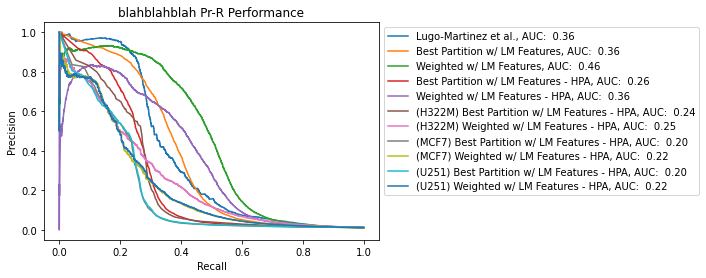

In [ ]:
#plot performance
precRecall_pairs = []
for cmpPerformance in performances4Comparision:
    precRecall_pairs.append(dataProcessing.loadResults_precRecall(cmpPerformance[0], cmpPerformance[1]))
modelEvaluating.plotAnalysis(workDir, 'blahblahblah', precRecall_pairs)

In [ ]:
testtest = pd.read_csv(LMprotein_complexesDir + 'integrated_MM+TSCS+Exp+Abun+Loc_features_test_either_model__H322M.tsv', sep='\t')
testtest.drop(columns=['HPA_SwissProt_1', 'HPA_SwissProt_2', 'HPA_SwissProt_3', 'HPA_SwissProt_4'], axis=1, inplace=True)
testtest.to_csv(LMprotein_complexesDir + 'integrated_MM+TSCS+Exp+Abun+Loc_features_test_either_model__H322.tsv', sep='\t', index=False)
print(testtest.shape)
print(testtest.head())

(304074, 264)
      Wan_1     Wan_2  Wan_3  ...  Hein_our_2  NCI_prot_abun  NCI_RNA_exp
0  0.354492  0.739258    0.0  ...         NaN       0.000000     0.981732
1  0.810059  0.723144    0.0  ...    0.954717       0.860924     0.353062
2       NaN       NaN    NaN  ...   -0.000470       0.760357     0.786877
3 -0.009567  0.000000    0.0  ...   -0.000342       0.000000     0.982393
4  0.281738  0.431152    0.0  ...         NaN       0.000000     0.456977

[5 rows x 264 columns]


In [ ]:
#get models and evaluate
precAcc, recAcc, precWeighted, recWeighted = ppiPrediction_v2.run(workDir, 
                                                                  LMprotein_complexesDir + 'integrated_MM+TSCS+Exp+Abun+Loc_features_training_either_model(orig)_noHPA.tsv', 
                                                                  LMprotein_complexesDir + 'integrated_training_labels_either_model.tsv',
                                                                  LMprotein_complexesDir + 'integrated_MM+TSCS+Exp+Abun+Loc_features_test_either_model__H322M.tsv',
                                                                  LMprotein_complexesDir + 'integrated_test_labels_either_model__H322M.tsv',
                                                                  expName='performanceAnalysis_lugoMartinez_integratedFeatures_woHPA',
                                                                  hasHeadings=True)  

In [ ]:
test = np.array([1, 2, 3, 4, 5, 6, 7, 8])
test[-4:]

array([5, 6, 7, 8])

In [ ]:
savedPartitions = pickle.load(open(workDir + 'models/models_ppiPrediction_performanceAnalysis_lugoMartinez_integratedFeatures_addedPrtn-NCIwHPA/savedPartitions.pkl', 'rb'))

In [ ]:
savedPartitions_inclHPA = np.argwhere(savedPartitions[:, -4:]==True)

In [ ]:
savedPartitions_inclHPA = []
for row in np.arange(savedPartitions.shape[0]):
  if np.sum(savedPartitions[row, -4:]) == 4:
    savedPartitions_inclHPA.append(row)

print(len(savedPartitions_inclHPA))

263


In [ ]:
labels_origPairs = pd.read_csv(LMprotein_complexesDir + 'integrated_test_labels_either_model(orig).tsv', sep='\t', names=['prot1', 'prot2', 'label']) 
labels_origPairs = labels_origPairs.astype({'prot1': 'str', 'prot2': 'str'})

In [ ]:
print(labels_origPairs.shape)
print(labels_origPairs.head())

(546645, 3)
   prot1  prot2  label
0   8467   6878      1
1  65993  28973      1
2   6125   9045      1
3  55173  54460      1
4   7153   9188      1


In [ ]:
fold0_files = glob.glob(workDir + 'models/models_origPairs_drewPlus+SCBC_recheck_5CV_0/*.pkl')
print(len(fold0_files))

3953


#Explore and Recapitulate LM NCI-60 data

##RNA data

In [ ]:
nci60_rnaExpression_CellLinesSelect = ['LC:NCI_H322M', 'BR:MCF7', 'CNS:U251']
nci60_protAbundance_tissues_CellLinesSelect = ['CNS:U251', 'BR:MCF7']

The RNA expression and protein expression tables are different, in particular because GeneIDs are missing for one, but not the other (RNA expression)

In [ ]:
nci60_rnaExpression_testSomething = pd.read_csv(LMprotein_complexesDir + 'nci60_all_expressionPerCellLine.tsv', sep='\t')
nci60_rnaExpression_testSomething.GeneID.isna().sum()

0

In [ ]:
nci60_rnaExpression = pd.read_csv(LMprotein_complexesDir + 'nci60_all_expressionPerCellLine.tsv', sep='\t')
nci60_rnaExpression.shape

(44667, 62)

In [ ]:
nci60_rnaExpression = pd.read_csv(LMprotein_complexesDir + 'nci60_all_expressionPerCellLine.tsv', sep='\t')
nci60_rnaExpression = nci60_rnaExpression[['GeneID']+nci60_rnaExpression_CellLinesSelect]
print(nci60_rnaExpression.shape)
print(nci60_rnaExpression.head())

(44667, 4)
   GeneID  LC:NCI_H322M   BR:MCF7  CNS:U251
0  283450      7.214816  7.525643  6.740907
1   23265      8.316888  7.853430  8.766860
2    5939      6.414669  5.227882  5.851983
3   64856      4.547779  4.447735  4.621430
4   64940      6.045622  4.928450  4.379325


In [ ]:
keys_woSplits = []
for row in np.arange(nci60_rnaExpression.shape[0]):
  if len(nci60_rnaExpression.iloc[row, 0].split(',')) == 1:
    keys_woSplits.append(row)
  else:
    print(nci60_rnaExpression.iloc[row, 0])

nci60_rnaExpression_woSplits = nci60_rnaExpression.iloc[keys_woSplits, :]

144203,408186,728715,100509445
3514,50802
3537,3546,26586,28831
2342,100529261
7067,9572
54487,100302197
55889,342096,653641,653643
9084,353513
29997,692091
3492,3493,3494,3500,3501,3502,3507,28396,102725526
95,100526760
9782,724102
9802,102723983
5170,101060747
353376,100302736
441519,441520,441521,541465,541466,728911,101060211,102723631,102723680,102723737
3537,3546,28831
51239,200539
26787,27316,101928747
284800,728882,100132948,100133121
364,100509620,101930168
375593,442578,442582
60,71
84672,441543
6083,6125
2678,91227,92086,728441
9848,101928198
1933,619569
51194,100130733
6693,101929889
27342,154881
23184,102723954
3493,3495,3500,3502,3507,28396
1500,100528016
55339,84826
3500,101930405
50858,100101116
151230,493911,100526832
101929963,101930299
26266,647087,101930655
3020,3021,100616282
4837,101928916
6173,100529097
6124,595097,595098,595099,595100
8916,101929134
6935,100996668
26220,100287576
6950,677812
114786,157503
25832,55672,149013,200030,284565,400818,728841,100132406,

In [ ]:
len(keys_woSplits)

42336

In [ ]:
newAdditions_count = 0
for row in np.arange(nci60_rnaExpression.shape[0]):
  if len(nci60_rnaExpression.iloc[row, 0].split(',')) > 1:
    newAdditions_count+=len(nci60_rnaExpression.iloc[row, 0].split(','))
    identifiers = nci60_rnaExpression.iloc[row, 0].split(',')
    for geneIdentifier in identifiers:
      newRow = nci60_rnaExpression.iloc[row, :].copy()
      newRow['GeneID'] = geneIdentifier
      nci60_rnaExpression_woSplits = nci60_rnaExpression_woSplits.append(newRow)

In [ ]:
newAdditions_count

6314

In [ ]:
len(nci60_rnaExpression_woSplits)

48650

In [ ]:
nci60_rnaExpression_woSplits_noDups = nci60_rnaExpression_woSplits.drop_duplicates(subset=['GeneID'])
#nci60_rnaExpression_woSplits_noDups = nci60_rnaExpression_woSplits_noDups.set_index('GeneID') 

In [ ]:
#nci60_rnaExpression_woSplits_noDups.GeneID
nci60_rnaExpression_woSplits.GeneID

0           283450
1            23265
2             5939
3            64856
4            64940
           ...    
44622          808
44649          671
44649       149684
44653        80863
44653    100507547
Name: GeneID, Length: 48650, dtype: object

In [ ]:
nci60_protAbundance = pd.read_csv(LMprotein_complexesDir + 'nci60_all_abundanceLFQPerCellLineProteome.tsv', sep='\t')
nci60_protAbundance.shape

(10537, 62)

In [ ]:
nci60_protAbundance = pd.read_csv(LMprotein_complexesDir + 'nci60_all_abundanceLFQPerCellLineProteome.tsv', sep='\t')
#nci60_protAbundance = nci60_protAbundance[['GeneID', 'GeneName', 'UniprotID']+nci60_rnaExpression_CellLinesSelect]
print(nci60_protAbundance.shape)
print(nci60_protAbundance.head())

(10537, 62)
  GeneID GeneName UniprotID  ...  RE:SN12C  RE:TK_10  RE:UO_31
0  51594     NBAS    A2RRP1  ...  5.525822  4.762221  5.453012
1  51594     NBAS  A2RRP1-2  ...  5.525822  4.762221  5.453012
2    NaN    DHRS1    Q96LJ7  ...  5.546074  0.000000  5.801932
3  79033     ERI3    O43414  ...  4.740450  5.496708  5.037148
4  79033     ERI3  O43414-2  ...  4.740450  5.496708  5.037148

[5 rows x 62 columns]


NCI-60 Protein Abundance doesn't have any joint GeneIDs

In [ ]:
keys_woSplits = []
for row in np.arange(nci60_protAbundance.shape[0]):
  try:
    if len(nci60_protAbundance.iloc[row, 0].split(',')) == 1:
      keys_woSplits.append(row)
    else:
      print(nci60_protAbundance.iloc[row, 0])
      
  except:
    if np.isnan(nci60_protAbundance.GeneID.loc[row]):
      print('Missing value registered...')
      keys_woSplits.append(row)

nci60_protAbundance_woSplits = nci60_protAbundance.iloc[keys_woSplits, :]

Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value regist

In [ ]:
len(keys_woSplits)

10537

In [ ]:
nci60_protAbundance_tissues = pd.read_csv(LMprotein_complexesDir + 'nci60_all_abundanceLFQPerTissueDeep.tsv', sep='\t')
nci60_protAbundance_tissues.shape

(10826, 12)

In [ ]:
nci60_protAbundance_tissues.head()

GeneID GeneName UniprotID  ...   BR:MCF7    ME:M14  LE:CCRF_CEM
0    NaN   MAP4K1    Q92918  ...  4.924155  5.096110     6.757123
1  51594     NBAS    A2RRP1  ...  6.859703  6.934473     7.047625
2  51594     NBAS  A2RRP1-2  ...  6.859703  6.934473     7.047625
3  10752     CHL1    O00533  ...  0.000000  5.575765     0.000000
4    NaN    DHRS1    Q96LJ7  ...  6.739881  6.992527     6.403326

[5 rows x 12 columns]

In [ ]:
keys_woSplits = []
for row in np.arange(nci60_protAbundance_tissues.shape[0]):
  try:
    if len(nci60_protAbundance_tissues.iloc[row, 0].split(',')) == 1:
      keys_woSplits.append(row)
    else:
      print(nci60_protAbundance_tissues.iloc[row, 0])
      
  except:
    if np.isnan(nci60_protAbundance_tissues.GeneID.loc[row]):
      print('Missing value registered...')
      keys_woSplits.append(row)

nci60_protAbundance_tissues_woSplits = nci60_protAbundance_tissues.iloc[keys_woSplits, :]

Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value registered...
Missing value regist

In [ ]:
len(keys_woSplits)

10826

In [ ]:
nci60_protAbundance_tissues_woSplits.rename(columns={'CCNS:U251': 'CNS:U251'}, inplace=True)

NCI-60 Tissue Protein Abundance doesn't have any joint GeneIDs

In [ ]:
#labels_origPairs['NCI_RNA_exp'] = min(nci60_rnaExpression_woSplits_noDups)
LM_trainingLabels[['NCI_RNA_exp', 'NCI_prot_abun_cell', 'NCI_prot_abun_tissue', 'NCI_prot_abun']] = np.nan

In [ ]:
type(LM_trainingLabels)

pandas.core.frame.DataFrame

In [ ]:
nci60_cellLine_specificFeats = dict()
for cellLines in nci60_rnaExpression_CellLinesSelect:
  nci60_cellLine_specificFeats[cellLines] = LM_trainingLabels 
rna_geneID_matchError_row = []
protAbun_geneID_matchError_row = []
protAbun_tissue_geneID_matchError_row = []

In [ ]:
type(nci60_cellLine_specificFeats['CNS:U251'])

pandas.core.frame.DataFrame

In [ ]:
print(nci60_rnaExpression_woSplits.GeneID.isna().sum())
print(nci60_protAbundance_woSplits.GeneID.isna().sum())
print(nci60_protAbundance_tissues_woSplits.GeneID.isna().sum())

0
836
804


In [ ]:
nci60_protAbundance_woSplits.head()

GeneID GeneName UniprotID  LC:NCI_H322M   BR:MCF7  CNS:U251
0  51594     NBAS    A2RRP1      5.193931  5.589469  5.689291
1  51594     NBAS  A2RRP1-2      5.193931  5.589469  5.689291
2    NaN    DHRS1    Q96LJ7      5.828885  5.031045  0.000000
3  79033     ERI3    O43414      5.451863  0.000000  0.000000
4  79033     ERI3  O43414-2      5.451863  0.000000  0.000000

In [ ]:
nci60_protAbundance_tissues_woSplits.head()

GeneID GeneName UniprotID  ...   BR:MCF7    ME:M14  LE:CCRF_CEM
0    NaN   MAP4K1    Q92918  ...  4.924155  5.096110     6.757123
1  51594     NBAS    A2RRP1  ...  6.859703  6.934473     7.047625
2  51594     NBAS  A2RRP1-2  ...  6.859703  6.934473     7.047625
3  10752     CHL1    O00533  ...  0.000000  5.575765     0.000000
4    NaN    DHRS1    Q96LJ7  ...  6.739881  6.992527     6.403326

[5 rows x 12 columns]

In [ ]:
retrieve_geneName('51594')

['NBAS', 'G1UI26']

In [ ]:
LM_trainingLabels.head()

label  prot1  prot2  ...  NCI_prot_abun_cell  NCI_prot_abun_tissue  NCI_prot_abun
0      1   1665  57187  ...                 NaN                   NaN            NaN
1      1  22916   1654  ...                 NaN                   NaN            NaN
2      1  51729  79228  ...                 NaN                   NaN            NaN
3      1   6158   7846  ...                 NaN                   NaN            NaN
4      1  11017   6427  ...                 NaN                   NaN            NaN

[5 rows x 7 columns]

In [ ]:
for cellLine in nci60_rnaExpression_CellLinesSelect:
  for row in np.arange(nci60_cellLine_specificFeats[cellLine].shape[0]):
    try:
      print('Cell line specific RNA expression feature replacement progress: {0}'.format(row/len(nci60_cellLine_specificFeats[cellLine])))
      prot1Exp = nci60_rnaExpression_woSplits.loc[nci60_rnaExpression_woSplits.GeneID==LM_trainingLabels.iloc[row, 1], cellLine].to_numpy()[0]
      prot2Exp = nci60_rnaExpression_woSplits.loc[nci60_rnaExpression_woSplits.GeneID==LM_trainingLabels.iloc[row, 2], cellLine].to_numpy()[0]
      protsRatio = min(prot1Exp, prot2Exp)/max(prot1Exp, prot2Exp)                                                   
      nci60_cellLine_specificFeats[cellLine].iloc[row, 3] = protsRatio

    except:
      print('GeneID match not found...')
      print('Searching UniProt online for matches...')
      rna_geneID_matchError_row.append(row) 
      '''
      try:
        if len(nci60_rnaExpression_woSplits.loc[nci60_rnaExpression_woSplits.GeneID==LM_trainingLabels.iloc[row, 1], cellLine]) == 0:
          prot1Exp = nci60_rnaExpression_woSplits.loc[nci60_rnaExpression_woSplits.GeneID.isin(retrieve_geneName(LM_trainingLabels.iloc[row, 1])), cellLine].to_numpy()[0]
        else:
          prot1Exp = nci60_rnaExpression_woSplits.loc[nci60_rnaExpression_woSplits.GeneID==LM_trainingLabels.iloc[row, 1], cellLine].to_numpy()[0]
        if len(nci60_rnaExpression_woSplits.loc[nci60_rnaExpression_woSplits.GeneID==LM_trainingLabels.iloc[row, 2], cellLine]) == 0:
          prot2Exp = nci60_rnaExpression_woSplits.loc[nci60_rnaExpression_woSplits.GeneID.isin(retrieve_geneName(LM_trainingLabels.iloc[row, 2])), cellLine].to_numpy()[0]
        else:
          prot2Exp = nci60_rnaExpression_woSplits.loc[nci60_rnaExpression_woSplits.GeneID==LM_trainingLabels.iloc[row, 2], cellLine].to_numpy()[0]
        protsRatio = min(prot1Exp, prot2Exp)/max(prot1Exp, prot2Exp)                                                   
        nci60_cellLine_specificFeats[cellLine].iloc[row, 3] = protsRatio          

      except:
        rna_geneID_matchError_row=rna_geneID_matchError_row.append(row) 
        '''  

  for row in np.arange(nci60_cellLine_specificFeats[cellLine].shape[0]):
    try:
      print('Cell line cell protein abundance feature replacement progress: {0}'.format(row/len(nci60_cellLine_specificFeats[cellLine])))
      prot1Exp = nci60_protAbundance_woSplits.loc[nci60_protAbundance_woSplits.GeneID==LM_trainingLabels.iloc[row, 1], cellLine].to_numpy()[0]
      prot2Exp = nci60_protAbundance_woSplits.loc[nci60_protAbundance_woSplits.GeneID==LM_trainingLabels.iloc[row, 2], cellLine].to_numpy()[0]
      protsRatio = min(prot1Exp, prot2Exp)/max(prot1Exp, prot2Exp)                                                   
      nci60_cellLine_specificFeats[cellLine].iloc[row, 4] = protsRatio

    except:
      print('GeneID match not found...')
      print('Searching UniProt online for matches...')
      protAbun_geneID_matchError_row.append(row) 
      '''
      try:
        if len(nci60_protAbundance_woSplits.loc[nci60_protAbundance_woSplits.GeneID==LM_trainingLabels.iloc[row, 1], cellLine]) == 0:
          prot1Exp = nci60_protAbundance_woSplits.loc[nci60_protAbundance_woSplits.GeneID.isin(retrieve_geneName(LM_trainingLabels.iloc[row, 1])), cellLine].to_numpy()[0]
        else:
          prot1Exp = nci60_protAbundance_woSplits.loc[nci60_protAbundance_woSplits.GeneID==LM_trainingLabels.iloc[row, 1], cellLine].to_numpy()[0]
        if len(nci60_protAbundance_woSplits.loc[nci60_protAbundance_woSplits.GeneID==LM_trainingLabels.iloc[row, 2], cellLine]) == 0:
          prot2Exp = nci60_protAbundance_woSplits.loc[nci60_protAbundance_woSplits.GeneID.isin(retrieve_geneName(LM_trainingLabels.iloc[row, 2])), cellLine].to_numpy()[0]
        else:
          prot2Exp = nci60_protAbundance_woSplits.loc[nci60_protAbundance_woSplits.GeneID==LM_trainingLabels.iloc[row, 2], cellLine].to_numpy()[0]
        protsRatio = min(prot1Exp, prot2Exp)/max(prot1Exp, prot2Exp)                                                   
        nci60_cellLine_specificFeats[cellLine].iloc[row, 4] = protsRatio  

      except:
        protAbun_geneID_matchError_row = protAbun_geneID_matchError_row.append(row) 
      '''  

Streaming output truncated to the last 5000 lines.
Cell line specific RNA expression feature replacement progress: 0.9898397636737982
Cell line specific RNA expression feature replacement progress: 0.9898417981624499
Cell line specific RNA expression feature replacement progress: 0.9898438326511014
Cell line specific RNA expression feature replacement progress: 0.9898458671397531
Cell line specific RNA expression feature replacement progress: 0.9898479016284047
Cell line specific RNA expression feature replacement progress: 0.9898499361170563
Cell line specific RNA expression feature replacement progress: 0.989851970605708
Cell line specific RNA expression feature replacement progress: 0.9898540050943596
Cell line specific RNA expression feature replacement progress: 0.9898560395830112
Cell line specific RNA expression feature replacement progress: 0.9898580740716628
Cell line specific RNA expression feature replacement progress: 0.9898601085603145
Cell line specific RNA expression fea

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


Streaming output truncated to the last 5000 lines.
GeneID match not found...
Searching UniProt online for matches...
Cell line cell protein abundance feature replacement progress: 0.9930664626752712
GeneID match not found...
Searching UniProt online for matches...
Cell line cell protein abundance feature replacement progress: 0.9930684971639229
Cell line cell protein abundance feature replacement progress: 0.9930705316525744
GeneID match not found...
Searching UniProt online for matches...
Cell line cell protein abundance feature replacement progress: 0.9930725661412261
Cell line cell protein abundance feature replacement progress: 0.9930746006298777
Cell line cell protein abundance feature replacement progress: 0.9930766351185293
Cell line cell protein abundance feature replacement progress: 0.9930786696071809
GeneID match not found...
Searching UniProt online for matches...
Cell line cell protein abundance feature replacement progress: 0.9930807040958326
GeneID match not found...
Sea

In [ ]:
for cellLine in nci60_rnaExpression_CellLinesSelect:
  for row in np.arange(nci60_cellLine_specificFeats[cellLine].shape[0]):
    try:
      print('Cell line tissue protein abundance feature replacement progress: {0}'.format(row/len(nci60_cellLine_specificFeats[cellLine])))
      prot1Exp = nci60_protAbundance_tissues.loc[nci60_protAbundance_tissues.GeneID==LM_trainingLabels.iloc[row, 1], cellLine].to_numpy()[0]
      prot2Exp = nci60_protAbundance_tissues.loc[nci60_protAbundance_tissues.GeneID==LM_trainingLabels.iloc[row, 2], cellLine].to_numpy()[0]
      protsRatio = min(prot1Exp, prot2Exp)/max(prot1Exp, prot2Exp)                                                   
      nci60_cellLine_specificFeats[cellLine].iloc[row, 5] = protsRatio

    except:
      print('GeneID match not found...')
      protAbun_tissue_geneID_matchError_row.append(row) 

Streaming output truncated to the last 5000 lines.
GeneID match not found...
Cell line tissue protein abundance feature replacement progress: 0.9955404008756439
GeneID match not found...
Cell line tissue protein abundance feature replacement progress: 0.9955424353642955
GeneID match not found...
Cell line tissue protein abundance feature replacement progress: 0.9955444698529472
GeneID match not found...
Cell line tissue protein abundance feature replacement progress: 0.9955465043415987
GeneID match not found...
Cell line tissue protein abundance feature replacement progress: 0.9955485388302504
GeneID match not found...
Cell line tissue protein abundance feature replacement progress: 0.9955505733189021
GeneID match not found...
Cell line tissue protein abundance feature replacement progress: 0.9955526078075536
GeneID match not found...
Cell line tissue protein abundance feature replacement progress: 0.9955546422962053
GeneID match not found...
Cell line tissue protein abundance feature 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


Streaming output truncated to the last 5000 lines.
Cell line tissue protein abundance feature replacement progress: 0.9949137783709443
GeneID match not found...
Cell line tissue protein abundance feature replacement progress: 0.9949158128595958
GeneID match not found...
Cell line tissue protein abundance feature replacement progress: 0.9949178473482475
GeneID match not found...
Cell line tissue protein abundance feature replacement progress: 0.9949198818368992
GeneID match not found...
Cell line tissue protein abundance feature replacement progress: 0.9949219163255507
GeneID match not found...
Cell line tissue protein abundance feature replacement progress: 0.9949239508142024
GeneID match not found...
Cell line tissue protein abundance feature replacement progress: 0.994925985302854
GeneID match not found...
Cell line tissue protein abundance feature replacement progress: 0.9949280197915056
GeneID match not found...
Cell line tissue protein abundance feature replacement progress: 0.994

In [ ]:
for cellLine in nci60_rnaExpression_CellLinesSelect:
  for row in nci60_cellLine_specificFeats[cellLine].index:
    print('Cell line {0} specific protein abundance feature replacement progress: {1}'.format(cellLine, row/len(nci60_cellLine_specificFeats[cellLine])))
    if np.isnan(nci60_cellLine_specificFeats[cellLine].loc[row, 'NCI_prot_abun_cell']):
      nci60_cellLine_specificFeats[cellLine].loc[row, 'NCI_prot_abun'] =  nci60_cellLine_specificFeats[cellLine].loc[row, 'NCI_prot_abun_tissue']
    elif np.isnan(nci60_cellLine_specificFeats[cellLine].loc[row, 'NCI_prot_abun_tissue']):
      nci60_cellLine_specificFeats[cellLine].loc[row, 'NCI_prot_abun'] =  nci60_cellLine_specificFeats[cellLine].loc[row, 'NCI_prot_abun_cell']
    else:
      nci60_cellLine_specificFeats[cellLine].loc[row, 'NCI_prot_abun'] = 0.5*(nci60_cellLine_specificFeats[cellLine].loc[row, 'NCI_prot_abun_tissue']+ 
                                                                          nci60_cellLine_specificFeats[cellLine].loc[row, 'NCI_prot_abun_cell'])

Streaming output truncated to the last 5000 lines.
Cell line CNS:U251 specific protein abundance feature replacement progress: 0.9898275567418885
Cell line CNS:U251 specific protein abundance feature replacement progress: 0.9898295912305402
Cell line CNS:U251 specific protein abundance feature replacement progress: 0.9898316257191917
Cell line CNS:U251 specific protein abundance feature replacement progress: 0.9898336602078434
Cell line CNS:U251 specific protein abundance feature replacement progress: 0.989835694696495
Cell line CNS:U251 specific protein abundance feature replacement progress: 0.9898377291851466
Cell line CNS:U251 specific protein abundance feature replacement progress: 0.9898397636737982
Cell line CNS:U251 specific protein abundance feature replacement progress: 0.9898417981624499
Cell line CNS:U251 specific protein abundance feature replacement progress: 0.9898438326511014
Cell line CNS:U251 specific protein abundance feature replacement progress: 0.9898458671397531


In [ ]:
for cellLine in nci60_rnaExpression_CellLinesSelect:
    print('Cell Line--{0}'.format(cellLine))
    print('_______________________________')
    print('NCI_RNA_exp: {0}'.format(nci60_cellLine_specificFeats[cellLine].NCI_RNA_exp.isna().sum()))
    print('NCI_prot_abun_cell: {0}'.format(nci60_cellLine_specificFeats[cellLine].NCI_prot_abun_cell.isna().sum()))
    print('NCI_prot_abun_tissue: {0}'.format(nci60_cellLine_specificFeats[cellLine].NCI_prot_abun_tissue.isna().sum()))
    print('NCI_prot_abun: {0}'.format(nci60_cellLine_specificFeats[cellLine].NCI_prot_abun.isna().sum()))

Cell Line--LC:NCI_H322M
_______________________________
NCI_RNA_exp: 0
NCI_prot_abun_cell: 162027
NCI_prot_abun_tissue: 40751
NCI_prot_abun: 23681
Cell Line--BR:MCF7
_______________________________
NCI_RNA_exp: 0
NCI_prot_abun_cell: 162027
NCI_prot_abun_tissue: 40751
NCI_prot_abun: 23681
Cell Line--CNS:U251
_______________________________
NCI_RNA_exp: 0
NCI_prot_abun_cell: 162027
NCI_prot_abun_tissue: 40751
NCI_prot_abun: 23681


In [ ]:
pickle.dump(nci60_cellLine_specificFeats, open(workDir + 'nci60_cellLine_specificFeats2.pkl', 'wb'))

In [ ]:
LM_trainingData

In [ ]:
for cellLine in nci60_rnaExpression_CellLinesSelect:
    print('Cell Line--{0}'.format(cellLine))
    print('_______________________________')
    print(nci60_cellLine_specificFeats[cellLine].shape)

Cell Line--LC:NCI_H322M
_______________________________
(491524, 7)
Cell Line--BR:MCF7
_______________________________
(491524, 7)
Cell Line--CNS:U251
_______________________________
(491524, 7)


In [ ]:
for cellLine in nci60_rnaExpression_CellLinesSelect:
  print('generating {0} cell-line specific training data...'.format(cellLine))
  cellSpecific_trainingData = LM_trainingData.copy()
  cellSpecific_trainingData.loc[:, ['NCI_RNA_exp', 'NCI_prot_abun']] = nci60_cellLine_specificFeats[cellLine].loc[:, ['NCI_RNA_exp', 'NCI_prot_abun']]
  cellSpecific_trainingData = cellSpecific_trainingData.loc[cellSpecific_trainingData.NCI_prot_abun.notnull()]
  cellSpecific_trainingData.to_csv(LMprotein_complexesDir + 'integrated_MM+TSCS+Exp+Abun+Loc_features_training_either_model_{0}-cell-line_specific+HPAconsensus.tsv'.format(cellLine), sep='\t', index=False)
  print('complete')

generating LC:NCI_H322M cell-line specific training data...
complete
generating BR:MCF7 cell-line specific training data...
complete
generating CNS:U251 cell-line specific training data...
complete


In [ ]:
cellSpecific_trainingData.head()

Wan_1  Wan_2  Wan_3  ...  HPA_SwissProt_2  HPA_SwissProt_3  HPA_SwissProt_4
0    0.0    0.0    0.0  ...              0.0              0.0              1.0
1    NaN    NaN    NaN  ...              0.0              0.0              1.0
2    NaN    NaN    NaN  ...              0.0              0.5              0.0
3    NaN    NaN    NaN  ...              0.0              0.0              1.0
4    0.0    0.0    0.0  ...              0.0              0.0              1.0

[5 rows x 268 columns]

In [ ]:
nci60_cellLine_specificFeats[cellLine].loc[nci60_cellLine_specificFeats[cellLine].NCI_prot_abun.notnull(), ['label', 'prot1', 'prot2']].to_csv(LMprotein_complexesDir + 'integrated_training_labels_either_model_cell-line-specific_wHPAconsensus.tsv', sep='\t', index=False)

In [ ]:
testExport = pd.read_csv(LMprotein_complexesDir + 'integrated_MM+TSCS+Exp+Abun+Loc_features_test_either_model(orig)_H322M+consensusHPA.tsv', sep='\t')
testExport.shape

(304074, 268)

In [ ]:
labels_U251 = pd.read_csv(LMprotein_complexesDir + 'integrated_test_labels_either_model__U251.tsv', sep='\t')
labels_MCF7 = pd.read_csv(LMprotein_complexesDir + 'integrated_test_labels_either_model__MCF7.tsv', sep='\t')
labels_H322 = pd.read_csv(LMprotein_complexesDir + 'integrated_test_labels_either_model__H322M.tsv', sep='\t')

In [ ]:
labels_H322.shape

(304074, 5)

In [ ]:
cellSpecific_trainingData.head()

Wan_1  Wan_2  Wan_3  ...  HPA_SwissProt_2  HPA_SwissProt_3  HPA_SwissProt_4
0    0.0    0.0    0.0  ...              0.0              0.0              1.0
1    NaN    NaN    NaN  ...              0.0              0.0              1.0
2    NaN    NaN    NaN  ...              0.0              0.5              0.0
3    NaN    NaN    NaN  ...              0.0              0.0              1.0
4    0.0    0.0    0.0  ...              0.0              0.0              1.0

[5 rows x 268 columns]

In [ ]:
#LM_trainingData_H322M = LM_trainingData
LM_trainingData.shape

(491524, 268)

In [ ]:
rna_geneID_matchError_row = []
protAbun_geneID_matchError_row = []
protAbun_tissue_geneID_matchError_row = []

In [ ]:
for cellLine in nci60_rnaExpression_CellLinesSelect:
  for row in nci60_cellLine_specificFeats[cellLine].loc[nci60_cellLine_specificFeats[cellLine].NCI_prot_abun_cell.isna()].index:

    print('Searching UniProt online for matches...')
    try:
      if len(nci60_protAbundance_woSplits.loc[nci60_protAbundance_woSplits.GeneID==LM_trainingLabels.loc[row, 'prot1'], cellLine]) == 0:
        prot1Exp = nci60_protAbundance_woSplits.loc[nci60_protAbundance_woSplits.GeneID.isin(retrieve_geneName(LM_trainingLabels.iloc[row, 1])), cellLine].to_numpy()[0]
      else:
        prot1Exp = nci60_protAbundance_woSplits.loc[nci60_protAbundance_woSplits.GeneID==LM_trainingLabels.iloc[row, 1], cellLine].to_numpy()[0]

      if len(nci60_protAbundance_woSplits.loc[nci60_protAbundance_woSplits.GeneID==LM_trainingLabels.iloc[row, 2], cellLine]) == 0:
        prot2Exp = nci60_protAbundance_woSplits.loc[nci60_protAbundance_woSplits.GeneID.isin(retrieve_geneName(LM_trainingLabels.iloc[row, 2])), cellLine].to_numpy()[0]
      else:
        prot2Exp = nci60_protAbundance_woSplits.loc[nci60_protAbundance_woSplits.GeneID==LM_trainingLabels.iloc[row, 2], cellLine].to_numpy()[0]

      protsRatio = min(prot1Exp, prot2Exp)/max(prot1Exp, prot2Exp)                                                   
      nci60_cellLine_specificFeats[cellLine].iloc[row, 4] = protsRatio  

    except:
      protAbun_geneID_matchError_row.append(row) 

In [ ]:
pickle.dump(nci60_cellLine_specificFeats, open(workDir + 'nci60_cellLine_specificFeats.pkl', 'wb'))

In [ ]:
nci60_cellLine_specificFeats = pickle.load(open(workDir + 'nci60_cellLine_specificFeats.pkl', 'rb'))

In [ ]:
nci60_cellLine_specificFeats['CNS:U251'].head()

label  prot1  prot2  ...  NCI_prot_abun_cell  NCI_prot_abun_tissue  NCI_prot_abun
0      1   1665  57187  ...            0.853123                   NaN            NaN
1      1  22916   1654  ...            0.000000                   NaN            NaN
2      1  51729  79228  ...            0.903255                   NaN            NaN
3      1   6158   7846  ...            0.789927                   NaN            NaN
4      1  11017   6427  ...            0.000000                   NaN            NaN

[5 rows x 7 columns]

In [ ]:
nci60_cellLine_specificFeats.keys()

dict_keys(['LC:NCI_H322M', 'BR:MCF7', 'CNS:U251'])

In [ ]:
for row in np.arange(labels_origPairs.shape[0]):
    try:
      print(row/len(labels_origPairs))
      prot1Exp = nci60_rnaExpression_woSplits_noDups.loc[nci60_rnaExpression_woSplits_noDups.GeneID==labels_origPairs.iloc[row, 0], 'CNS:U251'].to_numpy()[0]
      prot2Exp = nci60_rnaExpression_woSplits_noDups.loc[nci60_rnaExpression_woSplits_noDups.GeneID==labels_origPairs.iloc[row, 1], 'CNS:U251'].to_numpy()[0]
      protsRatio = min(prot1Exp, prot2Exp)/max(prot1Exp, prot2Exp)                                                   
      labels_origPairs.iloc[row, 3] = protsRatio
    except:
      print('error!!!!')
      break

Streaming output truncated to the last 5000 lines.
0.9908532960147811
0.9908551253555781
0.9908569546963751
0.9908587840371722
0.9908606133779693
0.9908624427187663
0.9908642720595633
0.9908661014003604
0.9908679307411574
0.9908697600819545
0.9908715894227516
0.9908734187635485
0.9908752481043456
0.9908770774451426
0.9908789067859397
0.9908807361267368
0.9908825654675337
0.9908843948083308
0.9908862241491279
0.9908880534899249
0.990889882830722
0.990891712171519
0.990893541512316
0.9908953708531131
0.9908972001939101
0.9908990295347072
0.9909008588755042
0.9909026882163012
0.9909045175570983
0.9909063468978954
0.9909081762386924
0.9909100055794894
0.9909118349202864
0.9909136642610835
0.9909154936018806
0.9909173229426776
0.9909191522834746
0.9909209816242717
0.9909228109650687
0.9909246403058658
0.9909264696466629
0.9909282989874598
0.9909301283282569
0.990931957669054
0.990933787009851
0.9909356163506481
0.990937445691445
0.9909392750322421
0.9909411043730392
0.9909429337138362
0.990

In [ ]:
labels_origPairs.head()

prot1  prot2  label  NCI_RNA_exp
0   8467   6878      1     0.942560
1  65993  28973      1     0.932474
2   6125   9045      1     0.436250
3  55173  54460      1     0.817969
4   7153   9188      1     0.394739

In [ ]:
for row in np.arange(nci60_rnaExpression.shape[0]):
  if len(nci60_rnaExpression.iloc[row, 0].split(',')) > 1:
    identifiers = nci60_rnaExpression.iloc[row, 0].split(',')
    for geneIdentifier in identifiers:
      newRow = nci60_rnaExpression.iloc[row, :].copy()
      newRow['GeneID'] = geneIdentifier
      nci60_rnaExpression_woSplits = nci60_rnaExpression_woSplits.append(newRow)

nci60_rnaExpression_woSplits_noDups = nci60_rnaExpression_woSplits.drop_duplicates(subset=['GeneID'])
nci60_rnaExpression_woSplits_noDups = nci60_rnaExpression_woSplits_noDups.set_index('GeneID') 
nci60_rnaExpression_woSplits_noDups = nci60_rnaExpression_woSplits_noDups.T.corr()

In [ ]:
labels_origPairs['NCI_prot_abun_cell'] = labels_origPairs.iloc[:, 0]
labels_origPairs['NCI_prot_abun_cell'] = np.nan

labels_origPairs['NCI_prot_abun_tissue'] = labels_origPairs.iloc[:, 0]
labels_origPairs['NCI_prot_abun_tissue'] = np.nan

In [ ]:
labels_origPairs.head()

prot1  prot2  label  NCI_RNA_exp  NCI_prot_abun_cell  NCI_prot_abun_tissue
0   8467   6878      1     0.942560                 NaN                   NaN
1  65993  28973      1     0.932474                 NaN                   NaN
2   6125   9045      1     0.436250                 NaN                   NaN
3  55173  54460      1     0.817969                 NaN                   NaN
4   7153   9188      1     0.394739                 NaN                   NaN

In [ ]:
for row in np.arange(labels_origPairs.shape[0]):
    try:
      labels_origPairs.iloc[row, 3] = nci60_rnaExpression_woSplits_noDups.loc[labels_origPairs.iloc[row, 0], labels_origPairs.iloc[row, 1]]
    except:
      print('error!!!!')
      break

In [ ]:
nci60_rnaExpression_woSplits.to_csv(LMprotein_complexesDir + 'nci60_all_expressionPerCellLine_woSplits_columns2Filter.tsv', sep='\t', index=False)

In [ ]:
labels_origPairs.head()

prot1  prot2  label  NCI_prot_abun
0   8467   6878      1      -0.142617
1  65993  28973      1       0.469560
2   6125   9045      1       0.572970
3  55173  54460      1      -0.215290
4   7153   9188      1      -0.114937

In [ ]:
lmTest.head()

Wan_1     Wan_2  Wan_3  ...  HPA_SwissProt_2  HPA_SwissProt_3  HPA_SwissProt_4
0  0.000000  0.000000    0.0  ...              0.0         0.000000              1.0
1  0.354492  0.739258    0.0  ...              0.5         0.750000              0.0
2  0.417969  0.701172    0.0  ...              0.0         0.666667              0.0
3       NaN       NaN    NaN  ...              0.5         0.750000              0.0
4  0.000000  0.000000    0.0  ...              0.5         0.666667              0.5

[5 rows x 268 columns]

##protein abundance

In [ ]:
labels_origPairs_prot1 = sorted(list(set(labels_origPairs.loc[labels_origPairs['prot1'].notnull(), 'prot1'].to_list())))
labels_origPairs_prot2 = sorted(list(set(labels_origPairs.loc[labels_origPairs['prot2'].notnull(), 'prot2'].to_list())))
labels_origPairs_prots = sorted(list(set(labels_origPairs_prot1 + labels_origPairs_prot2)))
print(len(labels_origPairs_prots))

1097


In [ ]:
isItthere = labels_origPairs.iloc[:, 0:2].copy()
isItthere['byCellLine'] = np.nan
isItthere['byTissue'] = np.nan
isItthere.head()

prot1  prot2  byCellLine  byTissue
0   8467   6878         NaN       NaN
1  65993  28973         NaN       NaN
2   6125   9045         NaN       NaN
3  55173  54460         NaN       NaN
4   7153   9188         NaN       NaN

###by cell line

In [ ]:
noMatch_prot1 = 0
noMatch_prot1List = []
for prot1 in labels_origPairs_prot1:
  if (nci60_protAbundance.GeneID == prot1).any():
    pass
  else:
    noMatch_prot1List.append(prot1)
    #print(prot1)
    noMatch_prot1+=1

In [ ]:
len(noMatch_prot1List)

134

In [ ]:
noMatch_prot1List[:5]

['10001', '10025', '1024', '10240', '10296']

In [ ]:
noMatch_prot2 = 0
noMatch_prot2List = []
for prot2 in labels_origPairs_prot2:
  if (nci60_protAbundance.GeneID == prot2).any():
    pass
  else:
    noMatch_prot2List.append(prot2)
    #print(prot2)
    noMatch_prot2+=1

In [ ]:
retrieve_geneName('10752')

['NCHL1', 'A0A087X0M8']

In [ ]:
nci60_protAbundance.loc[nci60_protAbundance.GeneName=='10001', 'GeneID'].notnull().sum()

0

In [ ]:
nci60_protAbundance.loc[nci60_protAbundance.GeneName=='MED6', 'GeneName'].notnull().sum()

0

In [ ]:
nci60_protAbundance.loc[nci60_protAbundance.GeneName.str.contains('RT31'), 'GeneName'].notnull().sum()

0

In [ ]:
nci60_protAbundance_tissues.loc[nci60_protAbundance_tissues.GeneName=='10001', 'GeneID'].notnull().sum()

0

In [ ]:
nci60_protAbundance_tissues.loc[nci60_protAbundance_tissues.GeneName=='MED6', 'GeneID']

7839    10001
Name: GeneID, dtype: object

In [ ]:
nci60_protAbundance_tissues.loc[nci60_protAbundance_tissues.GeneName.str.contains('RT31'), 'GeneName'].notnull().sum()

0

In [ ]:
nci60_protAbundance.loc[nci60_protAbundance.UniprotID=='Q92665', 'UniprotID'].notnull().sum()

0

In [ ]:
geneName_matchesFound = 0
geneName_matchesNOTFound = 0
proteins_notFound = []

for prot1 in noMatch_prot1List:
  #print(prot1)
  geneNames = retrieve_geneName(prot1)
  #print(geneNames)
  for geneName in geneNames:
    #print(geneName)
    if nci60_protAbundance.loc[nci60_protAbundance.GeneName.str.contains(geneName), 'GeneName'].notnull().sum() > 0:
      nci60_protAbundance.loc[nci60_protAbundance.GeneName.str.contains(geneName), 'GeneID'] = prot1
      geneName_matchesFound+=1
      break
    elif nci60_protAbundance_tissues.loc[nci60_protAbundance_tissues.GeneName.str.contains(geneName), 'GeneName'].notnull().sum() > 0:
      nci60_protAbundance_tissues.loc[nci60_protAbundance_tissues.GeneName.str.contains(geneName), 'GeneID'] = prot1
      geneName_matchesFound+=1
      break
    else:
      geneName_matchesNOTFound+=1
      proteins_notFound.append(prot1)
      print(prot1)

proteins_notFound_set = sorted(list(set(proteins_notFound)))

10240
10362
10454
10454
10884
11073
11073
11073
11073
11097
11143
11200
1791
23091
23091
23091
23129
23199
25913
25913
25913
25913
2889
2972
2972
2972
3689
3689
3689
3690
3778
3778
3778
3778
3778
3778
3778
3778
3778
3778
3778
3778
3778
3778
3778
4217
4296
4296
4794
4794
4794
4794
51742
5287
5287
5287
5290
5290
5435
5435
5440
5440
55168
57154
5889
5932
5932
6416
64960
64965
64969
6638
6638
6696
6696
6696
6696
6696
6696
6850
6850
6850
6929
6929
6929
7035
7048
7048
7048
79595
79595
79595
79595
79706
79706
7979
7979
80155
80155
80155
84062
84062
84062
84062
84062
84148
843
843
843
84893
84893
84893
84893
92421
9265
953
9658
9658
983
983
983
983


In [ ]:
proteins_notFound_set = sorted(list(set(proteins_notFound)))
len(proteins_notFound_set)

53

In [ ]:
for row in np.arange(labels_origPairs.shape[0]):
    print('first: {0}'.format(row/len(labels_origPairs)))
    try:
      print(row/len(labels_origPairs))
      prot1Exp = nci60_protAbundance.loc[nci60_protAbundance.GeneID==labels_origPairs.iloc[row, 0], 'CNS:U251'].to_numpy()[0]
      prot2Exp = nci60_protAbundance.loc[nci60_protAbundance.GeneID==labels_origPairs.iloc[row, 1], 'CNS:U251'].to_numpy()[0]
      protsRatio = min(prot1Exp, prot2Exp)/max(prot1Exp, prot2Exp)                                                   
      labels_origPairs.iloc[row, 4] = protsRatio
    except:
      print('error!!!!')

for row in np.arange(labels_origPairs.shape[0]):
    print('second: {0}'.format(row/len(labels_origPairs)))
    try:
      print(row/len(labels_origPairs))
      prot1Exp = nci60_protAbundance_tissues.loc[nci60_protAbundance_tissues.GeneID==labels_origPairs.iloc[row, 0], 'CCNS:U251'].to_numpy()[0]
      prot2Exp = nci60_protAbundance_tissues.loc[nci60_protAbundance_tissues.GeneID==labels_origPairs.iloc[row, 1], 'CCNS:U251'].to_numpy()[0]
      protsRatio = min(prot1Exp, prot2Exp)/max(prot1Exp, prot2Exp)                                                   
      labels_origPairs.iloc[row, 5] = protsRatio
    except:
      print('error!!!!')

first: 0.0
0.0
first: 1.8293407970437853e-06
1.8293407970437853e-06
first: 3.6586815940875707e-06
3.6586815940875707e-06
first: 5.4880223911313556e-06
5.4880223911313556e-06
first: 7.317363188175141e-06
7.317363188175141e-06
first: 9.146703985218927e-06
9.146703985218927e-06
error!!!!
first: 1.0976044782262711e-05
1.0976044782262711e-05
first: 1.2805385579306497e-05
1.2805385579306497e-05
first: 1.4634726376350283e-05
1.4634726376350283e-05
error!!!!
first: 1.646406717339407e-05
1.646406717339407e-05
first: 1.8293407970437854e-05
1.8293407970437854e-05
first: 2.0122748767481637e-05
2.0122748767481637e-05
first: 2.1952089564525422e-05
2.1952089564525422e-05
first: 2.3781430361569208e-05
2.3781430361569208e-05
first: 2.5610771158612994e-05
2.5610771158612994e-05
first: 2.744011195565678e-05
2.744011195565678e-05
first: 2.9269452752700565e-05
2.9269452752700565e-05
first: 3.109879354974435e-05
3.109879354974435e-05
first: 3.292813434678814e-05
3.292813434678814e-05
first: 3.47574751438319

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


Streaming output truncated to the last 5000 lines.
error!!!!
first: 0.9959022766146219
0.9959022766146219
first: 0.995904105955419
0.995904105955419
first: 0.995905935296216
0.995905935296216
first: 0.995907764637013
0.995907764637013
first: 0.9959095939778101
0.9959095939778101
first: 0.9959114233186072
0.9959114233186072
first: 0.9959132526594042
0.9959132526594042
first: 0.9959150820002012
0.9959150820002012
error!!!!
first: 0.9959169113409982
0.9959169113409982
first: 0.9959187406817953
0.9959187406817953
first: 0.9959205700225924
0.9959205700225924
first: 0.9959223993633894
0.9959223993633894
first: 0.9959242287041864
0.9959242287041864
first: 0.9959260580449835
0.9959260580449835
first: 0.9959278873857805
0.9959278873857805
error!!!!
first: 0.9959297167265776
0.9959297167265776
first: 0.9959315460673747
0.9959315460673747
first: 0.9959333754081716
0.9959333754081716
first: 0.9959352047489687
0.9959352047489687
first: 0.9959370340897657
0.9959370340897657
first: 0.9959388634305628

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


Streaming output truncated to the last 5000 lines.
second: 0.9956004353831097
0.9956004353831097
second: 0.9956022647239068
0.9956022647239068
error!!!!
second: 0.9956040940647037
0.9956040940647037
second: 0.9956059234055008
0.9956059234055008
second: 0.9956077527462979
0.9956077527462979
second: 0.9956095820870949
0.9956095820870949
second: 0.995611411427892
0.995611411427892
second: 0.995613240768689
0.995613240768689
second: 0.995615070109486
0.995615070109486
second: 0.9956168994502831
0.9956168994502831
second: 0.9956187287910802
0.9956187287910802
second: 0.9956205581318772
0.9956205581318772
second: 0.9956223874726742
0.9956223874726742
error!!!!
second: 0.9956242168134712
0.9956242168134712
second: 0.9956260461542683
0.9956260461542683
second: 0.9956278754950654
0.9956278754950654
second: 0.9956297048358624
0.9956297048358624
second: 0.9956315341766594
0.9956315341766594
second: 0.9956333635174565
0.9956333635174565
second: 0.9956351928582535
0.9956351928582535
second: 0.99563

In [ ]:
labels_origPairs.loc[(labels_origPairs.NCI_prot_abun_cell.notnull()) | (labels_origPairs.NCI_prot_abun_tissue.notnull()), 'NCI_prot_abun_PRESENT'].isna().sum()

519224

In [ ]:
len(labels_origPairs)

In [ ]:
labels_origPairs = labels_origPairs.rename({'NCI_prot_abun_PRESENT': 'NCI_prot_abun'}, inplace=True)

In [ ]:
labels_origPairs.head()

In [ ]:
labels_origPairs_U251replacements_partial = labels_origPairs.loc[(labels_origPairs.NCI_prot_abun_cell.notnull()) | (labels_origPairs.NCI_prot_abun_tissue.notnull()), :]
labels_origPairs_U251replacements_partial.drop(columns=['NCI_prot_abun_PRESENT'], axis=1, inplace=True)
print(len(labels_origPairs_U251replacements_partial))

519224


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
labels_origPairs_U251replacements_partial.head()

prot1  prot2  label  NCI_RNA_exp  NCI_prot_abun_cell  NCI_prot_abun_tissue
0   8467   6878      1     0.942560                 0.0              0.823084
1  65993  28973      1     0.932474                 0.0              0.894285
3  55173  54460      1     0.817969                 NaN              0.980095
4   7153   9188      1     0.394739                 0.0              0.904356
5  22794  65109      1     0.904151                 NaN              0.776494

In [ ]:
labels_origPairs_U251replacements_partial['NCI_prot_abun'] = (labels_origPairs_U251replacements_partial['NCI_prot_abun_cell']+labels_origPairs_U251replacements_partial['NCI_prot_abun_tissue'])/2

In [ ]:
for row in np.arange(len(labels_origPairs_U251replacements_partial.NCI_prot_abun.isna())):
  print(labels_origPairs_U251replacements_partial.iloc[row, :])
  break

prot1                       8467
prot2                       6878
label                          1
NCI_RNA_exp              0.94256
NCI_prot_abun_cell             0
NCI_prot_abun_tissue    0.823084
NCI_prot_abun           0.411542
Name: 0, dtype: object


In [ ]:
for idx in labels_origPairs_U251replacements_partial.loc[labels_origPairs_U251replacements_partial.NCI_prot_abun.isna(), 'NCI_prot_abun'].index:
  print(idx)
  if np.isnan(labels_origPairs_U251replacements_partial.loc[idx, 'NCI_prot_abun_cell']):
    labels_origPairs_U251replacements_partial.loc[idx, 'NCI_prot_abun'] = labels_origPairs_U251replacements_partial.loc[idx, 'NCI_prot_abun_tissue']
  elif np.isnan(labels_origPairs_U251replacements_partial.loc[idx, 'NCI_prot_abun_tissue']):
    labels_origPairs_U251replacements_partial.loc[idx, 'NCI_prot_abun'] = labels_origPairs_U251replacements_partial.loc[idx, 'NCI_prot_abun_cell']

Streaming output truncated to the last 5000 lines.
529947
529958
529959
529960
529962
529965
529967
529969
529975
529976
529977
529981
529982
529983
529987
529989
529990
529991
529994
530001
530004
530006
530009
530010
530012
530013
530018
530028
530030
530039
530042
530045
530047
530050
530057
530059
530071
530073
530079
530084
530086
530088
530090
530098
530099
530100
530103
530104
530111
530115
530117
530122
530125
530131
530134
530137
530140
530142
530143
530145
530149
530153
530164
530167
530176
530177
530182
530183
530193
530201
530205
530208
530210
530214
530217
530219
530220
530225
530228
530229
530235
530237
530238
530240
530241
530244
530245
530249
530257
530260
530262
530275
530279
530284
530286
530288
530291
530298
530302
530303
530305
530306
530307
530309
530312
530314
530318
530320
530322
530324
530326
530331
530332
530333
530337
530338
530342
530346
530347
530350
530351
530356
530358
530368
530369
530370
530378
530380
530383
530386
530389
530390
530393
530395
530397
5304

In [ ]:
np.isnan(labels_origPairs_U251replacements_partial.loc[3, 'NCI_prot_abun_cell'])

True

In [ ]:
labels_origPairs_U251replacements_partialComplete = labels_origPairs_U251replacements_partial.drop(columns=['NCI_prot_abun_cell', 'NCI_prot_abun_tissue'], axis=1)

In [ ]:
labels_origPairs_U251replacements_partialComplete.head()

prot1  prot2  label  NCI_RNA_exp  NCI_prot_abun
0   8467   6878      1     0.942560       0.411542
1  65993  28973      1     0.932474       0.447142
3  55173  54460      1     0.817969       0.980095
4   7153   9188      1     0.394739       0.452178
5  22794  65109      1     0.904151       0.776494

In [ ]:
lmTest.head()

Wan_1     Wan_2  Wan_3  ...  HPA_SwissProt_2  HPA_SwissProt_3  HPA_SwissProt_4
0  0.000000  0.000000    0.0  ...              0.0         0.000000              1.0
1  0.354492  0.739258    0.0  ...              0.5         0.750000              0.0
2  0.417969  0.701172    0.0  ...              0.0         0.666667              0.0
3       NaN       NaN    NaN  ...              0.5         0.750000              0.0
4  0.000000  0.000000    0.0  ...              0.5         0.666667              0.5

[5 rows x 268 columns]

In [ ]:
lmTest[['NCI_RNA_exp']] = labels_origPairs_U251replacements_partialComplete[['NCI_RNA_exp']]

In [ ]:
lmTest[['NCI_prot_abun']] = labels_origPairs_U251replacements_partialComplete[['NCI_prot_abun']]

In [ ]:
labels_origPairs_U251replacements_partialComplete = \
  labels_origPairs_U251replacements_partialComplete.loc[labels_origPairs_U251replacements_partialComplete.NCI_prot_abun.notnull()]

print(labels_origPairs_U251replacements_partialComplete.shape)

(519224, 5)


In [ ]:
lmTest_U251 = lmTest.loc[(lmTest.NCI_prot_abun.notnull() & lmTest.NCI_RNA_exp.notnull())]

In [ ]:
labels_origPairs_U251replacements_partialComplete

In [ ]:
lmTest_U251.to_csv(LMprotein_complexesDir + 'integrated_MM+TSCS+Exp+Abun+Loc_features_test_either_model__U251.tsv', sep='\t', index=False)

In [ ]:
labels_origPairs_U251 = labels_origPairs_U251.astype({'prot1': 'str', 'prot2': 'str'})
labels_origPairs_U251.dtypes

label     int64
prot1    object
prot2    object
dtype: object

In [ ]:
labels_origPairs.head()

prot1  prot2  label
0   8467   6878      1
1  65993  28973      1
2   6125   9045      1
3  55173  54460      1
4   7153   9188      1

In [ ]:
testLoading_testLabelsU251.to_csv(LMprotein_complexesDir + 'integrated_test_labels_either_model__U251.tsv', sep='\t', index=False, header=True)

In [ ]:
#testLoading_testFeatsU251 = pd.read_csv(LMprotein_complexesDir + 'integrated_MM+TSCS+Exp+Abun+Loc_features_test_either_model__U251.tsv', sep='\t')
labels_origPairs_U251 = pd.read_csv(LMprotein_complexesDir + 'integrated_test_labels_either_model__U251.tsv', sep='\t')

In [ ]:
labels_origPairs_U251.loc[(labels_origPairs_U251.prot1==labels_origPairs.iloc[0, 0]) & (labels_origPairs_U251.prot2==labels_origPairs.iloc[0, 1]), 'label'].notnull().sum()

1

In [ ]:
indices_wanted_4Control = []
for row in np.arange(len(labels_origPairs)):
  print(row)
  if labels_origPairs_U251.loc[(labels_origPairs_U251.prot1==labels_origPairs.iloc[row, 0]) & (labels_origPairs_U251.prot2==labels_origPairs.iloc[row, 1]), 'label'].notnull().sum() > 0:
    indices_wanted_4Control.append(row)

In [ ]:
labels_aligned = labels_origPairs.merge(labels_origPairs_U251, how='left', on=['prot1', 'prot2'], indicator=True)

In [ ]:
labels_aligned = labels_aligned.loc[labels_aligned._merge=='both']
labels_aligned.drop(columns=['_merge'], inplace=True)

In [ ]:
labels_aligned.to_csv(LMprotein_complexesDir + 'integrated_test_labels_either_model__U251Control.tsv', sep='\t', index=False, header=True)

In [ ]:
labels_aligned.index

Int64Index([     0,      1,      3,      4,      5,      6,      7,      9,
                10,     11,
            ...
            546635, 546636, 546637, 546638, 546639, 546640, 546641, 546642,
            546643, 546644],
           dtype='int64', length=519224)

In [ ]:
lmTest_aligned = lmTest.loc[labels_aligned.index]

In [ ]:
lmTest_aligned.to_csv(LMprotein_complexesDir + 'integrated_MM+TSCS+Exp+Abun+Loc_features_test_either_model__U251Control.tsv', sep='\t', index=False)

In [ ]:
testLoading_testLabelsU251tt.head()

label  prot1  prot2
0      1   8467   6878
1      1  65993  28973
2      1  55173  54460
3      1   7153   9188
4      1  22794  65109

In [ ]:
testLoading_testLabelsU251 = testLoading_testLabelsU251[['label', 'prot1', 'prot2']]
testLoading_testLabelsU251.to_csv(LMprotein_complexesDir + 'integrated_test_labels_either_model__U251.tsv', sep='\t', index=False, header=True)

In [ ]:
lmTest_U251_noHPA = lmTest_U251.copy()

In [ ]:
lmTest_U251_noHPA[['HPA_SwissProt_1', 'HPA_SwissProt_2', 'HPA_SwissProt_3', 'HPA_SwissProt_4']] = lmTest_U251_noHPA.loc[3, 'Wan_1']

In [ ]:
lmTest_U251.loc[3, 'Wan_1']

nan

In [ ]:
lmTest_U251_noHPA.head()

Wan_1     Wan_2  Wan_3  ...  HPA_SwissProt_2  HPA_SwissProt_3  HPA_SwissProt_4
0  0.000000  0.000000    0.0  ...              NaN              NaN              NaN
1  0.354492  0.739258    0.0  ...              NaN              NaN              NaN
3       NaN       NaN    NaN  ...              NaN              NaN              NaN
4  0.000000  0.000000    0.0  ...              NaN              NaN              NaN
5       NaN       NaN    NaN  ...              NaN              NaN              NaN

[5 rows x 268 columns]

In [ ]:
lmTest_U251_noHPA.to_csv(LMprotein_complexesDir + 'integrated_MM+TSCS+Exp+Abun+Loc_features_test_either_model__U251_noHPA.tsv', sep='\t', index=False)

In [ ]:
performances4Comparision = [
                            [workDir + 'modelPerformance/modelsPerformance_ppiPrediction_performanceAnalysis_lugoMartinez_integratedFeatures/drewJLM_expandedPPI_results.csv', 'Lugo-Martinez et al.'],
                            [workDir + 'modelPerformance/modelsPerformance_ppiPrediction_performanceAnalysis_lugoMartinez_integratedFeatures/Copy of unit-accuracy_results.csv', 'Best Partition w/ Added LM Features'],
                            [workDir + 'modelPerformance/modelsPerformance_ppiPrediction_performanceAnalysis_lugoMartinez_integratedFeatures/Copy of combined-weighted_results.csv', 'Weighted w/ Added LM Features'],
                            [workDir + 'modelPerformance/modelsPerformance_ppiPrediction_performanceAnalysis_lugoMartinez_integratedFeatures/unit-accuracy_results.csv', 'Best Partition w/ Added LM Features--U251'],
                            [workDir + 'modelPerformance/modelsPerformance_ppiPrediction_performanceAnalysis_lugoMartinez_integratedFeatures/combined-weighted_results.csv', 'Weighted w/ Added LM Features--U251']                            ]

In [ ]:
#get models and evaluate
precAcc, recAcc, precWeighted, recWeighted = ppiPrediction_v2.run(workDir, 
                                                                  LMprotein_complexesDir + 'integrated_MM+TSCS+Exp+Abun+Loc_features_training_either_model.tsv', 
                                                                  LMprotein_complexesDir + 'integrated_training_labels_either_model.tsv',
                                                                  LMprotein_complexesDir + 'integrated_MM+TSCS+Exp+Abun+Loc_features_test_either_model__U251.tsv',
                                                                  LMprotein_complexesDir + 'integrated_test_labels_either_model__U251.tsv',
                                                                  expName='ppiPrediction_performanceAnalysis_lugoMartinez_integratedFeatures',
                                                                  hasHeadings=True)                                                                                                  

Streaming output truncated to the last 5000 lines.
progress: 0.9903914302882764
progress: 0.990393356239311
progress: 0.9903952821903456
progress: 0.9903972081413802
progress: 0.9903991340924149
progress: 0.9904010600434494
progress: 0.9904029859944841
progress: 0.9904049119455187
progress: 0.9904068378965534
progress: 0.9904087638475879
progress: 0.9904106897986226
progress: 0.9904126157496572
progress: 0.9904145417006918
progress: 0.9904164676517264
progress: 0.9904183936027611
progress: 0.9904203195537956
progress: 0.9904222455048303
progress: 0.9904241714558649
progress: 0.9904260974068996
progress: 0.9904280233579341
progress: 0.9904299493089688
progress: 0.9904318752600034
progress: 0.990433801211038
progress: 0.9904357271620726
progress: 0.9904376531131073
progress: 0.9904395790641419
progress: 0.9904415050151765
progress: 0.9904434309662111
progress: 0.9904453569172458
progress: 0.9904472828682803
progress: 0.990449208819315
progress: 0.9904511347703496
progress: 0.990453060721

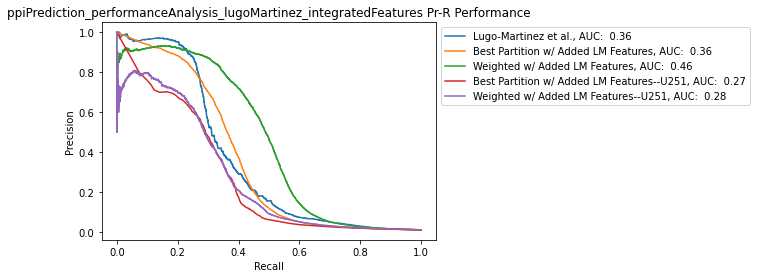

In [ ]:
#plot performance
precRecall_pairs = []
for cmpPerformance in performances4Comparision:
    precRecall_pairs.append(dataProcessing.loadResults_precRecall(cmpPerformance[0], cmpPerformance[1]))
modelEvaluating.plotAnalysis(workDir, 'ppiPrediction_performanceAnalysis_lugoMartinez_integratedFeatures', precRecall_pairs)

In [ ]:
labels_origPairs_U251replacements_partial_copy = labels_origPairs_U251replacements_partial.copy()

In [ ]:
proteins_notFound_set

['10240',
 '10362',
 '10454',
 '10884',
 '11073',
 '11097',
 '11143',
 '11200',
 '1791',
 '23091',
 '23129',
 '23199',
 '25913',
 '2889',
 '2972',
 '3689',
 '3690',
 '3778',
 '4217',
 '4296',
 '4794',
 '51742',
 '5287',
 '5290',
 '5435',
 '5440',
 '55168',
 '57154',
 '5889',
 '5932',
 '6416',
 '64960',
 '64965',
 '64969',
 '6638',
 '6696',
 '6850',
 '6929',
 '7035',
 '7048',
 '79595',
 '79706',
 '7979',
 '80155',
 '84062',
 '84148',
 '843',
 '84893',
 '92421',
 '9265',
 '953',
 '9658',
 '983']

In [ ]:
geneName_matchesNOTFound

122

In [ ]:
print(prot1)
print(geneNames)

10296
['MAEA', 'B3KRN7', 'B4DJP8', 'B4DQT1', 'B4DVN3', 'D6RIB6']


In [ ]:
print(geneName_matchesFound)
print(geneName_matchesNOTFound)

4
1


In [ ]:
geneName_matchesNOTFound

1

In [ ]:
nci60_protAbundance.loc[nci60_protAbundance_tissues.GeneName=='D6RIB6', 'GeneName'].notnull().sum()

0

In [ ]:
nci60_protAbundance.loc[(nci60_protAbundance.GeneName.str.contains("CHL1")) & (nci60_protAbundance.GeneID.isna()), 'GeneName'].notnull().sum()

0

###by tissue

In [ ]:
nci60_protAbundance_tissues = pd.read_csv(LMprotein_complexesDir + 'nci60_all_abundanceLFQPerTissueDeep.tsv', sep='\t')
nci60_protAbundance_tissues.head()

GeneID GeneName UniprotID  ...   BR:MCF7    ME:M14  LE:CCRF_CEM
0    NaN   MAP4K1    Q92918  ...  4.924155  5.096110     6.757123
1  51594     NBAS    A2RRP1  ...  6.859703  6.934473     7.047625
2  51594     NBAS  A2RRP1-2  ...  6.859703  6.934473     7.047625
3  10752     CHL1    O00533  ...  0.000000  5.575765     0.000000
4    NaN    DHRS1    Q96LJ7  ...  6.739881  6.992527     6.403326

[5 rows x 12 columns]

In [ ]:
labels_origPairs_prots_missingMatches = pd.read_csv('uniprot-yourlist_M20210413A2A5A37CD3FF71F97605B695F360A9FA022043E.tab', sep='\t')
labels_origPairs_prots_missingMatches = labels_origPairs_prots_missingMatches.rename(columns={'yourlist:M20210413A2A5A37CD3FF71F97605B695F360A9FA022043E': 'GeneID', 'Entry': 'UniprotID'})
labels_origPairs_prots_missingMatches.drop(columns=['Status', 'Organism', 'Length', 'Entry name', 'Protein names'], axis=1, inplace=True)
labels_origPairs_prots_missingMatches = labels_origPairs_prots_missingMatches.astype({'GeneID': 'str', 'Gene names': 'str'})
labels_origPairs_prots_missingMatches['Gene names'] = labels_origPairs_prots_missingMatches['Gene names'].apply(lambda row: row.split())
labels_origPairs_prots_missingMatches.head()

GeneID UniprotID                  Gene names
0     60    P60709                      [ACTB]
1     60    Q1KLZ0      [PS1TP5BP1, hCG_15971]
2    329    Q13490  [BIRC2, API1, MIHB, RNF48]
3    355    P25445  [FAS, APT1, FAS1, TNFRSF6]
4    355    K9J972                       [FAS]

In [ ]:
list0 = list(nci60_protAbundance_missingGeneIDs['Gene names'].values)
list1 = [item for sublist in list0 for item in sublist]
list2 = sorted(list(set(list1)))
print(len(list2))

106385


In [ ]:
if 'RPL14' in list2:
  print('yes')

In [ ]:
nci60_protAbundance_missingGeneIDs = pd.read_csv('uniprot-yourlist_M20210413A94466D2655679D1FD8953E075198DA8202C6C6.tab', sep='\t')
nci60_protAbundance_missingGeneIDs = nci60_protAbundance_missingGeneIDs.rename(columns={'yourlist:M20210413A94466D2655679D1FD8953E075198DA8202C6C6': 'GeneID', 'Entry': 'UniprotID'})
nci60_protAbundance_missingGeneIDs.drop(columns=['Status', 'Organism', 'Length', 'Entry name', 'Protein names'], axis=1, inplace=True)
nci60_protAbundance_missingGeneIDs = nci60_protAbundance_missingGeneIDs.astype({'GeneID': 'str', 'Gene names': 'str'})
nci60_protAbundance_missingGeneIDs['Gene names'] = nci60_protAbundance_missingGeneIDs['Gene names'].apply(lambda row: row.split())
nci60_protAbundance_missingGeneIDs.head()

GeneID   UniprotID            Gene names
0    488  A0A097EY73   [488, PBI_121Q_488]
1    488  A0A0C7NFB7                 [488]
2    488  A0A0E4G9A6           [panC, 488]
3    488  A0A248SKK7  [488, PBI_SCTP2_488]
4    488      G3MAM9          [488, G_488]

In [ ]:
retrieve_geneName('488')

['AT2A2_HUMAN', 'A0A0S2Z3L2_HUMAN']

In [ ]:
sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/Primary Research/JLMwSCBC_notebook/code/code_toPublish')   
import ppiPrediction_v2
import dataProcessing
import modelTraining
import modelEvaluating    

In [ ]:
performances4Comparision = [
                            [LMprotein_complexesDir + 'drew_BCB_features_test_all_model_predictions_rf_400_prc.txt', 'Drew et al. 2017 '], 
                            [LMprotein_complexesDir + 'drew_MM+TSCS+Exp+Abun+Loc_features_test_all_model_predictions_rf_400_prc2.txt', 'Lugo-Martinez et al. 2019'], 
                            [workDir + 'modelPerformance/modelsPerformance_RF_origJLM_completePartitions/priorRun/drewPlus_combinedWeighted_results.csv', 'Weighted w/ Added LM Features']
                            ]

In [ ]:
#plot performance
precRecall_pairs = []
for cmpPerformance in performances4Comparision:
    precRecall_pairs.append(dataProcessing.loadResults_precRecall(cmpPerformance[0], cmpPerformance[1]))
modelEvaluating.plotAnalysis(workDir, 'ppiPrediction_performanceAnalysis_cellLine-Specific', precRecall_pairs)

In [ ]:
'RPL14' in nci60_protAbundance_missingGeneIDs['Gene names'].to_list()

False

In [ ]:
nci60_protAbundance_protsMissing = sorted(nci60_protAbundance_merged.loc[nci60_protAbundance_merged.GeneID.isna(), 'GeneName'].to_list())
print(len(nci60_protAbundance_protsMissing))
nci60_protAbundance_protsMissing_set = sorted(list(set(nci60_protAbundance_protsMissing)))
print(len(nci60_protAbundance_protsMissing_set))
for prot in nci60_protAbundance_protsMissing_set:
  print(prot)

488
447
ABCC2
ABI3
ACBD6
ACP6
ACSM3
ACSS3
ACY3
ACYP2
ADAM8
AGAP2
AIFM2
AK5
ALKBH4
AMIGO2
AMN1
AMPD3
ANKZF1
ANO1
ANPEP
ANXA10
APOL1
APOO
ARFRP1
ARHGAP18
ARHGAP30
ARHGAP4
ARHGAP9
ARHGEF10L
ARL6
ARMC10
ARSE
ATL1
ATP8B1
AXL
B3GALT5
BAT2
BAT2D1
BAT3
BAT5
BCAS1
BCL2A1
BNIP2
BRI3
BTBD11
C10ORF11
C10ORF119
C10ORF57
C12ORF30
C14ORF119
C14ORF129
C14ORF159
C14ORF49
C15ORF40
C15ORF48
C15ORF58
C16ORF13
C16ORF61
C17ORF103
C18ORF22
C18ORF32
C19ORF12
C19ORF42
C19ORF62
C19ORF66
C1ORF116
C1ORF128
C1ORF151
C20ORF29
C21ORF57
C21ORF66
C22ORF30
C22ORF9
C2ORF43
C2ORF72
C5ORF43
C6ORF115
C6ORF130
C7ORF20
C7ORF27
C7ORF28A
C7ORF28B
C8ORF62
CA13
CA9
CABC1
CALML4
CARD16
CASP6
CASP7
CAV2
CD1C
CD38
CD3D
CD40
CD5
CD81
CD82
CDC2
CDC2L2
CDC2L5
CDC45L
CDH17
CDH6
CEACAM1
CEND1
CES1
CGREF1
CHMP7
CLDN1
CLDN3
CLDN4
CMPK2
CNIH
CNIH3
COL11A1
COL6A3
COL8A1
COPZ2
COX19
COX7C
CRADD
CRKRS
CTHRC1
CUGBP1
CXORF38
CYB561D2
CYB5R2
CYP1B1
CYP4F11
CYTSB
DAP
DCI
DEGS2
DGKA
DHRS1
DHRS11
DNAJC15
DNTT
DOCK2
DPH5
DPP4
DPP7
DUSP12
EBAG9
ECHDC

In [ ]:
noMatch = 0
for geneid in labels_origPairs_prots_missing:
    if geneid in labels_origPairs_prots_missingMatches.GeneID.to_list():
      pass
    else:
      noMatch+=1

In [ ]:
'9045' in labels_origPairs_prots_missing

True

In [ ]:
nci60_protAbundance_missingGeneIDs.loc[nci60_protAbundance_missingGeneIDs.GeneID=='9045', 'GeneID'].notnull().sum()

0

In [ ]:
np.arange(nci60_protAbundance_merged.shape[0])

array([    0,     1,     2, ..., 11533, 11534, 11535])

In [ ]:
sorted(labels_origPairs_prots_missingMatches.GeneID.to_list())

In [ ]:
'9045' in labels_origPairs_prots_missingMatches.GeneID.to_list()

True

In [ ]:
mainList = labels_origPairs_prots_missingMatches.loc[labels_origPairs_prots_missingMatches.GeneID=='9045', 'Gene names'].to_list()
geneNames_targetList = [item for sublist in mainList for item in sublist]
geneNames_targetList

['RPL14']

In [ ]:
for rowCheck in np.arange(nci60_protAbundance_merged.shape[0]):
  if nci60_protAbundance_merged.iloc[rowCheck, 1] in geneNames_targetList:
    #nci60_protAbundance_merged.iloc[rowCheck, 0] = rowTarget
    break

In [ ]:
type(geneNames_targetList)

list

In [ ]:
nci60_protAbundance_merged.loc[nci60_protAbundance_merged.GeneName=='RPL14', :]

AttributeError: ignored

In [ ]:
for rowTarget in labels_origPairs_prots_missing:
  
  mainList = labels_origPairs_prots_missingMatches.loc[labels_origPairs_prots_missingMatches.GeneID==rowTarget, 'Gene names'].to_list()
  geneNames_targetList = [item for sublist in mainList for item in sublist]
  print(geneNames_targetList)
  for rowCheck in np.arange(nci60_protAbundance_merged.shape[0]):
    if nci60_protAbundance_merged.iloc[rowCheck, 1] in geneNames_targetList:
      nci60_protAbundance_merged.iloc[rowCheck, 0] = rowTarget
      break

In [ ]:
nci60_protAbundance_merged.loc[nci60_protAbundance_merged.GeneID=='9045', :]

Empty DataFrame
Columns: [GeneID, GeneName, UniprotID, BR:BT_549, BR:HS578T, BR:MCF7_x, OV:NCI_ADR_RES, BR:MDA_MB_231, ME:MDA_MB_435, BR:T47D, CNS:SF_268, CNS:SF_295, CNS:SF_539, CNS:SNB_19, CNS:SNB_75, CNS:U251, CO:COLO205_x, CO:HCC_2998, CO:HCT_116, CO:HCT_15, CO:HT29, CO:KM12, CO:SW_620, LE:CCRF_CEM_x, LE:HL_60, LE:K_562, LE:MOLT_4, LE:RPMI_8226, LE:SR, ME:LOXIMVI, ME:M14_x, ME:MALME_3M, ME:SK_MEL_2, ME:SK_MEL_28, ME:SK_MEL_5, ME:UACC_257, ME:UACC_62, LC:A549, LC:EKVX, LC:NCI_H226, LC:NCI_H23, LC:NCI_H322M, LC:NCI_H460_x, LC:NCI_H522, LC:HOP_62, LC:HOP_92, OV:IGROV1, OV:OVCAR_3, OV:OVCAR_4, OV:OVCAR_5, OV:OVCAR_8, OV:SK_OV_3_x, PR:DU_145(DTP), PR:PC_3_x, RE:786_0, RE:A498, RE:ACHN, RE:CAKI_1, RE:RXF_393_x, RE:SN12C, RE:TK_10, RE:UO_31, CO:COLO205_y, CCNS:U251, PR:PC_3_y, LC:NCI_H460_y, RE:RXF_393_y, OV:SK_OV_3_y, BR:MCF7_y, ME:M14_y, LE:CCRF_CEM_y]
Index: []

In [ ]:
nci60_protAbundance_mergedCorr = nci60_protAbundance_merged.drop(columns=['GeneName', 'UniprotID'], axis=1)

In [ ]:
nci60_protAbundance_mergedCorr = nci60_protAbundance_mergedCorr.drop_duplicates(subset=['GeneID'])
nci60_protAbundance_mergedCorr = nci60_protAbundance_mergedCorr.set_index('GeneID') 
nci60_protAbundance_mergedCorr = nci60_protAbundance_mergedCorr.T.corr()

In [ ]:
labels_origPairs['NCI_prot_abun'] = labels_origPairs.iloc[:, 0]
labels_origPairs['NCI_prot_abun'] = np.nan

In [ ]:
for row in np.arange(labels_origPairs.shape[0]):
    try:
      x = labels_origPairs.iloc[row, 0]
      y = labels_origPairs.iloc[row, 1]
      labels_origPairs.iloc[row, 3] = nci60_protAbundance_mergedCorr.loc[x, y]
    except:
      print('error!!!')
      break

error!!!


In [ ]:
nci60_protAbundance_mergedCorr.loc['9045', '6125']

In [ ]:
'8467' in nci60_protAbundance_mergedCorr.index

True

In [ ]:
labels_origPairs.iloc[row, 0]

'6125'

In [ ]:
labels_origPairs.iloc[row, 1]

'9045'

In [ ]:
cellLines = ['BR:MCF7', 'CNS:U251', ]

#Explore and Recapitulate HPA data

In [ ]:
hpa_subcellLocs = pd.read_csv(LMprotein_complexesDir + 'swiss_prot_subcellular_location.tsv', sep='\t')
hpa_subcellLocs = hpa_subcellLocs.loc[hpa_subcellLocs['Subcellular location [CC]'].notnull()]
hpa_subcellLocs = hpa_subcellLocs.reset_index(drop=True)

###QC Checks

In [ ]:
labels_origPairs.head()

prot1    prot2  label
0   8467.0   6878.0      1
1  65993.0  28973.0      1
2   6125.0   9045.0      1
3  55173.0  54460.0      1
4   7153.0   9188.0      1

In [ ]:
labels_origPairs.dtypes

prot1    float64
prot2    float64
label      int64
dtype: object

In [ ]:
labels_origPairs.shape

(546645, 3)

In [ ]:
hpa_subcellLocs.shape

(21685, 9)

In [ ]:
hpa_subcellLocs.head()

Entry  ...                          Subcellular location [CC]
0  L0R819  ...  SUBCELLULAR LOCATION: Cytoplasm {ECO:0000269|P...
1  P98196  ...  SUBCELLULAR LOCATION: Cell membrane {ECO:00002...
2  P50993  ...  SUBCELLULAR LOCATION: Membrane {ECO:0000269|Pu...
3  Q13733  ...  SUBCELLULAR LOCATION: Cell membrane {ECO:00002...
4  P05026  ...  SUBCELLULAR LOCATION: Cell membrane {ECO:00002...

[5 rows x 9 columns]

In [ ]:
hpa_subcellLocs.dtypes

Entry                        object
Entry name                   object
Status                       object
Cross-reference (GeneID)     object
Protein names                object
Gene names                   object
Organism                     object
Length                        int64
Subcellular location [CC]    object
dtype: object

In [ ]:
hpa_subcell_locs_wGeneIDs_asInt64 = convert_strGene_2Int64(hpa_subcellLocs)

In [ ]:
hpa_subcell_locs_wGeneIDs_asInt64.dtypes

Entry                         object
Entry name                    object
Status                        object
Cross-reference (GeneID)     float64
Protein names                 object
Gene names                    object
Organism                      object
Length                         int64
Subcellular location [CC]     object
dtype: object

In [ ]:
hpa_subcell_locs_wGeneIDs_asInt64.shape

(0, 9)

In [ ]:
print(len(re.split(': |; |}. ', hpa_subcellLocs.iloc[1, 8])))
print(re.split(': |; |}. ', hpa_subcellLocs.iloc[1, 8]))

5
['SUBCELLULAR LOCATION', 'Membrane {ECO:0000269|PubMed:7711835', 'Multi-pass membrane protein {ECO:0000269|PubMed:7711835', 'Cell membrane {ECO:0000269|PubMed:7711835', 'Multi-pass membrane protein {ECO:0000269|PubMed:7711835}.']


###Replicate LM data

In [ ]:
def convert_strGene_2Int64(hpa_subcellLocs):

  newTable = hpa_subcellLocs.copy()
  newTable.loc[:, 'Cross-reference (GeneID)'] = newTable.loc[:, 'Cross-reference (GeneID)'].str.extract('(\d+)')

  return newTable

In [ ]:
def get_subcellLocs(row, hpa_subcellLocs):

  prot1, prot2 = row[0], row[1]

  prot1_subcellLocs = re.split(': |; |}. ', hpa_subcellLocs.loc[prot1, 'Subcellular location [CC]'])
  prot1_subcellLocs.remove('SUBCELLULAR LOCATION')
  prot1_subcellLocs = [ele for ele in prot1_subcellLocs if 'Note' not in ele]
  prot1_subcellLocs = [re.split(' {', ele)[0] for ele in prot1_subcellLocs]
  #print(prot1_subcellLocs)

  prot2_subcellLocs = re.split(': |; |}. ', hpa_subcellLocs.loc[prot2, 'Subcellular location [CC]'])
  prot2_subcellLocs.remove('SUBCELLULAR LOCATION')    
  prot2_subcellLocs = [ele for ele in prot2_subcellLocs if 'Note' not in ele]
  prot2_subcellLocs = [re.split(' {', ele)[0] for ele in prot2_subcellLocs]
  #print(prot2_subcellLocs)    

  return prot1_subcellLocs, prot2_subcellLocs

In [ ]:
def findOverlap(row, hpa_subcellocs):

  try:
    prot1_subcellLocs, prot2_subcellLocs = get_subcellLocs(row, hpa_subcellLocs)
    overlap = list(set(prot1_subcellLocs) & set(prot2_subcellLocs))
    overlapCount = len(overlap)
    
  except:
    overlapCount = np.nan

  return overlapCount

In [ ]:
def compute_setEquality(row, hpa_subcellocs):

  try:
    prot1_subcellLocs, prot2_subcellLocs = get_subcellLocs(row, hpa_subcellLocs)
    overlap = list(set(prot1_subcellLocs) & set(prot2_subcellLocs))
    if (len(overlap)==len(prot1_subcellLocs) and len(overlap)==len(prot2_subcellLocs)):
      setEquality=1
    else:
      setEquality=0

  except:
    setEquality = np.nan      
      
  return setEquality

In [ ]:
def computeJaccard(row, hpa_subcellocs):

  try:
    prot1_subcellLocs, prot2_subcellLocs = get_subcellLocs(row, hpa_subcellLocs)
    overlapCount = findOverlap(row, hpa_subcellocs)
    unionCount = len(list(set(prot1_subcellLocs + prot2_subcellLocs)))
    jaccardSimilarity = overlapCount/unionCount

  except:
    jaccardSimilarity = np.nan

  return jaccardSimilarity

In [ ]:
def compute_setInclusion(row, hpa_subcellocs):

  try:
    prot1_subcellLocs, prot2_subcellLocs = get_subcellLocs(row, hpa_subcellLocs)
    overlap = list(set(prot1_subcellLocs) & set(prot2_subcellLocs))
    if sorted(overlap)==sorted(prot1_subcellLocs) or sorted(overlap)==sorted(prot2_subcellLocs):
      setInclusion=1
    else:
      setInclusion=0
    
  except:
    setInclusion = np.nan

  return setInclusion

In [ ]:
def subcell_getHPA_feats(hpa_subcellLocs, labels_wIDs):
  
  hpa_subcell_locs_wGeneIDs_asInt64 = convert_strGene_2Int64(hpa_subcellLocs.copy())
  hpa_locationFeatures = labels_wIDs.copy()
  protMissing_count = 0

  hpa_locationFeatures['overlap'] = \
    hpa_locationFeatures.apply(lambda row: findOverlap(row, hpa_subcellLocs), axis=1)

  hpa_locationFeatures['setEquality'] = \
    hpa_locationFeatures.apply(lambda row: compute_setEquality(row, hpa_subcellLocs), axis=1)

  hpa_locationFeatures['jaccard'] = \
    hpa_locationFeatures.apply(lambda row: computeJaccard(row, hpa_subcellLocs), axis=1)
    
  hpa_locationFeatures['setInclusion'] = \
    hpa_locationFeatures.apply(lambda row: compute_setInclusion(row, hpa_subcellLocs), axis=1)
  
  return hpa_locationFeatures

In [ ]:
hpa_locationFeatures = subcell_getHPA_feats(hpa_subcellLocs, labels_origPairs.iloc[:10, :])

In [ ]:
hpa_locationFeatures.head()

prot1    prot2  label  overlap  setEquality  jaccard  setInclusion
0   8467.0   6878.0      1      0.0          0.0      0.0           0.0
1  65993.0  28973.0      1      NaN          NaN      NaN           NaN
2   6125.0   9045.0      1      0.0          0.0      0.0           0.0
3  55173.0  54460.0      1      NaN          NaN      NaN           NaN
4   7153.0   9188.0      1      0.0          0.0      0.0           0.0

In [ ]:
hpa_locationFeatures = subcell_getHPA_feats(hpa_subcellLocs, labels_origPairs)

In [ ]:
hpa_locationFeatures.head()

prot1  prot2  label  overlap  setEquality  jaccard  setInclusion
0   8467   6878      1      0.0          0.0      0.0           0.0
1  65993  28973      1      NaN          NaN      NaN           NaN
2   6125   9045      1      NaN          NaN      NaN           NaN
3  55173  54460      1      NaN          NaN      NaN           NaN
4   7153   9188      1      0.0          0.0      0.0           0.0

In [ ]:
hpa_subcell_locs_wGeneIDs_asInt64.loc[8467, 'Subcellular location [CC]']

'SUBCELLULAR LOCATION: Cytoplasm {ECO:0000250}. Nucleus {ECO:0000250}.'

In [ ]:
hpa_subcell_locs_wGeneIDs_asInt64.loc[6878, 'Subcellular location [CC]']

'SUBCELLULAR LOCATION: Nucleus {ECO:0000269|PubMed:12185076}.'

In [ ]:
lmTraining.shape

(108810, 271)

In [ ]:
lmTest = pd.read_csv(LMprotein_complexesDir + 'integrated_MM+TSCS+Exp+Abun+Loc_features_test_either_model.tsv', sep='\t')
lmTest.head()

Wan_1     Wan_2  Wan_3  ...  HPA_SwissProt_2  HPA_SwissProt_3  HPA_SwissProt_4
0  0.000000  0.000000    0.0  ...              0.0         0.000000              1.0
1  0.354492  0.739258    0.0  ...              0.5         0.750000              0.0
2  0.417969  0.701172    0.0  ...              0.0         0.666667              0.0
3       NaN       NaN    NaN  ...              0.5         0.750000              0.0
4  0.000000  0.000000    0.0  ...              0.5         0.666667              0.5

[5 rows x 268 columns]

In [ ]:
lmTest.iloc[:, -4:].isna().sum(axis=0)

HPA_SwissProt_1    0
HPA_SwissProt_2    0
HPA_SwissProt_3    0
HPA_SwissProt_4    0
dtype: int64

In [ ]:
fold0_files = glob.glob(workDir + 'models/models_origPairs_drewPlus+SCBC_recheck_5CV_4/*.pkl')
print(len(fold0_files))

3055


#Evaluate H322M Cell-Line Specific NCI-60 Exp and Prot data with Fantom, GTEx, Hein, HPA, Huttlin, Lugo-Martinez, "Kaggle", SCBC, and Wan features

In [ ]:
expName = 'integratedPairs_MM+TSCS+Exp+Abun+Loc+Kaggle+SCBC_h322mSpecific'
testData = pd.read_csv(GWprotein_complexesDir + 'testData_h322Specific_plusDrew_LMadded_SCBC_h322m_mcf7_u251_intersectionFeatures.tsv', sep='\t')
testLabels = pd.read_csv(GWprotein_complexesDir + 'testData_h322Specific_plusDrew_LMadded_SCBC_h322m_mcf7_u251_intersectionLabels.tsv', sep='\t')

In [ ]:
baseExp_name = 'integratedPairs_MM+TSCS+Exp+Abun+Loc+Kaggle+SCBC'
partitionsFile = workDir + 'models/models_{0}/savedPartitions.pkl'.format(baseExp_name)
trainingPartitions_sorted = pickle.load(open(partitionsFile, 'rb'))
modelsProperties = pd.read_csv(workDir + 'models/models_integratedPairs_MM+TSCS+Exp+Abun+Loc+Kaggle+SCBC/Partition Specific integratedPairs_MM+TSCS+Exp+Abun+Loc+Kaggle+SCBC Training Performance_2021-05-16.csv')

In [ ]:
workdir = workDir

In [ ]:
print('Evaluating models by training data partitions on testing data')
print('____________________________________________________________')
features = testData.columns.tolist()
testData_notnull = testData.notnull()
columnNames = ['training partition ID', 'testing accuracy', 'average precision', 'Pr-R AUC', 'est model accuracy',
                'num features', 'num test-data observations', 'num train-data observations', 'features']
modelsEval_properties = pd.DataFrame(columns=columnNames)
os.makedirs(workdir + 'modelPerformance/modelsPerformance_{0}'.format(expName), exist_ok=True)

candidatePartitions = np.empty((len(testData), len(trainingPartitions_sorted)), dtype=np.float32)
candidatePartitions[:] = np.nan
candidatePartitions_preds = np.empty((len(testData), len(trainingPartitions_sorted)), dtype=np.float32)
candidatePartitions_preds[:] = np.nan
candidatePartitions_predsProbs = np.empty((len(testData), len(trainingPartitions_sorted)), dtype=np.float32)
candidatePartitions_predsProbs[:] = np.nan

for partition in np.arange(len(trainingPartitions_sorted)):

    progressRatio = partition / len(trainingPartitions_sorted)
    if np.floor(int(progressRatio*100)) % 5 == 0:
        print('progress: {0}'.format(progressRatio*100))
    selectFeatures = list(np.argwhere(trainingPartitions_sorted[partition, :])[:, 0])
    selectFeatures = [i for i in selectFeatures if i < len(features)]
    selectFeatures_names = [features[i] for i in selectFeatures]
    allRows_selectFeatures = testData_notnull.iloc[:, selectFeatures].all(axis=1)
    rowIndices = allRows_selectFeatures.index[allRows_selectFeatures].tolist()

    if len(rowIndices) != 0:
        candidatePartitions[rowIndices, partition] = 1
        interactionsSubset = testData.iloc[rowIndices, selectFeatures]
        labelsSubset = testLabels.iloc[rowIndices, 0]

        filename = workdir + 'models/models_{0}/model_{0}_Partition_{1}'.format(baseExp_name, partition)
        model = pickle.load(open(filename + '.pkl', 'rb'))
        setattr(model, 'verbose', 0)
        candidatePartitions_preds[rowIndices, partition] = model.predict(interactionsSubset)
        try:
            candidatePartitions_predsProbs[rowIndices, partition] = \
                model.predict_proba(interactionsSubset)[:, 1]
        except:
            candidatePartitions_predsProbs[rowIndices, partition] = model.predict_proba(interactionsSubset)[0]
        score = model.score(interactionsSubset, labelsSubset)

        if len(np.unique(labelsSubset)) > 1:
            precisionScore = average_precision_score(labelsSubset,
                                                      candidatePartitions_predsProbs[rowIndices, partition],
                                                      average='weighted')
            noSkill_probs = [0 for _ in range(len(labelsSubset))]
            noSkill_prec, noSkill_recall, _ = precision_recall_curve(labelsSubset, noSkill_probs)
            modelPartition_prec, modelPartition_recall, _ = \
                precision_recall_curve(labelsSubset,
                                        candidatePartitions_predsProbs[rowIndices, partition])
            modelPartition_prrauc = auc(modelPartition_recall, modelPartition_prec)

        else:
            precisionScore = np.nan
            modelPartition_prrauc = np.nan

    else:
        score = np.nan
        precisionScore = np.nan
        modelPartition_prrauc = np.nan

    properties = [partition, score, precisionScore, modelPartition_prrauc,
                  trainedModels_properties['est model accuracy'].loc[partition], len(selectFeatures),
                  len(rowIndices), trainedModels_properties['num train-data observations'].loc[partition],
                  selectFeatures_names]
    addProperties = pd.DataFrame([properties], columns=columnNames)
    modelsEval_properties = modelsEval_properties.append(addProperties)

    modelsEval_properties.set_index('training partition ID', inplace=True)
    modelsEval_properties.to_csv(workdir + 'modelPerformance/modelsPerformance_{0}/'.format(expName) +
                                 'Partition-Classifier_Testing_Performance{0}.csv'.format(suffix))

    np.savetxt(workdir + 'modelPerformance/modelsPerformance_{0}/'.format(expName) +
               'candidatePartitions{0}.csv'.format(suffix),
               np.array(candidatePartitions), delimiter=',')
    np.savetxt(workdir + 'modelPerformance/modelsPerformance_{0}/'.format(expName) +
               'candidatePartitions_preds{0}.csv'.format(suffix),
               np.array(candidatePartitions_preds), delimiter=',')
    np.savetxt(workdir + 'modelPerformance/modelsPerformance_{0}/'.format(expName) +
               'candidatePartitions_predsProbs{0}.csv'.format(suffix),
               np.array(candidatePartitions_predsProbs), delimiter=',')

    print('Completed training models per partition of the training data')
    print('____________________________________________________________')    